In [1]:
from IPython.display import clear_output
import random as rnd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import time
import math


#import Rounds and Game creating classes
%run RollsPlayersRounds.ipynb
#import Rule based Agent
%run RuleBasedAgent.ipynb
#import Monte Carlo
%run ProbabilisticAgent.ipynb
    

# Experiment 1a- Random Seating - Rounds

1000 full games of 6 players, 3 of them basic agents and 3 of them rule based agents with fixed seating and each agent has the opposite agent on either side.

In [18]:
losses = {}
wins = {}
bid_high = {}
dudo_soon = {}

## GAME!
Game = full_game(2, Human=False)
for x in Game.Players:
    losses[x] =0
    wins[x] = 0
    bid_high[x] = 0
    dudo_soon[x] = 0
    
#2000 ROUNDS
for i in range(2000):
    print (losses)
    first_player = rnd.choice(Game.Players)
    roundd = rounds(Game.diceState, Game.Players, first_player, Game.human, shuffle=True)
    while roundd.last != 'Dudo' and roundd.last != 'Calza':

        # Play a round
        if roundd.player == 'Martha':
            agent1 = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                        last_bid = roundd.last)
            bid = agent1.make_bid()
        elif roundd.player == 'Lorenzo':
            agent2 = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                     roundd.history, roundd.total_dice, roundd.Players)
            bid = agent2.make_bid()

        print (roundd.player, ': ', bid)
        roundd.last = bid
        roundd.history.append(bid)

        #Analyse terminal bid and update dice accordingly
        if roundd.last == 'Dudo': 
            loser_winner = roundd.call()
            print ('Loser:', loser_winner[0])
            print (roundd.rolls)
            for i in roundd.Players:
                if roundd.loser == i:
                    losses[i] +=1
            if roundd.reason == 'Bid too high':
                bid_high[loser_winner[0]] +=1 
            elif roundd.reason == 'Dudo too soon':
                dudo_soon[loser_winner[0]] +=1
        
        elif roundd.last == 'Calza':
            loser_winner = roundd.call(Dudo = False, Calza = True)
            if loser_winner[1] == 1:
                print ('Winner:', loser_winner[0])
                print (roundd.rolls)
                for i in roundd.Players:
                    if roundd.winner == i:
                        wins[i] +=1
                        break
            else:
                print ('Loser:', loser_winner[0])
                print (roundd.rolls)
                for i in roundd.Players:
                    if roundd.loser == i:
                        losses[i] +=1
                        break
                if roundd.reason == 'Bid too high':
                    bid_high[loser_winner[0]] +=1 
                elif roundd.reason == 'Dudo too soon':
                    dudo_soon[loser_winner[0]] +=1

        else:
            roundd.next_player()
            
print (losses)

{'Martha': 0, 'Lorenzo': 0}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 4, 2, 2], 'Martha': [5, 2, 4, 1, 2]}
{'Martha': 1, 'Lorenzo': 0}
Martha :  [1, 2]
Lorenzo :  [1, 5]
Martha :  [2, 2]
Lorenzo :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 5, 1, 4, 3], 'Martha': [2, 4, 3, 2, 4]}
{'Martha': 1, 'Lorenzo': 1}
Lorenzo :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 2, 6, 2, 6], 'Martha': [1, 2, 4, 1, 4]}
{'Martha': 2, 'Lorenzo': 1}
Martha :  [2, 2]
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 5, 1, 3, 6], 'Martha': [2, 6, 1, 2, 3]}
{'Martha': 3, 'Lorenzo': 1}
Martha :  [2, 4]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Lorenz

Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 6, 1, 2, 5], 'Martha': [1, 6, 5, 2, 5]}
{'Martha': 34, 'Lorenzo': 9}
Lorenzo :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 2, 5, 4, 1], 'Martha': [2, 4, 5, 4, 6]}
{'Martha': 35, 'Lorenzo': 9}
Lorenzo :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 2, 2, 5, 1], 'Lorenzo': [2, 1, 6, 5, 2]}
{'Martha': 36, 'Lorenzo': 9}
Lorenzo :  [2, 3]
Martha :  [3, 6]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 6, 2, 4, 6], 'Lorenzo': [4, 5, 3, 1, 5]}
{'Martha': 36, 'Lorenzo': 10}
Lorenzo :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 1, 5, 6, 4], 'Lorenzo': [6, 1, 4, 2, 1]}
{'Martha': 37, 'Lorenzo': 10}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Martha :  [3, 5]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 6, 6, 3, 5], 'Lorenzo': [5, 1, 6, 3, 3]}
{'Martha': 38, 'Lorenzo': 10}
Martha :  [1

Martha :  [3, 4]
Lorenzo :  [3, 6]
Martha :  [4, 4]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 6, 1, 6, 3], 'Martha': [6, 3, 4, 4, 1]}
{'Martha': 79, 'Lorenzo': 23}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 2, 2, 5, 3], 'Martha': [6, 4, 2, 3, 2]}
{'Martha': 79, 'Lorenzo': 24}
Lorenzo :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 1, 1, 3, 1], 'Lorenzo': [2, 5, 1, 2, 3]}
{'Martha': 80, 'Lorenzo': 24}
Martha :  [1, 4]
Lorenzo :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 3, 1, 4, 4], 'Martha': [4, 4, 1, 1, 1]}
{'Martha': 81, 'Lorenzo': 24}
Martha :  [2, 4]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 3, 2, 4, 5], 'Martha': [3, 1, 3, 1, 5]}
{'Martha': 81, 'Lorenzo': 25}
Lo

Lorenzo :  [2, 6]
Martha :  [3, 6]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 2, 6, 6, 6], 'Lorenzo': [6, 6, 6, 4, 6]}
{'Martha': 114, 'Lorenzo': 42}
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 2, 3, 2, 2], 'Lorenzo': [3, 2, 4, 4, 1]}
{'Martha': 114, 'Lorenzo': 43}
Martha :  [2, 2]
Lorenzo :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 3, 1, 2, 3], 'Lorenzo': [4, 4, 4, 5, 6]}
{'Martha': 115, 'Lorenzo': 43}
Martha :  [2, 5]
Lorenzo :  [3, 4]
Martha :  [4, 5]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 4, 2, 1, 6], 'Martha': [1, 5, 5, 1, 5]}
{'Martha': 116, 'Lorenzo': 43}
Lorenzo :  [1, 2]
Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [4, 3]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 2, 4, 5, 2], 'Martha': [3, 3, 1, 2, 3]}
{'Martha': 117, 'Lorenzo': 43}
Martha :  [2, 5]
Lorenzo :  [3, 5

Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 4, 3, 2, 5], 'Lorenzo': [4, 2, 2, 5, 1]}
{'Martha': 158, 'Lorenzo': 55}
Martha :  [2, 2]
Lorenzo :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 1, 1, 5, 2], 'Lorenzo': [6, 4, 6, 6, 2]}
{'Martha': 159, 'Lorenzo': 55}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 2, 6, 2], 'Martha': [5, 1, 5, 1, 3]}
{'Martha': 160, 'Lorenzo': 55}
Lorenzo :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 1, 2, 3, 1], 'Lorenzo': [2, 4, 6, 1, 6]}
{'Martha': 161, 'Lorenzo': 55}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [2, 2, 6, 3, 6], 'Martha': [4, 1, 3, 2, 6]}
{'Martha': 161, 'Lorenzo': 56}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Martha :  [3, 

Martha :  Dudo
Loser: Lorenzo
{'Martha': [5, 6, 5, 5, 3], 'Lorenzo': [5, 4, 4, 3, 4]}
{'Martha': 194, 'Lorenzo': 69}
Lorenzo :  [1, 5]
Martha :  [2, 2]
Lorenzo :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 3, 2, 1, 3], 'Martha': [4, 4, 1, 2, 2]}
{'Martha': 195, 'Lorenzo': 69}
Martha :  [1, 3]
Lorenzo :  [1, 6]
Martha :  [2, 3]
Lorenzo :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 6, 6, 5, 2], 'Martha': [3, 3, 1, 3, 3]}
{'Martha': 196, 'Lorenzo': 69}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 4, 5, 4, 3], 'Lorenzo': [6, 1, 2, 1, 5]}
{'Martha': 197, 'Lorenzo': 69}
Lorenzo :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [2, 3, 3, 4, 6], 'Martha': [4, 1, 4, 1, 2]}
{'Martha': 197, 'Lorenzo': 70}
Lorenzo :  [1, 3]
Martha :  [2, 

Lorenzo :  [3, 3]
Martha :  [4, 3]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 6, 6, 2, 3], 'Martha': [3, 3, 5, 1, 5]}
{'Martha': 237, 'Lorenzo': 85}
Lorenzo :  [1, 4]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [3, 1, 5, 2, 6], 'Lorenzo': [4, 6, 4, 6, 3]}
{'Martha': 237, 'Lorenzo': 86}
Lorenzo :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 2, 4, 3, 5], 'Lorenzo': [1, 3, 3, 1, 6]}
{'Martha': 238, 'Lorenzo': 86}
Lorenzo :  [1, 6]
Martha :  [2, 5]
Lorenzo :  [1, 1]
Martha :  [3, 5]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 6, 1, 4], 'Martha': [5, 5, 3, 4, 6]}
{'Martha': 239, 'Lorenzo': 86}
Lorenzo :  [2, 6]
Martha :  [3, 3]
Lorenzo :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 2, 3, 6, 3], 'Lorenzo': [6, 1, 6, 6, 2]}
{'Martha': 240, 'Lorenzo': 86}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Martha :  [2, 

Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 5, 2, 2, 6], 'Lorenzo': [5, 6, 1, 3, 2]}
{'Martha': 267, 'Lorenzo': 107}
Martha :  [2, 5]
Lorenzo :  [3, 5]
Martha :  [4, 5]
Lorenzo :  Dudo
Loser: Martha
{'Lorenzo': [6, 2, 6, 3, 2], 'Martha': [6, 5, 5, 4, 1]}
{'Martha': 268, 'Lorenzo': 107}
Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [4, 3]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 5, 3, 5, 3], 'Lorenzo': [1, 1, 1, 3, 3]}
{'Martha': 269, 'Lorenzo': 107}
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [2, 2, 6, 2, 4], 'Lorenzo': [3, 3, 6, 3, 4]}
{'Martha': 269, 'Lorenzo': 108}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 2, 5, 4, 1], 'Martha': [4, 2, 4, 6, 2]}
{'Martha': 269, 'Lorenzo': 109}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :

Martha :  [1, 6]
Lorenzo :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [2, 6, 6, 6, 1], 'Lorenzo': [2, 5, 2, 3, 2]}
{'Martha': 323, 'Lorenzo': 147}
Martha :  [1, 3]
Lorenzo :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 6, 2, 2, 1], 'Lorenzo': [2, 6, 5, 4, 2]}
{'Martha': 324, 'Lorenzo': 147}
Lorenzo :  [1, 5]
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [5, 4, 4, 2, 4], 'Lorenzo': [3, 5, 5, 3, 6]}
{'Martha': 324, 'Lorenzo': 148}
Lorenzo :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [3, 2, 1, 6, 5], 'Lorenzo': [6, 5, 6, 4, 5]}
{'Martha': 324, 'Lorenzo': 149}
Lorenzo :  [2, 3]
Martha :  [3, 3]
Lorenzo :  [3, 5]
Martha :  [4, 3]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 5, 3, 5, 4], 'Martha': [3, 3, 3, 4, 1]}
{'Martha': 324, 'Loren

Loser: Martha
{'Martha': [5, 6, 4, 5, 4], 'Lorenzo': [1, 6, 4, 6, 5]}
{'Martha': 360, 'Lorenzo': 165}
Martha :  [1, 6]
Lorenzo :  [2, 6]
Martha :  [3, 6]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 6, 6, 5, 6], 'Martha': [6, 6, 2, 4, 1]}
{'Martha': 361, 'Lorenzo': 165}
Martha :  [2, 2]
Lorenzo :  [2, 4]
Martha :  [3, 2]
Lorenzo :  [3, 4]
Martha :  [4, 2]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 4, 1, 5, 4], 'Martha': [2, 6, 2, 4, 6]}
{'Martha': 362, 'Lorenzo': 165}
Lorenzo :  [1, 3]
Martha :  [2, 2]
Lorenzo :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [4, 2, 2, 6, 1], 'Lorenzo': [5, 4, 3, 4, 3]}
{'Martha': 362, 'Lorenzo': 166}
Lorenzo :  [1, 6]
Martha :  [2, 3]
Lorenzo :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 4, 3, 3, 2], 'Lorenzo': [5, 2, 3, 1, 2]}
{'Martha': 363, 'Lorenzo': 166}
Lorenzo :  [2, 3]
Martha :  [3, 5]
Lorenzo 

Loser: Martha
{'Lorenzo': [3, 5, 1, 3, 4], 'Martha': [5, 6, 3, 3, 6]}
{'Martha': 401, 'Lorenzo': 181}
Lorenzo :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 3, 1, 6, 1], 'Lorenzo': [1, 2, 5, 2, 3]}
{'Martha': 402, 'Lorenzo': 181}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 1, 3, 5], 'Martha': [4, 2, 4, 1, 3]}
{'Martha': 403, 'Lorenzo': 181}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 2, 3, 3, 3], 'Martha': [4, 2, 2, 4, 1]}
{'Martha': 404, 'Lorenzo': 181}
Martha :  [1, 3]
Lorenzo :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 2, 1, 4, 3], 'Martha': [4, 1, 6, 5, 2]}
{'Martha': 404, 'Lorenzo': 182}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Martha :

Martha :  [4, 5]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [5, 5, 3, 4, 2], 'Lorenzo': [3, 1, 5, 6, 4]}
{'Martha': 446, 'Lorenzo': 200}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Martha :  [4, 6]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 6, 6, 6, 1], 'Lorenzo': [4, 6, 3, 1, 3]}
{'Martha': 447, 'Lorenzo': 200}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Martha :  [4, 3]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 3, 1, 2, 5], 'Lorenzo': [2, 3, 2, 2, 4]}
{'Martha': 448, 'Lorenzo': 200}
Lorenzo :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [2, 6, 3, 6, 4], 'Lorenzo': [5, 6, 2, 6, 4]}
{'Martha': 449, 'Lorenzo': 200}
Martha :  [1, 3]
Lorenzo :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 1, 2, 4], 'Martha': [4, 5, 1, 6, 3]}
{'Martha': 450, 'Lorenzo': 200}
Martha :  [2, 3]
Lorenzo :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 6, 5, 2], 'Mart

Martha :  [3, 4]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 3, 4, 6, 4], 'Lorenzo': [4, 2, 2, 6, 4]}
{'Martha': 484, 'Lorenzo': 216}
Martha :  [2, 4]
Lorenzo :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 3, 3, 4, 6], 'Martha': [1, 1, 6, 5, 6]}
{'Martha': 485, 'Lorenzo': 216}
Lorenzo :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 1, 2, 3, 6], 'Lorenzo': [6, 5, 1, 3, 3]}
{'Martha': 486, 'Lorenzo': 216}
Martha :  [1, 3]
Lorenzo :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 6, 1, 4, 5], 'Martha': [5, 2, 3, 6, 3]}
{'Martha': 487, 'Lorenzo': 216}
Lorenzo :  [1, 4]
Martha :  [2, 5]
Lorenzo :  [1, 1]
Martha :  [3, 5]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 4, 5, 3, 5], 'Lorenzo': [2, 1, 4, 4, 6]}
{'Martha': 488, 'Lorenzo': 216}
Martha :  [1, 6]
Lorenzo :  [2, 2]
Martha :  [3, 6]
Lorenzo :  [

Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 1, 6, 3, 2], 'Lorenzo': [2, 1, 6, 3, 3]}
{'Martha': 527, 'Lorenzo': 232}
Lorenzo :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 4, 5, 2, 2], 'Martha': [2, 3, 4, 1, 3]}
{'Martha': 528, 'Lorenzo': 232}
Martha :  [1, 5]
Lorenzo :  [2, 3]
Martha :  [3, 5]
Lorenzo :  [3, 6]
Martha :  [4, 5]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 6, 4, 2, 6], 'Martha': [6, 5, 4, 3, 5]}
{'Martha': 528, 'Lorenzo': 233}
Lorenzo :  [1, 5]
Martha :  [2, 5]
Lorenzo :  [3, 4]
Martha :  [4, 5]
Lorenzo :  Dudo
Loser: Martha
{'Lorenzo': [5, 4, 6, 3, 6], 'Martha': [2, 5, 5, 6, 3]}
{'Martha': 529, 'Lorenzo': 233}
Martha :  [1, 2]
Lorenzo :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [3, 4]
Martha :  [4, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 2, 5, 4, 5], 'Martha': [6, 2, 1, 2, 4]}
{'Martha': 529, 'Lorenzo': 234}
Martha :  [2, 2]
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [3, 6]
Martha :

Martha :  Dudo
Loser: Lorenzo
{'Martha': [4, 4, 5, 4, 3], 'Lorenzo': [6, 6, 1, 4, 5]}
{'Martha': 575, 'Lorenzo': 257}
Martha :  [1, 2]
Lorenzo :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  Dudo
Loser: Martha
{'Martha': [4, 6, 2, 2, 3], 'Lorenzo': [3, 6, 6, 3, 2]}
{'Martha': 576, 'Lorenzo': 257}
Lorenzo :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 1, 1, 6, 2], 'Lorenzo': [2, 2, 5, 4, 5]}
{'Martha': 577, 'Lorenzo': 257}
Martha :  [1, 5]
Lorenzo :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 5, 1, 6, 4], 'Martha': [6, 1, 5, 2, 1]}
{'Martha': 578, 'Lorenzo': 257}
Lorenzo :  [1, 6]
Martha :  [2, 5]
Lorenzo :  [3, 4]
Martha :  [4, 5]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 1, 2, 1, 2], 'Martha': [1, 4, 6, 5, 5]}
{'Martha': 579, 'Lorenzo': 257}
Lorenzo :  [1, 3]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Martha :  [2, 1]
Lorenzo : 

{'Lorenzo': [5, 4, 4, 3, 4], 'Martha': [1, 3, 5, 4, 3]}
{'Martha': 613, 'Lorenzo': 269}
Lorenzo :  [1, 4]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 4, 4, 6], 'Martha': [1, 1, 1, 5, 1]}
{'Martha': 614, 'Lorenzo': 269}
Lorenzo :  [1, 2]
Martha :  [2, 5]
Lorenzo :  [2, 6]
Martha :  [3, 5]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 6, 5, 5], 'Martha': [5, 5, 3, 4, 2]}
{'Martha': 615, 'Lorenzo': 269}
Lorenzo :  [1, 2]
Martha :  [2, 5]
Lorenzo :  [3, 4]
Martha :  [4, 5]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 6, 5, 3, 1], 'Lorenzo': [2, 2, 1, 2, 3]}
{'Martha': 616, 'Lorenzo': 269}
Martha :  [1, 3]
Lorenzo :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [3, 5, 3, 5, 3], 'Lorenzo': [2, 4, 4, 1, 3]}
{'Martha': 616, 'Lorenzo': 270}
Martha :  [1, 6]
Lorenzo :  [1, 1]
Mart

Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 1, 2, 6], 'Martha': [2, 1, 1, 6, 2]}
{'Martha': 653, 'Lorenzo': 289}
Lorenzo :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 5, 1, 3, 3], 'Lorenzo': [6, 4, 4, 6, 1]}
{'Martha': 654, 'Lorenzo': 289}
Lorenzo :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [4, 6, 4, 3, 6], 'Lorenzo': [1, 2, 2, 3, 3]}
{'Martha': 654, 'Lorenzo': 290}
Martha :  [2, 3]
Lorenzo :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 5, 5, 5, 3], 'Martha': [3, 5, 1, 1, 1]}
{'Martha': 655, 'Lorenzo': 290}
Lorenzo :  [1, 5]
Martha :  [2, 6]
Lorenzo :  [3, 4]
Martha :  [4, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 1, 1, 1, 3], 'Martha': [5, 6, 6, 3, 6]}
{'Martha': 656, 'Lorenzo': 290}
Lorenzo :  [1, 3]
Martha :  [2, 6]
Lorenzo : 

Lorenzo :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 6, 5, 2, 5], 'Martha': [4, 5, 4, 1, 1]}
{'Martha': 686, 'Lorenzo': 305}
Martha :  [2, 5]
Lorenzo :  [3, 5]
Martha :  [4, 5]
Lorenzo :  [5, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 5, 5, 6, 3], 'Martha': [4, 5, 1, 6, 5]}
{'Martha': 687, 'Lorenzo': 305}
Martha :  [2, 6]
Lorenzo :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [2, 4, 6, 6, 5], 'Lorenzo': [4, 1, 3, 1, 6]}
{'Martha': 688, 'Lorenzo': 305}
Lorenzo :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [3, 4]
Martha :  [4, 2]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [1, 4, 4, 6, 6], 'Martha': [2, 3, 3, 5, 2]}
{'Martha': 688, 'Lorenzo': 306}
Martha :  [2, 5]
Lorenzo :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 1, 3, 1, 2], 'Lorenzo': [3, 6, 6, 6, 5]}
{'Martha': 689, 'Lorenzo'

Martha :  [2, 6]
Lorenzo :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 4, 5, 2, 3], 'Martha': [6, 1, 4, 5, 2]}
{'Martha': 723, 'Lorenzo': 318}
Martha :  [2, 6]
Lorenzo :  [3, 4]
Martha :  [4, 6]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [5, 3, 6, 6, 1], 'Lorenzo': [4, 1, 4, 3, 5]}
{'Martha': 723, 'Lorenzo': 319}
Lorenzo :  [2, 2]
Martha :  [3, 4]
Lorenzo :  [3, 6]
Martha :  [4, 4]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 3, 4, 2, 4], 'Lorenzo': [6, 5, 2, 6, 6]}
{'Martha': 724, 'Lorenzo': 319}
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 2, 2, 1, 4], 'Martha': [2, 2, 1, 4, 2]}
{'Martha': 725, 'Lorenzo': 319}
Martha :  [1, 3]
Lorenzo :  [1, 5]
Martha :  [2, 3]
Lorenzo :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 2, 1, 5, 3], 'Martha': [2, 1, 3, 6, 3]}
{'Marth

Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [4, 3]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [3, 1, 3, 5, 3], 'Lorenzo': [1, 6, 2, 2, 6]}
{'Martha': 763, 'Lorenzo': 337}
Martha :  [2, 4]
Lorenzo :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 2, 2, 2, 4], 'Martha': [4, 3, 4, 1, 6]}
{'Martha': 764, 'Lorenzo': 337}
Martha :  [1, 3]
Lorenzo :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 1, 2, 3, 3], 'Lorenzo': [2, 3, 4, 2, 1]}
{'Martha': 765, 'Lorenzo': 337}
Martha :  [2, 4]
Lorenzo :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 5, 6, 1, 1], 'Lorenzo': [6, 1, 2, 2, 5]}
{'Martha': 766, 'Lorenzo': 337}
Martha :  [1, 3]
Lorenzo :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 2, 1, 3, 2], 'Martha': [6, 3, 3, 4, 5]}
{'Martha': 766, 'Lorenzo': 338}
Lorenzo :  [1, 4]
Martha :  

Loser: Lorenzo
{'Lorenzo': [6, 2, 5, 5, 1], 'Martha': [4, 4, 4, 4, 3]}
{'Martha': 795, 'Lorenzo': 351}
Martha :  [2, 3]
Lorenzo :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 1, 5, 2, 4], 'Lorenzo': [5, 2, 2, 4, 5]}
{'Martha': 796, 'Lorenzo': 351}
Lorenzo :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 4, 1, 4, 1], 'Martha': [3, 3, 4, 3, 6]}
{'Martha': 797, 'Lorenzo': 351}
Martha :  [2, 6]
Lorenzo :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 4, 1, 2, 6], 'Lorenzo': [3, 2, 5, 1, 4]}
{'Martha': 798, 'Lorenzo': 351}
Lorenzo :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 6, 5, 2], 'Martha': [3, 2, 1, 3, 4]}
{'Martha': 799, 'Lorenzo': 351}
Lorenzo :  [2, 6]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 1, 4, 6, 5], 'M

Martha :  Dudo
Loser: Martha
{'Martha': [6, 4, 3, 3, 4], 'Lorenzo': [6, 1, 3, 3, 5]}
{'Martha': 829, 'Lorenzo': 363}
Lorenzo :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 2, 5, 5, 2], 'Martha': [3, 5, 1, 6, 2]}
{'Martha': 829, 'Lorenzo': 364}
Martha :  [1, 5]
Lorenzo :  [2, 3]
Martha :  [3, 5]
Lorenzo :  [3, 6]
Martha :  [4, 5]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 3, 1, 6, 6], 'Martha': [5, 5, 4, 1, 2]}
{'Martha': 830, 'Lorenzo': 364}
Martha :  [2, 6]
Lorenzo :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 5, 2, 2, 1], 'Martha': [2, 6, 1, 4, 6]}
{'Martha': 831, 'Lorenzo': 364}
Lorenzo :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [5, 3, 6, 4, 1], 'Lorenzo': [5, 3, 5, 2, 2]}
{'Martha': 831, 'Lorenzo': 365}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo : 

Martha :  [1, 6]
Lorenzo :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 1, 6, 6, 1], 'Lorenzo': [5, 1, 2, 3, 1]}
{'Martha': 872, 'Lorenzo': 378}
Lorenzo :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 3, 2, 1, 1], 'Lorenzo': [4, 4, 6, 1, 1]}
{'Martha': 873, 'Lorenzo': 378}
Lorenzo :  [2, 6]
Martha :  [3, 3]
Lorenzo :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 3, 6, 3, 1], 'Lorenzo': [6, 6, 3, 6, 6]}
{'Martha': 874, 'Lorenzo': 378}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 6, 1, 2, 2], 'Lorenzo': [5, 2, 3, 1, 2]}
{'Martha': 875, 'Lorenzo': 378}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 3, 1, 3, 1], 'Lorenzo': [1, 2, 4, 5, 2]}
{'Martha': 876, 'Lorenzo': 378}
Martha :  [1, 2]
Lorenzo :  

Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 5, 4, 1, 4], 'Martha': [1, 4, 3, 2, 5]}
{'Martha': 910, 'Lorenzo': 391}
Lorenzo :  [2, 5]
Martha :  [3, 4]
Lorenzo :  [3, 5]
Martha :  [4, 4]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [4, 4, 3, 6, 2], 'Lorenzo': [5, 5, 2, 4, 1]}
{'Martha': 910, 'Lorenzo': 392}
Lorenzo :  [1, 2]
Martha :  [2, 6]
Lorenzo :  [3, 6]
Martha :  [4, 6]
Lorenzo :  Dudo
Loser: Martha
{'Lorenzo': [2, 2, 3, 3, 5], 'Martha': [3, 6, 1, 4, 6]}
{'Martha': 911, 'Lorenzo': 392}
Lorenzo :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [1, 5, 3, 3, 5], 'Martha': [2, 2, 6, 6, 5]}
{'Martha': 911, 'Lorenzo': 393}
Martha :  [2, 2]
Lorenzo :  [2, 4]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 2, 4, 2, 1], 'Martha': [4, 2, 3, 2, 4]}
{'Martha': 912, 'Lorenzo': 393}
Lorenzo :  [1, 5]
Martha :  [2, 2]
Lorenzo :  [2, 5]
Martha :  [3, 2]
Lorenzo

Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 3, 5, 6], 'Martha': [1, 2, 5, 5, 1]}
{'Martha': 973, 'Lorenzo': 417}
Martha :  [2, 2]
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 3, 4, 1, 6], 'Martha': [2, 2, 1, 5, 4]}
{'Martha': 974, 'Lorenzo': 417}
Martha :  [2, 4]
Lorenzo :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [4, 2, 6, 4, 6], 'Lorenzo': [2, 3, 3, 3, 3]}
{'Martha': 974, 'Lorenzo': 418}
Lorenzo :  [1, 5]
Martha :  [2, 4]
Lorenzo :  [3, 2]
Martha :  [4, 4]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 4, 1, 4, 4], 'Lorenzo': [1, 5, 5, 3, 6]}
{'Martha': 975, 'Lorenzo': 418}
Lorenzo :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [1, 2, 5, 6, 4], 'Lorenzo': [3, 3, 6, 4, 3]}
{'Martha': 975, 'Lorenzo': 419}
Lorenzo :  [1, 6]
Martha : 

Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 3, 2, 5, 4], 'Martha': [2, 4, 3, 1, 5]}
{'Martha': 1013, 'Lorenzo': 437}
Lorenzo :  [1, 5]
Martha :  [2, 4]
Lorenzo :  [2, 5]
Martha :  [3, 4]
Lorenzo :  [3, 5]
Martha :  [4, 4]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 4, 6, 3, 1], 'Lorenzo': [2, 1, 5, 4, 5]}
{'Martha': 1014, 'Lorenzo': 437}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 5, 6, 3, 1], 'Lorenzo': [1, 4, 3, 3, 3]}
{'Martha': 1015, 'Lorenzo': 437}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Martha :  [3, 5]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 5, 6, 5, 3], 'Martha': [5, 1, 5, 6, 2]}
{'Martha': 1016, 'Lorenzo': 437}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Martha :  [3, 5]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [5, 6, 5, 3, 5], 'Lorenzo': [3, 2, 1, 4, 4]}
{'Martha': 1016, 'Lorenzo': 438}
Martha :  [2, 5]
Lorenzo :  [3, 3]
Mart

Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 4, 1, 5, 6], 'Martha': [1, 4, 1, 3, 3]}
{'Martha': 1050, 'Lorenzo': 457}
Martha :  [1, 3]
Lorenzo :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 4, 3, 4], 'Martha': [2, 3, 6, 3, 4]}
{'Martha': 1051, 'Lorenzo': 457}
Martha :  [1, 3]
Lorenzo :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 5, 2, 3, 3], 'Lorenzo': [2, 3, 6, 2, 4]}
{'Martha': 1052, 'Lorenzo': 457}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 6, 6, 3, 2], 'Martha': [2, 6, 1, 2, 6]}
{'Martha': 1053, 'Lorenzo': 457}
Lorenzo :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [2, 5, 6, 3, 4], 'Lorenzo': [5, 4, 2, 5, 5]}
{'Martha': 1054, 'Lorenzo': 457}
Lorenzo :  [1, 4]
Martha :  [1, 1]
Lorenz

Martha :  Dudo
Loser: Martha
{'Lorenzo': [5, 1, 6, 6, 6], 'Martha': [1, 4, 6, 6, 3]}
{'Martha': 1084, 'Lorenzo': 473}
Lorenzo :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 5, 2, 1, 1], 'Lorenzo': [4, 4, 5, 5, 4]}
{'Martha': 1085, 'Lorenzo': 473}
Lorenzo :  [1, 4]
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 5, 4, 2, 6], 'Lorenzo': [5, 2, 2, 3, 2]}
{'Martha': 1086, 'Lorenzo': 473}
Martha :  [2, 5]
Lorenzo :  [3, 5]
Martha :  [4, 5]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [1, 6, 4, 5, 4], 'Martha': [5, 5, 2, 1, 6]}
{'Martha': 1086, 'Lorenzo': 474}
Lorenzo :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 2, 1, 5, 6], 'Lorenzo': [1, 3, 3, 6, 2]}
{'Martha': 1087, 'Lorenzo': 474}
Lorenzo :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 6, 3, 3, 4], 

Martha :  [3, 2]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 6, 2, 4, 5], 'Lorenzo': [1, 1, 6, 5, 3]}
{'Martha': 1125, 'Lorenzo': 488}
Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [4, 3]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [3, 3, 5, 3, 2], 'Lorenzo': [6, 3, 5, 6, 5]}
{'Martha': 1125, 'Lorenzo': 489}
Lorenzo :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 3, 5, 4, 3], 'Martha': [4, 1, 1, 4, 1]}
{'Martha': 1126, 'Lorenzo': 489}
Lorenzo :  [1, 4]
Martha :  [2, 2]
Lorenzo :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 1, 4, 4, 6], 'Martha': [6, 2, 3, 4, 5]}
{'Martha': 1127, 'Lorenzo': 489}
Martha :  [2, 2]
Lorenzo :  [2, 4]
Martha :  [3, 2]
Lorenzo :  [3, 4]
Martha :  [4, 2]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 4, 3, 4, 5], 'Martha': [6, 4, 2, 2, 3]}
{'Martha': 1128, 'Lorenzo': 489}
Lorenzo :  [2, 4]
Martha :  [3, 3]
Loren

Martha :  [3, 5]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 1, 1, 5, 5], 'Lorenzo': [3, 6, 1, 3, 4]}
{'Martha': 1160, 'Lorenzo': 503}
Lorenzo :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 4, 4, 5, 5], 'Martha': [3, 5, 3, 4, 6]}
{'Martha': 1161, 'Lorenzo': 503}
Lorenzo :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 5, 2, 6, 4], 'Martha': [4, 2, 4, 5, 4]}
{'Martha': 1162, 'Lorenzo': 503}
Martha :  [2, 4]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 1, 6, 3, 2], 'Martha': [5, 5, 1, 2, 1]}
{'Martha': 1163, 'Lorenzo': 503}
Lorenzo :  [2, 5]
Martha :  [3, 6]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 3, 2, 1, 2], 'Martha': [6, 3, 6, 6, 5]}
{'Martha': 1163, 'Lorenzo': 504}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Martha :  [4, 6]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Martha
{'Lorenzo':

Loser: Lorenzo
{'Lorenzo': [4, 5, 3, 4, 5], 'Martha': [6, 6, 3, 3, 1]}
{'Martha': 1201, 'Lorenzo': 520}
Martha :  [1, 5]
Lorenzo :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 2, 2, 4, 1], 'Martha': [4, 1, 2, 6, 1]}
{'Martha': 1202, 'Lorenzo': 520}
Martha :  [1, 4]
Lorenzo :  [2, 2]
Martha :  [3, 4]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 1, 6, 5, 3], 'Martha': [4, 4, 4, 5, 2]}
{'Martha': 1202, 'Lorenzo': 521}
Lorenzo :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 2, 5, 6, 1], 'Martha': [4, 4, 4, 6, 5]}
{'Martha': 1202, 'Lorenzo': 522}
Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 3, 2, 4, 2], 'Martha': [4, 6, 6, 1, 1]}
{'Martha': 1202, 'Lorenzo': 523}
Lorenzo :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 6, 6, 1], 'Martha': [4

Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 4, 1, 1, 2], 'Lorenzo': [5, 3, 1, 6, 4]}
{'Martha': 1244, 'Lorenzo': 543}
Lorenzo :  [1, 3]
Martha :  [2, 5]
Lorenzo :  [1, 1]
Martha :  [3, 5]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 4, 5, 6, 3], 'Martha': [1, 5, 3, 6, 5]}
{'Martha': 1245, 'Lorenzo': 543}
Lorenzo :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 5, 6, 4, 2], 'Martha': [6, 4, 2, 2, 1]}
{'Martha': 1246, 'Lorenzo': 543}
Lorenzo :  [1, 5]
Martha :  [2, 2]
Lorenzo :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 5, 4, 5], 'Martha': [2, 5, 6, 4, 3]}
{'Martha': 1247, 'Lorenzo': 543}
Lorenzo :  [1, 6]
Martha :  [2, 3]
Lorenzo :  [2, 6]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [2, 3, 5, 3, 4], 'Lorenzo': [4, 2, 6, 4, 2]}
{'Martha': 1247, 'Lorenzo': 544}
Lorenzo :  [2, 4]
Mart

Lorenzo :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [2, 5, 4, 6, 5], 'Martha': [6, 2, 1, 2, 2]}
{'Martha': 1290, 'Lorenzo': 555}
Lorenzo :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [4, 4]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 4, 5, 2, 4], 'Martha': [4, 3, 6, 3, 5]}
{'Martha': 1290, 'Lorenzo': 556}
Martha :  [1, 4]
Lorenzo :  [1, 5]
Martha :  [2, 4]
Lorenzo :  [2, 5]
Martha :  [3, 4]
Lorenzo :  [3, 5]
Martha :  [4, 4]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 2, 4, 5, 4], 'Lorenzo': [5, 5, 4, 6, 6]}
{'Martha': 1290, 'Lorenzo': 557}
Martha :  [1, 5]
Lorenzo :  [2, 3]
Martha :  [3, 5]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 4, 6, 2, 3], 'Martha': [1, 5, 2, 5, 6]}
{'Martha': 1290, 'Lorenzo': 558}
Lorenzo :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [2, 3, 3, 3, 3], 'Lorenzo': [3, 2, 2, 6, 4]}

Loser: Martha
{'Lorenzo': [1, 2, 1, 5, 3], 'Martha': [1, 2, 4, 2, 2]}
{'Martha': 1324, 'Lorenzo': 579}
Lorenzo :  [1, 3]
Martha :  [2, 4]
Lorenzo :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [5, 3]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 4, 4, 6, 5], 'Lorenzo': [3, 3, 2, 3, 4]}
{'Martha': 1324, 'Lorenzo': 580}
Lorenzo :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [4, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [5, 6, 6, 1, 4], 'Lorenzo': [6, 3, 6, 6, 4]}
{'Martha': 1325, 'Lorenzo': 580}
Lorenzo :  [2, 3]
Martha :  [3, 5]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 2, 5, 1, 4], 'Martha': [5, 5, 6, 4, 1]}
{'Martha': 1326, 'Lorenzo': 580}
Lorenzo :  [2, 5]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 4, 2, 6, 1], 'Lorenzo': [1, 4, 5, 2, 3]}
{'Martha': 1327, 'Lorenzo': 580}
Martha :  [2, 6]
Lorenzo :  [3, 4]
Martha :  [4, 6]
Lorenzo :  [5, 4]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 4, 6, 5, 4], 'Martha': [2, 6, 6, 5, 4]}
{'Martha': 1327, 'Lor

Lorenzo :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [6, 1, 2, 5, 4], 'Lorenzo': [1, 3, 5, 4, 3]}
{'Martha': 1368, 'Lorenzo': 595}
Martha :  [2, 2]
Lorenzo :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 6, 2, 6, 2], 'Martha': [6, 2, 4, 1, 1]}
{'Martha': 1369, 'Lorenzo': 595}
Martha :  [2, 3]
Lorenzo :  [3, 2]
Martha :  [4, 3]
Lorenzo :  [4, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 5, 5, 3, 4], 'Lorenzo': [5, 5, 5, 3, 4]}
{'Martha': 1370, 'Lorenzo': 595}
Martha :  [1, 4]
Lorenzo :  [2, 3]
Martha :  [3, 4]
Lorenzo :  [4, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 3, 6, 1], 'Martha': [6, 6, 5, 4, 4]}
{'Martha': 1371, 'Lorenzo': 595}
Lorenzo :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 4, 2, 2, 2], 'Lorenzo': [5, 4, 2, 2, 4]}
{'Martha': 1372, 'Lorenzo': 595}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Marth

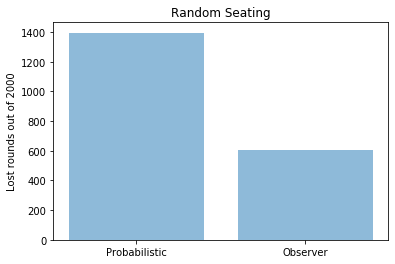

In [41]:
names = [n for n in losses]
x = ['Probabilistic', 'Observer']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i]-wins[i]) #adding back up the dices they got back from exactly!
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Lost rounds out of 2000')
plt.title('Random Seating')
plt.savefig('Experiment 1a')
plt.show()

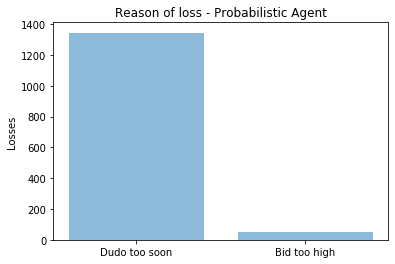

In [43]:
x = ['Dudo too soon', 'Bid too high']
y_pos = np.arange(len(x))
performance = [dudo_soon['Martha'], bid_high['Martha']]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Losses')
plt.title('Reason of loss - Probabilistic Agent')
plt.savefig('Experiment 1a2')
plt.show()

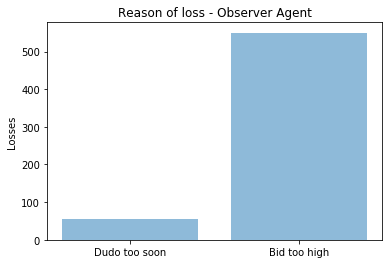

In [44]:
x = ['Dudo too soon', 'Bid too high']
y_pos = np.arange(len(x))
performance = [dudo_soon['Lorenzo'], bid_high['Lorenzo']]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Losses')
plt.title('Reason of loss - Observer Agent')
plt.savefig('Experiment 1a3')

plt.show()

# Experiment 1b - Random Seating - Rounds Multiple Players

In [6]:
losses = {}
wins = {}

## GAME!
Game = full_game(4, Human=False)
for x in Game.Players:
    losses[x] = 0
    wins[x] = 0

#2000 ROUNDS
for i in range(2000):
    print (losses)
    first_player = rnd.choice(Game.Players)
    roundd = rounds(Game.diceState, Game.Players, first_player, Game.human, shuffle=True)
    while roundd.last != 'Dudo' and roundd.last != 'Calza':

        # Play a round
        if roundd.player == 'Martha':
            agent1 = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                        last_bid = roundd.last)
            bid = agent1.make_bid()
        elif roundd.player == 'Lorenzo':
            agent2 = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                     roundd.history, roundd.total_dice, roundd.Players)
            bid = agent2.make_bid()
        elif roundd.player == 'Maria':
            agent3 = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                        last_bid = roundd.last)
            bid = agent3.make_bid()
        elif roundd.player == 'Manuel':
            agent4 = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                     roundd.history, roundd.total_dice, roundd.Players)
            bid = agent4.make_bid()
            

        print (roundd.player, ': ', bid)
        roundd.last = bid
        roundd.history.append(bid)

        #Analyse terminal bid and update dice accordingly
        if roundd.last == 'Dudo': 
            loser_winner = roundd.call()
            print ('Loser:', loser_winner[0])
            print (roundd.rolls)
            for i in roundd.Players:
                if roundd.loser == i:
                    losses[i] +=1
        
        elif roundd.last == 'Calza':
            loser_winner = roundd.call(Dudo = False, Calza = True)
            if loser_winner[1] == 1:
                print ('Winner:', loser_winner[0])
                print (roundd.rolls)
                for i in roundd.Players:
                    if roundd.winner == i:
                        wins[i] +=1
                        break
            else:
                print ('Loser:', loser_winner[0])
                print (roundd.rolls)
                for i in roundd.Players:
                    if roundd.loser == i:
                        losses[i] +=1
                        break

        else:
            roundd.next_player()
            
print (losses)

{'Martha': 0, 'Lorenzo': 0, 'Maria': 0, 'Manuel': 0}
Manuel :  [3, 2]
Maria :  [2, 1]
Lorenzo :  [6, 4]
Martha :  [7, 5]
Manuel :  Dudo
Loser: Manuel
{'Maria': [1, 3, 4, 2, 6], 'Lorenzo': [4, 1, 4, 2, 2], 'Martha': [2, 2, 5, 5, 5], 'Manuel': [2, 4, 5, 3, 1]}
{'Martha': 0, 'Lorenzo': 0, 'Maria': 0, 'Manuel': 1}
Martha :  [3, 4]
Maria :  [4, 5]
Manuel :  [6, 2]
Lorenzo :  [6, 3]
Martha :  [3, 1]
Maria :  [7, 5]
Manuel :  [8, 2]
Lorenzo :  Dudo
Loser: Manuel
{'Martha': [3, 1, 6, 4, 2], 'Maria': [5, 1, 5, 5, 3], 'Manuel': [6, 2, 3, 1, 2], 'Lorenzo': [3, 6, 3, 6, 2]}
{'Martha': 0, 'Lorenzo': 0, 'Maria': 0, 'Manuel': 2}
Manuel :  [3, 2]
Martha :  [4, 5]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  [6, 2]
Martha :  [7, 5]
Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [3, 6, 5, 4, 2], 'Martha': [5, 5, 1, 5, 3], 'Lorenzo': [5, 1, 4, 4, 1], 'Maria': [3, 1, 6, 2, 3]}
{'Martha': 0, 'Lorenzo': 1, 'Maria': 0, 'Manuel': 2}
Maria :  [3, 5]
Martha :  [4, 2]
Manuel :  [6, 2]
Lorenzo :  [6, 3]
Maria :  [3, 1]

Manuel :  [6, 4]
Maria :  [3, 1]
Lorenzo :  [7, 3]
Martha :  Dudo
Loser: Lorenzo
{'Manuel': [6, 4, 6, 2, 5], 'Maria': [1, 6, 1, 5, 5], 'Lorenzo': [4, 3, 6, 3, 6], 'Martha': [3, 4, 1, 2, 2]}
{'Martha': 17, 'Lorenzo': 14, 'Maria': 15, 'Manuel': 6}
Maria :  [2, 3]
Martha :  [1, 1]
Manuel :  [3, 3]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Martha :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [9, 2]
Maria :  Dudo
Loser: Maria
{'Maria': [1, 4, 4, 1, 6], 'Martha': [1, 6, 2, 2, 1], 'Manuel': [3, 2, 6, 2, 1], 'Lorenzo': [3, 2, 6, 5, 2]}
{'Martha': 17, 'Lorenzo': 14, 'Maria': 16, 'Manuel': 6}
Manuel :  [2, 4]
Lorenzo :  [3, 4]
Martha :  [2, 1]
Maria :  [5, 4]
Manuel :  [6, 4]
Lorenzo :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Manuel': [5, 4, 1, 3, 4], 'Lorenzo': [2, 4, 3, 3, 1], 'Martha': [4, 1, 1, 1, 6], 'Maria': [4, 1, 5, 5, 4]}
{'Martha': 18, 'Lorenzo': 14, 'Maria': 16, 'Manuel': 6}
Manuel :  [3, 3]
Lorenzo :  [4, 5]
Martha :  [5, 2]
Maria :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [5, 1]
Martha :  Dudo
Loser: Mart

Lorenzo :  [8, 5]
Martha :  Dudo
Loser: Lorenzo
{'Manuel': [6, 4, 5, 3, 5], 'Lorenzo': [2, 5, 5, 2, 6], 'Martha': [6, 2, 4, 5, 2], 'Maria': [6, 1, 5, 3, 4]}
{'Martha': 34, 'Lorenzo': 23, 'Maria': 32, 'Manuel': 10}
Martha :  [3, 2]
Lorenzo :  [4, 6]
Maria :  [5, 5]
Manuel :  [6, 4]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Maria': [6, 1, 4, 5, 5], 'Manuel': [3, 5, 4, 1, 4], 'Martha': [1, 3, 6, 2, 4], 'Lorenzo': [4, 2, 1, 5, 4]}
{'Martha': 34, 'Lorenzo': 23, 'Maria': 33, 'Manuel': 10}
Martha :  [3, 3]
Maria :  [2, 1]
Manuel :  [5, 6]
Lorenzo :  [6, 3]
Martha :  [3, 1]
Maria :  [4, 1]
Manuel :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo
{'Maria': [3, 1, 5, 2, 1], 'Manuel': [6, 2, 6, 1, 2], 'Lorenzo': [3, 3, 5, 1, 3], 'Martha': [2, 1, 1, 6, 1]}
{'Martha': 34, 'Lorenzo': 24, 'Maria': 33, 'Manuel': 10}
Maria :  [3, 2]
Manuel :  [5, 2]
Martha :  [6, 5]
Lorenzo :  [6, 6]
Maria :  [7, 2]
Manuel :  [8, 2]
Martha :  Dudo
Loser: Manuel
{'Lorenzo': [6, 4, 2, 6, 6], 'Maria': [2, 4, 

Manuel :  [3, 1]
Maria :  [7, 6]
Lorenzo :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 6, 3, 2, 6], 'Manuel': [1, 3, 3, 6, 1], 'Maria': [4, 6, 5, 6, 6], 'Lorenzo': [2, 5, 1, 6, 4]}
{'Martha': 47, 'Lorenzo': 32, 'Maria': 46, 'Manuel': 19}
Maria :  [3, 2]
Manuel :  [4, 5]
Lorenzo :  [2, 1]
Martha :  [5, 4]
Maria :  [6, 2]
Manuel :  [7, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [2, 3, 6, 3, 2], 'Lorenzo': [6, 6, 2, 1, 1], 'Martha': [4, 3, 1, 4, 4], 'Maria': [2, 4, 2, 5, 5]}
{'Martha': 47, 'Lorenzo': 33, 'Maria': 46, 'Manuel': 19}
Martha :  [3, 6]
Lorenzo :  [4, 3]
Manuel :  [6, 4]
Maria :  [7, 5]
Martha :  Dudo
Loser: Maria
{'Maria': [5, 6, 3, 2, 5], 'Martha': [6, 4, 6, 2, 1], 'Lorenzo': [1, 2, 2, 3, 2], 'Manuel': [4, 6, 6, 2, 6]}
{'Martha': 47, 'Lorenzo': 33, 'Maria': 47, 'Manuel': 19}
Manuel :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Maria': [6, 3, 3, 2, 1], 'Manuel': [4, 3, 1, 4, 6], 'Martha': [1, 4, 1, 1, 3], 'Lorenzo': [6, 1, 3, 6, 1]}
{'Mart

{'Lorenzo': [5, 4, 1, 3, 5], 'Martha': [6, 6, 6, 3, 2], 'Manuel': [2, 2, 4, 4, 6], 'Maria': [2, 6, 5, 6, 1]}
{'Martha': 61, 'Lorenzo': 43, 'Maria': 66, 'Manuel': 30}
Martha :  [2, 3]
Lorenzo :  [4, 2]
Manuel :  [2, 1]
Maria :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Manuel :  Dudo
Loser: Manuel
{'Maria': [2, 5, 3, 1, 1], 'Martha': [1, 4, 6, 3, 5], 'Lorenzo': [3, 6, 5, 1, 1], 'Manuel': [3, 1, 6, 1, 2]}
{'Martha': 61, 'Lorenzo': 43, 'Maria': 66, 'Manuel': 31}
Lorenzo :  [2, 4]
Maria :  [3, 4]
Manuel :  [2, 1]
Martha :  [5, 3]
Lorenzo :  [6, 4]
Maria :  [7, 4]
Manuel :  [8, 4]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 3, 1, 6, 4], 'Lorenzo': [1, 4, 4, 3, 6], 'Maria': [5, 4, 4, 6, 2], 'Manuel': [2, 4, 4, 1, 6]}
{'Martha': 62, 'Lorenzo': 43, 'Maria': 66, 'Manuel': 31}
Martha :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Manuel :  [8, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 1, 5, 1, 1], 'Maria': [3, 2, 5, 6, 5], 'M

Martha :  Dudo
Loser: Martha
{'Maria': [1, 2, 6, 2, 2], 'Martha': [1, 2, 5, 1, 4], 'Manuel': [5, 3, 5, 2, 2], 'Lorenzo': [1, 1, 2, 4, 1]}
{'Martha': 85, 'Lorenzo': 46, 'Maria': 82, 'Manuel': 44}
Manuel :  [2, 6]
Lorenzo :  [4, 5]
Martha :  [2, 1]
Maria :  [5, 6]
Manuel :  [3, 1]
Lorenzo :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [2, 3, 3, 3, 6], 'Martha': [1, 5, 3, 1, 5], 'Maria': [6, 6, 5, 3, 6], 'Manuel': [3, 2, 6, 5, 4]}
{'Martha': 86, 'Lorenzo': 46, 'Maria': 82, 'Manuel': 44}
Martha :  [3, 2]
Lorenzo :  [5, 3]
Maria :  [6, 6]
Manuel :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Manuel': [3, 2, 2, 3, 3], 'Martha': [4, 2, 1, 4, 1], 'Lorenzo': [1, 6, 3, 3, 4], 'Maria': [6, 3, 5, 6, 4]}
{'Martha': 87, 'Lorenzo': 46, 'Maria': 82, 'Manuel': 44}
Maria :  [3, 3]
Martha :  [4, 6]
Lorenzo :  [6, 6]
Manuel :  [3, 1]
Maria :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [4, 1, 6, 4, 3], 'Manuel': [5, 1, 1, 3, 4], 'Maria': [3, 2, 3, 1, 4], 'Martha': [6, 1, 6, 4, 3]}
{'Martha': 88, 'Lorenz

Lorenzo :  [3, 1]
Manuel :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [2, 1, 3, 1, 4], 'Manuel': [1, 5, 6, 2, 2], 'Maria': [4, 3, 5, 2, 1], 'Martha': [4, 6, 4, 2, 6]}
{'Martha': 104, 'Lorenzo': 51, 'Maria': 97, 'Manuel': 53}
Maria :  [2, 3]
Manuel :  [4, 3]
Lorenzo :  [6, 6]
Martha :  [7, 4]
Maria :  Dudo
Loser: Martha
{'Lorenzo': [4, 5, 6, 3, 3], 'Martha': [5, 1, 3, 4, 4], 'Maria': [2, 4, 3, 3, 3], 'Manuel': [1, 2, 5, 3, 5]}
{'Martha': 105, 'Lorenzo': 51, 'Maria': 97, 'Manuel': 53}
Martha :  [2, 3]
Maria :  [3, 4]
Manuel :  [5, 5]
Lorenzo :  [6, 5]
Martha :  [7, 3]
Maria :  Dudo
Loser: Martha
{'Manuel': [4, 5, 2, 3, 5], 'Lorenzo': [1, 5, 4, 3, 5], 'Martha': [3, 2, 3, 6, 3], 'Maria': [5, 5, 4, 4, 4]}
{'Martha': 106, 'Lorenzo': 51, 'Maria': 97, 'Manuel': 53}
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [6, 6]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Martha': [1, 3, 5, 6, 1], 'Lorenzo': [4, 1, 1, 4, 5], 'Maria': [3, 4, 2, 1, 4], 'Manuel': [3, 2,

Loser: Martha
{'Maria': [1, 1, 2, 5, 3], 'Manuel': [1, 4, 4, 4, 5], 'Martha': [3, 6, 4, 3, 1], 'Lorenzo': [3, 2, 5, 1, 4]}
{'Martha': 124, 'Lorenzo': 60, 'Maria': 116, 'Manuel': 57}
Martha :  [2, 4]
Lorenzo :  [4, 4]
Maria :  [5, 5]
Manuel :  [6, 6]
Martha :  [7, 4]
Lorenzo :  [8, 4]
Maria :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 2, 3, 5, 4], 'Maria': [6, 5, 2, 5, 1], 'Manuel': [6, 1, 3, 6, 6], 'Martha': [4, 4, 5, 3, 4]}
{'Martha': 124, 'Lorenzo': 61, 'Maria': 116, 'Manuel': 57}
Martha :  [2, 2]
Maria :  [3, 5]
Manuel :  [2, 1]
Lorenzo :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 1, 1, 2, 1], 'Martha': [1, 5, 2, 3, 2], 'Maria': [6, 6, 3, 5, 5], 'Manuel': [4, 1, 5, 1, 1]}
{'Martha': 125, 'Lorenzo': 61, 'Maria': 116, 'Manuel': 57}
Manuel :  [2, 5]
Lorenzo :  [3, 2]
Martha :  [4, 5]
Maria :  [5, 2]
Manuel :  [6, 5]
Lorenzo :  [7, 2]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [4, 4, 3, 2, 2], 'Martha': [5, 1, 5, 6, 4], 'Maria': [5, 2, 2, 6, 6], 'Manuel': [4, 5, 5, 3, 2]}
{'Martha': 

Maria :  Dudo
Loser: Maria
{'Lorenzo': [6, 1, 6, 1, 5], 'Manuel': [2, 4, 1, 2, 3], 'Maria': [5, 1, 1, 5, 2], 'Martha': [3, 3, 2, 1, 2]}
{'Martha': 138, 'Lorenzo': 69, 'Maria': 129, 'Manuel': 66}
Martha :  [3, 4]
Maria :  [4, 4]
Lorenzo :  [6, 4]
Manuel :  [7, 4]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 5, 2, 4, 4], 'Manuel': [2, 4, 4, 2, 6], 'Martha': [4, 4, 4, 4, 2], 'Maria': [6, 4, 6, 4, 2]}
{'Martha': 139, 'Lorenzo': 69, 'Maria': 129, 'Manuel': 66}
Maria :  [2, 2]
Lorenzo :  [4, 5]
Manuel :  [5, 2]
Martha :  [6, 4]
Maria :  [7, 2]
Lorenzo :  [7, 5]
Manuel :  Dudo
Loser: Lorenzo
{'Manuel': [5, 4, 6, 4, 2], 'Martha': [1, 2, 4, 6, 4], 'Maria': [1, 2, 2, 4, 3], 'Lorenzo': [1, 6, 2, 5, 5]}
{'Martha': 139, 'Lorenzo': 70, 'Maria': 129, 'Manuel': 66}
Lorenzo :  [2, 4]
Maria :  [1, 1]
Martha :  [3, 5]
Manuel :  [4, 3]
Lorenzo :  [5, 4]
Maria :  [3, 1]
Martha :  [7, 5]
Manuel :  [8, 3]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [5, 1, 5, 5, 4], 'Manuel': [3, 1, 3, 6, 6], 'Lorenzo': [4, 6, 

Martha :  Dudo
Loser: Manuel
{'Maria': [4, 1, 2, 1, 6], 'Manuel': [6, 5, 2, 6, 1], 'Martha': [4, 6, 6, 5, 2], 'Lorenzo': [2, 5, 4, 4, 6]}
{'Martha': 152, 'Lorenzo': 83, 'Maria': 144, 'Manuel': 71}
Maria :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [6, 4]
Manuel :  [3, 1]
Maria :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Manuel': [5, 1, 6, 3, 4], 'Maria': [1, 1, 1, 3, 5], 'Martha': [2, 2, 1, 1, 3], 'Lorenzo': [4, 4, 5, 1, 2]}
{'Martha': 153, 'Lorenzo': 83, 'Maria': 144, 'Manuel': 71}
Martha :  [3, 4]
Manuel :  [4, 3]
Lorenzo :  [6, 4]
Maria :  [7, 4]
Martha :  Dudo
Loser: Martha
{'Maria': [1, 6, 3, 4, 4], 'Martha': [6, 4, 4, 3, 5], 'Manuel': [2, 1, 4, 4, 2], 'Lorenzo': [4, 1, 4, 5, 2]}
{'Martha': 154, 'Lorenzo': 83, 'Maria': 144, 'Manuel': 71}
Manuel :  [2, 2]
Maria :  [3, 2]
Lorenzo :  [4, 4]
Martha :  [2, 1]
Manuel :  [6, 2]
Maria :  [7, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [1, 5, 1, 3, 3], 'Manuel': [3, 2, 5, 2, 6], 'Maria': [6, 4, 2, 2, 6], 'Lorenzo': [5, 1, 5, 1, 4]}
{'Martha': 154, 

Martha :  [7, 5]
Maria :  Dudo
Loser: Maria
{'Maria': [4, 3, 5, 1, 4], 'Lorenzo': [6, 5, 1, 5, 5], 'Manuel': [2, 6, 6, 6, 3], 'Martha': [6, 5, 3, 6, 5]}
{'Martha': 170, 'Lorenzo': 89, 'Maria': 160, 'Manuel': 81}
Manuel :  [3, 4]
Lorenzo :  [4, 2]
Maria :  [5, 4]
Martha :  [6, 3]
Manuel :  [7, 3]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Maria': [4, 4, 4, 3, 2], 'Martha': [5, 5, 3, 2, 3], 'Manuel': [3, 4, 3, 4, 4], 'Lorenzo': [1, 1, 4, 1, 1]}
{'Martha': 170, 'Lorenzo': 89, 'Maria': 161, 'Manuel': 81}
Maria :  [2, 4]
Manuel :  [4, 3]
Lorenzo :  [6, 6]
Martha :  [7, 2]
Maria :  Dudo
Loser: Martha
{'Manuel': [4, 3, 3, 3, 1], 'Lorenzo': [2, 6, 6, 6, 1], 'Martha': [2, 3, 3, 2, 4], 'Maria': [5, 2, 3, 4, 4]}
{'Martha': 171, 'Lorenzo': 89, 'Maria': 161, 'Manuel': 81}
Lorenzo :  [2, 4]
Maria :  [3, 3]
Manuel :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Martha': [1, 5, 2, 1, 5], 'Lorenzo': [6, 6, 4, 5, 1], 'Maria': [2, 5, 3, 3, 6], 'Manuel': [1, 6, 4, 1, 5]}
{'Ma

Maria :  [6, 2]
Lorenzo :  [6, 4]
Manuel :  [7, 3]
Martha :  Dudo
Loser: Manuel
{'Lorenzo': [2, 4, 4, 3, 5], 'Manuel': [5, 3, 1, 3, 4], 'Martha': [6, 4, 2, 5, 4], 'Maria': [2, 6, 2, 5, 4]}
{'Martha': 191, 'Lorenzo': 94, 'Maria': 178, 'Manuel': 92}
Manuel :  [2, 2]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  [3, 1]
Martha :  [7, 4]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Manuel': [1, 2, 6, 2, 1], 'Martha': [4, 3, 1, 5, 4], 'Lorenzo': [5, 6, 2, 1, 4], 'Maria': [3, 5, 3, 6, 5]}
{'Martha': 191, 'Lorenzo': 94, 'Maria': 179, 'Manuel': 92}
Lorenzo :  [3, 2]
Martha :  [4, 4]
Manuel :  [6, 4]
Maria :  [7, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [5, 1, 5, 2, 2], 'Maria': [2, 5, 5, 2, 3], 'Lorenzo': [2, 3, 4, 1, 1], 'Martha': [4, 2, 4, 3, 6]}
{'Martha': 191, 'Lorenzo': 95, 'Maria': 179, 'Manuel': 92}
Lorenzo :  [3, 4]
Martha :  [4, 6]
Manuel :  [5, 6]
Maria :  [6, 6]
Lorenzo :  [3, 1]
Martha :  [7, 6]
Manuel :  [8, 6]
Maria :  Dudo
Loser: Maria
{'Maria': [5, 6, 6, 4, 

Lorenzo :  [6, 4]
Maria :  [7, 5]
Manuel :  [8, 4]
Martha :  Dudo
Loser: Martha
{'Maria': [5, 1, 5, 4, 3], 'Manuel': [4, 5, 1, 4, 6], 'Martha': [3, 4, 2, 2, 2], 'Lorenzo': [2, 3, 4, 4, 1]}
{'Martha': 209, 'Lorenzo': 100, 'Maria': 200, 'Manuel': 98}
Martha :  [2, 2]
Lorenzo :  [4, 2]
Manuel :  [5, 6]
Maria :  [6, 5]
Martha :  [7, 2]
Lorenzo :  [8, 2]
Manuel :  Dudo
Loser: Lorenzo
{'Manuel': [6, 6, 2, 4, 6], 'Maria': [5, 3, 2, 5, 5], 'Martha': [3, 2, 3, 2, 6], 'Lorenzo': [3, 4, 2, 2, 6]}
{'Martha': 209, 'Lorenzo': 101, 'Maria': 200, 'Manuel': 98}
Martha :  [2, 2]
Manuel :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Martha :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [6, 5, 2, 3, 1], 'Maria': [3, 3, 6, 6, 6], 'Martha': [1, 3, 6, 1, 4], 'Manuel': [6, 1, 5, 1, 6]}
{'Martha': 209, 'Lorenzo': 101, 'Maria': 201, 'Manuel': 98}
Manuel :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Martha :  [4, 2]
Manuel :  [5, 3]
Lorenzo :  [6, 2]
Maria :  [7, 3]
Martha :  Dudo

Maria :  [2, 1]
Martha :  [5, 5]
Manuel :  [6, 3]
Lorenzo :  [6, 4]
Maria :  [3, 1]
Martha :  [7, 5]
Manuel :  [8, 3]
Lorenzo :  Dudo
Loser: Manuel
{'Martha': [5, 6, 5, 6, 1], 'Manuel': [6, 6, 2, 3, 3], 'Lorenzo': [3, 6, 4, 4, 4], 'Maria': [1, 5, 2, 1, 2]}
{'Martha': 219, 'Lorenzo': 107, 'Maria': 222, 'Manuel': 110}
Lorenzo :  [2, 3]
Maria :  [3, 5]
Manuel :  [5, 3]
Martha :  [6, 5]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Manuel :  [8, 5]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [6, 2, 2, 1, 1], 'Maria': [5, 4, 5, 1, 3], 'Manuel': [2, 5, 5, 3, 3], 'Martha': [6, 4, 5, 1, 5]}
{'Martha': 220, 'Lorenzo': 107, 'Maria': 222, 'Manuel': 110}
Manuel :  [3, 3]
Lorenzo :  [4, 3]
Martha :  [5, 2]
Maria :  [6, 5]
Manuel :  [7, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 3, 4, 1, 1], 'Martha': [5, 2, 1, 6, 2], 'Maria': [5, 4, 6, 6, 5], 'Manuel': [2, 3, 6, 2, 6]}
{'Martha': 220, 'Lorenzo': 108, 'Maria': 222, 'Manuel': 110}
Manuel :  [3, 2]
Maria :  [4, 3]
Martha :  [5, 5]
Lorenzo :  [6, 6]
Manuel :  

{'Martha': 237, 'Lorenzo': 115, 'Maria': 236, 'Manuel': 120}
Manuel :  [2, 4]
Maria :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [6, 3]
Manuel :  [3, 1]
Maria :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 6, 3, 4], 'Manuel': [4, 1, 3, 2, 1], 'Maria': [3, 5, 4, 3, 3], 'Martha': [2, 4, 5, 4, 1]}
{'Martha': 238, 'Lorenzo': 115, 'Maria': 236, 'Manuel': 120}
Martha :  [3, 6]
Lorenzo :  [5, 2]
Maria :  [3, 1]
Manuel :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [1, 1, 2, 6, 5], 'Manuel': [1, 1, 2, 2, 6], 'Martha': [4, 6, 6, 1, 3], 'Lorenzo': [1, 2, 2, 5, 2]}
{'Martha': 239, 'Lorenzo': 115, 'Maria': 236, 'Manuel': 120}
Martha :  [3, 3]
Lorenzo :  [5, 2]
Manuel :  [3, 1]
Maria :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 1, 6, 5, 3], 'Lorenzo': [5, 1, 4, 1, 2], 'Manuel': [4, 2, 1, 6, 3], 'Maria': [6, 1, 4, 6, 5]}
{'Martha': 240, 'Lorenzo': 115, 'Maria': 236, 'Manuel': 120}
Lorenzo :  [3, 2]
Manuel :  [4, 4]
Martha :  [2, 1]
Maria :  [3, 1]
Lorenzo :  [4, 1]
Manuel :  [9, 4]
Ma

Martha :  [7, 3]
Manuel :  [8, 2]
Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [3, 5, 2, 2, 2], 'Lorenzo': [6, 6, 2, 5, 2], 'Maria': [6, 1, 2, 5, 6], 'Martha': [2, 3, 6, 3, 4]}
{'Martha': 254, 'Lorenzo': 122, 'Maria': 251, 'Manuel': 127}
Manuel :  [2, 5]
Maria :  [3, 4]
Lorenzo :  [5, 5]
Martha :  [3, 1]
Manuel :  [4, 1]
Maria :  Dudo
Loser: Manuel
{'Maria': [6, 2, 3, 4, 4], 'Lorenzo': [4, 2, 1, 3, 6], 'Martha': [3, 2, 1, 6, 4], 'Manuel': [3, 6, 1, 4, 5]}
{'Martha': 254, 'Lorenzo': 122, 'Maria': 251, 'Manuel': 128}
Martha :  [3, 3]
Lorenzo :  [4, 3]
Manuel :  [2, 1]
Maria :  [5, 3]
Martha :  [6, 3]
Lorenzo :  [7, 3]
Manuel :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [3, 6, 3, 4, 4], 'Manuel': [3, 1, 1, 1, 1], 'Maria': [5, 5, 3, 4, 3], 'Martha': [4, 3, 4, 2, 3]}
{'Martha': 254, 'Lorenzo': 122, 'Maria': 252, 'Manuel': 128}
Manuel :  [2, 2]
Lorenzo :  [3, 4]
Maria :  [4, 5]
Martha :  [5, 3]
Manuel :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Lorenzo
{'Maria': [5, 5, 1, 5, 4], 'Marth

Maria :  Dudo
Loser: Martha
{'Manuel': [4, 6, 2, 6, 1], 'Martha': [3, 5, 4, 3, 2], 'Maria': [4, 5, 5, 2, 5], 'Lorenzo': [4, 1, 2, 4, 6]}
{'Martha': 268, 'Lorenzo': 131, 'Maria': 271, 'Manuel': 135}
Martha :  [3, 6]
Maria :  [4, 6]
Manuel :  [6, 2]
Lorenzo :  [7, 2]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 2, 6, 6, 4], 'Maria': [1, 4, 6, 5, 6], 'Manuel': [2, 2, 5, 1, 3], 'Lorenzo': [3, 2, 4, 4, 2]}
{'Martha': 269, 'Lorenzo': 131, 'Maria': 271, 'Manuel': 135}
Maria :  [3, 6]
Martha :  [4, 2]
Manuel :  [6, 5]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [3, 1, 4, 2, 2], 'Maria': [5, 6, 6, 6, 1], 'Martha': [4, 5, 2, 6, 3], 'Manuel': [1, 2, 5, 3, 5]}
{'Martha': 269, 'Lorenzo': 131, 'Maria': 272, 'Manuel': 135}
Manuel :  [3, 6]
Martha :  [4, 6]
Lorenzo :  [6, 5]
Maria :  [7, 2]
Manuel :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [1, 6, 6, 3, 6], 'Lorenzo': [5, 2, 6, 2, 3], 'Maria': [2, 1, 2, 2, 5], 'Manuel': [6, 2, 6, 6, 6]}
{'Martha': 270, 'Lorenzo': 131, 'Maria': 272, '

Martha :  [6, 2]
Lorenzo :  [3, 1]
Manuel :  [4, 1]
Maria :  Dudo
Loser: Manuel
{'Manuel': [3, 4, 1, 2, 2], 'Maria': [4, 4, 6, 4, 1], 'Martha': [2, 5, 6, 4, 3], 'Lorenzo': [5, 6, 2, 3, 1]}
{'Martha': 285, 'Lorenzo': 140, 'Maria': 287, 'Manuel': 143}
Manuel :  [3, 5]
Lorenzo :  [4, 2]
Martha :  [2, 1]
Maria :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [5, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 4, 1, 2, 3], 'Manuel': [1, 5, 1, 3, 3], 'Lorenzo': [6, 1, 6, 1, 3], 'Martha': [4, 5, 6, 3, 1]}
{'Martha': 286, 'Lorenzo': 140, 'Maria': 287, 'Manuel': 143}
Martha :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 3]
Lorenzo :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 4, 1, 3, 3], 'Martha': [2, 5, 3, 2, 3], 'Maria': [6, 2, 6, 4, 2], 'Manuel': [6, 1, 3, 4, 3]}
{'Martha': 287, 'Lorenzo': 140, 'Maria': 287, 'Manuel': 143}
Lorenzo :  [2, 4]
Manuel :  [4, 3]
Martha :  [5, 4]
Maria :  [3, 1]
Lorenzo :  [4, 1]
Manuel :  [9, 3]
Martha :  Dudo
Loser: Martha
{'Manuel': [3, 4, 4, 6, 3], 'Martha': [4, 3, 4, 1

Manuel :  [3, 2]
Maria :  [2, 1]
Lorenzo :  [5, 5]
Martha :  [6, 5]
Manuel :  [7, 5]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [2, 4, 2, 5, 2], 'Martha': [5, 3, 5, 2, 5], 'Manuel': [4, 1, 5, 5, 1], 'Maria': [1, 6, 6, 4, 1]}
{'Martha': 308, 'Lorenzo': 147, 'Maria': 303, 'Manuel': 150}
Martha :  [3, 6]
Maria :  [4, 6]
Lorenzo :  [2, 1]
Manuel :  [6, 3]
Martha :  [3, 1]
Maria :  [7, 6]
Lorenzo :  [4, 1]
Manuel :  [5, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 2, 5, 6, 6], 'Lorenzo': [3, 1, 6, 5, 4], 'Manuel': [1, 3, 3, 6, 4], 'Martha': [4, 1, 1, 1, 3]}
{'Martha': 309, 'Lorenzo': 147, 'Maria': 303, 'Manuel': 150}
Martha :  [3, 5]
Manuel :  [4, 3]
Maria :  [5, 2]
Lorenzo :  [3, 1]
Martha :  [7, 5]
Manuel :  [8, 4]
Maria :  Dudo
Loser: Maria
{'Manuel': [4, 1, 3, 4, 2], 'Maria': [2, 2, 2, 2, 4], 'Lorenzo': [1, 4, 4, 3, 1], 'Martha': [6, 6, 3, 5, 5]}
{'Martha': 309, 'Lorenzo': 147, 'Maria': 304, 'Manuel': 150}
Martha :  [3, 3]
Maria :  [2, 1]
Manuel :  [6, 6]
Lorenzo :  [7, 6]
Martha :  Dudo
L

Martha :  [5, 4]
Manuel :  [6, 2]
Maria :  [7, 3]
Lorenzo :  [7, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [3, 4, 4, 6, 5], 'Manuel': [6, 5, 4, 2, 6], 'Maria': [5, 3, 3, 6, 3], 'Lorenzo': [5, 6, 5, 2, 5]}
{'Martha': 323, 'Lorenzo': 158, 'Maria': 321, 'Manuel': 157}
Manuel :  [3, 5]
Martha :  [4, 4]
Maria :  [5, 2]
Lorenzo :  [6, 2]
Manuel :  [7, 2]
Martha :  Dudo
Loser: Manuel
{'Manuel': [2, 3, 5, 4, 2], 'Martha': [3, 1, 4, 5, 4], 'Maria': [2, 2, 4, 5, 5], 'Lorenzo': [5, 3, 3, 2, 5]}
{'Martha': 323, 'Lorenzo': 158, 'Maria': 321, 'Manuel': 158}
Martha :  [3, 4]
Manuel :  [4, 4]
Maria :  [2, 1]
Lorenzo :  [4, 1]
Martha :  Dudo
Loser: Lorenzo
{'Manuel': [6, 2, 3, 4, 4], 'Maria': [6, 6, 2, 1, 1], 'Lorenzo': [4, 2, 4, 5, 2], 'Martha': [3, 5, 2, 4, 1]}
{'Martha': 323, 'Lorenzo': 159, 'Maria': 321, 'Manuel': 158}
Lorenzo :  [3, 5]
Maria :  [2, 1]
Martha :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [9, 5]
Maria :  Dudo
Loser: Maria
{'Maria': [1, 6, 2, 3, 1], 'Martha': [6, 6, 1, 3, 1], 'Manuel': [6,

Lorenzo :  [7, 5]
Martha :  Dudo
Loser: Lorenzo
{'Martha': [2, 6, 3, 2, 1], 'Maria': [1, 6, 2, 6, 2], 'Manuel': [1, 3, 3, 2, 6], 'Lorenzo': [5, 3, 6, 5, 1]}
{'Martha': 338, 'Lorenzo': 169, 'Maria': 335, 'Manuel': 164}
Manuel :  [3, 5]
Maria :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [6, 3]
Manuel :  [3, 1]
Maria :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 1, 1, 4, 1], 'Martha': [3, 5, 5, 4, 4], 'Lorenzo': [3, 3, 4, 3, 3], 'Manuel': [2, 6, 4, 1, 3]}
{'Martha': 339, 'Lorenzo': 169, 'Maria': 335, 'Manuel': 164}
Maria :  [2, 3]
Martha :  [3, 5]
Manuel :  [4, 6]
Lorenzo :  [6, 6]
Maria :  [3, 1]
Martha :  [7, 5]
Manuel :  [8, 4]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [3, 5, 5, 4, 6], 'Maria': [1, 1, 4, 5, 3], 'Martha': [5, 5, 1, 5, 3], 'Manuel': [4, 5, 1, 4, 4]}
{'Martha': 339, 'Lorenzo': 170, 'Maria': 335, 'Manuel': 164}
Manuel :  [3, 4]
Lorenzo :  [2, 1]
Martha :  [5, 5]
Maria :  [6, 4]
Manuel :  [7, 4]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [4, 6, 5, 2, 5], 'Maria': [1, 4, 4, 

Maria :  [4, 2]
Lorenzo :  [5, 5]
Manuel :  [6, 3]
Martha :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [5, 1, 3, 1, 5], 'Manuel': [3, 3, 5, 5, 1], 'Martha': [2, 2, 6, 5, 3], 'Maria': [4, 6, 2, 3, 2]}
{'Martha': 344, 'Lorenzo': 173, 'Maria': 350, 'Manuel': 167}
Manuel :  [2, 6]
Lorenzo :  [3, 4]
Martha :  [4, 5]
Maria :  [5, 4]
Manuel :  [6, 5]
Lorenzo :  [7, 4]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 4, 2, 6, 4], 'Manuel': [5, 2, 4, 2, 3], 'Lorenzo': [3, 5, 4, 4, 2], 'Martha': [1, 5, 4, 3, 5]}
{'Martha': 345, 'Lorenzo': 173, 'Maria': 350, 'Manuel': 167}
Maria :  [2, 6]
Lorenzo :  [3, 5]
Manuel :  [4, 4]
Martha :  [2, 1]
Maria :  [3, 1]
Lorenzo :  [4, 1]
Manuel :  [5, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 2, 1, 5, 1], 'Lorenzo': [5, 1, 6, 1, 3], 'Manuel': [4, 4, 5, 5, 1], 'Martha': [4, 1, 1, 3, 4]}
{'Martha': 346, 'Lorenzo': 173, 'Maria': 350, 'Manuel': 167}
Maria :  [3, 5]
Martha :  [4, 2]
Manuel :  [6, 5]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Martha :  Dudo
Loser: Martha
{'

Martha :  [3, 1]
Manuel :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria
{'Manuel': [1, 5, 1, 1, 6], 'Lorenzo': [1, 6, 5, 1, 6], 'Maria': [5, 6, 5, 2, 1], 'Martha': [1, 2, 6, 2, 1]}
{'Martha': 356, 'Lorenzo': 180, 'Maria': 365, 'Manuel': 174}
Manuel :  [3, 4]
Lorenzo :  [5, 2]
Martha :  [6, 4]
Maria :  [7, 4]
Manuel :  [8, 4]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [2, 1, 5, 5, 2], 'Martha': [4, 2, 4, 4, 4], 'Maria': [4, 3, 5, 4, 6], 'Manuel': [6, 1, 4, 4, 6]}
{'Martha': 356, 'Lorenzo': 181, 'Maria': 365, 'Manuel': 174}
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [4, 1]
Martha :  Dudo
Loser: Manuel
{'Maria': [1, 2, 1, 5, 2], 'Manuel': [2, 4, 5, 4, 2], 'Martha': [3, 6, 4, 5, 6], 'Lorenzo': [6, 6, 6, 1, 4]}
{'Martha': 356, 'Lorenzo': 181, 'Maria': 365, 'Manuel': 175}
Maria :  [2, 2]
Manuel :  [3, 3]
Martha :  [4, 6]
Lorenzo :  [5, 4]
Maria :  [6, 2]
Manuel :  [6, 4]
Martha :  [7, 6]
Lorenzo :  [8, 2]
Maria :  Dudo
Loser: Lorenzo
{'Martha': [6, 1, 6, 5, 3], 'Lorenzo': [2, 1, 2, 3

Martha :  [3, 4]
Manuel :  [4, 6]
Maria :  [5, 4]
Lorenzo :  [6, 2]
Martha :  [3, 1]
Manuel :  [7, 6]
Maria :  Dudo
Loser: Maria
{'Maria': [3, 5, 4, 1, 4], 'Lorenzo': [5, 2, 6, 1, 2], 'Martha': [1, 3, 5, 2, 6], 'Manuel': [6, 4, 2, 6, 3]}
{'Martha': 377, 'Lorenzo': 189, 'Maria': 389, 'Manuel': 179}
Maria :  [3, 2]
Manuel :  [4, 2]
Martha :  [5, 2]
Lorenzo :  [6, 2]
Maria :  [7, 2]
Manuel :  [8, 2]
Martha :  Dudo
Loser: Martha
{'Maria': [2, 5, 2, 3, 1], 'Manuel': [4, 2, 5, 6, 2], 'Martha': [2, 6, 4, 5, 3], 'Lorenzo': [2, 1, 1, 2, 2]}
{'Martha': 378, 'Lorenzo': 189, 'Maria': 389, 'Manuel': 179}
Lorenzo :  [3, 3]
Manuel :  [2, 1]
Maria :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [9, 3]
Manuel :  Dudo
Loser: Lorenzo
{'Maria': [2, 5, 1, 4, 3], 'Martha': [6, 1, 2, 1, 4], 'Lorenzo': [6, 5, 6, 3, 3], 'Manuel': [6, 1, 1, 6, 5]}
{'Martha': 378, 'Lorenzo': 190, 'Maria': 389, 'Manuel': 179}
Maria :  [3, 6]
Manuel :  [5, 4]
Lorenzo :  [3, 1]
Martha :  [7, 4]
Maria :  Dudo
Loser: Maria
{'Maria': [2, 5, 4, 

Martha :  Dudo
Loser: Martha
{'Manuel': [4, 1, 2, 5, 4], 'Maria': [3, 1, 1, 2, 4], 'Martha': [4, 1, 3, 4, 4], 'Lorenzo': [2, 4, 1, 1, 4]}
{'Martha': 391, 'Lorenzo': 196, 'Maria': 410, 'Manuel': 188}
Manuel :  [2, 5]
Martha :  [1, 1]
Maria :  [3, 4]
Lorenzo :  [2, 1]
Manuel :  [6, 5]
Martha :  [3, 1]
Maria :  [7, 4]
Lorenzo :  [4, 1]
Manuel :  [9, 5]
Martha :  Dudo
Loser: Manuel
{'Martha': [3, 2, 1, 1, 5], 'Maria': [1, 4, 6, 3, 4], 'Lorenzo': [1, 1, 3, 6, 3], 'Manuel': [2, 5, 3, 5, 6]}
{'Martha': 391, 'Lorenzo': 196, 'Maria': 410, 'Manuel': 189}
Lorenzo :  [3, 4]
Manuel :  [4, 4]
Martha :  [5, 5]
Maria :  [3, 1]
Lorenzo :  [4, 1]
Manuel :  [9, 4]
Martha :  Dudo
Loser: Martha
{'Manuel': [4, 2, 5, 4, 6], 'Martha': [3, 4, 5, 6, 5], 'Maria': [1, 5, 4, 1, 5], 'Lorenzo': [5, 4, 5, 1, 4]}
{'Martha': 392, 'Lorenzo': 196, 'Maria': 410, 'Manuel': 189}
Maria :  [3, 6]
Manuel :  [4, 3]
Martha :  [5, 3]
Lorenzo :  [6, 3]
Maria :  [7, 6]
Manuel :  [8, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [1, 4

Martha :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Maria': [3, 1, 4, 6, 4], 'Manuel': [1, 3, 3, 4, 4], 'Lorenzo': [4, 1, 5, 5, 1], 'Martha': [1, 1, 2, 1, 3]}
{'Martha': 410, 'Lorenzo': 201, 'Maria': 429, 'Manuel': 198}
Manuel :  [2, 4]
Lorenzo :  [3, 6]
Martha :  [2, 1]
Maria :  [5, 4]
Manuel :  [6, 4]
Lorenzo :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 3, 3, 3, 3], 'Martha': [1, 3, 1, 5, 2], 'Maria': [4, 3, 4, 6, 5], 'Manuel': [4, 3, 2, 5, 4]}
{'Martha': 411, 'Lorenzo': 201, 'Maria': 429, 'Manuel': 198}
Manuel :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Martha :  [7, 6]
Manuel :  [8, 5]
Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [3, 5, 5, 4, 1], 'Lorenzo': [1, 5, 1, 1, 5], 'Maria': [3, 3, 5, 1, 1], 'Martha': [4, 2, 6, 1, 6]}
{'Martha': 411, 'Lorenzo': 202, 'Maria': 429, 'Manuel': 198}
Lorenzo :  [3, 5]
Manuel :  [4, 2]
Martha :  [5, 2]
Maria :  [6, 4]
Lorenzo :  [3, 1]
Manuel :  [7, 5]
Martha :  Dudo
Loser: Manuel
{'Manuel': [5, 3, 6, 5, 2], 'Martha': [4, 2, 4, 6, 2], 'Maria': [3

Lorenzo :  [2, 4]
Manuel :  [3, 3]
Martha :  [4, 2]
Maria :  [2, 1]
Lorenzo :  [5, 4]
Manuel :  [6, 3]
Martha :  [7, 2]
Maria :  Dudo
Loser: Martha
{'Manuel': [3, 3, 5, 3, 5], 'Martha': [2, 3, 3, 5, 2], 'Maria': [1, 3, 1, 4, 6], 'Lorenzo': [4, 4, 5, 4, 4]}
{'Martha': 426, 'Lorenzo': 206, 'Maria': 439, 'Manuel': 208}
Lorenzo :  [2, 2]
Martha :  [3, 3]
Maria :  [2, 1]
Manuel :  [6, 2]
Lorenzo :  [3, 1]
Martha :  [7, 3]
Maria :  Dudo
Loser: Maria
{'Manuel': [1, 4, 5, 2, 2], 'Lorenzo': [1, 2, 1, 1, 6], 'Martha': [5, 3, 3, 3, 6], 'Maria': [4, 1, 2, 1, 1]}
{'Martha': 426, 'Lorenzo': 206, 'Maria': 440, 'Manuel': 208}
Manuel :  [2, 5]
Maria :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Manuel :  [6, 3]
Maria :  [3, 1]
Martha :  [7, 3]
Lorenzo :  [4, 1]
Manuel :  [9, 2]
Maria :  Dudo
Loser: Manuel
{'Maria': [2, 1, 6, 5, 4], 'Martha': [3, 5, 1, 5, 3], 'Lorenzo': [4, 6, 5, 1, 1], 'Manuel': [4, 2, 2, 3, 6]}
{'Martha': 426, 'Lorenzo': 206, 'Maria': 440, 'Manuel': 209}
Maria :  [2, 5]
Martha :  [3, 3

Lorenzo :  [2, 1]
Martha :  [3, 1]
Manuel :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [1, 2, 5, 4, 6], 'Martha': [6, 1, 1, 2, 6], 'Manuel': [2, 5, 4, 2, 4], 'Maria': [3, 6, 1, 5, 5]}
{'Martha': 438, 'Lorenzo': 217, 'Maria': 461, 'Manuel': 218}
Maria :  [3, 4]
Manuel :  [4, 2]
Lorenzo :  [6, 6]
Martha :  [3, 1]
Maria :  [4, 1]
Manuel :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [5, 6, 2, 6, 4], 'Martha': [3, 1, 5, 1, 5], 'Maria': [4, 1, 1, 2, 1], 'Manuel': [2, 1, 2, 3, 5]}
{'Martha': 438, 'Lorenzo': 218, 'Maria': 461, 'Manuel': 218}
Lorenzo :  [2, 2]
Martha :  [1, 1]
Maria :  [3, 2]
Manuel :  [5, 6]
Lorenzo :  [6, 2]
Martha :  [3, 1]
Maria :  [7, 2]
Manuel :  [7, 6]
Lorenzo :  [8, 6]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 4, 2, 2, 1], 'Manuel': [2, 6, 6, 4, 3], 'Lorenzo': [2, 6, 6, 2, 5], 'Martha': [6, 2, 3, 4, 1]}
{'Martha': 439, 'Lorenzo': 218, 'Maria': 461, 'Manuel': 218}
Martha :  [3, 3]
Lorenzo :  [4, 2]
Maria :  [5, 3]
Manuel :  [6, 4]
Martha :  [3, 1]
Lorenzo :  

Lorenzo :  [8, 2]
Martha :  Dudo
Loser: Lorenzo
{'Maria': [4, 4, 2, 1, 4], 'Lorenzo': [3, 6, 5, 4, 2], 'Martha': [6, 1, 6, 1, 2], 'Manuel': [4, 5, 5, 1, 3]}
{'Martha': 449, 'Lorenzo': 228, 'Maria': 476, 'Manuel': 227}
Martha :  [3, 5]
Maria :  [4, 2]
Manuel :  [2, 1]
Lorenzo :  [5, 2]
Martha :  [6, 5]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Manuel
{'Martha': [5, 2, 4, 1, 5], 'Maria': [2, 2, 6, 5, 3], 'Manuel': [5, 2, 6, 1, 1], 'Lorenzo': [4, 2, 6, 5, 2]}
{'Martha': 449, 'Lorenzo': 228, 'Maria': 476, 'Manuel': 228}
Martha :  [2, 4]
Manuel :  [4, 3]
Lorenzo :  [6, 3]
Maria :  [7, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 2, 1, 5, 4], 'Manuel': [6, 1, 5, 1, 3], 'Lorenzo': [3, 3, 2, 3, 4], 'Maria': [2, 5, 5, 6, 5]}
{'Martha': 450, 'Lorenzo': 228, 'Maria': 476, 'Manuel': 228}
Lorenzo :  [2, 6]
Maria :  [1, 1]
Manuel :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [3, 1]
Manuel :  [4, 1]
Martha :  Dudo
Loser: Manuel
{'Martha': [2, 4, 6, 4, 2], 'Lorenzo': [4, 1, 4, 5, 3], 'Maria': [6

Maria :  Dudo
Loser: Maria
{'Martha': [3, 5, 5, 6, 3], 'Lorenzo': [6, 5, 1, 5, 4], 'Maria': [6, 1, 3, 4, 4], 'Manuel': [6, 1, 5, 5, 3]}
{'Martha': 461, 'Lorenzo': 238, 'Maria': 487, 'Manuel': 234}
Manuel :  [2, 5]
Maria :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [6, 2]
Manuel :  [3, 1]
Maria :  [7, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [3, 6, 1, 5, 3], 'Lorenzo': [5, 6, 6, 2, 6], 'Manuel': [1, 1, 4, 3, 4], 'Maria': [1, 5, 2, 4, 5]}
{'Martha': 462, 'Lorenzo': 238, 'Maria': 487, 'Manuel': 234}
Lorenzo :  [2, 3]
Martha :  [3, 2]
Manuel :  [2, 1]
Maria :  [5, 4]
Lorenzo :  [6, 6]
Martha :  [7, 2]
Manuel :  Dudo
Loser: Manuel
{'Maria': [4, 4, 2, 1, 6], 'Lorenzo': [4, 2, 6, 5, 6], 'Martha': [6, 2, 2, 5, 4], 'Manuel': [1, 4, 3, 1, 2]}
{'Martha': 462, 'Lorenzo': 238, 'Maria': 487, 'Manuel': 235}
Lorenzo :  [3, 6]
Martha :  [4, 3]
Maria :  [5, 3]
Manuel :  [6, 6]
Lorenzo :  [7, 5]
Martha :  Dudo
Loser: Lorenzo
{'Lorenzo': [2, 5, 5, 6, 5], 'Martha': [1, 3, 3, 3, 2], 'Maria': [5, 3, 6, 3, 5], 'Ma

Manuel :  [6, 3]
Lorenzo :  [3, 1]
Maria :  [7, 4]
Martha :  Dudo
Loser: Martha
{'Maria': [5, 3, 5, 4, 4], 'Martha': [6, 2, 3, 2, 5], 'Manuel': [1, 3, 3, 4, 4], 'Lorenzo': [3, 1, 2, 5, 1]}
{'Martha': 476, 'Lorenzo': 250, 'Maria': 503, 'Manuel': 244}
Martha :  [3, 2]
Lorenzo :  [4, 2]
Maria :  [5, 5]
Manuel :  [6, 4]
Martha :  [7, 2]
Lorenzo :  [8, 2]
Maria :  Dudo
Loser: Lorenzo
{'Martha': [2, 1, 4, 5, 2], 'Lorenzo': [1, 2, 4, 2, 3], 'Maria': [5, 5, 4, 1, 6], 'Manuel': [6, 4, 6, 4, 3]}
{'Martha': 476, 'Lorenzo': 251, 'Maria': 503, 'Manuel': 244}
Martha :  [3, 2]
Manuel :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Lorenzo': [3, 5, 6, 5, 5], 'Maria': [1, 5, 1, 1, 4], 'Martha': [1, 2, 5, 2, 6], 'Manuel': [4, 6, 6, 4, 2]}
{'Martha': 477, 'Lorenzo': 251, 'Maria': 503, 'Manuel': 244}
Martha :  [3, 3]
Lorenzo :  [4, 5]
Manuel :  [6, 2]
Maria :  [7, 5]
Martha :  Dudo
Loser: Maria
{'Lorenzo': [3, 5, 6, 5, 2], 'Manuel': [6, 4, 5, 6, 2], 'Maria': [5, 6, 6, 5, 4], 'Ma

{'Manuel': [1, 2, 1, 6, 4], 'Martha': [5, 3, 4, 4, 3], 'Lorenzo': [2, 1, 6, 4, 2], 'Maria': [1, 3, 4, 4, 4]}
{'Martha': 490, 'Lorenzo': 267, 'Maria': 520, 'Manuel': 249}
Maria :  [3, 2]
Manuel :  [2, 1]
Lorenzo :  [6, 4]
Martha :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Manuel': [5, 6, 5, 3, 6], 'Lorenzo': [6, 2, 4, 4, 4], 'Martha': [5, 2, 1, 3, 2], 'Maria': [5, 2, 2, 3, 1]}
{'Martha': 490, 'Lorenzo': 267, 'Maria': 521, 'Manuel': 249}
Martha :  [2, 5]
Lorenzo :  [3, 2]
Maria :  [4, 5]
Manuel :  [5, 3]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Maria': [5, 2, 5, 5, 2], 'Manuel': [6, 3, 1, 2, 3], 'Martha': [3, 1, 6, 1, 2], 'Lorenzo': [2, 5, 5, 2, 4]}
{'Martha': 490, 'Lorenzo': 267, 'Maria': 522, 'Manuel': 249}
Martha :  [2, 2]
Maria :  [1, 1]
Lorenzo :  [3, 1]
Manuel :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [4, 3, 6, 1, 2], 'Maria': [6, 1, 3, 2, 5], 'Lorenzo': [1, 6, 1, 1, 1], 'Manuel': [3, 5, 4, 3, 6]}
{'Martha': 491, 'Lorenzo': 267, 'Maria': 522, 'Manuel': 249

Lorenzo :  Dudo
Loser: Lorenzo
{'Manuel': [3, 2, 6, 3, 5], 'Lorenzo': [4, 2, 5, 1, 5], 'Maria': [1, 5, 3, 3, 3], 'Martha': [4, 3, 4, 2, 5]}
{'Martha': 505, 'Lorenzo': 271, 'Maria': 532, 'Manuel': 251}
Martha :  [2, 2]
Lorenzo :  [4, 3]
Maria :  [5, 2]
Manuel :  [6, 5]
Martha :  [7, 2]
Lorenzo :  Dudo
Loser: Martha
{'Martha': [2, 1, 2, 3, 4], 'Lorenzo': [3, 5, 3, 4, 6], 'Maria': [2, 2, 3, 6, 5], 'Manuel': [3, 5, 2, 4, 6]}
{'Martha': 506, 'Lorenzo': 271, 'Maria': 532, 'Manuel': 251}
Lorenzo :  [3, 2]
Martha :  [4, 2]
Maria :  [2, 1]
Manuel :  [5, 6]
Lorenzo :  [6, 2]
Martha :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Manuel': [3, 3, 2, 5, 4], 'Lorenzo': [6, 2, 1, 2, 2], 'Martha': [2, 6, 4, 3, 2], 'Maria': [1, 6, 2, 3, 1]}
{'Martha': 506, 'Lorenzo': 271, 'Maria': 533, 'Manuel': 251}
Maria :  [3, 3]
Martha :  [4, 3]
Manuel :  [6, 4]
Lorenzo :  [6, 6]
Maria :  [3, 1]
Martha :  [7, 3]
Manuel :  Dudo
Loser: Manuel
{'Lorenzo': [5, 1, 6, 4, 6], 'Maria': [5, 1, 1, 5, 6], 'Martha': [3, 6, 3, 3, 3], 'M

Loser: Martha
{'Manuel': [5, 2, 3, 4, 4], 'Maria': [4, 2, 1, 5, 2], 'Martha': [3, 1, 6, 3, 2], 'Lorenzo': [1, 6, 1, 6, 6]}
{'Martha': 526, 'Lorenzo': 278, 'Maria': 546, 'Manuel': 258}
Lorenzo :  [3, 6]
Maria :  [4, 3]
Martha :  [2, 1]
Manuel :  [5, 2]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Martha :  Dudo
Loser: Martha
{'Maria': [3, 1, 6, 3, 6], 'Martha': [1, 5, 2, 1, 4], 'Manuel': [2, 5, 6, 2, 4], 'Lorenzo': [4, 5, 1, 1, 5]}
{'Martha': 527, 'Lorenzo': 278, 'Maria': 546, 'Manuel': 258}
Manuel :  [2, 4]
Lorenzo :  [3, 5]
Martha :  [4, 4]
Maria :  [5, 3]
Manuel :  [6, 4]
Lorenzo :  [6, 5]
Martha :  [7, 4]
Maria :  Dudo
Loser: Maria
{'Manuel': [2, 4, 1, 4, 4], 'Lorenzo': [5, 5, 5, 2, 1], 'Martha': [3, 2, 4, 5, 4], 'Maria': [5, 3, 1, 5, 3]}
{'Martha': 527, 'Lorenzo': 278, 'Maria': 547, 'Manuel': 258}
Lorenzo :  [2, 4]
Maria :  [3, 5]
Manuel :  [4, 6]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Manuel :  [8, 5]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 5, 2, 1, 3], 'Lorenzo': [6, 4, 6, 1

Lorenzo :  [8, 3]
Maria :  Dudo
Loser: Maria
{'Martha': [2, 6, 3, 4, 3], 'Lorenzo': [3, 3, 1, 2, 3], 'Maria': [4, 2, 6, 3, 4], 'Manuel': [3, 2, 1, 3, 3]}
{'Martha': 543, 'Lorenzo': 287, 'Maria': 565, 'Manuel': 264}
Lorenzo :  [2, 2]
Manuel :  [4, 2]
Martha :  [2, 1]
Maria :  [5, 3]
Lorenzo :  [6, 2]
Manuel :  [7, 2]
Martha :  Dudo
Loser: Martha
{'Maria': [3, 3, 5, 2, 4], 'Lorenzo': [4, 6, 2, 6, 2], 'Manuel': [2, 2, 2, 3, 2], 'Martha': [3, 5, 5, 1, 1]}
{'Martha': 544, 'Lorenzo': 287, 'Maria': 565, 'Manuel': 264}
Lorenzo :  [2, 4]
Maria :  [1, 1]
Manuel :  [3, 5]
Martha :  [4, 5]
Lorenzo :  [5, 4]
Maria :  [3, 1]
Manuel :  [7, 4]
Martha :  Dudo
Loser: Martha
{'Manuel': [4, 6, 5, 4, 6], 'Martha': [5, 4, 5, 1, 6], 'Lorenzo': [2, 4, 6, 5, 4], 'Maria': [4, 3, 5, 1, 6]}
{'Martha': 545, 'Lorenzo': 287, 'Maria': 565, 'Manuel': 264}
Maria :  [3, 3]
Martha :  [4, 5]
Manuel :  [6, 3]
Lorenzo :  [6, 5]
Maria :  [7, 3]
Martha :  Dudo
Loser: Maria
{'Maria': [3, 3, 2, 3, 4], 'Martha': [6, 5, 4, 5, 3],

Manuel :  [5, 5]
Maria :  [6, 5]
Martha :  [3, 1]
Lorenzo :  [7, 5]
Manuel :  [8, 5]
Maria :  Dudo
Loser: Maria
{'Maria': [5, 4, 6, 5, 6], 'Martha': [2, 4, 3, 5, 1], 'Lorenzo': [5, 6, 6, 5, 3], 'Manuel': [5, 5, 3, 5, 2]}
{'Martha': 561, 'Lorenzo': 295, 'Maria': 582, 'Manuel': 266}
Martha :  [3, 5]
Maria :  [2, 1]
Lorenzo :  [5, 3]
Manuel :  [3, 1]
Martha :  [7, 5]
Maria :  Dudo
Loser: Martha
{'Maria': [2, 4, 3, 6, 1], 'Lorenzo': [3, 1, 2, 3, 6], 'Manuel': [3, 2, 2, 6, 6], 'Martha': [5, 5, 4, 1, 3]}
{'Martha': 562, 'Lorenzo': 295, 'Maria': 582, 'Manuel': 266}
Maria :  [2, 2]
Lorenzo :  [1, 1]
Martha :  [3, 3]
Manuel :  [4, 5]
Maria :  [5, 2]
Lorenzo :  [3, 1]
Martha :  [7, 3]
Manuel :  [7, 6]
Maria :  Dudo
Loser: Maria
{'Manuel': [1, 3, 5, 6, 6], 'Maria': [1, 4, 2, 6, 2], 'Lorenzo': [4, 3, 1, 5, 6], 'Martha': [3, 5, 3, 6, 4]}
{'Martha': 562, 'Lorenzo': 295, 'Maria': 583, 'Manuel': 266}
Martha :  [3, 3]
Lorenzo :  [5, 2]
Maria :  [3, 1]
Manuel :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Lor

Martha :  [3, 3]
Maria :  [4, 3]
Lorenzo :  [5, 2]
Manuel :  [3, 1]
Martha :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [2, 5, 6, 2, 5], 'Manuel': [2, 6, 1, 1, 4], 'Martha': [2, 5, 2, 1, 1], 'Maria': [6, 3, 4, 3, 1]}
{'Martha': 584, 'Lorenzo': 303, 'Maria': 593, 'Manuel': 275}
Lorenzo :  [2, 4]
Manuel :  [1, 1]
Maria :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [4, 1]
Manuel :  [5, 1]
Maria :  Dudo
Loser: Manuel
{'Martha': [1, 2, 1, 3, 5], 'Lorenzo': [5, 4, 3, 6, 2], 'Manuel': [5, 6, 2, 1, 3], 'Maria': [3, 4, 5, 5, 3]}
{'Martha': 584, 'Lorenzo': 303, 'Maria': 593, 'Manuel': 276}
Maria :  [3, 4]
Lorenzo :  [5, 6]
Manuel :  [6, 3]
Martha :  [3, 1]
Maria :  [7, 4]
Lorenzo :  [7, 6]
Manuel :  [8, 3]
Martha :  Dudo
Loser: Martha
{'Martha': [6, 2, 1, 1, 2], 'Maria': [4, 5, 4, 3, 1], 'Lorenzo': [1, 2, 5, 6, 6], 'Manuel': [5, 3, 6, 3, 3]}
{'Martha': 585, 'Lorenzo': 303, 'Maria': 593, 'Manuel': 276}
Maria :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 2]
Manuel :  [4, 3]
Maria :  [2, 1]
Lorenzo :  [4, 

Martha :  [5, 5]
Manuel :  [6, 4]
Lorenzo :  [7, 3]
Maria :  Dudo
Loser: Maria
{'Martha': [2, 5, 5, 1, 6], 'Manuel': [4, 3, 4, 5, 1], 'Lorenzo': [3, 3, 6, 6, 1], 'Maria': [5, 6, 1, 2, 6]}
{'Martha': 598, 'Lorenzo': 309, 'Maria': 613, 'Manuel': 285}
Maria :  [2, 6]
Martha :  [3, 6]
Lorenzo :  [5, 5]
Manuel :  [3, 1]
Maria :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Manuel': [6, 3, 5, 1, 4], 'Maria': [6, 6, 6, 3, 2], 'Martha': [6, 6, 1, 4, 6], 'Lorenzo': [5, 5, 2, 6, 1]}
{'Martha': 599, 'Lorenzo': 309, 'Maria': 613, 'Manuel': 285}
Martha :  [3, 4]
Manuel :  [5, 4]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Maria': [6, 4, 5, 2, 6], 'Martha': [3, 6, 3, 1, 1], 'Manuel': [4, 5, 4, 4, 4], 'Lorenzo': [2, 1, 1, 5, 3]}
{'Martha': 600, 'Lorenzo': 309, 'Maria': 613, 'Manuel': 285}
Martha :  [2, 3]
Maria :  [3, 3]
Lorenzo :  [4, 6]
Manuel :  [2, 1]
Martha :  [5, 3]
Maria :  [6, 3]
Lorenzo :  [6, 6]
Manuel :  [3, 1]
Martha :  [7, 3]
Maria :  Dudo
Loser: Maria
{'Manuel': [1, 5, 4, 

Martha :  [3, 3]
Maria :  [4, 2]
Manuel :  [5, 2]
Lorenzo :  [6, 6]
Martha :  [3, 1]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Manuel
{'Martha': [3, 2, 1, 1, 1], 'Maria': [4, 5, 2, 4, 2], 'Manuel': [5, 4, 3, 1, 6], 'Lorenzo': [3, 1, 2, 6, 6]}
{'Martha': 616, 'Lorenzo': 317, 'Maria': 624, 'Manuel': 295}
Lorenzo :  [3, 4]
Martha :  [4, 4]
Manuel :  [5, 6]
Maria :  [3, 1]
Lorenzo :  [4, 1]
Martha :  Dudo
Loser: Martha
{'Maria': [5, 4, 1, 3, 6], 'Lorenzo': [6, 1, 2, 4, 1], 'Martha': [1, 4, 4, 2, 3], 'Manuel': [1, 2, 6, 6, 5]}
{'Martha': 617, 'Lorenzo': 317, 'Maria': 624, 'Manuel': 295}
Lorenzo :  [3, 4]
Manuel :  [4, 3]
Maria :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [3, 1]
Manuel :  [4, 1]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [1, 1, 1, 3, 5], 'Manuel': [4, 1, 3, 3, 3], 'Maria': [2, 1, 3, 1, 6], 'Martha': [6, 2, 6, 2, 4]}
{'Martha': 617, 'Lorenzo': 317, 'Maria': 625, 'Manuel': 295}
Manuel :  [3, 4]
Maria :  [4, 4]
Lorenzo :  [5, 6]
Martha :  [6, 5]
Manuel :  [3, 1]
Maria :  [7, 4]
Lorenzo :  [7,

Lorenzo :  [4, 4]
Manuel :  [6, 6]
Maria :  [7, 6]
Martha :  Dudo
Loser: Martha
{'Martha': [2, 4, 3, 6, 1], 'Lorenzo': [3, 6, 1, 1, 5], 'Manuel': [5, 5, 6, 1, 4], 'Maria': [3, 6, 6, 6, 6]}
{'Martha': 637, 'Lorenzo': 323, 'Maria': 640, 'Manuel': 299}
Maria :  [2, 6]
Manuel :  [3, 5]
Lorenzo :  [5, 2]
Martha :  [6, 2]
Maria :  [7, 6]
Manuel :  [8, 4]
Lorenzo :  Dudo
Loser: Lorenzo
{'Lorenzo': [6, 3, 4, 5, 2], 'Martha': [2, 2, 3, 4, 1], 'Maria': [6, 1, 4, 6, 5], 'Manuel': [6, 3, 4, 4, 4]}
{'Martha': 637, 'Lorenzo': 324, 'Maria': 640, 'Manuel': 299}
Martha :  [3, 5]
Maria :  [4, 3]
Manuel :  [2, 1]
Lorenzo :  [3, 1]
Martha :  [7, 5]
Maria :  Dudo
Loser: Maria
{'Maria': [3, 5, 3, 4, 4], 'Manuel': [4, 1, 1, 1, 1], 'Lorenzo': [4, 3, 6, 3, 2], 'Martha': [4, 5, 1, 5, 2]}
{'Martha': 637, 'Lorenzo': 324, 'Maria': 641, 'Manuel': 299}
Lorenzo :  [2, 4]
Manuel :  [4, 6]
Maria :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Manuel :  [5, 1]
Maria :  Dudo
Loser: Maria
{'Maria': [4, 6, 1, 2, 1], 'Martha':

Loser: Maria
{'Manuel': [3, 1, 3, 5, 5], 'Maria': [4, 6, 5, 6, 3], 'Lorenzo': [5, 5, 1, 6, 3], 'Martha': [3, 6, 6, 1, 5]}
{'Martha': 653, 'Lorenzo': 331, 'Maria': 655, 'Manuel': 304}
Martha :  [3, 2]
Manuel :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [6, 4]
Martha :  [7, 2]
Manuel :  [8, 2]
Lorenzo :  Dudo
Loser: Manuel
{'Maria': [5, 1, 5, 4, 4], 'Martha': [6, 2, 2, 5, 4], 'Manuel': [2, 5, 5, 6, 2], 'Lorenzo': [4, 2, 5, 5, 4]}
{'Martha': 653, 'Lorenzo': 331, 'Maria': 655, 'Manuel': 305}
Maria :  [3, 5]
Martha :  [4, 4]
Manuel :  [6, 2]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria
{'Lorenzo': [2, 6, 4, 2, 2], 'Maria': [1, 5, 5, 1, 5], 'Martha': [6, 6, 5, 4, 4], 'Manuel': [1, 2, 5, 2, 2]}
{'Martha': 653, 'Lorenzo': 331, 'Maria': 656, 'Manuel': 305}
Lorenzo :  [3, 2]
Martha :  [4, 2]
Maria :  [5, 4]
Manuel :  [3, 1]
Lorenzo :  [4, 1]
Martha :  Dudo
Loser: Lorenzo
{'Manuel': [3, 1, 2, 4, 5], 'Lorenzo': [2, 2, 2, 6, 1], 'Martha': [2, 6, 2, 4, 3], 'Maria': [2, 6, 4, 4, 5]}
{'Martha': 653, 'Lorenzo'

Manuel :  [5, 4]
Maria :  [6, 3]
Martha :  [7, 5]
Lorenzo :  Dudo
Loser: Lorenzo
{'Martha': [5, 3, 2, 1, 5], 'Lorenzo': [2, 5, 1, 4, 6], 'Manuel': [2, 6, 5, 5, 4], 'Maria': [3, 1, 3, 6, 2]}
{'Martha': 672, 'Lorenzo': 346, 'Maria': 665, 'Manuel': 315}
Manuel :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [5, 4]
Maria :  [6, 5]
Manuel :  [7, 2]
Martha :  Dudo
Loser: Martha
{'Maria': [2, 6, 5, 6, 5], 'Manuel': [4, 2, 6, 2, 2], 'Martha': [1, 3, 5, 3, 4], 'Lorenzo': [6, 5, 1, 1, 4]}
{'Martha': 673, 'Lorenzo': 346, 'Maria': 665, 'Manuel': 315}
Lorenzo :  [3, 5]
Martha :  [4, 4]
Maria :  [2, 1]
Manuel :  [5, 3]
Lorenzo :  [6, 5]
Martha :  [7, 4]
Maria :  Dudo
Loser: Martha
{'Martha': [4, 2, 6, 4, 3], 'Maria': [3, 4, 1, 2, 6], 'Manuel': [2, 3, 2, 2, 2], 'Lorenzo': [2, 6, 5, 5, 4]}
{'Martha': 674, 'Lorenzo': 346, 'Maria': 665, 'Manuel': 315}


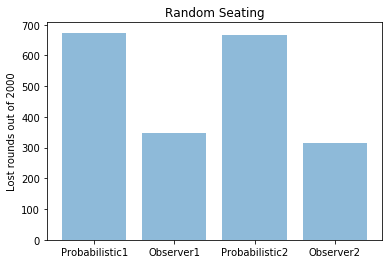

In [7]:
names = [n for n in losses]
x = ['Probabilistic1', 'Observer1', 'Probabilistic2','Observer2']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i]-wins[i]) #adding back up the dices they got back from exactly!
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Lost rounds out of 2000')
plt.title('Random Seating')
plt.savefig('Experiment 1b')
plt.show()

# Experiment 1c - Fixed Seating - Shuffled - Games

In [14]:
wins = {}
wins['Martha']=wins['Lorenzo']=wins['Maria']=wins['Manuel']=wins['Ana']=wins['Liam']=0
for i in range(200):
    Game = full_game(6, Human=False, shuffle = False)
    while len(Game.Players) > 1:
        roundd = rounds(Game.diceState, Game.Players, Game.player, Game.human, shuffle=False)
        while roundd.last != 'Dudo' and roundd.last != 'Calza':
        # Play a round
            if roundd.player == 'Martha':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                            last_bid = roundd.last)
                bid = agent.make_bid()
            elif roundd.player == 'Lorenzo':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                            last_bid = roundd.last)
                bid = agent.make_bid()
            elif roundd.player == 'Maria':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()

            elif roundd.player == 'Manuel':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()
            elif roundd.player == 'Ana':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player],
                                            last_bid = roundd.last)
                bid = agent.make_bid()
            elif roundd.player == 'Liam':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()

            print (roundd.player, ': ', bid)
            roundd.last = bid
            roundd.history.append(bid)

            #Analyse terminal bid and update dice accordingly
            if roundd.last == 'Dudo': 
                loser_winner = roundd.call()
                Game.update_dice_players(loser_winner[0], loser_winner[1])
                print ('Loser:', loser_winner[0], '\n', roundd.rolls)

            elif roundd.last == 'Calza':
                loser_winner = roundd.call(Dudo = False, Calza = True)
                if loser_winner[1]==1:
                    print ('Winner:', loser_winner[0], '\n', roundd.rolls)
                    Game.update_dice_players(loser_winner[0], loser_winner[1])
                else:
                    print ('Loser:', loser_winner[0], '\n', roundd.rolls)
                    Game.update_dice_players(loser_winner[0], loser_winner[1])
            else:
                roundd.next_player()
                
    if len(Game.Players) == 1:
        print ('Winner:', Game.Players[0])
        wins[Game.Players[0]] +=1



Lorenzo :  [2, 2]
Maria :  [1, 1]
Manuel :  [4, 3]
Ana :  [5, 5]
Liam :  [7, 5]
Martha :  [8, 5]
Lorenzo :  [9, 2]
Maria :  [5, 1]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 5, 1, 5, 2], 'Lorenzo': [1, 4, 5, 2, 2], 'Maria': [1, 6, 4, 2, 3], 'Manuel': [4, 6, 5, 3, 3], 'Ana': [2, 5, 6, 4, 5], 'Liam': [5, 2, 3, 4, 5]}
Manuel :  [2, 5]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 6]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  [8, 6]
Ana :  [9, 2]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 4, 3, 6, 6], 'Lorenzo': [6, 5, 1, 4, 3], 'Maria': [4, 5, 6, 3, 3], 'Manuel': [6, 5, 5, 1], 'Ana': [5, 5, 2, 2, 4], 'Liam': [6, 1, 2, 4, 5]}
Liam :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [5, 3]
Maria :  [7, 2]
Manuel :  [9, 2]
Ana :  [5, 1]
Liam :  [11, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 2, 1, 2, 2], 'Lorenzo': [3, 5, 4, 2, 3], 'Maria': [6, 2, 4, 1, 1], 'Manuel': [2, 5, 6, 4], 'Ana': [3, 1, 4, 1, 4], 'Liam': [3, 2, 6, 6]}
Liam :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [

Liam :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 2, 1], 'Maria': [4, 1, 1, 2, 6], 'Manuel': [6, 4], 'Ana': [3, 4], 'Liam': [3]}
Manuel :  [2, 6]
Ana :  [1, 1]
Liam :  [3, 4]
Lorenzo :  [4, 2]
Maria :  [4, 5]
Manuel :  [4, 6]
Ana :  [2, 1]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 3, 2], 'Maria': [5, 1, 2, 5, 3], 'Manuel': [6], 'Ana': [6, 1], 'Liam': [2]}
Lorenzo :  [1, 3]
Maria :  [2, 3]
Manuel :  [1, 1]
Ana :  [2, 1]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 3], 'Maria': [4, 3, 2, 4, 2], 'Manuel': [1], 'Ana': [1, 6], 'Liam': [2]}
Lorenzo :  [1, 5]
Maria :  [1, 1]
Manuel :  [3, 6]
Ana :  [2, 1]
Liam :  [5, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5], 'Maria': [2, 3, 6, 1, 1], 'Manuel': [6], 'Ana': [4, 1], 'Liam': [4]}
Maria :  [1, 6]
Manuel :  [2, 3]
Ana :  [1, 1]
Liam :  [3, 2]
Maria :  [3, 4]
Manuel :  [4, 3]
Ana :  Dudo
Loser: Manuel 
 {'Maria': [4, 5, 5, 4, 2], 'Manuel': [3], 'Ana': [

Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 6, 6, 4], 'Lorenzo': [5, 5], 'Maria': [2, 1, 1], 'Manuel': [6, 5, 2, 3], 'Ana': [2, 6, 3], 'Liam': [5, 3, 5, 5]}
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 5]
Martha :  [6, 3]
Lorenzo :  [7, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 4, 3, 5], 'Lorenzo': [6, 4], 'Maria': [4, 1, 5], 'Manuel': [6, 5, 3], 'Ana': [2, 1, 4], 'Liam': [2, 5, 3, 5]}
Lorenzo :  [2, 3]
Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [5, 5]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 5, 5, 4], 'Lorenzo': [1], 'Maria': [2, 2, 3], 'Manuel': [1, 3, 2], 'Ana': [5, 1, 5], 'Liam': [4, 6, 2, 1]}
Maria :  [2, 4]
Manuel :  [4, 5]
Ana :  [5, 3]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 2, 1, 4], 'Maria': [6, 4, 5], 'Manuel': [6, 3, 1], 'Ana': [3, 3, 1], 'Liam': [1, 1, 4, 2]}
Martha :  [3, 3]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 5, 3], 'Maria': [2, 5, 3], 'Manuel': [6, 3, 4], 'Ana': [5, 5, 3

Manuel :  [4, 5]
Ana :  [5, 3]
Liam :  [6, 2]
Martha :  [7, 3]
Lorenzo :  [8, 3]
Maria :  [9, 2]
Manuel :  [9, 5]
Ana :  [10, 3]
Liam :  [11, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 2, 3], 'Lorenzo': [3, 3, 6, 6], 'Maria': [4, 2, 5, 4, 2], 'Manuel': [6, 1, 4, 5, 5], 'Ana': [2, 3, 3, 5, 4], 'Liam': [6, 5, 3, 2, 2]}
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Manuel :  [8, 4]
Ana :  [9, 6]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 5, 2, 1], 'Lorenzo': [5, 6, 2, 1], 'Maria': [6, 5, 6, 2, 5], 'Manuel': [2, 1, 1, 2, 2], 'Ana': [6, 3, 6, 6, 6], 'Liam': [1, 4, 3, 5]}
Martha :  [2, 5]
Lorenzo :  [3, 6]
Maria :  [5, 4]
Manuel :  [6, 6]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  [4, 1]
Lorenzo :  [9, 6]
Maria :  [10, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [2, 1, 6], 'Lorenzo': [3, 6, 4, 6], 'Maria': [2, 6, 3, 4, 4], 'Manuel': [1, 3, 1, 1, 4], 'Ana': [1, 3, 1, 4, 5], 'Liam': [3, 2, 1, 3]}
Manuel :  [2, 4]
Ana :  [3, 4]
Liam :  [4, 2]
Martha :  

Liam :  [1, 5]
Lorenzo :  [2, 2]
Maria :  [2, 5]
Liam :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [3, 5]
Liam :  Dudo
Loser: Maria 
 {'Lorenzo': [2, 2, 4], 'Maria': [5], 'Liam': [1, 3, 4]}
Liam :  [1, 5]
Lorenzo :  [2, 2]
Liam :  [1, 1]
Lorenzo :  [3, 2]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2, 6], 'Liam': [1, 5, 6]}
Lorenzo :  [2, 3]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 4], 'Liam': [3, 5, 1]}
Liam :  [1, 4]
Lorenzo :  [2, 2]
Liam :  [2, 4]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 2], 'Liam': [4, 5]}
Liam :  [2, 4]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 3], 'Liam': [2]}
Winner: Lorenzo
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [6, 4]
Maria :  [8, 5]
Manuel :  [9, 4]
Ana :  [10, 2]
Liam :  Dudo
Loser: Liam 
 {'Martha': [4, 4, 5, 4, 3], 'Lorenzo': [1, 4, 4, 3, 4], 'Maria': [1, 5, 5, 5, 2], 'Manuel': [2, 6, 4, 4, 1], 'Ana': [4, 2, 5, 2, 1], 'Liam': [6, 4, 3, 1, 1]}
Liam :  [2, 5]
Martha :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [6, 6]
Manuel :  [8, 6]
Ana :  [

Ana :  [6, 4]
Liam :  [7, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 3, 5], 'Lorenzo': [2, 6, 2, 5, 5], 'Maria': [1, 4, 2, 2], 'Ana': [5, 4], 'Liam': [3, 4, 5, 4]}
Liam :  [2, 5]
Martha :  [3, 4]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Ana :  [5, 3]
Liam :  [3, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 4, 4], 'Lorenzo': [3, 5, 6, 2, 4], 'Maria': [5, 1, 1, 6], 'Ana': [3, 6], 'Liam': [4, 3, 5]}
Liam :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [5, 6]
Maria :  [3, 1]
Ana :  Dudo
Loser: Maria 
 {'Martha': [4, 3, 4], 'Lorenzo': [6, 4, 3, 1, 6], 'Maria': [3, 6, 4, 2], 'Ana': [6, 1], 'Liam': [2, 4]}
Maria :  [2, 3]
Ana :  [3, 5]
Liam :  [4, 2]
Martha :  [5, 2]
Lorenzo :  [6, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 2, 2], 'Lorenzo': [5, 6, 5, 4, 4], 'Maria': [5, 3, 6], 'Ana': [5, 5], 'Liam': [4, 2]}
Lorenzo :  [1, 4]
Maria :  [2, 4]
Ana :  [3, 2]
Liam :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [5, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 6, 5], 'Lorenzo': [4, 4, 2, 3], 'Maria': [5, 1, 4]

Loser: Liam 
 {'Martha': [5, 6, 6, 2, 5], 'Lorenzo': [1, 3], 'Maria': [5, 5, 4, 3, 2], 'Manuel': [6, 6, 2, 4, 6], 'Ana': [5, 6, 1, 2], 'Liam': [3, 1]}
Liam :  [3, 3]
Martha :  [4, 3]
Lorenzo :  [2, 1]
Maria :  [6, 5]
Manuel :  [7, 3]
Ana :  [8, 6]
Liam :  [9, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1, 5, 3, 3], 'Lorenzo': [4, 1], 'Maria': [5, 4, 5, 5, 3], 'Manuel': [3, 6, 5, 3, 2], 'Ana': [6, 6, 2, 4], 'Liam': [5]}
Martha :  [2, 3]
Lorenzo :  [3, 4]
Maria :  [4, 6]
Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 3, 2, 4], 'Lorenzo': [5, 4], 'Maria': [6, 3, 2, 6, 1], 'Manuel': [5, 4, 1, 5, 1], 'Ana': [4, 1, 5, 1], 'Liam': [3]}
Lorenzo :  [2, 3]
Maria :  [3, 3]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [7, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 6, 4, 2], 'Lorenzo': [3], 'Maria': [3, 1, 3, 4, 2], 'Manuel': [5, 5, 6, 6, 3], 'Ana': [4, 5, 1, 2], 'Liam': [4]}
Martha :  [3, 4]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Manuel

 {'Maria': [6], 'Liam': [2, 1]}
Winner: Liam
Maria :  [3, 5]
Manuel :  [4, 6]
Ana :  [2, 1]
Liam :  [6, 2]
Martha :  [7, 3]
Lorenzo :  [8, 2]
Maria :  [9, 3]
Manuel :  [9, 6]
Ana :  [5, 1]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 1, 2, 3, 6], 'Lorenzo': [5, 3, 2, 3, 2], 'Maria': [3, 6, 1, 2, 3], 'Manuel': [5, 6, 6, 4, 2], 'Ana': [3, 1, 1, 4, 3], 'Liam': [3, 2, 5, 2, 3]}
Martha :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [4, 6]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [3, 1]
Maria :  [8, 5]
Manuel :  [4, 1]
Ana :  [5, 1]
Liam :  [11, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 5, 4, 2], 'Lorenzo': [1, 1, 6, 2, 6], 'Maria': [5, 5, 5, 4, 6], 'Manuel': [4, 1, 3, 5, 1], 'Ana': [5, 1, 4, 1, 4], 'Liam': [3, 6, 2, 2, 6]}
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 3]
Maria :  [6, 6]
Manuel :  [7, 6]
Ana :  [8, 2]
Liam :  [9, 3]
Martha :  [10, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 2, 5, 2], 'Lorenzo': [4, 2, 3, 3, 1], 'Maria': [6,

Lorenzo :  [4, 4]
Maria :  [6, 5]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [4, 6, 6, 5, 4], 'Maria': [5, 2, 5, 2, 4], 'Manuel': [3, 2], 'Ana': [2, 1, 2], 'Liam': [2, 4, 4, 6]}
Ana :  [3, 3]
Liam :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [7, 3]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [6, 3, 2, 4, 2], 'Maria': [2, 1, 2, 2, 2], 'Manuel': [1, 4], 'Ana': [3, 4], 'Liam': [5, 3, 1, 1]}
Liam :  [2, 4]
Lorenzo :  [3, 5]
Maria :  [4, 2]
Manuel :  [5, 4]
Ana :  [6, 6]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 1, 5, 6, 5], 'Maria': [4, 1, 6, 4, 1], 'Manuel': [1, 6], 'Ana': [6, 6], 'Liam': [2, 6, 1]}
Lorenzo :  [3, 4]
Maria :  [4, 3]
Manuel :  [5, 3]
Ana :  [6, 5]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 2, 4, 1], 'Maria': [6, 3, 3, 3, 4], 'Manuel': [6, 3], 'Ana': [5, 5], 'Liam': [6, 1, 3]}
Liam :  [2, 6]
Lorenzo :  [3, 4]
Maria :  [5, 2]
Manuel :  [6, 2]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [3, 4, 6, 4], 'Maria': [3

Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  [7, 3]
Martha :  [8, 5]
Lorenzo :  [9, 5]
Maria :  [10, 2]
Manuel :  [10, 3]
Ana :  [11, 2]
Liam :  [11, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 5, 2, 5, 3], 'Lorenzo': [1, 5, 5, 2, 3], 'Maria': [6, 2, 1, 4, 2], 'Manuel': [3, 2, 3, 6, 4], 'Ana': [2, 3, 3, 2, 5], 'Liam': [4, 2, 3, 6, 3]}
Liam :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Maria :  [6, 3]
Manuel :  [7, 3]
Ana :  [8, 2]
Liam :  [9, 6]
Martha :  [10, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 2, 5, 5, 2], 'Lorenzo': [2, 4, 1, 5, 2], 'Maria': [4, 2, 6, 2, 5], 'Manuel': [2, 1, 6, 1, 3], 'Ana': [5, 5, 2, 2, 1], 'Liam': [6, 5, 1, 6]}
Lorenzo :  [2, 6]
Maria :  [4, 2]
Manuel :  [5, 5]
Ana :  [3, 1]
Liam :  [7, 6]
Martha :  [4, 1]
Lorenzo :  [9, 6]
Maria :  [5, 1]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 1, 1, 4, 1], 'Lorenzo': [6, 6, 3, 2], 'Maria': [2, 5, 1, 3, 1], 'Manuel': [5, 6, 5, 5, 4], 'Ana': [2, 1, 1, 1, 5], 'Liam': [6, 3, 6, 1]}
Ana : 

Liam :  [4, 5]
Maria :  [2, 1]
Manuel :  [5, 2]
Liam :  Dudo
Loser: Liam 
 {'Maria': [1, 1, 1, 2], 'Manuel': [2, 4, 2, 3], 'Liam': [5, 5]}
Liam :  [1, 2]
Maria :  [1, 3]
Manuel :  [1, 5]
Liam :  [2, 2]
Maria :  [2, 4]
Manuel :  [2, 5]
Liam :  [3, 2]
Maria :  [3, 3]
Manuel :  [3, 5]
Liam :  [4, 2]
Maria :  Dudo
Loser: Liam 
 {'Maria': [3, 5, 3, 5], 'Manuel': [6, 5, 5, 1], 'Liam': [2]}
Maria :  [1, 6]
Manuel :  [2, 4]
Maria :  [3, 6]
Manuel :  [4, 4]
Maria :  Dudo
Loser: Maria 
 {'Maria': [6, 6, 4, 2], 'Manuel': [1, 4, 4, 2]}
Maria :  [2, 3]
Manuel :  [3, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1, 3, 4], 'Manuel': [3, 4, 3, 4]}
Maria :  [2, 6]
Manuel :  [3, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1, 6], 'Manuel': [5, 2, 3, 3]}
Maria :  [2, 4]
Manuel :  [3, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1], 'Manuel': [6, 2, 3, 3]}
Winner: Manuel
Martha :  [2, 2]
Lorenzo :  [3, 3]
Maria :  [5, 3]
Manuel :  [7, 6]
Ana :  [8, 6]
Liam :  [9, 4]
Martha :  [10, 2]
Lorenzo :  [11, 3]
Maria :  

Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 4], 'Maria': [5, 6, 3, 5]}
Lorenzo :  [2, 6]
Maria :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6], 'Maria': [4, 4, 4, 1]}
Winner: Maria
Martha :  [2, 2]
Lorenzo :  [3, 5]
Maria :  [4, 6]
Manuel :  [5, 2]
Ana :  [6, 4]
Liam :  [7, 2]
Martha :  [8, 2]
Lorenzo :  [9, 5]
Maria :  [10, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 5, 3, 2, 2], 'Lorenzo': [2, 4, 5, 5, 1], 'Maria': [3, 2, 5, 1, 2], 'Manuel': [4, 4, 6, 5, 2], 'Ana': [1, 4, 4, 5, 6], 'Liam': [4, 3, 2, 2, 3]}
Manuel :  [2, 5]
Ana :  [3, 4]
Liam :  [4, 2]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Maria :  [7, 5]
Manuel :  [4, 1]
Ana :  [9, 4]
Liam :  [10, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 1, 2, 1, 1], 'Lorenzo': [2, 1, 5, 4, 4], 'Maria': [3, 4, 5, 1, 5], 'Manuel': [5, 1, 6, 4], 'Ana': [4, 4, 5, 3, 5], 'Liam': [4, 1, 4, 2, 2]}
Martha :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Manuel :  [4, 5]
Ana :  [5, 4]
Liam :  [7, 4]
Martha :  [8, 3]
Lorenzo :  [4, 1]
Mar

Liam :  [1, 6]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 4], 'Maria': [1, 4, 6], 'Manuel': [2, 3, 1, 4, 6], 'Ana': [1], 'Liam': [1]}
Lorenzo :  [1, 5]
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 2]
Lorenzo :  [4, 5]
Maria :  [5, 2]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 5], 'Maria': [5, 2, 6], 'Manuel': [3, 6, 2, 1, 5], 'Ana': [2]}
Maria :  [2, 5]
Manuel :  [3, 2]
Ana :  [4, 6]
Lorenzo :  Dudo
Loser: Ana 
 {'Lorenzo': [4, 5], 'Maria': [5, 4], 'Manuel': [3, 1, 2, 2, 2], 'Ana': [6]}
Lorenzo :  [1, 2]
Maria :  [1, 6]
Manuel :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [4, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 6], 'Maria': [6, 5], 'Manuel': [2, 5, 3, 5, 4]}
Lorenzo :  [1, 3]
Maria :  [1, 1]
Manuel :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3], 'Maria': [4, 1], 'Manuel': [4, 6, 4, 6, 3]}
Maria :  [1, 5]
Manuel :  [2, 5]
Maria :  [3, 5]
Manuel :  [4, 3]
Maria :  Dudo
Loser: Manuel 
 {

Manuel :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2], 'Lorenzo': [5, 6], 'Maria': [1, 3, 4, 6], 'Manuel': [6, 2, 2, 3, 3]}
Lorenzo :  [2, 5]
Maria :  [3, 2]
Manuel :  [4, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [5], 'Maria': [5, 1, 2, 1], 'Manuel': [5, 5, 6, 6, 5]}
Lorenzo :  [2, 2]
Maria :  [2, 4]
Manuel :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [1], 'Maria': [3, 2, 6, 5], 'Manuel': [1, 3, 3, 6, 6]}
Maria :  [2, 6]
Manuel :  [3, 2]
Lorenzo :  [4, 4]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4], 'Maria': [1, 4, 4], 'Manuel': [2, 4, 3, 4, 2]}
Maria :  [2, 2]
Manuel :  [3, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2], 'Maria': [1, 2], 'Manuel': [2, 1, 2, 2, 6]}
Maria :  [2, 3]
Manuel :  [2, 4]
Maria :  [3, 3]
Manuel :  Dudo
Loser: Maria 
 {'Maria': [3, 6], 'Manuel': [6, 4, 5, 4, 5]}
Maria :  [1, 3]
Manuel :  [1, 5]
Maria :  [2, 4]
Manuel :  [2, 5]
Maria :  [3, 4]
Manuel : 

Loser: Manuel 
 {'Lorenzo': [3, 1, 2, 1, 5], 'Maria': [2, 6, 6, 6], 'Manuel': [2, 4], 'Ana': [5, 5, 1, 1, 4], 'Liam': [3]}
Manuel :  [2, 5]
Ana :  [3, 3]
Liam :  [5, 4]
Lorenzo :  [6, 2]
Maria :  [3, 1]
Manuel :  [7, 5]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [2, 3, 2, 2, 5], 'Maria': [1, 2, 5, 3], 'Manuel': [5], 'Ana': [3, 2, 3, 4, 4], 'Liam': [3]}
Ana :  [2, 6]
Liam :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [5, 6]
Ana :  [6, 6]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 3, 2, 2, 5], 'Maria': [6, 6, 6, 5], 'Ana': [6, 6, 3, 4, 6], 'Liam': [6]}
Lorenzo :  [1, 3]
Maria :  [1, 1]
Ana :  [3, 6]
Lorenzo :  [4, 3]
Maria :  [2, 1]
Ana :  [5, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 3, 1, 3, 4], 'Maria': [3, 5, 4, 1], 'Ana': [6, 1, 3, 4, 6]}
Lorenzo :  [2, 3]
Maria :  [3, 2]
Ana :  [2, 1]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 2, 1, 1], 'Maria': [3, 4, 2, 2], 'Ana': [1, 3, 5, 2, 6]}
Maria :  [2, 2]
Ana :  [3, 3]
Lorenzo :  [4, 4]
Maria :  [2, 1]
Ana :  [5, 3]
Lore

Liam :  [8, 5]
Martha :  [9, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 5, 6], 'Lorenzo': [6, 3, 5, 3], 'Maria': [4, 2, 5, 6, 4], 'Manuel': [6, 1, 4], 'Ana': [6, 6, 5, 2, 2], 'Liam': [3, 4, 5, 5, 1]}
Lorenzo :  [2, 6]
Maria :  [4, 2]
Manuel :  [2, 1]
Ana :  [5, 5]
Liam :  [6, 3]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [1, 2, 5], 'Lorenzo': [2, 1, 1], 'Maria': [6, 2, 3, 5, 1], 'Manuel': [4, 2, 3], 'Ana': [5, 1, 5, 3, 5], 'Liam': [6, 3, 3, 5, 3]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [4, 5]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [6, 2]
Manuel :  [7, 3]
Ana :  [4, 1]
Liam :  [9, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 1, 2], 'Lorenzo': [2, 6, 3], 'Maria': [5, 2, 2, 6, 4], 'Manuel': [5, 3], 'Ana': [5, 1, 1, 3, 6], 'Liam': [5, 6, 5, 5, 4]}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Maria :  [5, 6]
Manuel :  [6, 3]
Ana :  [7, 4]
Liam :  [8, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 3], 'Lorenzo': [5, 3, 3], 'Maria': [

Maria :  [1, 3]
Manuel :  [1, 1]
Ana :  [3, 3]
Liam :  [4, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [2, 2], 'Manuel': [1, 1], 'Ana': [4, 3], 'Liam': [3]}
Maria :  [1, 3]
Manuel :  [1, 4]
Ana :  [2, 2]
Liam :  [1, 1]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [4], 'Manuel': [4, 5], 'Ana': [5, 2], 'Liam': [1]}
Manuel :  [2, 3]
Ana :  Dudo
Loser: Ana 
 {'Maria': [2], 'Manuel': [3], 'Ana': [2, 3], 'Liam': [1]}
Ana :  [1, 6]
Liam :  [2, 5]
Maria :  [1, 1]
Manuel :  [3, 6]
Ana :  Dudo
Loser: Ana 
 {'Maria': [1], 'Manuel': [6], 'Ana': [6], 'Liam': [5]}
Liam :  [2, 5]
Maria :  Dudo
Loser: Maria 
 {'Maria': [5], 'Manuel': [6], 'Liam': [1]}
Manuel :  [1, 6]
Liam :  [2, 3]
Manuel :  Dudo
Loser: Liam 
 {'Manuel': [4], 'Liam': [3]}
Winner: Manuel
Liam :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [8, 3]
Ana :  [9, 2]
Liam :  [9, 5]
Martha :  [10, 2]
Lorenzo :  [5, 1]
Maria :  [6, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [6, 6, 2, 2, 5], 'Lorenzo': [1, 3, 

Loser: Manuel 
 {'Martha': [5], 'Lorenzo': [6, 4, 6], 'Maria': [2, 1, 4, 3, 6], 'Manuel': [2, 3, 5, 3], 'Ana': [2, 1, 5, 4], 'Liam': [3]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [6, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5], 'Lorenzo': [6, 1, 5], 'Maria': [4, 1, 4, 3, 4], 'Manuel': [2, 6, 2], 'Ana': [5, 4, 2, 3], 'Liam': [3]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [4, 6]
Manuel :  [2, 1]
Ana :  [5, 5]
Martha :  [6, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5], 'Lorenzo': [5, 1, 6], 'Maria': [4, 4, 3, 2, 4], 'Manuel': [5, 2, 1], 'Ana': [1, 4, 5, 5]}
Lorenzo :  [2, 5]
Maria :  [1, 1]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1], 'Lorenzo': [5, 6], 'Maria': [1, 6, 3, 4, 1], 'Manuel': [6, 6, 6], 'Ana': [5, 2, 1, 4]}
Ana :  [1, 4]
Martha :  [2, 5]
Lorenzo :  [3, 2]
Maria :  [3, 5]
Manuel :  [2, 1]
Ana :  [5, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [6, 2], 'Maria': [1, 6, 4, 1, 2], 'Manuel': [4, 1, 5], 'Ana': [4, 5, 4]}
Lorenzo :  [2, 2]
Maria 

Martha :  [3, 1]
Lorenzo :  [7, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 1, 2, 5], 'Lorenzo': [2, 5, 5, 6], 'Maria': [2], 'Manuel': [3, 3], 'Ana': [6, 5, 6], 'Liam': [5, 3, 6, 3]}
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 5, 4, 5], 'Lorenzo': [2, 2, 2], 'Maria': [2], 'Manuel': [2, 3], 'Ana': [5, 6, 4], 'Liam': [2, 1, 3, 5]}
Manuel :  [2, 3]
Ana :  [3, 6]
Liam :  [5, 2]
Martha :  [6, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 3, 6, 1], 'Lorenzo': [5, 6, 3], 'Maria': [5], 'Manuel': [1], 'Ana': [6, 1, 6], 'Liam': [2, 5, 2, 6]}
Lorenzo :  [2, 2]
Maria :  [4, 2]
Manuel :  [5, 5]
Ana :  [6, 2]
Liam :  Dudo
Loser: Ana 
 {'Martha': [2, 3, 3, 4], 'Lorenzo': [2, 4], 'Maria': [2], 'Manuel': [5], 'Ana': [6, 5, 2], 'Liam': [3, 5, 2, 6]}
Ana :  [2, 5]
Liam :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [5, 3]
Manuel :  [5, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 5, 5], 'Lorenzo': [2, 2], 'Maria': [3], 'Manuel': [5], 'An

Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [7, 5]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 5, 1, 1], 'Lorenzo': [2, 5, 4, 6], 'Maria': [1, 4, 5, 6, 1], 'Manuel': [3, 4, 2], 'Ana': [6, 1], 'Liam': [4, 5, 5, 2]}
Lorenzo :  [2, 2]
Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [5, 3]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  [8, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 1, 5, 5], 'Lorenzo': [3, 6, 2], 'Maria': [5, 5, 1, 6, 1], 'Manuel': [6, 1, 2], 'Ana': [3, 3], 'Liam': [1, 4, 3, 2]}
Maria :  [2, 3]
Manuel :  [1, 1]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [1, 1, 1, 4], 'Lorenzo': [1, 1, 4], 'Maria': [1, 5, 3, 6], 'Manuel': [6, 4, 1], 'Ana': [2, 4], 'Liam': [1, 1, 2, 2]}
Manuel :  [3, 4]
Ana :  [2, 1]
Liam :  [5, 3]
Martha :  [6, 3]
Lorenzo :  [7, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 3, 6, 3], 'Lorenzo': [5, 4, 6], 'Maria': [2, 6, 5, 1], 'Manuel': [1, 1], 'Ana': [6, 1], 'Liam': 

Maria :  [4, 4]
Manuel :  [6, 3]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  [9, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [6, 5, 5, 5, 1], 'Maria': [1, 5, 4, 4, 2], 'Manuel': [4, 1, 3, 2, 4], 'Ana': [5, 1, 6, 3], 'Liam': [4, 2, 6, 3, 4]}
Lorenzo :  [3, 3]
Maria :  [4, 3]
Manuel :  [6, 3]
Ana :  [7, 6]
Liam :  [8, 4]
Lorenzo :  [9, 3]
Maria :  [10, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 3, 2, 3, 5], 'Maria': [3, 1, 2, 3, 2], 'Manuel': [3, 3, 4, 4, 6], 'Ana': [4, 1, 6, 6], 'Liam': [3, 4, 2, 1, 4]}
Manuel :  [2, 2]
Ana :  [3, 6]
Liam :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  [8, 6]
Liam :  [9, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 5, 2, 2, 5], 'Maria': [1, 4, 6, 6, 1], 'Manuel': [3, 2, 5, 4], 'Ana': [6, 4, 3, 6], 'Liam': [6, 1, 4, 6, 5]}
Lorenzo :  [3, 3]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  [7, 3]
Liam :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5, 3, 6, 3], 'Maria': [6, 5, 1, 6, 2], 'Manuel': [1, 6, 2, 1],

Loser: Maria 
 {'Martha': [1, 4, 3, 5, 2], 'Lorenzo': [1, 1, 6], 'Maria': [1, 6, 3, 5], 'Manuel': [5, 5, 5, 5, 5], 'Ana': [6, 2, 3], 'Liam': [6, 4, 6, 6]}
Maria :  [2, 6]
Manuel :  [4, 3]
Ana :  [5, 2]
Liam :  [7, 4]
Martha :  [8, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 2, 1, 6, 6], 'Lorenzo': [3, 3, 4], 'Maria': [3, 6, 6], 'Manuel': [2, 4, 6, 2, 6], 'Ana': [2, 5, 6], 'Liam': [3, 3, 3, 2]}
Lorenzo :  [3, 6]
Maria :  [5, 4]
Manuel :  [6, 5]
Ana :  [7, 6]
Liam :  [8, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 3, 3, 1, 5], 'Lorenzo': [1, 5], 'Maria': [2, 2, 3], 'Manuel': [3, 4, 5, 5, 5], 'Ana': [5, 6, 6], 'Liam': [4, 5, 4, 3]}
Liam :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 5]
Manuel :  [7, 6]
Ana :  [4, 1]
Liam :  [9, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 2, 2, 5], 'Lorenzo': [6, 1], 'Maria': [1, 5, 5], 'Manuel': [4, 5, 6, 6, 3], 'Ana': [1, 3, 2], 'Liam': [5, 6, 6]}
Liam :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [4, 5]
Maria :  [6, 5]
Manuel :  [7, 3

Lorenzo :  [2, 5]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [3, 1], 'Maria': [4, 4], 'Manuel': [3], 'Ana': [4]}
Ana :  [2, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2], 'Maria': [4, 2], 'Ana': [3]}
Lorenzo :  [2, 6]
Maria :  [3, 2]
Ana :  Dudo
Loser: Maria 
 {'Lorenzo': [6], 'Maria': [4, 2], 'Ana': [2]}
Maria :  [2, 3]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [3], 'Maria': [1], 'Ana': [4]}
Lorenzo :  [1, 5]
Maria :  [1, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5], 'Maria': [6]}
Winner: Maria
Manuel :  [2, 6]
Ana :  [3, 5]
Liam :  [4, 4]
Martha :  [5, 3]
Lorenzo :  [6, 6]
Maria :  [8, 4]
Manuel :  [9, 3]
Ana :  [10, 5]
Liam :  [11, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 2, 5, 3, 3], 'Lorenzo': [6, 4, 5, 6, 3], 'Maria': [6, 4, 6, 4, 4], 'Manuel': [2, 3, 3, 1, 6], 'Ana': [1, 2, 5, 5, 6], 'Liam': [4, 1, 4, 6, 3]}
Liam :  [3, 3]
Martha :  [4, 3]
Lorenzo :  [5, 5]
Maria :  [7, 2]
Manuel :  [4, 1]
Ana :  [9, 6]
Liam :  [10, 2]
Martha :  Dudo
Loser: Marth

Manuel :  Dudo
Loser: Maria 
 {'Maria': [3, 5], 'Manuel': [1, 4], 'Ana': [4], 'Liam': [3, 5]}
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  Dudo
Loser: Ana 
 {'Maria': [2], 'Manuel': [1, 5], 'Ana': [4], 'Liam': [3, 6]}
Liam :  [1, 2]
Maria :  [1, 3]
Manuel :  [2, 2]
Liam :  [1, 1]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [4], 'Manuel': [3, 2], 'Liam': [1, 1]}
Manuel :  [2, 6]
Liam :  [3, 6]
Maria :  Dudo
Loser: Maria 
 {'Maria': [6], 'Manuel': [6], 'Liam': [6, 1]}
Manuel :  [2, 4]
Liam :  Dudo
Loser: Manuel 
 {'Manuel': [6], 'Liam': [3, 3]}
Winner: Liam
Maria :  [3, 3]
Manuel :  [4, 2]
Ana :  [5, 3]
Liam :  [7, 5]
Martha :  [8, 3]
Lorenzo :  [9, 6]
Maria :  [10, 6]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 4, 4, 5, 3], 'Lorenzo': [3, 6, 2, 5, 6], 'Maria': [6, 2, 6, 4, 4], 'Manuel': [3, 3, 5, 3, 5], 'Ana': [3, 6, 3, 6, 5], 'Liam': [2, 5, 5, 3, 5]}
Manuel :  [2, 6]
Ana :  [1, 1]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [6, 2]
Maria :  [3, 1]


Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 1, 6, 1], 'Maria': [3, 6], 'Manuel': [4, 6], 'Liam': [6]}
Maria :  [1, 5]
Manuel :  [2, 2]
Liam :  [3, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 4, 3, 6], 'Maria': [1], 'Manuel': [2, 5], 'Liam': [3]}
Lorenzo :  [1, 3]
Maria :  [2, 2]
Manuel :  [2, 3]
Liam :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Manuel :  [3, 3]
Liam :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 4, 3], 'Maria': [2], 'Manuel': [3, 3], 'Liam': [4]}
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 3], 'Maria': [1], 'Manuel': [3, 2], 'Liam': [1]}
Lorenzo :  [2, 5]
Maria :  [1, 1]
Manuel :  [3, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 5], 'Maria': [1], 'Manuel': [6, 6]}
Lorenzo :  [1, 5]
Maria :  [2, 4]
Manuel :  [3, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5], 'Maria': [2], 'Manuel': [2, 2]}
Maria :  [1, 3]
Manuel :  [2, 3]
Maria :  Dudo
Loser: Manuel 
 {'

Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 5]
Ana :  [2, 1]
Martha :  [5, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 6], 'Lorenzo': [3], 'Maria': [2, 1, 6, 1], 'Manuel': [5, 4, 4], 'Ana': [6, 4, 1, 5]}
Maria :  [2, 2]
Manuel :  [2, 3]
Ana :  [3, 4]
Martha :  [2, 1]
Maria :  [5, 2]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1], 'Maria': [6, 4, 2, 2], 'Manuel': [1, 1, 6], 'Ana': [5, 3, 4, 4]}
Ana :  [2, 6]
Martha :  [3, 4]
Maria :  [4, 6]
Manuel :  [5, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 4], 'Maria': [6, 4, 2, 6], 'Manuel': [6, 2, 2], 'Ana': [6, 5, 6]}
Manuel :  [2, 3]
Ana :  [1, 1]
Martha :  [3, 2]
Maria :  [4, 3]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 2], 'Maria': [6, 2, 3, 3], 'Manuel': [2, 1], 'Ana': [1, 2, 1]}
Ana :  [2, 3]
Martha :  [3, 2]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 2], 'Maria': [6, 2, 1, 1], 'Manuel': [2, 5], 'Ana': [3, 1]}
Ana :  [2, 2]
Martha :  [3, 2]
Maria :  [4, 2]
Manuel :  D

Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [2, 1, 4], 'Maria': [2, 5, 1, 3], 'Manuel': [2, 3, 3, 3, 2], 'Ana': [3], 'Liam': [1, 1, 5, 5, 6]}
Manuel :  [2, 3]
Ana :  [1, 1]
Liam :  [4, 2]
Lorenzo :  [5, 2]
Maria :  [5, 4]
Manuel :  [6, 3]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [3, 2, 2], 'Maria': [6, 6, 4, 4], 'Manuel': [3, 1, 4, 3], 'Ana': [1], 'Liam': [2, 4, 3, 1, 3]}
Liam :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [4, 1]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [6, 1, 1], 'Maria': [1, 2, 5, 1], 'Manuel': [1, 4, 4, 2], 'Liam': [3, 1, 4, 5, 6]}
Liam :  [2, 4]
Lorenzo :  [3, 4]
Maria :  [5, 4]
Manuel :  [3, 1]
Liam :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 4, 5], 'Maria': [6, 6, 4, 1], 'Manuel': [5, 1, 6, 1], 'Liam': [2, 1, 5, 3]}
Lorenzo :  [2, 5]
Maria :  [3, 3]
Manuel :  [3, 5]
Liam :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 1], 'Maria': [1, 2, 2, 6], 'Manuel': [5, 5, 5, 6], 'Liam': [4, 3, 3, 5]}
Maria :  [2, 3]
M

Martha :  [3, 2]
Lorenzo :  [4, 4]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 3, 6], 'Lorenzo': [4, 4, 4, 5, 6], 'Maria': [5, 3, 2, 6, 1], 'Manuel': [3, 6], 'Ana': [1, 2], 'Liam': [4, 1]}
Liam :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [4, 5]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  [6, 5]
Liam :  [7, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 3, 3], 'Lorenzo': [5, 3, 5, 6, 5], 'Maria': [2, 6, 5, 3, 2], 'Manuel': [2, 6], 'Ana': [6, 5], 'Liam': [4]}
Martha :  [3, 3]
Lorenzo :  [4, 2]
Maria :  [5, 6]
Manuel :  [6, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3, 3], 'Lorenzo': [2, 3, 6, 4, 2], 'Maria': [5, 4, 1, 1, 4], 'Manuel': [4, 6], 'Ana': [6, 6]}
Ana :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Maria :  [5, 2]
Manuel :  [5, 3]
Ana :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1, 2], 'Lorenzo': [1, 5, 5, 3, 3], 'Maria': [2, 2, 6, 2, 4], 'Manuel': [3, 4], 'Ana': [1]}
Martha :  [1, 2]
Lorenzo :  [2, 4]
Maria :  [4, 4]


Martha :  [7, 4]
Lorenzo :  [8, 2]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 4, 4, 2], 'Lorenzo': [2, 3, 5, 4], 'Maria': [6, 2, 4, 1, 1], 'Manuel': [6, 2, 2, 1, 1], 'Ana': [6, 3, 3, 3, 3], 'Liam': [4, 2, 3, 5, 1]}
Ana :  [2, 5]
Liam :  [4, 3]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [5, 1]
Manuel :  [11, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 4, 1, 5], 'Lorenzo': [3, 1, 5, 4], 'Maria': [1, 5, 1, 3, 3], 'Manuel': [2, 6, 5, 2, 4], 'Ana': [2, 5, 1, 5], 'Liam': [2, 1, 6, 4, 2]}
Ana :  [3, 4]
Liam :  [4, 3]
Martha :  [5, 6]
Lorenzo :  [6, 4]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  [4, 1]
Liam :  [9, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 1, 6, 2], 'Lorenzo': [4, 4, 6, 5], 'Maria': [4, 1, 1, 1, 2], 'Manuel': [2, 1, 2, 3, 6], 'Ana': [5, 1, 1], 'Liam': [2, 3, 5, 5, 3]}
Martha :  [2, 4]
Lorenzo :  [3, 3]
Maria :  [4, 6]
Manuel :  [6, 3]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  [9, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 4, 4], 'Lorenzo': 

Loser: Maria 
 {'Lorenzo': [4, 5, 2, 4], 'Maria': [3]}
Winner: Lorenzo
Liam :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Manuel :  [3, 1]
Ana :  [7, 3]
Liam :  [8, 6]
Martha :  [9, 3]
Lorenzo :  [10, 2]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 3, 1, 2, 3], 'Lorenzo': [2, 2, 4, 2, 5], 'Maria': [5, 1, 1, 6, 1], 'Manuel': [3, 1, 6, 1, 4], 'Ana': [3, 3, 3, 2, 1], 'Liam': [2, 6, 1, 6, 5]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [9, 6]
Manuel :  [10, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 4, 3, 1, 3], 'Lorenzo': [2, 3, 5, 4, 6], 'Maria': [5, 6, 6, 3, 1], 'Manuel': [3, 5, 3, 6, 6], 'Ana': [1, 1, 4, 3], 'Liam': [6, 6, 3, 1, 3]}
Ana :  [2, 6]
Liam :  [4, 6]
Martha :  [5, 5]
Lorenzo :  [6, 6]
Maria :  [3, 1]
Manuel :  [7, 6]
Ana :  [8, 6]
Liam :  [9, 4]
Martha :  [10, 5]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2, 6, 4, 5, 5], 'Lorenzo': [2, 6, 3, 5, 6], 'Maria': [5, 4, 3, 1, 3], 'Manuel': [5, 2, 3, 6, 6], 'A

Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 4], 'Maria': [1, 6, 1, 6], 'Manuel': [1], 'Ana': [1, 3]}
Ana :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Manuel :  [4, 2]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1, 5], 'Maria': [5, 5, 1, 2], 'Manuel': [2], 'Ana': [3]}
Lorenzo :  [1, 5]
Maria :  [2, 4]
Manuel :  [3, 2]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 6], 'Maria': [5, 4, 4, 4], 'Manuel': [2]}
Lorenzo :  [1, 4]
Maria :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 1], 'Maria': [5, 6, 1, 1]}
Maria :  [1, 6]
Lorenzo :  [2, 4]
Maria :  [1, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 4], 'Maria': [6, 1, 4]}
Lorenzo :  [2, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [3], 'Maria': [6, 3, 1]}
Maria :  [2, 4]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [2], 'Maria': [4, 5]}
Maria :  [2, 3]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [5], 'Maria': [3]}
Winner: Lorenzo
Martha :  [3, 3]
Lorenzo :  [4, 3]
Maria :  [5, 6]
Manuel :  [6, 4]
Ana :  [7,

Martha :  [3, 5]
Lorenzo :  [4, 2]
Maria :  [4, 3]
Manuel :  [4, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5], 'Lorenzo': [2], 'Maria': [3, 3, 6], 'Manuel': [5, 6], 'Ana': [3], 'Liam': [4, 5]}
Manuel :  [1, 6]
Ana :  [2, 4]
Liam :  [3, 3]
Martha :  [4, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4], 'Lorenzo': [6], 'Maria': [3, 4, 1], 'Manuel': [2], 'Ana': [4], 'Liam': [6, 3]}
Maria :  [1, 5]
Manuel :  [2, 5]
Ana :  [3, 4]
Liam :  [3, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Maria': [3, 5, 1], 'Manuel': [5], 'Ana': [4], 'Liam': [6, 5]}
Maria :  [1, 4]
Manuel :  [1, 5]
Ana :  [2, 2]
Liam :  [1, 1]
Maria :  [2, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [4, 3, 1], 'Manuel': [3], 'Ana': [2], 'Liam': [1, 3]}
Ana :  [2, 4]
Liam :  [3, 4]
Maria :  Dudo
Loser: Liam 
 {'Maria': [3, 3, 2], 'Ana': [1], 'Liam': [4, 3]}
Liam :  [1, 4]
Maria :  [1, 5]
Ana :  [2, 5]
Liam :  [3, 4]
Maria :  Dudo
Loser: Maria 
 {'Maria': [3, 1, 1], 'Ana': [5], 'Liam': [4]}
Maria :  [2, 5]
Ana :  Dudo
L

Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 3], 'Lorenzo': [1, 5, 1], 'Maria': [4, 1, 5, 1], 'Ana': [4, 3]}
Martha :  [1, 4]
Lorenzo :  [2, 6]
Maria :  [3, 2]
Ana :  [4, 4]
Martha :  Dudo
Loser: Ana 
 {'Martha': [4], 'Lorenzo': [6, 3, 6], 'Maria': [2, 2, 4, 6], 'Ana': [6, 4]}
Ana :  [1, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1], 'Lorenzo': [1, 4, 1], 'Maria': [4, 6, 1, 2], 'Ana': [5]}
Martha :  [2, 2]
Lorenzo :  [3, 4]
Maria :  [3, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1], 'Lorenzo': [5, 6, 4], 'Maria': [5, 3, 5, 6]}
Lorenzo :  [1, 2]
Maria :  [1, 5]
Lorenzo :  [2, 2]
Maria :  [1, 1]
Lorenzo :  [3, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 5, 2], 'Maria': [5, 6, 1, 3]}
Lorenzo :  [1, 4]
Maria :  [1, 5]
Lorenzo :  [1, 1]
Maria :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 1], 'Maria': [1, 2, 2, 5]}
Lorenzo :  [1, 4]
Maria :  [1, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4], 'Maria': [4, 3, 6, 1]}
W

Martha :  [2, 4]
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [5, 4]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [4, 6], 'Lorenzo': [5, 2, 5, 5], 'Maria': [3, 1, 1], 'Manuel': [4]}
Martha :  [2, 2]
Lorenzo :  [3, 3]
Maria :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2], 'Lorenzo': [4, 3, 1, 3], 'Maria': [1, 5, 2]}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1], 'Lorenzo': [1, 1, 3, 2], 'Maria': [5, 4, 4]}
Lorenzo :  [2, 6]
Maria :  [3, 3]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 5, 4, 6], 'Maria': [4, 3, 3]}
Maria :  [1, 5]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Lorenzo :  [3, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [2, 5, 3, 3], 'Maria': [1, 2]}
Maria :  [1, 5]
Lorenzo :  [2, 6]
Maria :  [3, 5]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 1, 6, 3], 'Maria': [5]}
Winner: Lorenzo
Martha :  [3, 2]
Lorenzo :  [4, 6]
Maria :  [2, 1]
Manuel :  [5, 5]
Ana :  [3, 1]
Liam :  [8, 6]
Martha :  [9, 2]
Lorenzo :  [10, 6]
Maria :  [5,

Liam :  [4, 5]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [5, 4]
Manuel :  [6, 2]
Liam :  Dudo
Loser: Manuel 
 {'Martha': [2, 3, 1], 'Lorenzo': [2, 5], 'Maria': [4, 3, 4], 'Manuel': [2, 6], 'Liam': [1, 5, 5]}
Manuel :  [2, 6]
Liam :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 2, 5], 'Lorenzo': [4, 5], 'Maria': [2, 4, 3], 'Manuel': [6], 'Liam': [5, 5, 1]}
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 4]
Liam :  [4, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 4, 4], 'Lorenzo': [3], 'Maria': [4, 5, 4], 'Manuel': [2], 'Liam': [6, 1, 3]}
Martha :  [2, 4]
Lorenzo :  [3, 4]
Maria :  [3, 5]
Manuel :  [4, 4]
Liam :  [5, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 6], 'Lorenzo': [4], 'Maria': [4, 5, 5], 'Manuel': [4], 'Liam': [1, 3, 3]}
Liam :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [5, 4]
Liam :  Dudo
Loser: Manuel 
 {'Martha': [6, 1], 'Lorenzo': [5], 'Maria': [5, 4, 6], 'Manuel': [4], 'Liam': [6, 3]}
Liam :  [

Martha :  [2, 2]
Lorenzo :  [3, 6]
Maria :  [4, 6]
Manuel :  [2, 1]
Ana :  [5, 4]
Liam :  [7, 2]
Martha :  [8, 2]
Lorenzo :  [9, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 3, 6], 'Lorenzo': [4, 1, 6, 6], 'Maria': [1, 5, 3, 3, 1], 'Manuel': [5, 6, 5, 5, 1], 'Ana': [4, 4, 5], 'Liam': [1, 3, 4, 2]}
Maria :  [2, 2]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 4]
Lorenzo :  [7, 2]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 4, 4], 'Lorenzo': [1, 2, 2, 6], 'Maria': [5, 6, 3, 2], 'Manuel': [3, 5, 5, 1, 1], 'Ana': [5, 2, 1], 'Liam': [2, 5, 2, 3]}
Manuel :  [2, 4]
Ana :  [3, 5]
Liam :  [5, 4]
Martha :  [6, 3]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  [7, 4]
Ana :  [8, 5]
Liam :  [9, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 3, 3], 'Lorenzo': [5, 1, 5, 1], 'Maria': [5, 3, 3, 5], 'Manuel': [5, 4, 3, 4], 'Ana': [5, 5, 1], 'Liam': [3, 4, 2, 4]}
Liam :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  [6, 2]
Ana :  [7, 2]
L

Martha :  [1, 2]
Lorenzo :  [2, 2]
Maria :  [2, 6]
Manuel :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 2], 'Lorenzo': [3, 2], 'Maria': [6, 4, 5], 'Manuel': [3, 1, 4]}
Lorenzo :  [2, 4]
Maria :  [1, 1]
Manuel :  [3, 2]
Martha :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 1], 'Lorenzo': [1], 'Maria': [1, 1, 4], 'Manuel': [5, 2, 6]}
Maria :  [2, 4]
Manuel :  [1, 1]
Martha :  [3, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 4], 'Maria': [4, 1, 5], 'Manuel': [4, 3, 1]}
Maria :  [2, 4]
Manuel :  [1, 1]
Martha :  [3, 6]
Maria :  [2, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [6, 6], 'Maria': [4, 1], 'Manuel': [1, 6, 3]}
Manuel :  [1, 6]
Martha :  [2, 3]
Maria :  [3, 2]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3, 5], 'Maria': [2, 2], 'Manuel': [6, 6]}
Maria :  [1, 5]
Manuel :  [2, 3]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [6, 2], 'Maria': [6], 'Manuel': [3, 6]}
Manuel :  [2, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 5], '

Ana :  [6, 4]
Liam :  [6, 6]
Martha :  [7, 5]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [5, 6], 'Lorenzo': [1, 2, 3, 5], 'Maria': [2, 1, 1, 6, 6], 'Manuel': [3, 1, 3], 'Ana': [4, 4, 6], 'Liam': [6]}
Martha :  [3, 6]
Lorenzo :  [4, 5]
Maria :  [6, 5]
Manuel :  [6, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6], 'Lorenzo': [5, 5, 6, 3], 'Maria': [4, 5, 4, 5, 5], 'Manuel': [6, 5, 6], 'Ana': [6, 1, 5], 'Liam': [1]}
Ana :  [2, 2]
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [6, 4]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2], 'Lorenzo': [5, 1, 4, 4], 'Maria': [6, 5, 4, 4, 2], 'Manuel': [3, 4, 2], 'Ana': [3, 2], 'Liam': [2]}
Manuel :  [1, 4]
Ana :  [2, 2]
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [1], 'Lorenzo': [6, 3, 6, 5], 'Maria': [6, 5, 3, 5, 3], 'Manuel': [5, 4], 'Ana': [2, 2], 'Liam': [2]}
Maria :  [1, 6]
Manuel :  [2, 3]
Ana :  [1, 1]
Liam :  [3, 3]
Martha :  [4, 3]
Lorenzo :  [5, 3]
Maria :  D

Maria :  [7, 6]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 3, 2, 4], 'Lorenzo': [2, 4, 4, 1], 'Maria': [6, 6, 5, 6, 5], 'Manuel': [5, 2, 1], 'Ana': [6, 5, 2, 4], 'Liam': [5, 5, 5]}
Manuel :  [3, 5]
Ana :  [4, 5]
Liam :  [2, 1]
Martha :  [5, 3]
Lorenzo :  [6, 4]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 3, 6, 5], 'Lorenzo': [2, 4, 4, 6], 'Maria': [6, 1, 2, 3, 5], 'Manuel': [3, 1], 'Ana': [5, 2, 5, 6], 'Liam': [4, 4, 6]}
Manuel :  [2, 6]
Ana :  [3, 3]
Liam :  [4, 4]
Martha :  [5, 5]
Lorenzo :  [6, 2]
Maria :  [7, 4]
Manuel :  [7, 6]
Ana :  [8, 3]
Liam :  Dudo
Loser: Ana 
 {'Martha': [5, 5, 3, 5], 'Lorenzo': [2, 1, 2, 4], 'Maria': [2, 3, 1, 2, 5], 'Manuel': [6], 'Ana': [3, 3, 4, 3], 'Liam': [4, 2, 4]}
Ana :  [2, 3]
Liam :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Maria :  [6, 6]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 4, 2, 1], 'Lorenzo': [6, 6, 5, 5], 'Maria': [2, 2, 2, 2, 1], 'Manuel': [2], 'Ana': [3, 3, 2], 'Liam': [5

Liam :  [3, 1]
Martha :  [7, 4]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 4, 4, 5], 'Lorenzo': [1, 5, 6, 3], 'Maria': [4, 1, 6, 6, 6], 'Manuel': [4, 4, 2, 6], 'Ana': [2, 5, 2, 2], 'Liam': [3, 3, 4, 1, 6]}
Manuel :  [3, 5]
Ana :  [4, 6]
Liam :  [5, 3]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 1, 4, 1], 'Lorenzo': [2, 6, 1, 1], 'Maria': [4, 5, 2, 1, 5], 'Manuel': [3, 3, 5], 'Ana': [4, 6, 6, 6], 'Liam': [6, 1, 4, 3, 1]}
Manuel :  [2, 6]
Ana :  [3, 3]
Liam :  [5, 6]
Martha :  [6, 4]
Lorenzo :  [7, 3]
Maria :  [8, 2]
Manuel :  [8, 4]
Ana :  [9, 3]
Liam :  [9, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 2, 5, 4], 'Lorenzo': [4, 3, 3, 3], 'Maria': [2, 4, 6, 2, 6], 'Manuel': [4, 6], 'Ana': [3, 5, 6, 4], 'Liam': [6, 4, 3, 2, 6]}
Liam :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [4, 4]
Maria :  [6, 5]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [7, 6]
Martha :  [8, 4]
Lorenzo :  Dudo

Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 3, 1, 1, 4], 'Lorenzo': [2, 4, 5, 6, 1], 'Maria': [1, 6, 5, 2], 'Manuel': [6, 4, 6, 6], 'Ana': [2, 3, 3, 4, 3], 'Liam': [6, 2, 3, 3, 4]}
Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [4, 5]
Martha :  [5, 4]
Lorenzo :  [6, 3]
Maria :  [3, 1]
Manuel :  [7, 6]
Ana :  [8, 2]
Liam :  [8, 5]
Martha :  [9, 4]
Lorenzo :  [10, 3]
Maria :  [11, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 3, 4, 2, 1], 'Lorenzo': [1, 3, 2, 4, 3], 'Maria': [2, 3, 4, 5], 'Manuel': [4, 6, 2], 'Ana': [2, 2, 3, 2, 2], 'Liam': [6, 5, 6, 2, 5]}
Manuel :  [2, 2]
Ana :  [3, 4]
Liam :  [5, 6]
Martha :  [3, 1]
Lorenzo :  [7, 6]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 4, 2, 1, 1], 'Lorenzo': [5, 6, 1, 3, 6], 'Maria': [6, 1, 4, 3], 'Manuel': [3, 1], 'Ana': [1, 4, 1, 4, 4], 'Liam': [6, 5, 2, 3, 4]}
Ana :  [2, 3]
Liam :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  

Manuel :  [10, 2]
Ana :  [5, 1]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 1, 4, 4, 2], 'Lorenzo': [6, 4, 4, 4, 6], 'Maria': [5, 1, 5, 4, 3], 'Manuel': [2, 3, 4, 1, 2], 'Ana': [6, 2, 4, 1, 1], 'Liam': [2, 5, 2, 6, 3]}
Martha :  [2, 3]
Lorenzo :  [3, 4]
Maria :  [5, 6]
Manuel :  [6, 3]
Ana :  [3, 1]
Liam :  [8, 5]
Martha :  [9, 3]
Lorenzo :  [10, 4]
Maria :  [10, 6]
Manuel :  [11, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 1, 2, 3], 'Lorenzo': [5, 6, 4, 4, 4], 'Maria': [2, 6, 4, 3, 6], 'Manuel': [6, 6, 6, 2, 6], 'Ana': [1, 3, 3, 1, 2], 'Liam': [3, 5, 4, 5, 5]}
Manuel :  [3, 6]
Ana :  [4, 5]
Liam :  [6, 3]
Martha :  [7, 2]
Lorenzo :  [8, 6]
Maria :  [9, 4]
Manuel :  [9, 6]
Ana :  [10, 5]
Liam :  Dudo
Loser: Ana 
 {'Martha': [4, 2, 4, 2], 'Lorenzo': [4, 6, 3, 6, 2], 'Maria': [6, 2, 3, 4, 2], 'Manuel': [6, 5, 6, 3], 'Ana': [5, 5, 2, 4, 6], 'Liam': [4, 3, 3, 2, 4]}
Ana :  [2, 4]
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 3]
Maria :  [6, 4]
Manuel :  [8, 6]
Ana :  [

Liam :  [3, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4], 'Maria': [4, 1, 1, 4], 'Ana': [3], 'Liam': [3]}
Maria :  [1, 5]
Ana :  [2, 6]
Liam :  [1, 1]
Maria :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Maria': [5, 1, 5, 6], 'Ana': [6], 'Liam': [1]}
Liam :  [2, 6]
Maria :  Dudo
Loser: Maria 
 {'Maria': [3, 6, 1, 5], 'Liam': [3]}
Maria :  [1, 3]
Liam :  [2, 2]
Maria :  [2, 3]
Liam :  [3, 2]
Maria :  Dudo
Loser: Liam 
 {'Maria': [3, 3, 5], 'Liam': [2]}
Winner: Maria
Lorenzo :  [3, 2]
Maria :  [5, 6]
Manuel :  [7, 6]
Ana :  [4, 1]
Liam :  [9, 3]
Martha :  [10, 3]
Lorenzo :  [11, 2]
Maria :  [11, 6]
Manuel :  [12, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 5, 3, 3, 1], 'Lorenzo': [3, 5, 2, 5, 2], 'Maria': [6, 5, 6, 6, 5], 'Manuel': [6, 6, 4, 4, 6], 'Ana': [2, 1, 4, 6, 1], 'Liam': [6, 3, 4, 3, 4]}
Manuel :  [3, 2]
Ana :  [4, 3]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 5]
Maria :  [9, 4]
Manuel :  [10, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 1, 3, 4, 5], 'Lorenzo': [5, 4, 5, 1, 6],

Martha :  [2, 5]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 6, 1], 'Lorenzo': [2, 2, 5], 'Maria': [1, 6, 3]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 5], 'Lorenzo': [4, 1, 3], 'Maria': [3, 4, 4]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [2, 1, 6], 'Maria': [4, 5, 5]}
Lorenzo :  [1, 3]
Maria :  [1, 4]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Lorenzo :  [3, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 3, 3], 'Maria': [5, 2, 3]}
Maria :  [1, 3]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [2, 5, 1], 'Maria': [4, 3]}
Maria :  [2, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 3, 1], 'Maria': [1]}
Lorenzo :  [2, 2]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1, 2], 'Maria': [5]}
Winner: Lorenzo
Manuel :  [3, 5]
Ana :  [4, 4]
Liam :  [2, 1]
Martha :  [5, 5]
Lorenzo :  [6, 5]
Maria :  [7, 2]
Manuel :  [4

Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 6], 'Lorenzo': [4, 2], 'Maria': [1, 3, 5], 'Ana': [3], 'Liam': [2, 4]}
Liam :  [1, 2]
Martha :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Ana :  Dudo
Loser: Maria 
 {'Martha': [6, 4], 'Lorenzo': [3, 2], 'Maria': [4, 5, 1], 'Ana': [5], 'Liam': [6]}
Maria :  [2, 3]
Ana :  [3, 4]
Liam :  [4, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 5], 'Lorenzo': [6, 5], 'Maria': [3, 6], 'Ana': [4], 'Liam': [4]}
Martha :  [2, 2]
Lorenzo :  [3, 3]
Maria :  [3, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 6], 'Lorenzo': [3, 6], 'Maria': [4, 4], 'Ana': [1]}
Martha :  [1, 2]
Lorenzo :  [2, 2]
Maria :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [6, 1], 'Lorenzo': [2, 2], 'Maria': [5, 5]}
Maria :  [2, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1], 'Lorenzo': [6, 3], 'Maria': [2]}
Martha :  [2, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5], 'Lorenzo': [1, 1], 'Maria': [3]}
Lorenzo :  [2, 4]
Maria :  Dudo
Loser: Loren

Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 6, 5, 3], 'Lorenzo': [4, 1, 6, 1], 'Maria': [2, 1, 6, 4, 6], 'Manuel': [3, 1, 4, 5], 'Ana': [4, 3, 1, 1, 3], 'Liam': [6, 1]}
Martha :  [2, 2]
Lorenzo :  [3, 6]
Maria :  [2, 1]
Manuel :  [5, 4]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [1, 6, 5], 'Lorenzo': [6, 5, 6, 6], 'Maria': [2, 5, 3, 4, 5], 'Manuel': [5, 4, 5, 4], 'Ana': [3, 5, 1, 3, 1], 'Liam': [5, 2]}
Martha :  [2, 4]
Lorenzo :  [3, 5]
Maria :  [5, 4]
Manuel :  [6, 2]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  [8, 4]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 4], 'Lorenzo': [5, 3, 4, 5], 'Maria': [2, 1, 6, 4, 2], 'Manuel': [6, 5, 5, 2], 'Ana': [1, 4, 3, 2, 6], 'Liam': [3, 6]}
Martha :  [2, 6]
Lorenzo :  [3, 4]
Maria :  [4, 6]
Manuel :  [2, 1]
Ana :  [5, 4]
Liam :  [7, 5]
Martha :  [8, 6]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [6], 'Lorenzo': [1, 4, 5, 4],

Liam :  [2, 4]
Martha :  [3, 5]
Lorenzo :  [4, 5]
Maria :  [5, 3]
Manuel :  [7, 4]
Ana :  [8, 3]
Liam :  [9, 4]
Martha :  [10, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 5, 5, 6, 6], 'Lorenzo': [1, 5, 2, 5, 6], 'Maria': [4, 5, 2, 4, 2], 'Manuel': [4, 1, 5, 4, 5], 'Ana': [3, 3, 5, 4, 6], 'Liam': [1, 4, 4, 3]}
Lorenzo :  [3, 4]
Maria :  [2, 1]
Manuel :  [6, 5]
Ana :  [7, 3]
Liam :  [9, 4]
Martha :  [10, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 6, 6, 1, 2], 'Lorenzo': [1, 1, 3, 3], 'Maria': [1, 2, 1, 3, 1], 'Manuel': [2, 2, 2, 6, 4], 'Ana': [3, 6, 4, 3, 5], 'Liam': [4, 4, 1, 4]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [8, 4]
Martha :  [9, 4]
Lorenzo :  [10, 2]
Maria :  [10, 5]
Manuel :  [11, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3, 6, 4, 4], 'Lorenzo': [2, 4, 5], 'Maria': [3, 1, 5, 6, 5], 'Manuel': [4, 2, 4, 6, 4], 'Ana': [3, 4, 1, 4, 5], 'Liam': [4, 5, 4, 6]}
Ana :  [2, 5]
Liam :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [

Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 1], 'Manuel': [1, 4, 2]}
Manuel :  [2, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 1], 'Manuel': [1, 4]}
Lorenzo :  [1, 4]
Manuel :  [2, 3]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [4], 'Manuel': [5, 3]}
Manuel :  [1, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3], 'Manuel': [3]}
Winner: Manuel
Maria :  [3, 3]
Manuel :  [4, 6]
Ana :  [5, 3]
Liam :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [9, 3]
Maria :  [9, 5]
Manuel :  [10, 3]
Ana :  [11, 3]
Liam :  [6, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 2, 6, 1, 4], 'Lorenzo': [3, 5, 5, 2, 3], 'Maria': [2, 5, 6, 4, 5], 'Manuel': [3, 3, 1, 4, 5], 'Ana': [3, 6, 3, 2, 4], 'Liam': [6, 1, 5, 1, 3]}
Liam :  [2, 2]
Martha :  [3, 4]
Lorenzo :  [4, 5]
Maria :  [5, 4]
Manuel :  [7, 3]
Ana :  [8, 4]
Liam :  [4, 1]
Martha :  [9, 4]
Lorenzo :  [10, 5]
Maria :  [11, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 5, 3, 4, 5], 'Lorenzo': [6, 5, 2, 5, 1], 'Maria': [5, 4, 4, 4, 3], 'Manuel': [4, 3

Lorenzo :  [2, 2]
Maria :  [1, 1]
Ana :  [3, 2]
Liam :  [3, 6]
Lorenzo :  [4, 2]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [2, 2], 'Maria': [3, 4, 1], 'Ana': [2], 'Liam': [1, 6, 6]}
Maria :  [1, 3]
Ana :  [2, 3]
Liam :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1, 6], 'Maria': [2, 3], 'Ana': [3], 'Liam': [6, 1, 1]}
Maria :  [2, 6]
Ana :  [3, 5]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 2], 'Maria': [6], 'Ana': [5], 'Liam': [2, 1, 1]}
Lorenzo :  [1, 4]
Maria :  [1, 1]
Ana :  [3, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [4], 'Maria': [4], 'Ana': [2], 'Liam': [3, 1, 2]}
Liam :  [1, 2]
Lorenzo :  [2, 4]
Maria :  [1, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [4], 'Maria': [1], 'Ana': [3], 'Liam': [2, 4]}
Liam :  [1, 5]
Lorenzo :  [2, 6]
Maria :  [3, 5]
Liam :  Dudo
Loser: Maria 
 {'Lorenzo': [6], 'Maria': [5], 'Liam': [1, 2]}
Liam :  [1, 2]
Lorenzo :  [2, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [2], 'Liam': [5, 2]}
Liam :  [2, 6]
Lorenzo :  Dud

Martha :  [5, 2]
Lorenzo :  [6, 5]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [5, 2], 'Lorenzo': [2, 5, 6, 5], 'Maria': [2, 5, 3, 6], 'Manuel': [1, 6], 'Ana': [6, 5], 'Liam': [5, 3]}
Maria :  [1, 2]
Manuel :  [2, 4]
Ana :  [1, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 1], 'Lorenzo': [2, 5, 4, 5], 'Maria': [6, 4, 1], 'Manuel': [6, 4], 'Ana': [1, 5], 'Liam': [4, 2]}
Martha :  [2, 5]
Lorenzo :  [3, 3]
Maria :  [3, 5]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1], 'Lorenzo': [4, 3, 5, 3], 'Maria': [5, 5, 2], 'Manuel': [1, 6], 'Ana': [2, 1], 'Liam': [6, 3]}
Liam :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [4, 5]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3], 'Lorenzo': [6, 3, 5, 5], 'Maria': [3, 1, 2], 'Manuel': [2, 3], 'Ana': [5, 4], 'Liam': [6]}
Manuel :  [2, 5]
Ana :  [1, 1]
Liam :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3], 

Lorenzo :  [7, 5]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [6, 1, 2], 'Lorenzo': [1, 5, 5], 'Maria': [3, 4, 1], 'Manuel': [5, 4], 'Ana': [3, 6, 4, 5], 'Liam': [3, 2, 1, 5]}
Manuel :  [3, 3]
Ana :  [4, 6]
Liam :  [5, 3]
Martha :  [6, 2]
Lorenzo :  [7, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 5, 2], 'Lorenzo': [5, 5, 6], 'Maria': [2, 4, 2], 'Manuel': [3], 'Ana': [6, 4, 5, 6], 'Liam': [3, 4, 2, 4]}
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1, 1], 'Lorenzo': [3, 5], 'Maria': [1, 1, 4], 'Manuel': [6], 'Ana': [2, 5, 6, 1], 'Liam': [6, 2, 3, 1]}
Martha :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [4, 3]
Manuel :  [5, 5]
Ana :  [6, 6]
Liam :  [7, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 4], 'Lorenzo': [1, 2], 'Maria': [5, 3, 3], 'Manuel': [5], 'Ana': [3, 6, 6, 4], 'Liam': [5, 4, 6, 6]}
Liam :  [1, 5]
Martha :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [5, 2]
Manuel :  [5, 3]
Ana :  [6, 5]
Liam : 

Maria :  [6, 1]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [6, 4, 6, 4, 4], 'Lorenzo': [4, 5, 1, 3], 'Maria': [3, 2, 2, 1, 3], 'Manuel': [6, 2, 5, 4, 1], 'Ana': [3, 4, 4, 1, 3], 'Liam': [4, 6, 6, 2, 1]}
Maria :  [2, 4]
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [6, 3]
Martha :  [7, 2]
Lorenzo :  [8, 3]
Maria :  [9, 5]
Manuel :  [10, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 2, 2, 3, 6], 'Lorenzo': [3, 3, 1, 6], 'Maria': [6, 2, 1, 4], 'Manuel': [2, 2, 2, 5, 2], 'Ana': [3, 1, 2, 5, 2], 'Liam': [3, 5, 5, 1, 1]}
Ana :  [2, 5]
Liam :  [4, 5]
Martha :  [5, 6]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Manuel :  [8, 2]
Ana :  [9, 5]
Liam :  [10, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 6, 5, 6, 6], 'Lorenzo': [1, 4, 3, 5], 'Maria': [2, 1, 3, 1], 'Manuel': [3, 2, 2, 3, 1], 'Ana': [5, 5, 5, 2], 'Liam': [2, 3, 3, 3, 5]}
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 5]
Ana :  [7, 3]
Liam :  [4, 1]
Martha :  [9, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 2, 3, 5], 'Lorenzo': [

Manuel :  [3, 4]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1, 5, 1], 'Manuel': [4]}
Maria :  [1, 3]
Manuel :  [1, 1]
Maria :  [2, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [2, 1], 'Manuel': [1]}
Winner: Maria
Manuel :  [3, 6]
Ana :  [4, 5]
Liam :  [5, 4]
Martha :  [6, 5]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Manuel :  [8, 6]
Ana :  [9, 5]
Liam :  [10, 4]
Martha :  [11, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 5, 6, 5, 6], 'Lorenzo': [1, 5, 2, 3, 1], 'Maria': [2, 6, 1, 5, 5], 'Manuel': [2, 1, 4, 6, 6], 'Ana': [5, 4, 5, 3, 2], 'Liam': [4, 4, 4, 3, 3]}
Lorenzo :  [2, 3]
Maria :  [4, 4]
Manuel :  [5, 5]
Ana :  [3, 1]
Liam :  [8, 5]
Martha :  [9, 6]
Lorenzo :  [5, 1]
Maria :  [6, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [3, 6, 6, 4, 2], 'Lorenzo': [1, 4, 2, 6], 'Maria': [4, 4, 3, 1, 6], 'Manuel': [2, 2, 1, 4, 1], 'Ana': [1, 3, 1, 5, 1], 'Liam': [2, 3, 1, 5, 6]}
Manuel :  [2, 5]
Ana :  [3, 2]
Liam :  [5, 3]
Martha :  [6, 3]
Lorenzo :  [7, 3]
Maria :  [9, 2]
Manuel :  [9, 5]
Ana :  

Liam :  [6, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 2, 4], 'Maria': [6, 4, 2, 1], 'Ana': [2, 4, 5], 'Liam': [3, 6, 2, 4]}
Lorenzo :  [1, 3]
Maria :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 5]
Lorenzo :  [4, 3]
Maria :  [2, 1]
Ana :  [3, 1]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 6], 'Maria': [4, 3, 5, 2], 'Ana': [1, 1, 5], 'Liam': [3, 5, 1, 5]}
Liam :  [2, 2]
Lorenzo :  [3, 5]
Maria :  [4, 5]
Ana :  [2, 1]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [6, 5], 'Maria': [5, 5, 4, 1], 'Ana': [3, 1, 6], 'Liam': [2, 4, 3]}
Liam :  [2, 6]
Lorenzo :  [1, 1]
Maria :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1, 2], 'Maria': [6, 1, 3, 4], 'Ana': [6, 3, 6], 'Liam': [2, 1]}
Ana :  [2, 3]
Liam :  [2, 5]
Lorenzo :  [3, 3]
Maria :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 3], 'Maria': [1, 4, 1, 5], 'Ana': [3, 1], 'Liam': [3, 4]}
Ana :  [2, 5]
Liam :  [2, 6]
Lorenzo :  [3, 5]
Maria :  [4, 4]
Ana :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 6], 'Maria': [4, 2, 3, 4], 'Ana': [5],

Loser: Ana 
 {'Martha': [1], 'Lorenzo': [6, 3, 2, 4], 'Maria': [6, 2, 6, 3], 'Manuel': [5, 3, 6, 3], 'Ana': [4, 6, 1, 1], 'Liam': [3, 6, 3]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4], 'Lorenzo': [3, 6, 1, 2], 'Maria': [1, 6, 5, 2], 'Manuel': [2, 5, 3, 5], 'Ana': [2, 3, 1], 'Liam': [1, 3, 2]}
Manuel :  [2, 3]
Ana :  [3, 2]
Liam :  [4, 2]
Martha :  [5, 3]
Lorenzo :  [3, 1]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [3], 'Lorenzo': [5, 4, 1, 1], 'Maria': [3, 2, 2, 4], 'Manuel': [6, 3, 4], 'Ana': [3, 2, 5], 'Liam': [2, 5, 2]}
Manuel :  [2, 5]
Ana :  [1, 1]
Liam :  [4, 5]
Martha :  [5, 3]
Lorenzo :  [6, 5]
Maria :  [6, 6]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3], 'Lorenzo': [5, 2, 5, 1], 'Maria': [4, 6, 6, 2], 'Manuel': [5, 1], 'Ana': [4, 1, 2], 'Liam': [4, 3, 1]}
Ana :  [3, 6]
Liam :  [2, 1]
Martha :  [5, 3]
Lorenzo :  [6, 3]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Maria 
 {'Mar

Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 1], 'Lorenzo': [3, 2, 6], 'Maria': [2, 6, 3], 'Manuel': [2], 'Ana': [2, 2, 5, 2], 'Liam': [4, 6, 4, 3, 4]}
Maria :  [2, 5]
Manuel :  [4, 2]
Ana :  [5, 6]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 2], 'Lorenzo': [5, 1, 4], 'Maria': [1, 4], 'Manuel': [2], 'Ana': [6, 5, 6, 1], 'Liam': [3, 1, 4, 3, 1]}
Martha :  [3, 2]
Lorenzo :  [4, 3]
Maria :  [2, 1]
Manuel :  [5, 3]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2], 'Lorenzo': [5, 3, 6], 'Maria': [3, 1], 'Manuel': [3], 'Ana': [2, 1, 3, 5], 'Liam': [5, 4, 5, 1, 5]}
Liam :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [4, 4]
Maria :  [5, 2]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6], 'Lorenzo': [1, 4, 4], 'Maria': [5, 2], 'Manuel': [1], 'Ana': [1, 1, 2, 6], 'Liam': [5, 1, 6, 4]}
Ana :  [1, 2]
Liam :  [2, 2]
Martha :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Manuel :  [5,

 {'Martha': [2, 5, 4, 2, 2], 'Lorenzo': [1, 1, 5, 3, 2], 'Maria': [1, 3, 4, 6, 5], 'Manuel': [4, 6, 3, 1, 5], 'Ana': [3, 3, 5, 3, 3], 'Liam': [3, 2, 1, 6, 2]}
Lorenzo :  [2, 2]
Maria :  [3, 3]
Manuel :  [5, 3]
Ana :  [6, 4]
Liam :  [7, 2]
Martha :  [8, 6]
Lorenzo :  [9, 2]
Maria :  [9, 3]
Manuel :  [10, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 5, 4, 2, 6], 'Lorenzo': [2, 4, 2, 5], 'Maria': [4, 3, 2, 4, 3], 'Manuel': [6, 1, 3, 3, 4], 'Ana': [5, 3, 4, 4, 5], 'Liam': [6, 6, 2, 3, 2]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [5, 3]
Martha :  [6, 5]
Lorenzo :  [7, 3]
Maria :  [8, 3]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [9, 3]
Martha :  [10, 5]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [5, 4, 1, 5, 2], 'Lorenzo': [3, 3, 2, 1], 'Maria': [6, 5, 3, 3, 2], 'Manuel': [6, 1, 1, 6], 'Ana': [1, 2, 4, 2, 6], 'Liam': [4, 3, 3, 1, 6]}
Martha :  [2, 6]
Lorenzo :  [3, 4]
Maria :  [5, 5]
Manuel :  [7, 4]
Ana :  [8, 2]
Liam :  [4, 1]
Martha :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 5,

Ana :  Dudo
Loser: Ana 
 {'Maria': [2, 3, 6], 'Ana': [3, 1, 1]}
Ana :  [1, 6]
Maria :  [2, 2]
Ana :  Dudo
Loser: Maria 
 {'Maria': [6, 2, 4], 'Ana': [6, 6]}
Maria :  [1, 3]
Ana :  [2, 5]
Maria :  [3, 5]
Ana :  Dudo
Loser: Maria 
 {'Maria': [5, 3], 'Ana': [5, 6]}
Maria :  [2, 5]
Ana :  Dudo
Loser: Ana 
 {'Maria': [5], 'Ana': [3, 5]}
Ana :  [1, 5]
Maria :  [2, 5]
Ana :  Dudo
Loser: Ana 
 {'Maria': [5], 'Ana': [5]}
Winner: Maria
Martha :  [2, 3]
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [6, 3]
Ana :  [7, 5]
Liam :  [8, 4]
Martha :  [9, 3]
Lorenzo :  [10, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 1, 4, 2, 3], 'Lorenzo': [2, 1, 4, 3, 3], 'Maria': [1, 6, 1, 4, 2], 'Manuel': [3, 2, 3, 6, 3], 'Ana': [5, 6, 6, 3, 5], 'Liam': [3, 4, 5, 2, 3]}
Maria :  [3, 2]
Manuel :  [4, 4]
Ana :  [5, 5]
Liam :  [7, 6]
Martha :  [8, 2]
Lorenzo :  [9, 4]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 5, 2, 3, 6], 'Lorenzo': [4, 4, 1, 5, 4], 'Maria': [6, 3, 4, 2], 'Manuel': [3,

Liam :  [1, 1]
Lorenzo :  [3, 4]
Maria :  [3, 6]
Manuel :  [2, 1]
Ana :  [5, 4]
Liam :  [6, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4], 'Maria': [1, 5, 2], 'Manuel': [1, 3, 1], 'Ana': [4, 4], 'Liam': [4, 3, 5, 3]}
Maria :  [2, 5]
Manuel :  [1, 1]
Ana :  [2, 1]
Liam :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Maria': [6, 3, 2], 'Manuel': [1, 2, 4], 'Ana': [2, 1], 'Liam': [6, 2, 3, 1]}
Maria :  [1, 6]
Manuel :  [1, 1]
Ana :  [2, 1]
Liam :  [5, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1, 1], 'Manuel': [2, 5, 2], 'Ana': [3, 1], 'Liam': [5, 3, 3, 6]}
Maria :  [1, 6]
Manuel :  [2, 2]
Ana :  [3, 4]
Liam :  [3, 5]
Maria :  [3, 6]
Manuel :  [4, 2]
Ana :  Dudo
Loser: Ana 
 {'Maria': [6], 'Manuel': [6, 2, 2], 'Ana': [4, 5], 'Liam': [5, 5, 2, 1]}
Ana :  [2, 3]
Liam :  [2, 4]
Maria :  [1, 1]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Maria': [1], 'Manuel': [2, 2, 1], 'Ana': [3], 'Liam': [1, 3, 4, 4]}
Liam :  [2, 6]
Maria :  [3, 3]
Manuel :  Dudo
Loser: Maria 
 {'Maria': [4], 'Manuel': [6, 

Martha :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 4], 'Lorenzo': [1, 6, 4], 'Maria': [3, 3, 6, 2], 'Manuel': [3, 1, 4]}
Lorenzo :  [2, 3]
Maria :  [3, 3]
Manuel :  [2, 1]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [3, 2], 'Lorenzo': [5, 3], 'Maria': [2, 3, 2, 5], 'Manuel': [2, 2, 4]}
Manuel :  [2, 3]
Martha :  [3, 4]
Lorenzo :  [4, 2]
Maria :  [4, 6]
Manuel :  [5, 3]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [6, 4], 'Lorenzo': [6, 2], 'Maria': [6, 1, 2, 6], 'Manuel': [3, 3]}
Manuel :  [2, 5]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 6], 'Lorenzo': [2, 6], 'Maria': [1, 1, 2, 6], 'Manuel': [4]}
Maria :  [1, 2]
Manuel :  [2, 2]
Martha :  [3, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 2], 'Lorenzo': [4, 2], 'Maria': [2, 2, 5], 'Manuel': [2]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Manuel :  [3, 6]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [5, 4], 'Lorenzo': [2], 'Maria': [5, 6, 2], 'Manuel': [6]}
Martha :  [1, 4]
Lorenzo :  [2, 2]
Maria 

Loser: Manuel 
 {'Martha': [6], 'Lorenzo': [5, 5, 2], 'Maria': [3, 4, 6, 3, 4], 'Manuel': [2, 3], 'Liam': [4]}
Manuel :  [1, 4]
Liam :  [1, 1]
Martha :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1], 'Lorenzo': [2, 4, 1], 'Maria': [1, 2, 4, 6, 3], 'Manuel': [4], 'Liam': [1]}
Lorenzo :  [2, 4]
Maria :  [3, 4]
Manuel :  [3, 5]
Liam :  [4, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3], 'Lorenzo': [4, 5], 'Maria': [4, 5, 4, 5, 1], 'Manuel': [5], 'Liam': [5]}
Lorenzo :  [2, 3]
Maria :  [3, 2]
Manuel :  [3, 5]
Liam :  [4, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 3], 'Maria': [4, 2, 4, 2, 1], 'Manuel': [5], 'Liam': [4]}
Lorenzo :  [2, 5]
Maria :  [3, 5]
Manuel :  [4, 5]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [5], 'Maria': [1, 5, 5, 6, 5], 'Manuel': [5], 'Liam': [3]}
Lorenzo :  [1, 5]
Maria :  [1, 6]
Manuel :  [2, 6]
Lorenzo :  [1, 1]
Maria :  [2, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1], 'Maria': [2, 2, 3, 1, 2], 'Manuel': [5]}
Lorenzo :  [1, 6]
Maria :  [2, 3]

 {'Martha': [4, 2], 'Lorenzo': [2, 2, 1], 'Maria': [6, 6, 5], 'Ana': [4, 6, 3], 'Liam': [1, 2, 6, 1, 5]}
Ana :  [2, 2]
Liam :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 2], 'Lorenzo': [5, 1, 1], 'Maria': [6, 1, 5], 'Ana': [3, 2], 'Liam': [1, 2, 3, 1, 4]}
Ana :  [2, 4]
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Ana :  Dudo
Loser: Maria 
 {'Martha': [1, 4], 'Lorenzo': [1, 3, 5], 'Maria': [5, 1, 5], 'Ana': [4], 'Liam': [2, 3, 4, 6, 2]}
Maria :  [2, 3]
Ana :  [3, 3]
Liam :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [5, 3]
Maria :  [6, 3]
Ana :  Dudo
Loser: Maria 
 {'Martha': [5, 3], 'Lorenzo': [3, 5, 6], 'Maria': [3, 5], 'Ana': [3], 'Liam': [6, 5, 6, 5, 5]}
Maria :  [2, 6]
Ana :  [3, 6]
Liam :  [4, 4]
Martha :  [5, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2, 6], 'Lorenzo': [1, 1, 3], 'Maria': [6], 'Ana': [6], 'Liam': [4, 4, 6, 4, 5]}
Martha :  [2, 2]
Lorenzo :  [3, 5]
Maria :  [4, 5]
Ana :  Dudo
Loser: Ana 
 {'Ma

Liam :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 4, 5, 6], 'Lorenzo': [6, 2, 1, 3], 'Maria': [6, 4, 6], 'Manuel': [4, 5, 1], 'Ana': [2, 1], 'Liam': [1, 3, 2, 4]}
Liam :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  Dudo
Loser: Liam 
 {'Martha': [2, 2, 6, 3], 'Lorenzo': [1, 3, 1, 4], 'Maria': [4, 1, 4], 'Manuel': [1, 6, 2], 'Ana': [6, 1], 'Liam': [6, 3, 3]}
Liam :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Manuel :  [5, 5]
Ana :  [6, 2]
Liam :  [6, 4]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 4, 5, 1], 'Lorenzo': [2, 6, 2, 4], 'Maria': [1, 1, 2], 'Manuel': [5, 5, 6], 'Ana': [5, 2], 'Liam': [5, 4]}
Maria :  [2, 6]
Manuel :  [3, 3]
Ana :  [4, 4]
Liam :  [2, 1]
Martha :  [5, 5]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [1, 5, 3, 5], 'Lorenzo': [5, 3

Liam :  [10, 2]
Martha :  [11, 4]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2, 1, 6, 4, 4], 'Lorenzo': [2, 5, 6, 2, 1], 'Maria': [2, 1, 3, 5, 6], 'Manuel': [1, 3, 1, 6, 6], 'Ana': [6, 2, 2, 6, 5], 'Liam': [2, 2, 5, 5, 3]}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Maria :  [4, 5]
Manuel :  [6, 4]
Ana :  [7, 2]
Liam :  [9, 4]
Martha :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 2, 1, 1], 'Lorenzo': [5, 3, 3, 3, 1], 'Maria': [5, 3, 1, 6, 5], 'Manuel': [4, 1, 4, 6, 2], 'Ana': [4, 2, 2, 3, 6], 'Liam': [4, 4, 2, 4, 5]}
Lorenzo :  [2, 2]
Maria :  [4, 6]
Manuel :  [2, 1]
Ana :  [5, 6]
Liam :  [7, 6]
Martha :  [4, 1]
Lorenzo :  [9, 2]
Maria :  [9, 6]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3, 2, 6], 'Lorenzo': [4, 4, 2, 2], 'Maria': [4, 3, 6, 1, 6], 'Manuel': [1, 1, 4, 2, 6], 'Ana': [4, 6, 1, 6, 2], 'Liam': [4, 4, 1, 3, 2]}
Ana :  [2, 6]
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [7, 3]
Manuel :  [8, 5]
Ana :  [9, 6]
Liam :  [10, 6]
Martha :  Dudo
Loser: 

 {'Maria': [3, 3], 'Ana': [6, 1, 3], 'Liam': [6, 3, 2]}
Ana :  [1, 4]
Liam :  [1, 6]
Maria :  [2, 3]
Ana :  [3, 4]
Liam :  [3, 6]
Maria :  [4, 3]
Ana :  Dudo
Loser: Maria 
 {'Maria': [3, 3], 'Ana': [4, 6], 'Liam': [4, 6, 6]}
Maria :  [2, 3]
Ana :  [1, 1]
Liam :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Maria': [3], 'Ana': [6, 1], 'Liam': [1, 1, 1]}
Ana :  [2, 4]
Liam :  Dudo
Loser: Liam 
 {'Ana': [3, 1], 'Liam': [5, 2, 1]}
Liam :  [1, 4]
Ana :  [1, 1]
Liam :  [3, 4]
Ana :  Dudo
Loser: Ana 
 {'Ana': [1, 1], 'Liam': [4, 4]}
Ana :  [1, 4]
Liam :  [1, 1]
Ana :  Dudo
Loser: Ana 
 {'Ana': [4], 'Liam': [1, 3]}
Winner: Liam
Maria :  [2, 2]
Manuel :  [4, 2]
Ana :  [5, 4]
Liam :  [7, 2]
Martha :  [8, 4]
Lorenzo :  [9, 4]
Maria :  [10, 2]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [4, 5, 2, 3, 4], 'Lorenzo': [4, 4, 4, 3, 3], 'Maria': [2, 6, 1, 3, 2], 'Manuel': [1, 3, 5, 4, 1], 'Ana': [4, 2, 3, 4, 1], 'Liam': [4, 2, 5, 3, 6]}
Maria :  [2, 6]
Manuel :  [4, 6]
Ana :  [5, 4]
Liam :  [7, 4]
Martha :  [8, 2

Loser: Ana 
 {'Martha': [5, 5], 'Lorenzo': [5, 4, 1], 'Ana': [1, 2, 6], 'Liam': [2, 4]}
Ana :  [1, 4]
Liam :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Ana :  [4, 4]
Liam :  Dudo
Loser: Ana 
 {'Martha': [6, 1], 'Lorenzo': [6, 5, 5], 'Ana': [5, 4], 'Liam': [4, 6]}
Ana :  [1, 3]
Liam :  [1, 6]
Martha :  [2, 4]
Lorenzo :  [3, 3]
Ana :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 6], 'Lorenzo': [6, 3, 5], 'Ana': [3], 'Liam': [4, 5]}
Lorenzo :  [2, 4]
Ana :  [3, 2]
Liam :  [3, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 6], 'Lorenzo': [1, 3], 'Ana': [2], 'Liam': [5, 5]}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Ana :  [2, 1]
Liam :  Dudo
Loser: Liam 
 {'Martha': [4], 'Lorenzo': [5, 1], 'Ana': [1], 'Liam': [5, 3]}
Liam :  [2, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3], 'Lorenzo': [5, 6], 'Ana': [1], 'Liam': [4]}
Lorenzo :  [2, 3]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [3, 6], 'Ana': [1], 'Liam': [3]}
Liam :  [2, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 1], 'Liam': [6]}
Lorenzo :  [1, 4

Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 6, 6], 'Maria': [4, 4], 'Manuel': [3], 'Ana': [3]}
Ana :  [2, 3]
Lorenzo :  [3, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 5, 1], 'Maria': [5, 2], 'Ana': [3]}
Maria :  [1, 6]
Ana :  [1, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 3, 4], 'Maria': [6], 'Ana': [1]}
Lorenzo :  [2, 4]
Maria :  [3, 4]
Ana :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 1], 'Maria': [4], 'Ana': [3]}
Ana :  [2, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 1], 'Ana': [3]}
Lorenzo :  [1, 2]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [2], 'Ana': [6]}
Winner: Lorenzo
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  [4, 2]
Martha :  [5, 3]
Lorenzo :  [6, 2]
Maria :  [7, 5]
Manuel :  [4, 1]
Ana :  [9, 4]
Liam :  [10, 2]
Martha :  [11, 3]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [6, 3, 3, 3, 6], 'Lorenzo': [4, 6, 5, 2, 3], 'Maria': [5, 4, 4, 2, 2], 'Manuel': [2, 4, 1, 3, 6], 'Ana': [1, 3, 6, 4, 4], 'Liam': [2, 3, 5, 2, 4]}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Mar

Martha :  [2, 4]
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [5, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 4], 'Lorenzo': [6, 5, 3], 'Maria': [4, 3, 4, 5], 'Manuel': [4], 'Ana': [3], 'Liam': [5, 5, 5]}
Ana :  [1, 3]
Liam :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1], 'Lorenzo': [3, 1, 2], 'Maria': [2, 4, 3, 2], 'Ana': [3], 'Liam': [5, 6, 6]}
Liam :  [1, 3]
Martha :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Liam :  [4, 3]
Martha :  [5, 4]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [6, 4], 'Lorenzo': [5, 2, 1], 'Maria': [2, 3, 4, 3], 'Liam': [6, 3, 5]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 6]
Liam :  [4, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [3, 4, 1], 'Maria': [1, 4, 1, 6], 'Liam': [3, 5, 3]}
Lorenzo :  [2, 5]
Maria :  [3, 3]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 3, 2], 'Maria': [3, 1, 2, 3], 'Liam': [5, 6, 4]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Liam :  [2, 1]
Lorenzo 

Liam :  [7, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [6, 1], 'Maria': [5, 3, 1, 2], 'Manuel': [3, 1, 3], 'Ana': [3, 5, 2, 1], 'Liam': [5, 5, 5, 5, 2]}
Lorenzo :  [2, 2]
Maria :  [4, 6]
Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [4, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [2, 1], 'Maria': [5, 4, 5, 4], 'Manuel': [4, 6, 2], 'Ana': [3, 2, 5, 1], 'Liam': [2, 6, 1, 2, 5]}
Liam :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 2]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [2, 5], 'Maria': [3, 1, 3, 1], 'Manuel': [3, 4, 1], 'Ana': [5, 5, 1, 6], 'Liam': [1, 3, 2, 4]}
Ana :  [2, 5]
Liam :  [1, 1]
Lorenzo :  [3, 4]
Maria :  [4, 2]
Manuel :  [2, 1]
Ana :  [5, 5]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 4], 'Maria': [2, 2, 6, 2], 'Manuel': [1, 2, 5], 'Ana': [3, 5, 5], 'Liam': [1, 4, 1, 4]}
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [4, 3]
Ana :  [5, 2]
Liam :  [5, 5]
Lorenzo :  [6, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [3], 'Maria': [1, 1, 4, 6]

Ana :  [1, 1]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  [8, 2]
Maria :  [4, 1]
Manuel :  [9, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 6, 5], 'Lorenzo': [2, 4, 5, 6], 'Maria': [6, 5, 4, 1], 'Manuel': [4, 4], 'Ana': [4, 5, 1, 3, 2], 'Liam': [5, 4, 2, 1]}
Ana :  [2, 2]
Liam :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [5, 5]
Maria :  [6, 4]
Manuel :  [7, 2]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 2, 5], 'Lorenzo': [5, 1, 5, 4], 'Maria': [4, 3, 5, 1], 'Manuel': [4, 1], 'Ana': [1, 5, 1, 6], 'Liam': [4, 3, 5, 1]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [2, 1]
Ana :  [5, 4]
Liam :  [6, 2]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [9, 5]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [1, 1], 'Lorenzo': [1, 2, 6, 4], 'Maria': [3, 5, 2, 5], 'Manuel': [2, 1], 'Ana': [5, 4, 4, 6], 'Liam': [4, 2, 6, 2]}
Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 4], 'Lorenzo': [4, 1, 1, 1], 'Maria': [2, 

Manuel :  [3, 2]
Ana :  [4, 4]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  [9, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 4, 2], 'Lorenzo': [4, 1, 6], 'Maria': [1, 1, 5, 3], 'Manuel': [2, 3, 4, 6], 'Ana': [4, 4, 5], 'Liam': [6, 1, 1, 1, 4]}
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [8, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 6, 1], 'Lorenzo': [2, 4, 2], 'Maria': [2, 3, 2, 5], 'Manuel': [3, 5, 1, 5], 'Ana': [1, 2], 'Liam': [6, 5, 4, 3, 6]}
Manuel :  [2, 3]
Ana :  [3, 3]
Liam :  [5, 2]
Martha :  [6, 3]
Lorenzo :  [7, 2]
Maria :  [7, 6]
Manuel :  [8, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 6, 3], 'Lorenzo': [2, 2, 1], 'Maria': [6, 6, 4, 3], 'Manuel': [5, 6, 6], 'Ana': [4, 3], 'Liam': [2, 5, 2, 6, 6]}
Ana :  [2, 5]
Liam :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [6, 3]
Manuel :  [3, 1]
Ana :  [7, 5]
Liam :  [7, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2, 5], 'Lorenzo': [2, 1, 2], 'Maria': [2, 1, 5

Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 3, 5, 5, 5], 'Lorenzo': [2, 2, 1, 5], 'Maria': [3, 3, 1, 3], 'Manuel': [1, 2, 3, 5], 'Ana': [4, 5, 5, 6, 6], 'Liam': [5, 1, 6, 2, 6]}
Lorenzo :  [3, 2]
Maria :  [4, 4]
Manuel :  [5, 3]
Ana :  [6, 3]
Liam :  [7, 2]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  [11, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 1, 4, 1, 4], 'Lorenzo': [4, 1, 6], 'Maria': [4, 4, 2, 3], 'Manuel': [3, 6, 3, 4], 'Ana': [2, 5, 1, 3, 3], 'Liam': [3, 3, 4, 2, 2]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [6, 2]
Martha :  [7, 2]
Lorenzo :  [8, 2]
Maria :  [9, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 6, 1, 2, 2], 'Lorenzo': [5, 2, 6], 'Maria': [2, 1, 2, 5], 'Manuel': [2, 1, 3], 'Ana': [5, 2, 5, 6, 2], 'Liam': [3, 5, 4, 6, 2]}
Manuel :  [3, 6]
Ana :  [4, 3]
Liam :  [5, 5]
Martha :  [6, 6]
Lorenzo :  [7, 4]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 6, 6, 6], 'Lorenzo': [5, 4, 4], 'Maria': [3, 4, 1, 1], 'Manuel': [1, 4], 'Ana': [

Liam :  [12, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 3, 3, 2, 6], 'Lorenzo': [5, 2, 1, 5, 5], 'Maria': [6, 5, 1, 2, 5], 'Manuel': [4, 5, 2, 1, 5], 'Ana': [2, 1, 5, 6, 5], 'Liam': [3, 2, 3, 3, 2]}
Liam :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [7, 6]
Manuel :  [9, 4]
Ana :  [10, 2]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 5, 1, 2, 3], 'Lorenzo': [6, 6, 6, 2, 3], 'Maria': [3, 6, 3, 4, 6], 'Manuel': [4, 6, 4, 5, 2], 'Ana': [2, 3, 2, 4, 6], 'Liam': [1, 3, 1, 4]}
Liam :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 2]
Ana :  [7, 3]
Liam :  [4, 1]
Martha :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 4, 2, 1, 5], 'Lorenzo': [4, 1, 3, 1, 2], 'Maria': [2, 6, 2, 4, 2], 'Manuel': [3, 2, 1, 5, 4], 'Ana': [6, 5, 3, 3, 1], 'Liam': [6, 2, 1]}
Lorenzo :  [2, 5]
Maria :  [3, 3]
Manuel :  [2, 1]
Ana :  [5, 3]
Liam :  [6, 5]
Martha :  [7, 6]
Lorenzo :  [8, 5]
Maria :  [9, 3]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha':

Loser: Ana 
 {'Maria': [2, 2], 'Manuel': [1, 2], 'Ana': [4, 4], 'Liam': [4]}
Ana :  [1, 4]
Liam :  [2, 2]
Maria :  [3, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [1, 2], 'Manuel': [2, 1], 'Ana': [4], 'Liam': [2]}
Manuel :  [2, 5]
Ana :  Dudo
Loser: Manuel 
 {'Maria': [3, 3], 'Manuel': [6], 'Ana': [1], 'Liam': [4]}
Ana :  [1, 4]
Liam :  [2, 3]
Maria :  [3, 3]
Ana :  Dudo
Loser: Maria 
 {'Maria': [4, 3], 'Ana': [4], 'Liam': [3]}
Maria :  [1, 5]
Ana :  [2, 5]
Liam :  Dudo
Loser: Ana 
 {'Maria': [4], 'Ana': [5], 'Liam': [6]}
Liam :  [2, 4]
Maria :  Dudo
Loser: Liam 
 {'Maria': [2], 'Liam': [1]}
Winner: Maria
Maria :  [2, 4]
Manuel :  [1, 1]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [7, 3]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  [6, 1]
Liam :  Dudo
Loser: Liam 
 {'Martha': [6, 5, 6, 2, 2], 'Lorenzo': [3, 4, 3, 1, 5], 'Maria': [3, 5, 4, 1, 2], 'Manuel': [1, 1, 4, 2, 6], 'Ana': [5, 1, 5, 1, 2], 'Liam': [6, 2, 5, 4, 3]}
Liam :  [2, 3]
Martha :  [3, 4]
Lorenzo :  [4, 5]
Maria : 

Lorenzo :  [2, 2]
Maria :  [1, 1]
Liam :  [3, 6]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [2, 5], 'Maria': [1, 2, 5, 3], 'Liam': [5, 6]}
Liam :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 4]
Liam :  [4, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 1], 'Maria': [4, 4, 3, 5], 'Liam': [4]}
Lorenzo :  [2, 5]
Maria :  [1, 1]
Liam :  [3, 4]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [1], 'Maria': [6, 2, 5, 3], 'Liam': [4]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2], 'Maria': [6, 1, 1, 3]}
Winner: Maria
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 1]
Manuel :  [8, 2]
Ana :  [4, 1]
Liam :  [9, 4]
Martha :  [10, 5]
Lorenzo :  [5, 1]
Maria :  [6, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 1, 3, 5, 2], 'Lorenzo': [1, 2, 2, 1, 6], 'Maria': [1, 2, 1, 5, 4], 'Manuel': [3, 5, 2, 6, 4], 'Ana': [6, 1, 2, 2, 1], 'Liam': [3, 3, 6, 5, 4]}
Manuel :  [2, 3]
Ana :  [3, 3]
Liam :  [4, 3]
Martha :  [5, 4]
Lorenzo :  [6, 5]
Maria :  [3, 1]
Manuel :  [8, 5]
Ana 

Loser: Maria 
 {'Lorenzo': [5, 5], 'Maria': [1, 3, 5, 6], 'Manuel': [6, 5], 'Ana': [6, 4, 2], 'Liam': [3]}
Maria :  [1, 6]
Manuel :  [1, 1]
Ana :  [2, 1]
Liam :  [5, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 5], 'Maria': [6, 6, 2], 'Manuel': [3, 1], 'Ana': [4, 1, 3], 'Liam': [5]}
Lorenzo :  [2, 3]
Maria :  [3, 2]
Manuel :  [3, 5]
Ana :  [4, 4]
Liam :  [4, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3], 'Maria': [6, 2, 5], 'Manuel': [6, 5], 'Ana': [5, 6, 4], 'Liam': [5]}
Maria :  [2, 3]
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  Dudo
Loser: Ana 
 {'Maria': [5, 3, 4], 'Manuel': [2, 3], 'Ana': [2, 3, 2], 'Liam': [3]}
Ana :  [2, 4]
Liam :  [3, 6]
Maria :  Dudo
Loser: Liam 
 {'Maria': [2, 3, 4], 'Manuel': [5, 5], 'Ana': [6, 4], 'Liam': [6]}
Maria :  [1, 6]
Manuel :  [2, 4]
Ana :  [3, 6]
Maria :  Dudo
Loser: Maria 
 {'Maria': [4, 1, 5], 'Manuel': [4, 5], 'Ana': [6, 6]}
Maria :  [2, 3]
Manuel :  [3, 3]
Ana :  Dudo
Loser: Ana 
 {'Maria': [3, 3], 'Manuel': [2, 3], 'Ana': [1, 6]}
Ana 

Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 1], 'Lorenzo': [3, 1, 1, 1, 5], 'Maria': [3, 6, 6], 'Manuel': [5]}
Martha :  [1, 4]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Martha :  [4, 4]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 4], 'Lorenzo': [6, 5, 1, 3, 2], 'Maria': [6, 3, 2]}
Martha :  [2, 2]
Lorenzo :  [3, 4]
Maria :  [2, 1]
Martha :  Dudo
Loser: Maria 
 {'Martha': [2], 'Lorenzo': [5, 4, 3, 5, 4], 'Maria': [5, 2, 3]}
Maria :  [1, 2]
Martha :  [2, 6]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6], 'Lorenzo': [1, 1, 6, 3, 5], 'Maria': [2, 3]}
Lorenzo :  [1, 2]
Maria :  [1, 6]
Lorenzo :  [2, 2]
Maria :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 4, 2, 3, 1], 'Maria': [3, 1]}
Lorenzo :  [1, 3]
Maria :  [1, 5]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 2, 5, 4], 'Maria': [5, 6]}
Lorenzo :  [2, 3]
Maria :  [2, 4]
Lorenzo :  Dudo
Loser: Maria 
 {'Lorenzo': [3, 5, 6], 'Ma

Lorenzo :  [3, 5]
Maria :  [4, 4]
Manuel :  [2, 1]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [5, 6], 'Maria': [4, 6], 'Manuel': [5, 4, 1], 'Liam': [5, 2, 2, 2, 5]}
Liam :  [1, 6]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [2, 1]
Liam :  [5, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 3], 'Maria': [1, 1], 'Manuel': [6, 4, 6], 'Liam': [5, 6, 6, 3]}
Lorenzo :  [2, 3]
Maria :  [3, 3]
Manuel :  [2, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [3], 'Maria': [6, 4], 'Manuel': [4, 3, 6], 'Liam': [1, 5, 3, 1]}
Liam :  [1, 6]
Lorenzo :  [2, 2]
Maria :  [3, 2]
Manuel :  [2, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [2], 'Maria': [2, 2], 'Manuel': [3, 2, 5], 'Liam': [6, 5, 1]}
Liam :  [2, 2]
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [2], 'Maria': [6, 2], 'Manuel': [1, 5, 3], 'Liam': [4, 2]}
Manuel :  [1, 3]
Liam :  [1, 6]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [2, 1]
Liam :  Dudo
Loser: Liam 
 {'Lorenz

Lorenzo :  [4, 5]
Maria :  [2, 1]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 6, 2, 5], 'Lorenzo': [5], 'Maria': [5, 1, 1, 1], 'Manuel': [1, 6, 2], 'Ana': [3, 1], 'Liam': [2]}
Ana :  [1, 2]
Liam :  [1, 4]
Martha :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [4, 5]
Ana :  [5, 2]
Liam :  [5, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 2, 1, 4], 'Lorenzo': [1], 'Maria': [6, 5, 6, 1], 'Manuel': [6, 4, 4], 'Ana': [2], 'Liam': [6]}
Martha :  [2, 4]
Lorenzo :  [3, 6]
Maria :  [4, 3]
Manuel :  [4, 6]
Ana :  [5, 5]
Liam :  [6, 5]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 3, 1], 'Lorenzo': [6], 'Maria': [3, 4, 3, 4], 'Manuel': [6, 2, 6], 'Ana': [5], 'Liam': [5]}
Martha :  [1, 3]
Lorenzo :  [2, 4]
Maria :  [2, 6]
Manuel :  [3, 6]
Ana :  [4, 2]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 4, 1], 'Lorenzo': [4], 'Maria': [3, 1, 3, 5], 'Manuel': [6, 3, 6], 'Ana': [2]}
Maria :  [2, 6]
Manuel :  [1, 1]
Ana :  [2, 1]
Martha :  Dudo
Loser: 

Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  [7, 6]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1, 2, 4], 'Maria': [3, 3, 5, 3], 'Manuel': [3, 6, 6], 'Ana': [1, 5, 6, 1], 'Liam': [2, 3, 3, 6, 5]}
Ana :  [3, 6]
Liam :  [4, 3]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  [6, 4]
Ana :  [3, 1]
Liam :  [4, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [1, 2, 4], 'Maria': [5, 4, 3, 4], 'Manuel': [6, 4, 5], 'Ana': [2, 1, 6], 'Liam': [4, 5, 1, 5, 2]}
Liam :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [4, 3]
Manuel :  [2, 1]
Ana :  [5, 5]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 3, 1], 'Maria': [2, 3, 3, 5], 'Manuel': [1, 1, 3], 'Ana': [3, 5, 5], 'Liam': [4, 1, 5, 6]}
Lorenzo :  [3, 5]
Maria :  [5, 4]
Manuel :  [6, 4]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 5], 'Maria': [4, 3, 4, 2], 'Manuel': [4, 3, 4], 'Ana': [1, 4, 2], 'Liam': [2, 1, 2, 5]}
Ana :  [2, 3]
Liam :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 4], 'Maria': [2, 6, 5, 

Ana :  [7, 5]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 6, 4], 'Lorenzo': [1, 4, 1, 1, 3], 'Maria': [2, 3, 5, 4, 2], 'Manuel': [6, 1, 1], 'Ana': [5, 2, 6, 5], 'Liam': [4, 3, 5]}
Martha :  [2, 2]
Lorenzo :  [3, 3]
Maria :  [5, 2]
Manuel :  [6, 3]
Ana :  [7, 3]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 2], 'Lorenzo': [5, 3, 1, 2, 3], 'Maria': [4, 6, 2, 2, 3], 'Manuel': [4, 3, 6], 'Ana': [4, 6, 3, 5], 'Liam': [1, 3, 5]}
Liam :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Maria :  [4, 4]
Manuel :  [6, 5]
Ana :  [7, 4]
Liam :  [8, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 3], 'Lorenzo': [3, 4, 5, 3, 2], 'Maria': [4, 5, 1, 4, 6], 'Manuel': [5, 6, 5], 'Ana': [1, 4, 4, 2], 'Liam': [3, 3]}
Martha :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [5, 3]
Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [7, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6], 'Lorenzo': [4, 2, 2, 4, 1], 'Maria': [1, 5, 6, 2, 5], 'Manuel': [4, 1, 2], 'Ana': [5, 4, 5, 4], 'Liam': [6, 5]}
Lorenzo :  [3

Martha :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Manuel :  [5, 2]
Ana :  [6, 2]
Liam :  [7, 2]
Martha :  [8, 2]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2], 'Lorenzo': [1, 3, 1, 4, 1], 'Maria': [3, 3, 1, 1, 3], 'Manuel': [2, 5, 5, 4], 'Ana': [4, 3, 2, 2, 4], 'Liam': [3, 4, 2, 5, 2]}
Manuel :  [3, 4]
Ana :  [4, 2]
Liam :  [6, 6]
Martha :  [7, 3]
Lorenzo :  [8, 2]
Maria :  [8, 5]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [9, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3], 'Lorenzo': [6, 2, 2, 2, 2], 'Maria': [5, 3, 1, 4, 5], 'Manuel': [1, 1, 2], 'Ana': [5, 1, 2, 2, 5], 'Liam': [5, 6, 6, 6, 3]}
Liam :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [6, 4]
Manuel :  [7, 2]
Ana :  [8, 2]
Liam :  [9, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [6, 4, 4, 5, 3], 'Maria': [5, 5, 4, 2, 4], 'Manuel': [3, 6, 2], 'Ana': [2, 2, 6, 1, 2], 'Liam': [1, 2, 2, 1]}
Lorenzo :  [3, 5]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :

Manuel :  [7, 3]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  [10, 6]
Lorenzo :  [11, 6]
Maria :  [12, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [5, 6, 3, 6, 6], 'Lorenzo': [2, 4, 5, 6, 6], 'Maria': [3, 5, 4, 3, 1], 'Manuel': [5, 1, 5, 6, 4], 'Ana': [1, 4, 3, 6, 2], 'Liam': [6, 2, 1, 6, 2]}
Maria :  [3, 4]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  [7, 3]
Martha :  [8, 6]
Lorenzo :  [4, 1]
Maria :  [9, 4]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 6, 4, 5, 6], 'Lorenzo': [4, 1, 1, 2, 3], 'Maria': [6, 4, 5, 4], 'Manuel': [2, 1, 1, 4, 1], 'Ana': [4, 2, 2, 5, 6], 'Liam': [2, 5, 3, 4, 3]}
Ana :  [3, 5]
Liam :  [5, 3]
Martha :  [6, 2]
Lorenzo :  [7, 6]
Maria :  [9, 3]
Manuel :  [10, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 2, 2, 1, 5], 'Lorenzo': [1, 6, 3, 6, 5], 'Maria': [2, 4, 5, 4], 'Manuel': [3, 3, 4, 2, 6], 'Ana': [5, 1, 3, 5], 'Liam': [3, 2, 5, 3, 4]}
Manuel :  [3, 4]
Ana :  [2, 1]
Liam :  [4, 1]
Martha :  [5, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 6, 4, 1, 5], 

Manuel :  [2, 3]
Ana :  [3, 2]
Liam :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1], 'Maria': [2, 6, 2], 'Manuel': [1, 1, 6], 'Ana': [6, 2], 'Liam': [4, 5, 4, 5, 4]}
Ana :  [1, 3]
Liam :  [1, 5]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 6]
Ana :  [4, 3]
Liam :  [4, 5]
Lorenzo :  [5, 3]
Maria :  [6, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [3], 'Maria': [2, 3, 3], 'Manuel': [6, 2, 6], 'Ana': [3], 'Liam': [2, 5, 5, 1, 3]}
Manuel :  [1, 2]
Ana :  [2, 3]
Liam :  [3, 2]
Lorenzo :  [4, 5]
Maria :  [5, 5]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [5], 'Maria': [5, 1, 5], 'Manuel': [5, 1], 'Ana': [3], 'Liam': [6, 3, 5, 1, 5]}
Manuel :  [1, 3]
Ana :  [2, 6]
Liam :  [3, 3]
Lorenzo :  [4, 4]
Maria :  [2, 1]
Manuel :  [5, 4]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [4], 'Maria': [6, 1, 3], 'Manuel': [4], 'Ana': [6], 'Liam': [6, 5, 3, 4, 3]}
Ana :  [2, 5]
Liam :  [3, 2]
Lorenzo :  [4, 6]
Maria :  [5, 2]
Ana :  Dudo
Loser: Maria 
 {'Lo

Lorenzo :  [4, 5]
Maria :  [2, 1]
Manuel :  [6, 5]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 3], 'Lorenzo': [5, 5, 6], 'Maria': [5, 5, 1, 1], 'Manuel': [5], 'Ana': [2, 5, 4, 1, 3], 'Liam': [2, 6, 3, 1, 2]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  [6, 4]
Liam :  [6, 5]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1], 'Lorenzo': [4, 6, 1], 'Maria': [4, 2, 3, 1], 'Manuel': [2], 'Ana': [4, 4, 1, 5, 4], 'Liam': [2, 5, 4, 3, 5]}
Maria :  [2, 2]
Manuel :  [3, 4]
Ana :  [4, 2]
Liam :  [5, 3]
Martha :  [6, 4]
Lorenzo :  [7, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4], 'Lorenzo': [4, 6, 5], 'Maria': [2, 1, 1], 'Manuel': [5], 'Ana': [3, 2, 2, 5, 3], 'Liam': [1, 2, 4, 3, 3]}
Lorenzo :  [2, 4]
Maria :  [1, 1]
Manuel :  [3, 3]
Ana :  [4, 6]
Liam :  [5, 2]
Martha :  [6, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4], 'Lorenzo': [4, 5], 'Maria': [2, 1, 5], 'Manuel': [3], 'Ana': [4, 5, 6, 6, 3], '

Ana :  [7, 6]
Liam :  [4, 1]
Martha :  [9, 3]
Lorenzo :  [10, 4]
Maria :  [10, 6]
Manuel :  [11, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 6, 3, 3, 2], 'Lorenzo': [4, 4, 1, 4], 'Maria': [6, 6, 4, 3], 'Manuel': [5, 2, 4, 4, 5], 'Ana': [6, 6, 2, 5], 'Liam': [1, 5, 4, 2, 6]}
Manuel :  [3, 5]
Ana :  [4, 6]
Liam :  [5, 6]
Martha :  [3, 1]
Lorenzo :  [7, 3]
Maria :  [8, 5]
Manuel :  [9, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 1, 4, 3, 4], 'Lorenzo': [1, 6, 3, 3], 'Maria': [5, 6, 5, 2], 'Manuel': [1, 5, 5, 3], 'Ana': [6, 6, 6, 4], 'Liam': [3, 6, 6, 3, 6]}
Manuel :  [3, 3]
Ana :  [4, 5]
Liam :  [6, 5]
Martha :  [7, 5]
Lorenzo :  [8, 4]
Maria :  [8, 6]
Manuel :  [4, 1]
Ana :  [9, 5]
Liam :  [10, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 1, 5, 5, 6], 'Lorenzo': [4, 2, 4, 4], 'Maria': [1, 6, 5, 6], 'Manuel': [3, 4, 1], 'Ana': [5, 1, 5, 6], 'Liam': [2, 1, 5, 3, 5]}
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Manuel :  [5, 4]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  [8, 5]
Lor

Manuel :  [4, 1]
Ana :  [5, 1]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 5, 2, 6], 'Lorenzo': [3, 3, 1, 3, 1], 'Maria': [1, 5, 5, 2, 1], 'Manuel': [1, 5, 1, 5, 2], 'Ana': [1, 5, 5, 4, 1], 'Liam': [3, 5, 2]}
Martha :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [8, 2]
Martha :  [9, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 3, 4], 'Lorenzo': [5, 2, 6, 2, 5], 'Maria': [3, 2, 6, 1, 4], 'Manuel': [4, 2, 1, 3, 1], 'Ana': [4, 4, 6, 5, 3], 'Liam': [5, 3, 2]}
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [5, 3]
Ana :  [6, 2]
Liam :  [7, 5]
Martha :  [8, 2]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 3, 4], 'Lorenzo': [1, 3, 3, 1], 'Maria': [1, 5, 3, 4, 2], 'Manuel': [3, 4, 3, 1, 5], 'Ana': [2, 2, 6, 2, 4], 'Liam': [6, 5, 5]}
Manuel :  [3, 5]
Ana :  [4, 5]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [7, 3]
Manuel :  [7, 4]
Ana :  [8, 5]
Liam :  [4, 1]
Martha :  [5, 1]
L

Manuel :  [6, 6]
Ana :  [7, 3]
Liam :  [8, 6]
Martha :  [4, 1]
Lorenzo :  [9, 5]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 5, 6, 1], 'Lorenzo': [3, 1, 5, 4, 5], 'Maria': [1, 3, 4, 6], 'Manuel': [6, 1, 5, 6, 6], 'Ana': [1, 4, 3, 3, 6], 'Liam': [3, 2, 6, 5, 6]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [5, 5]
Martha :  [3, 1]
Lorenzo :  [7, 3]
Maria :  [8, 4]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [9, 5]
Martha :  [5, 1]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [1, 2, 3, 5], 'Lorenzo': [5, 2, 5, 3, 3], 'Maria': [6, 6, 4, 6], 'Manuel': [1, 3, 1, 1], 'Ana': [2, 6, 2, 4, 6], 'Liam': [2, 6, 5, 6, 5]}
Martha :  [3, 3]
Lorenzo :  [4, 4]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 3, 6], 'Lorenzo': [4, 2, 5, 4, 1], 'Maria': [2, 2, 2, 2], 'Manuel': [1, 6, 5, 2], 'Ana': [6, 1, 1, 3, 1], 'Liam': [1, 5, 3, 6, 6]}
Martha :  [3, 2]
Lorenzo :  [4, 4]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  [7, 5]
Liam :  [

Maria :  [8, 5]
Manuel :  [9, 3]
Ana :  [5, 1]
Liam :  [11, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 1, 1, 3, 5], 'Lorenzo': [1, 5, 6, 5, 3], 'Maria': [5, 5, 5, 3, 1], 'Manuel': [1, 3, 5, 3, 6], 'Ana': [1, 5, 1, 2, 1], 'Liam': [2, 6, 6, 4, 5]}
Martha :  [3, 3]
Lorenzo :  [4, 5]
Maria :  [5, 4]
Manuel :  [6, 4]
Ana :  [7, 2]
Liam :  [9, 3]
Martha :  [10, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 5, 3, 2], 'Lorenzo': [5, 5, 3, 5, 3], 'Maria': [4, 5, 3, 6, 4], 'Manuel': [5, 1, 1, 4, 5], 'Ana': [3, 2, 3, 2, 2], 'Liam': [3, 4, 2, 1, 3]}
Lorenzo :  [3, 5]
Maria :  [4, 4]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  [6, 4]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [9, 2]
Manuel :  [10, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 6, 2, 1], 'Lorenzo': [5, 1, 1, 3], 'Maria': [2, 6, 2, 5, 3], 'Manuel': [2, 2, 1, 5, 3], 'Ana': [2, 4, 2, 5, 6], 'Liam': [6, 2, 4, 1, 4]}
Ana :  [3, 3]
Liam :  [5, 5]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana

Maria :  [4, 2]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [2, 3, 5], 'Maria': [6, 2], 'Ana': [1, 2], 'Liam': [2, 4, 5, 2]}
Lorenzo :  [2, 4]
Maria :  [1, 1]
Ana :  [3, 5]
Liam :  [4, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 2, 4], 'Maria': [2, 1], 'Ana': [6, 5], 'Liam': [3, 5, 2, 1]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Ana :  [3, 2]
Liam :  [4, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 2], 'Maria': [1, 5], 'Ana': [3, 2], 'Liam': [4, 2, 1, 2]}
Lorenzo :  [2, 2]
Maria :  [2, 4]
Ana :  [3, 4]
Liam :  [4, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1], 'Maria': [4, 1], 'Ana': [6, 4], 'Liam': [2, 2, 2, 4]}
Maria :  [2, 2]
Ana :  [3, 2]
Liam :  [3, 5]
Maria :  [4, 3]
Ana :  Dudo
Loser: Maria 
 {'Maria': [6, 3], 'Ana': [5, 2], 'Liam': [5, 5, 4, 2]}
Maria :  [1, 2]
Ana :  [2, 2]
Liam :  [2, 6]
Maria :  [3, 5]
Ana :  Dudo
Loser: Maria 
 {'Maria': [5], 'Ana': [2, 2], 'Liam': [6, 6, 1, 3]}
Ana :  [2, 6]
Liam :  [1, 1]
Ana :  [2,

Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [2, 5, 3, 1, 6], 'Maria': [3, 5, 5, 6], 'Manuel': [6, 6], 'Ana': [4, 6, 4, 5], 'Liam': [1, 5, 6, 1]}
Liam :  [3, 4]
Lorenzo :  [4, 4]
Maria :  [6, 5]
Manuel :  [7, 5]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [4, 1, 4, 5, 3], 'Maria': [4, 1, 5, 3], 'Manuel': [6, 5], 'Ana': [5, 6, 6, 3], 'Liam': [5, 6, 2]}
Ana :  [2, 3]
Liam :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [5, 3]
Ana :  [3, 1]
Liam :  [7, 2]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 1, 5, 4, 1], 'Maria': [2, 5, 4, 3], 'Manuel': [6, 3], 'Ana': [6, 2, 1], 'Liam': [4, 2, 6]}
Liam :  [2, 3]
Lorenzo :  [3, 3]
Maria :  [5, 2]
Manuel :  [5, 5]
Ana :  [6, 2]
Liam :  [6, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2, 3, 4, 1], 'Maria': [2, 3, 2, 1], 'Manuel': [5, 5], 'Ana': [2, 6, 3], 'Liam': [4, 3]}
Lorenzo :  [1, 5]
Maria :  [3, 2]
Manuel :  [4, 2]
Ana :  [5, 2]
Liam :  [5, 3]
Lorenzo :  [3, 1]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 3, 1, 1], 'Maria':

Loser: Lorenzo 
 {'Lorenzo': [6, 2, 3], 'Maria': [3, 5, 1, 4], 'Manuel': [2, 4, 2, 1], 'Ana': [5, 3, 4, 3]}
Lorenzo :  [2, 3]
Maria :  [2, 5]
Manuel :  [1, 1]
Ana :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [5, 5]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 1], 'Maria': [5, 2, 6, 5], 'Manuel': [1, 1, 1, 2], 'Ana': [6, 4, 5, 4]}
Ana :  [2, 3]
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [5, 4]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 6], 'Maria': [6, 1, 6, 6], 'Manuel': [5, 4, 4, 2], 'Ana': [4, 3, 1]}
Ana :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [3, 4]
Manuel :  [2, 1]
Ana :  [5, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5, 1], 'Maria': [5, 6, 5, 3], 'Manuel': [1, 4, 1, 6], 'Ana': [6, 3]}
Lorenzo :  [2, 2]
Maria :  [2, 4]
Manuel :  [1, 1]
Ana :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1], 'Maria': [3, 4, 4, 1], 'Manuel': [6, 5, 1, 2], 'Ana': [6, 3]}
Manuel :  [2, 5]
Ana :  [1, 1]
Lorenzo :  [3, 4]
Maria :  [4, 2]
Manuel :  [2, 1]
Ana

Lorenzo :  [6, 4]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 4], 'Maria': [2, 1, 2, 1], 'Manuel': [2, 3, 5], 'Ana': [3, 2, 3, 6, 6], 'Liam': [6, 6, 6]}
Manuel :  [3, 5]
Ana :  [4, 2]
Liam :  [5, 2]
Lorenzo :  [6, 5]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 5], 'Maria': [5, 3, 1, 3], 'Manuel': [1, 3], 'Ana': [6, 1, 2, 2, 6], 'Liam': [3, 4, 2]}
Manuel :  [1, 6]
Ana :  [1, 1]
Liam :  [4, 6]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [7, 6]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 1], 'Maria': [2, 4, 1, 2], 'Manuel': [6], 'Ana': [1, 3, 3, 1, 4], 'Liam': [1, 3, 3]}
Ana :  [1, 6]
Liam :  [2, 4]
Lorenzo :  [3, 3]
Maria :  [3, 5]
Ana :  [4, 6]
Liam :  [2, 1]
Lorenzo :  [5, 3]
Maria :  [5, 5]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 3], 'Maria': [5, 4, 6, 5], 'Ana': [6, 4, 6, 1, 5], 'Liam': [4, 6, 5]}
Ana :  [1, 3]
Liam :  [1, 6]
Lorenzo :  [2, 6]
Maria :  [3, 6]
Ana :  [4, 3]
Liam :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 6]
Ana :  Dud

Loser: Ana 
 {'Martha': [6], 'Lorenzo': [4, 4], 'Maria': [2, 5, 1, 5], 'Manuel': [5, 6, 4, 1], 'Ana': [1, 5], 'Liam': [3, 6]}
Ana :  [1, 5]
Liam :  [2, 5]
Martha :  [3, 5]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5], 'Lorenzo': [5, 1], 'Maria': [1, 1, 1, 6], 'Manuel': [2, 6, 2, 2], 'Ana': [1], 'Liam': [3, 2]}
Liam :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Maria :  [3, 6]
Manuel :  [4, 6]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1], 'Lorenzo': [5, 6], 'Maria': [2, 1, 6, 2], 'Manuel': [6, 5, 6, 2], 'Liam': [3, 1]}
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 5]
Liam :  [4, 4]
Martha :  [5, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3], 'Lorenzo': [1], 'Maria': [6, 4, 2, 1], 'Manuel': [4, 6, 3, 1], 'Liam': [4, 4]}
Maria :  [2, 5]
Manuel :  [1, 1]
Liam :  [3, 2]
Martha :  [4, 2]
Maria :  [4, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [2], 'Maria': [6, 3, 3, 2], 'Manuel': [1, 3, 2, 4], 'Liam': [2

Liam :  [7, 4]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 1, 4], 'Lorenzo': [5, 2, 6, 5], 'Maria': [6, 2, 5, 5], 'Manuel': [1, 3, 5, 1], 'Ana': [5, 2], 'Liam': [4, 6, 4, 4]}
Lorenzo :  [3, 2]
Maria :  [4, 3]
Manuel :  [5, 6]
Ana :  [6, 4]
Liam :  [6, 6]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [1, 4, 3], 'Lorenzo': [2, 2, 4], 'Maria': [3, 2, 1, 3], 'Manuel': [3, 4, 1, 5], 'Ana': [4, 5], 'Liam': [6, 4, 5, 6]}
Manuel :  [3, 4]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 4]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  [7, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 4, 6], 'Lorenzo': [3, 1, 6], 'Maria': [3, 3, 6, 5], 'Manuel': [1, 4, 4], 'Ana': [1, 1], 'Liam': [5, 2, 2, 1]}
Ana :  [2, 6]
Liam :  [4, 6]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 4, 1], 'Lorenzo': [6, 6, 1], 'Maria': [3, 1, 5, 2], 'Manuel': [2, 3, 2], 'Ana': [6], 'Liam': [5, 1, 6, 5]}
Liam :

Liam :  [9, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 3, 4], 'Lorenzo': [6, 4, 5, 4], 'Maria': [2, 1, 5, 3, 5], 'Manuel': [2, 3, 6, 2], 'Ana': [1, 5, 4, 3], 'Liam': [4, 4, 5, 2]}
Liam :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 3]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 1, 1], 'Lorenzo': [6, 6, 6, 6], 'Maria': [3, 6, 1, 2, 1], 'Manuel': [5, 1, 4, 6], 'Ana': [3, 1, 6, 1], 'Liam': [2, 5, 1]}
Martha :  [3, 5]
Lorenzo :  [4, 5]
Maria :  [5, 5]
Manuel :  [6, 2]
Ana :  [7, 2]
Liam :  [7, 5]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [1, 4], 'Lorenzo': [6, 1, 5, 5], 'Maria': [5, 5, 4, 2, 3], 'Manuel': [4, 4, 2, 2], 'Ana': [2, 3, 2, 3], 'Liam': [5, 4, 5]}
Martha :  [3, 5]
Lorenzo :  [4, 2]
Maria :  [5, 6]
Manuel :  [7, 4]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [2, 2, 1, 5], 'Maria': [4, 6, 3, 4, 3], 'Manuel': [1, 5, 6, 2], 'Ana': [3, 2, 1, 4], 'Liam': [3, 1, 1

Martha :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [6, 5]
Manuel :  [8, 2]
Ana :  [4, 1]
Liam :  [9, 4]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 6, 1, 2, 3], 'Lorenzo': [2, 4, 5, 6, 1], 'Maria': [6, 6, 5, 5, 3], 'Manuel': [2, 1, 4, 5, 6], 'Ana': [1, 3, 1, 1, 1], 'Liam': [4, 1, 2, 4, 6]}
Maria :  [2, 4]
Manuel :  [3, 4]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [7, 3]
Maria :  [8, 2]
Manuel :  [9, 3]
Ana :  [5, 1]
Liam :  [11, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 4, 5, 2, 6], 'Lorenzo': [1, 3, 5, 3, 2], 'Maria': [4, 6, 2, 4], 'Manuel': [6, 2, 3, 3, 4], 'Ana': [1, 1, 3, 6, 5], 'Liam': [6, 3, 2, 6, 3]}
Liam :  [3, 2]
Martha :  [4, 6]
Lorenzo :  [5, 2]
Maria :  [7, 3]
Manuel :  [8, 2]
Ana :  [9, 4]
Liam :  [10, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 1, 6, 6, 6], 'Lorenzo': [2, 5, 4, 2, 4], 'Maria': [4, 1, 3, 3], 'Manuel': [5, 2, 6, 5, 3], 'Ana': [4, 4, 3, 4, 3], 'Liam': [6, 2, 6, 2]}
Liam :  [2, 2]
Martha :  [1, 1]
Lorenzo :  

Lorenzo :  [2, 5]
Maria :  [3, 2]
Manuel :  [3, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 5], 'Maria': [3, 2], 'Manuel': [5, 6, 5]}
Lorenzo :  [2, 6]
Maria :  [3, 2]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [6], 'Maria': [2, 4], 'Manuel': [5, 6, 6]}
Maria :  [1, 6]
Manuel :  [2, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2], 'Maria': [4], 'Manuel': [2, 2, 4]}
Maria :  [1, 4]
Manuel :  [1, 1]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Maria 
 {'Maria': [4], 'Manuel': [1, 2, 3]}
Winner: Manuel
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 6]
Maria :  [7, 3]
Manuel :  [9, 2]
Ana :  [10, 2]
Liam :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 2, 1, 2], 'Lorenzo': [6, 2, 6, 1, 5], 'Maria': [1, 5, 5, 6, 5], 'Manuel': [5, 2, 2, 6, 4], 'Ana': [2, 2, 5, 1, 6], 'Liam': [4, 1, 6, 5, 1]}
Liam :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [6, 6]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2, 3, 6, 4], 'Lorenzo': [6, 6, 1, 3, 1], 'Maria': 

Liam :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [3, 6]
Liam :  [4, 5]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1], 'Lorenzo': [2, 2], 'Maria': [6, 4, 1, 6], 'Liam': [5]}
Martha :  [2, 2]
Lorenzo :  [3, 6]
Maria :  [4, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [6, 6], 'Maria': [6, 6, 5, 4]}
Lorenzo :  [1, 2]
Maria :  [1, 3]
Lorenzo :  [2, 2]
Maria :  [1, 1]
Lorenzo :  [3, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 5], 'Maria': [6, 4, 1, 3]}
Lorenzo :  [1, 3]
Maria :  [1, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1], 'Maria': [4, 6, 2, 2]}
Winner: Maria
Ana :  [2, 4]
Liam :  [4, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 1, 2, 5, 6], 'Lorenzo': [6, 1, 6, 3, 1], 'Maria': [1, 2, 4, 3, 5], 'Manuel': [6, 4, 3, 1, 1], 'Ana': [5, 5, 6, 4, 4], 'Liam': [4, 2, 5, 4, 3]}
Ana :  [2, 3]
Liam :  [4, 6]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [6, 5]
Manuel :  [8, 5]
Ana :  [9, 3]
Liam : 

Loser: Maria 
 {'Maria': [4], 'Manuel': [4]}
Winner: Manuel
Ana :  [2, 5]
Liam :  [3, 4]
Martha :  [4, 4]
Lorenzo :  [5, 2]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  [9, 5]
Liam :  [10, 4]
Martha :  [11, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 6, 2, 1, 4], 'Lorenzo': [2, 4, 5, 3, 6], 'Maria': [1, 6, 3, 4, 5], 'Manuel': [2, 3, 1, 1, 5], 'Ana': [5, 1, 4, 5, 5], 'Liam': [4, 1, 2, 4, 3]}
Lorenzo :  [3, 6]
Maria :  [4, 4]
Manuel :  [6, 2]
Ana :  [7, 2]
Liam :  [8, 3]
Martha :  [9, 3]
Lorenzo :  [10, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 3, 3, 4, 4], 'Lorenzo': [6, 6, 4, 1], 'Maria': [3, 1, 2, 3, 1], 'Manuel': [2, 2, 2, 6, 6], 'Ana': [2, 4, 3, 2, 6], 'Liam': [6, 1, 4, 2, 4]}
Maria :  [2, 4]
Manuel :  [1, 1]
Ana :  [3, 2]
Liam :  [4, 4]
Martha :  [5, 2]
Lorenzo :  [6, 2]
Maria :  [8, 4]
Manuel :  [9, 2]
Ana :  [10, 2]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 2, 2, 1, 3], 'Lorenzo': [5, 2, 4, 6], 'Maria': [4, 1, 2, 4], 'Manuel': [3, 4, 6, 1, 2], 'Ana': [6

Lorenzo :  [1, 1]
Maria :  [3, 4]
Manuel :  [5, 4]
Ana :  [6, 3]
Liam :  [6, 4]
Martha :  [7, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 5, 3], 'Lorenzo': [4, 2, 1], 'Maria': [4, 3, 4], 'Manuel': [4, 3, 4, 6], 'Ana': [3, 3, 3, 3], 'Liam': [1, 4, 4]}
Lorenzo :  [3, 6]
Maria :  [5, 2]
Manuel :  [6, 2]
Ana :  [7, 6]
Liam :  [8, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 5, 2], 'Lorenzo': [1, 2], 'Maria': [6, 2, 4], 'Manuel': [4, 2, 3, 5], 'Ana': [1, 5, 6, 6], 'Liam': [6, 4, 6]}
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 4]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 1, 2], 'Lorenzo': [6, 6], 'Maria': [4, 6, 4], 'Manuel': [2, 4, 2, 6], 'Ana': [5, 2, 5, 6], 'Liam': [2, 3]}
Manuel :  [2, 4]
Ana :  [3, 3]
Liam :  [4, 3]
Martha :  [5, 2]
Lorenzo :  [6, 4]
Maria :  [7, 4]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [5, 2, 4], 'Lorenzo': [5, 4], 'Maria': [6, 4, 4], 'Manuel': [1, 3, 4], 'Ana': [3, 3, 5, 2], 'Liam': [3, 5]}
Maria :  [3, 6]
Manuel :  [5,

Manuel :  [3, 5]
Ana :  [4, 2]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 6]
Maria :  [8, 4]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [9, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1, 6, 3, 1], 'Lorenzo': [6, 1, 2, 6], 'Maria': [3, 1, 1, 3], 'Manuel': [4, 1, 3], 'Ana': [1, 2, 2, 2, 3], 'Liam': [1, 5, 5, 3, 5]}
Martha :  [3, 5]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [7, 2]
Ana :  [8, 3]
Liam :  [4, 1]
Martha :  [9, 5]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 5, 5, 5], 'Lorenzo': [6, 1, 2, 4], 'Maria': [4, 3, 2, 6], 'Manuel': [4, 2, 6], 'Ana': [2, 4, 6, 3, 3], 'Liam': [3, 1, 1, 2, 1]}
Martha :  [2, 6]
Lorenzo :  [3, 6]
Maria :  [4, 2]
Manuel :  [6, 6]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  [8, 6]
Lorenzo :  [9, 6]
Maria :  [10, 2]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [6, 4, 6], 'Lorenzo': [4, 6, 6, 3], 'Maria': [2, 5, 5, 2], 'Manuel': [5, 2, 3], 'Ana': [1, 2, 5, 1, 4], 'Liam': [6, 2, 4, 5, 3]}
Maria :  [2, 4]
Manuel :  [3, 4]
Ana :  [4, 5]
Liam :  [2, 1]
Martha :  

Maria :  [2, 2]
Liam :  Dudo
Loser: Maria 
 {'Maria': [2], 'Liam': [6]}
Winner: Liam
Maria :  [2, 3]
Manuel :  [3, 6]
Ana :  [2, 1]
Liam :  [6, 5]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [4, 1]
Manuel :  [9, 3]
Ana :  [5, 1]
Liam :  [6, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 1, 1, 2, 5], 'Lorenzo': [6, 3, 4, 5, 2], 'Maria': [3, 5, 5, 1, 5], 'Manuel': [5, 3, 1, 3, 6], 'Ana': [1, 3, 1, 5, 5], 'Liam': [2, 4, 1, 2, 4]}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Maria :  [5, 5]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [4, 1]
Martha :  [9, 6]
Lorenzo :  [10, 3]
Maria :  [11, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [2, 6, 5, 6], 'Lorenzo': [1, 3, 3, 2, 6], 'Maria': [2, 3, 5, 2, 6], 'Manuel': [1, 4, 3, 2, 1], 'Ana': [2, 4, 2, 3, 1], 'Liam': [1, 4, 1, 6, 6]}
Manuel :  [3, 2]
Ana :  [4, 6]
Liam :  [6, 3]
Martha :  [7, 4]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 4, 4, 2], 'Lorenzo': [1, 3, 6, 2, 5], 'Maria': [2, 6, 1, 6, 6], 'Manuel': 

Liam :  [2, 1]
Lorenzo :  [5, 4]
Maria :  [6, 3]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 1, 4, 3, 4], 'Maria': [6, 3], 'Ana': [2, 5, 3], 'Liam': [1, 5, 3, 4]}
Ana :  [1, 5]
Liam :  [2, 5]
Lorenzo :  [3, 6]
Maria :  [4, 6]
Ana :  [5, 5]
Liam :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 3, 4, 5, 6], 'Maria': [1, 3], 'Ana': [6, 5], 'Liam': [4, 5, 6, 2]}
Ana :  [1, 4]
Liam :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 4]
Ana :  [4, 4]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 1, 4, 2, 5], 'Maria': [6, 4], 'Ana': [4], 'Liam': [3, 2, 2, 5]}
Liam :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 3, 2, 4, 1], 'Maria': [5, 1], 'Ana': [2], 'Liam': [4, 5, 3]}
Liam :  [2, 4]
Lorenzo :  [3, 4]
Maria :  [4, 2]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 4, 6, 2, 5], 'Maria': [2, 5], 'Liam': [1, 1, 2]}
Lorenzo :  [1, 3]
Maria :  [1, 6]
Liam :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Liam :  Dudo
Loser: Maria 
 {'Lorenzo': [3, 1, 2, 5], 'M

Lorenzo :  [3, 6]
Maria :  [5, 5]
Manuel :  [3, 1]
Liam :  [7, 2]
Martha :  [8, 3]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [3, 6, 3, 1], 'Lorenzo': [6, 6, 4], 'Maria': [5, 5, 5, 6, 4], 'Manuel': [4, 1, 2, 5, 3], 'Liam': [3, 2, 2, 2, 6]}
Martha :  [2, 2]
Lorenzo :  [3, 4]
Maria :  [4, 4]
Manuel :  [6, 4]
Liam :  [7, 3]
Martha :  [8, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 2, 6], 'Lorenzo': [4, 5, 4], 'Maria': [3, 4, 5, 2, 2], 'Manuel': [4, 1, 4, 5, 2], 'Liam': [2, 3, 3, 3, 3]}
Martha :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [4, 1]
Liam :  [9, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 3], 'Lorenzo': [2, 1, 1], 'Maria': [4, 3, 2, 4, 3], 'Manuel': [1, 6, 1, 2, 4], 'Liam': [6, 2, 2, 2, 3]}
Martha :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [4, 1]
Liam :  Dudo
Loser: Liam 
 {'Martha': [4], 'Lorenzo': [1, 1, 2], 'Maria': [2, 4, 4, 3, 5], 'Manuel': [1, 4, 3, 6, 1], 'Liam': [3, 6, 6, 3, 2]}
Liam :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [6,

Maria :  [8, 6]
Manuel :  [9, 2]
Ana :  [10, 3]
Liam :  Dudo
Loser: Ana 
 {'Martha': [6, 6, 3, 2], 'Lorenzo': [3, 3, 3, 6, 2], 'Maria': [2, 6, 4, 6], 'Manuel': [4, 1, 2, 2], 'Ana': [4, 3, 2, 5, 3], 'Liam': [4, 3, 5, 4, 5]}
Ana :  [3, 2]
Liam :  [5, 3]
Martha :  [6, 5]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  [9, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 6, 5], 'Lorenzo': [1, 2, 6, 4, 1], 'Maria': [5, 6, 1, 1], 'Manuel': [2, 2, 4, 2], 'Ana': [3, 1, 2, 6], 'Liam': [2, 5, 3, 3, 1]}
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [6, 2]
Maria :  [7, 2]
Manuel :  [8, 6]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 2, 4, 5], 'Lorenzo': [2, 6, 1, 2, 3], 'Maria': [2, 3, 6, 2], 'Manuel': [6, 1, 2, 6], 'Ana': [5, 3, 1], 'Liam': [2, 1, 4, 3, 6]}
Liam :  [2, 3]
Martha :  [1, 1]
Lorenzo :  [3, 3]
Maria :  [5, 3]
Manuel :  [6, 3]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  [4, 1]
Lorenzo :  [9, 3]
Maria :  [5, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [1, 2,

Lorenzo :  [3, 3]
Maria :  [4, 3]
Ana :  [5, 3]
Liam :  Dudo
Loser: Liam 
 {'Martha': [2, 3], 'Lorenzo': [3, 2, 6, 3], 'Maria': [5, 1, 3, 3], 'Ana': [3], 'Liam': [4]}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 4]
Ana :  [4, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 4], 'Lorenzo': [1, 3, 5, 4], 'Maria': [6, 2, 2, 5], 'Ana': [4]}
Martha :  [1, 2]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Ana :  [3, 2]
Martha :  [4, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2], 'Lorenzo': [1, 3, 3, 3], 'Maria': [1, 2, 2, 1], 'Ana': [2]}
Lorenzo :  [1, 2]
Maria :  [1, 1]
Ana :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [6, 2, 2], 'Maria': [6, 1, 4, 4], 'Ana': [1]}
Lorenzo :  [1, 3]
Maria :  [1, 6]
Ana :  [2, 4]
Lorenzo :  [1, 1]
Maria :  [3, 6]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [3, 1, 1], 'Maria': [6, 1, 6, 2], 'Ana': [4]}
Lorenzo :  [2, 2]
Maria :  [3, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 6, 2], 'Maria': [2, 2, 2, 5]}
Lorenzo :  [1, 3]
Maria :  [2, 2]
Lor

Loser: Ana 
 {'Lorenzo': [4, 3], 'Maria': [5, 6, 1, 4], 'Manuel': [3, 1, 5, 3, 6], 'Ana': [5, 4, 1, 6], 'Liam': [3, 1, 3]}
Ana :  [3, 3]
Liam :  [5, 2]
Lorenzo :  [6, 2]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [2, 2], 'Maria': [4, 2, 5, 6], 'Manuel': [1, 5, 2, 2, 6], 'Ana': [1, 1, 5], 'Liam': [2, 6, 2]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2], 'Maria': [5, 2, 6, 6], 'Manuel': [3, 4, 1, 6], 'Ana': [6, 5, 1], 'Liam': [6, 1, 5]}
Lorenzo :  [1, 6]
Maria :  [2, 6]
Manuel :  [3, 4]
Ana :  [4, 2]
Liam :  [5, 6]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1], 'Maria': [1, 3, 3, 4], 'Manuel': [4, 1, 5, 4], 'Ana': [2, 3, 4], 'Liam': [4, 1, 3]}
Manuel :  [1, 4]
Ana :  [2, 2]
Liam :  [2, 4]
Lorenzo :  [3, 6]
Maria :  [4, 6]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  [5, 4]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [6], 'Maria': [1, 6, 5, 6], 'Manuel': [3, 6, 4], 'Ana': [5, 2, 2], 'Liam': [6, 

Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 3, 1, 3], 'Lorenzo': [3, 3, 1, 1], 'Maria': [1, 1, 5, 5], 'Manuel': [6, 1, 3, 2, 3], 'Ana': [6, 6, 6], 'Liam': [2, 5, 4, 3]}
Ana :  [3, 5]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [1, 5, 1, 4], 'Lorenzo': [1, 1, 5, 1], 'Maria': [3, 1, 5, 1], 'Manuel': [4, 5, 6, 6, 6], 'Ana': [3, 1], 'Liam': [3, 4, 2, 3]}
Manuel :  [2, 3]
Ana :  [3, 3]
Liam :  [5, 5]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [3, 1, 1, 3], 'Lorenzo': [1, 2, 4, 3], 'Maria': [3, 2, 5, 1], 'Manuel': [3, 5, 4, 1], 'Ana': [3, 3], 'Liam': [5, 5, 6, 6]}
Manuel :  [3, 6]
Ana :  [4, 3]
Liam :  [6, 2]
Martha :  [3, 1]
Lorenzo :  [7, 3]
Maria :  [8, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [2, 1, 4, 5], 'Lorenzo': [3, 5, 5, 3], 'Maria': [4, 4, 3, 3], 'Manuel': [1, 2, 6], 'Ana': [5, 3], 'Liam': [1, 1, 4, 2]}
Manuel :  [2, 6]
Ana :  [1, 1]
Liam :  [4, 6]
Martha :  [5, 2]
Lor

Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [1], 'Maria': [6, 4], 'Manuel': [3]}
Lorenzo :  [2, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5], 'Maria': [4, 3]}
Winner: Maria
Liam :  [2, 4]
Martha :  [3, 5]
Lorenzo :  [4, 2]
Maria :  [5, 5]
Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [9, 3]
Martha :  [10, 5]
Lorenzo :  [11, 2]
Maria :  [11, 5]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 4, 4, 5, 5], 'Lorenzo': [4, 4, 1, 2, 2], 'Maria': [5, 1, 5, 3, 5], 'Manuel': [6, 1, 3, 1, 4], 'Ana': [4, 5, 2, 4, 1], 'Liam': [1, 3, 4, 5, 3]}
Manuel :  [2, 4]
Ana :  [3, 2]
Liam :  [5, 4]
Martha :  [6, 5]
Lorenzo :  [7, 5]
Maria :  [9, 6]
Manuel :  [10, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 5, 5, 5, 2], 'Lorenzo': [1, 6, 5, 6, 5], 'Maria': [2, 4, 1, 2, 1], 'Manuel': [3, 2, 4, 6], 'Ana': [4, 2, 3, 2, 6], 'Liam': [6, 5, 3, 5, 5]}
Ana :  [2, 4]
Liam :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 5]
Maria :  [7, 2]
Manuel :  [9, 4]
Ana :  [5, 1]
Liam :  [6, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 

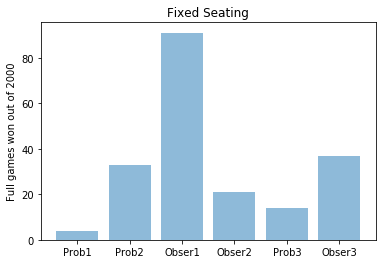

In [15]:
names = [n for n in wins]
x = ['Prob1',  'Prob2','Obser1', 'Obser2', 'Prob3', 'Obser3']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(wins[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Full games won out of 2000')
plt.title('Fixed Seating')
plt.savefig('Experiment 1c')
plt.show()


# Experiment 1d

In [16]:
wins = {}
wins['Martha']=wins['Lorenzo']=wins['Maria']=wins['Manuel']=wins['Ana']=wins['Liam']=0
for i in range(200):
    Game = full_game(6, Human=False, shuffle = False)
    while len(Game.Players) > 1:
        roundd = rounds(Game.diceState, Game.Players, Game.player, Game.human, shuffle=False)
        while roundd.last != 'Dudo' and roundd.last != 'Calza':
        # Play a round
            if roundd.player == 'Martha':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                            last_bid = roundd.last)
                bid = agent.make_bid()
            elif roundd.player == 'Lorenzo':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()
            elif roundd.player == 'Maria':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                            last_bid = roundd.last)
                bid = agent.make_bid()

            elif roundd.player == 'Manuel':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()
            elif roundd.player == 'Ana':
                agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player],
                                            last_bid = roundd.last)
                bid = agent.make_bid()
            elif roundd.player == 'Liam':
                agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                         roundd.history, roundd.total_dice, roundd.Players)
                bid = agent.make_bid()

            print (roundd.player, ': ', bid)
            roundd.last = bid
            roundd.history.append(bid)

            #Analyse terminal bid and update dice accordingly
            if roundd.last == 'Dudo': 
                loser_winner = roundd.call()
                Game.update_dice_players(loser_winner[0], loser_winner[1])
                print ('Loser:', loser_winner[0], '\n', roundd.rolls)

            elif roundd.last == 'Calza':
                loser_winner = roundd.call(Dudo = False, Calza = True)
                if loser_winner[1]==1:
                    print ('Winner:', loser_winner[0], '\n', roundd.rolls)
                    Game.update_dice_players(loser_winner[0], loser_winner[1])
                else:
                    print ('Loser:', loser_winner[0], '\n', roundd.rolls)
                    Game.update_dice_players(loser_winner[0], loser_winner[1])
            else:
                roundd.next_player()
                
    if len(Game.Players) == 1:
        print ('Winner:', Game.Players[0])
        wins[Game.Players[0]] +=1



Liam :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Maria :  [4, 2]
Manuel :  [6, 5]
Ana :  [7, 4]
Liam :  [4, 1]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 1, 6, 3, 1], 'Lorenzo': [6, 5, 1, 4, 6], 'Maria': [6, 3, 2, 1, 2], 'Manuel': [5, 1, 5, 6, 6], 'Ana': [4, 2, 5, 1, 4], 'Liam': [5, 5, 5, 6, 1]}
Maria :  [3, 3]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [8, 4]
Martha :  [9, 2]
Lorenzo :  [9, 3]
Maria :  [10, 3]
Manuel :  [10, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 2, 4, 4, 3], 'Lorenzo': [4, 3, 4, 6, 3], 'Maria': [3, 1, 3, 4], 'Manuel': [3, 6, 6, 4, 2], 'Ana': [1, 2, 1, 5, 3], 'Liam': [3, 6, 4, 1, 4]}
Manuel :  [2, 4]
Ana :  [3, 3]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [7, 3]
Maria :  [8, 4]
Manuel :  [4, 1]
Ana :  [9, 3]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 2, 4, 5, 4], 'Lorenzo': [6, 2, 3, 3, 6], 'Maria': [4, 6, 4, 3], 'Manuel': [5, 2, 3, 3], 'Ana': [3, 3, 3, 2, 4], 'Liam': [3, 6, 5, 2, 1]}
Liam :  [3, 2]
Martha :  [4

Martha :  Dudo
Loser: Liam 
 {'Martha': [3], 'Lorenzo': [1, 1, 2, 2], 'Maria': [4], 'Manuel': [2, 5], 'Ana': [4, 1, 3], 'Liam': [6]}
Martha :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [2, 1]
Manuel :  [5, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4], 'Lorenzo': [3, 2, 1, 2], 'Maria': [1], 'Manuel': [3, 3], 'Ana': [5, 5, 2]}
Ana :  [2, 3]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [6], 'Lorenzo': [4, 1, 5, 1], 'Maria': [1], 'Manuel': [1, 6], 'Ana': [5, 3]}
Manuel :  [2, 4]
Ana :  [3, 3]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Manuel :  Dudo
Loser: Lorenzo 
 {'Martha': [1], 'Lorenzo': [4, 1, 2, 6], 'Manuel': [5, 6], 'Ana': [3, 3]}
Lorenzo :  [1, 6]
Manuel :  [1, 1]
Ana :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4], 'Lorenzo': [6, 6, 5], 'Manuel': [1, 1], 'Ana': [1, 4]}
Lorenzo :  [2, 5]
Manuel :  [3, 3]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 4, 6], 'Manuel': [6, 3], 'Ana': [6, 6]}
Manuel :  [2, 2]
Ana :  [3, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo':

Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 2, 4, 4, 1], 'Lorenzo': [6, 1, 3, 1], 'Maria': [6, 5], 'Manuel': [4, 3, 1, 4, 2], 'Ana': [1, 6, 4, 4, 1], 'Liam': [1, 1, 4, 3, 5]}
Maria :  [2, 5]
Manuel :  [4, 5]
Ana :  [5, 3]
Liam :  [6, 6]
Martha :  [7, 5]
Lorenzo :  [8, 3]
Maria :  [9, 5]
Manuel :  [10, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 6, 5, 2, 6], 'Lorenzo': [3, 1, 3, 6], 'Maria': [5], 'Manuel': [5, 6, 5, 2, 1], 'Ana': [2, 3, 3, 4, 5], 'Liam': [5, 2, 5, 6, 5]}
Ana :  [3, 2]
Liam :  [5, 6]
Martha :  [6, 3]
Lorenzo :  [7, 5]
Maria :  [4, 1]
Manuel :  [9, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 5, 6, 3, 3], 'Lorenzo': [2, 5, 6, 5], 'Maria': [1], 'Manuel': [4, 4, 4, 5, 6], 'Ana': [6, 5, 2, 2], 'Liam': [3, 5, 1, 6, 6]}
Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [5, 4]
Martha :  [6, 2]
Lorenzo :  [7, 2]
Maria :  [8, 3]
Manuel :  [8, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 5, 2, 2, 2], 'Lorenzo': [2, 2, 1, 6], 'Maria': [3], 'Manuel': [1, 5, 5, 2], 'Ana': [3, 2, 3, 2], 'Liam':

Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5], 'Maria': [4], 'Manuel': [1, 2, 6]}
Manuel :  [2, 4]
Lorenzo :  [2, 6]
Manuel :  [1, 1]
Lorenzo :  [3, 6]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6], 'Manuel': [3, 1, 6]}
Manuel :  [1, 5]
Lorenzo :  [2, 4]
Manuel :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4], 'Manuel': [6, 3]}
Winner: Manuel
Manuel :  [3, 5]
Ana :  [4, 6]
Liam :  [5, 5]
Martha :  [6, 4]
Lorenzo :  [7, 5]
Maria :  [8, 2]
Manuel :  [9, 4]
Ana :  [10, 6]
Liam :  [11, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 6, 4, 4, 3], 'Lorenzo': [3, 6, 6, 5, 5], 'Maria': [2, 1, 2, 2, 2], 'Manuel': [4, 4, 3, 2, 4], 'Ana': [4, 3, 6, 1, 6], 'Liam': [5, 5, 6, 3, 6]}
Liam :  [2, 4]
Martha :  [3, 4]
Lorenzo :  [5, 4]
Maria :  [6, 2]
Manuel :  [8, 3]
Ana :  [9, 2]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 4, 6, 6, 2], 'Lorenzo': [1, 4, 2, 5, 4], 'Maria': [5, 2, 2, 1, 6], 'Manuel': [3, 2, 4, 3, 5], 'Ana': [4, 2, 5, 6, 2], 'Liam': [5, 2, 1, 3]}
Liam :  [2, 5]
Martha :  [1, 1]
Lor

Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 3, 1, 6, 3], 'Maria': [1, 1, 4, 5], 'Manuel': [6, 5, 4, 1], 'Liam': [2]}
Lorenzo :  [2, 4]
Maria :  [3, 4]
Manuel :  [4, 2]
Lorenzo :  [4, 4]
Maria :  [5, 4]
Manuel :  [6, 2]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 6, 4, 4, 5], 'Maria': [5, 5, 4, 4], 'Manuel': [3, 1, 2, 2]}
Manuel :  [2, 3]
Lorenzo :  [2, 6]
Maria :  [3, 2]
Manuel :  [4, 3]
Lorenzo :  [5, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 6, 2, 3, 6], 'Maria': [6, 3, 2, 2], 'Manuel': [3, 6, 3]}
Lorenzo :  [2, 2]
Maria :  [1, 1]
Manuel :  [3, 2]
Lorenzo :  [4, 2]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 2, 4, 2], 'Maria': [4, 5, 3, 1], 'Manuel': [6, 2, 3]}
Maria :  [1, 3]
Manuel :  [1, 4]
Lorenzo :  [2, 3]
Maria :  [1, 1]
Manuel :  [3, 4]
Lorenzo :  [4, 4]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 4, 1, 3], 'Maria': [2, 1, 3], 'Manuel': [6, 5, 4]}
Maria :  [1, 2]
Manuel :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [2, 6

Liam :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2, 3], 'Lorenzo': [6, 1, 5, 6, 4], 'Maria': [6, 2, 2, 6, 3], 'Manuel': [1, 3, 5, 6], 'Ana': [6, 4, 1], 'Liam': [2, 3, 5, 1]}
Martha :  [2, 3]
Lorenzo :  [4, 4]
Maria :  [5, 3]
Manuel :  [7, 4]
Ana :  [8, 2]
Liam :  [8, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 5], 'Lorenzo': [1, 3, 4, 5, 4], 'Maria': [2, 3, 3, 4, 1], 'Manuel': [4, 5, 4, 6], 'Ana': [2, 5, 2], 'Liam': [5, 3, 3, 2]}
Martha :  [3, 3]
Lorenzo :  [5, 6]
Maria :  [6, 2]
Manuel :  [7, 5]
Ana :  [8, 3]
Liam :  [8, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3], 'Lorenzo': [3, 3, 5, 2, 2], 'Maria': [2, 2, 5, 6, 2], 'Manuel': [4, 5, 6, 5], 'Ana': [3, 1, 3], 'Liam': [6, 6, 2, 5]}
Liam :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [5, 4]
Maria :  [6, 5]
Manuel :  [7, 2]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2], 'Lorenzo': [3, 6, 6, 2, 3], 'Maria'

Manuel :  [4, 2]
Ana :  [5, 4]
Liam :  [6, 6]
Martha :  [3, 1]
Lorenzo :  [8, 3]
Maria :  [4, 1]
Manuel :  [9, 4]
Ana :  [10, 4]
Liam :  [10, 5]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 2, 2, 3, 1], 'Lorenzo': [6, 6, 5, 3, 1], 'Maria': [1, 4, 3, 4, 1], 'Manuel': [3, 4, 5, 1, 4], 'Ana': [4, 3, 4, 4, 3], 'Liam': [5, 2, 5, 2, 5]}
Maria :  [2, 5]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  [4, 5]
Martha :  [5, 3]
Lorenzo :  [6, 2]
Maria :  [3, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 3, 3, 5, 5], 'Lorenzo': [5, 6, 2, 3, 4], 'Maria': [5, 1, 4, 6], 'Manuel': [4, 6, 6, 1, 2], 'Ana': [4, 2, 1, 4, 6], 'Liam': [1, 2, 5, 4, 5]}
Manuel :  [3, 5]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  [8, 5]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 5, 2, 5, 6], 'Lorenzo': [1, 1, 4, 2, 3], 'Maria': [6, 2, 4, 1], 'Manuel': [5, 5, 4, 1], 'Ana': [1, 4, 3, 1, 4], 'Liam': [1, 5, 1, 6, 6]}
Ana :  [3, 2]
Liam :  [5, 2]


Lorenzo :  [2, 2]
Maria :  [3, 6]
Manuel :  [4, 5]
Ana :  [2, 1]
Liam :  [6, 3]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 4, 1], 'Lorenzo': [2, 5], 'Maria': [6, 6], 'Manuel': [5, 2, 6, 4, 2], 'Ana': [6, 1, 6, 1], 'Liam': [5, 3, 5, 6]}
Lorenzo :  [2, 4]
Maria :  [3, 2]
Manuel :  [4, 6]
Ana :  [5, 5]
Liam :  [3, 1]
Martha :  [4, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 1, 4], 'Lorenzo': [4], 'Maria': [2, 4], 'Manuel': [4, 4, 1, 1, 3], 'Ana': [5, 5, 5, 5], 'Liam': [5, 6, 1, 3]}
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 6]
Liam :  [2, 1]
Martha :  [5, 2]
Maria :  [6, 2]
Manuel :  [6, 4]
Ana :  [7, 6]
Liam :  Dudo
Loser: Ana 
 {'Martha': [5, 4, 2], 'Maria': [2, 3], 'Manuel': [4, 4, 1, 3, 2], 'Ana': [6, 1, 6, 3], 'Liam': [5, 1, 1, 2]}
Ana :  [2, 2]
Liam :  [3, 2]
Martha :  [2, 1]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 6, 1], 'Maria': [4, 4], 'Manuel': [3, 1, 5, 1, 1], 'Ana': [5, 2, 3], 'Liam': [3, 5, 2, 6]}


Manuel :  [9, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 5, 1], 'Lorenzo': [2, 3, 5, 6, 3], 'Maria': [1, 5, 5], 'Manuel': [2, 5, 5, 2, 5], 'Ana': [5, 1, 1, 3, 5], 'Liam': [2, 5, 4, 4]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [9, 3]
Manuel :  [9, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 2, 5], 'Lorenzo': [2, 6, 3, 4, 1], 'Maria': [1, 3, 3], 'Manuel': [2, 6, 6, 1, 6], 'Ana': [2, 4, 5, 4], 'Liam': [1, 5, 3, 1]}
Ana :  [3, 2]
Liam :  [4, 5]
Martha :  [2, 1]
Lorenzo :  [6, 3]
Maria :  [3, 1]
Manuel :  [7, 4]
Ana :  [8, 2]
Liam :  [8, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 3, 1], 'Lorenzo': [2, 6, 2, 5, 2], 'Maria': [1, 4, 2], 'Manuel': [4, 1, 4, 1, 4], 'Ana': [5, 2, 2], 'Liam': [3, 4, 6, 6]}
Martha :  [2, 3]
Lorenzo :  [4, 4]
Maria :  [5, 2]
Manuel :  [7, 6]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 6], 'Lorenzo': [4, 3, 2, 3, 6], 'Maria': [5, 2, 2], 'Manuel': [1, 6, 3, 6, 6], 'Ana': [2, 6, 1], 'Liam': [6, 2, 2, 2

Maria :  [3, 3]
Manuel :  [3, 5]
Liam :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 1], 'Lorenzo': [1, 6, 5, 2], 'Maria': [4, 3], 'Manuel': [4], 'Liam': [5, 5, 5, 5]}
Lorenzo :  [2, 2]
Maria :  [3, 4]
Manuel :  [4, 6]
Liam :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2], 'Lorenzo': [5, 4, 1], 'Maria': [5, 4], 'Manuel': [6], 'Liam': [2, 5, 5, 2]}
Martha :  [2, 4]
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [2, 1]
Liam :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4], 'Lorenzo': [2, 1, 3], 'Maria': [4, 2], 'Manuel': [1], 'Liam': [3, 2, 5, 2]}
Lorenzo :  [1, 3]
Maria :  [2, 4]
Manuel :  [3, 3]
Liam :  [4, 3]
Lorenzo :  [5, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [3, 3, 3], 'Maria': [4, 6], 'Manuel': [5], 'Liam': [3, 4, 1, 3]}
Maria :  [2, 5]
Manuel :  [3, 3]
Liam :  [3, 6]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5, 1, 3], 'Maria': [5], 'Manuel': [3], 'Liam': [6, 6, 3, 2]}
Lorenzo :  [1, 2]
Maria :  [2

Lorenzo :  [1, 4]
Liam :  [1, 1]
Lorenzo :  [3, 3]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 5, 4], 'Liam': [6, 4, 3, 1, 1]}
Liam :  [1, 4]
Lorenzo :  [1, 6]
Liam :  [2, 4]
Lorenzo :  [1, 1]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2, 6], 'Liam': [1, 1, 4, 6]}
Lorenzo :  [1, 2]
Liam :  [1, 6]
Lorenzo :  [1, 1]
Liam :  [3, 2]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [1, 3], 'Liam': [5, 6, 3, 2]}
Liam :  [2, 3]
Lorenzo :  [1, 1]
Liam :  [3, 3]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [1, 5], 'Liam': [3, 4, 5]}
Liam :  [2, 4]
Lorenzo :  [3, 4]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 4], 'Liam': [5, 2]}
Lorenzo :  [1, 3]
Liam :  [2, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2], 'Liam': [2, 6]}
Winner: Liam
Martha :  [2, 5]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [5, 4]
Ana :  [3, 1]
Liam :  [7, 4]
Martha :  [8, 5]
Lorenzo :  [9, 6]
Maria :  [10, 5]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 3, 4, 5], 'Lorenzo': [6, 1, 1, 4, 2], '

Martha :  [2, 2]
Lorenzo :  [2, 6]
Maria :  [3, 6]
Manuel :  [4, 4]
Liam :  [4, 6]
Martha :  [5, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2, 5, 4], 'Lorenzo': [3, 6, 6, 4, 1], 'Maria': [6], 'Manuel': [4, 5], 'Liam': [6]}
Martha :  [2, 5]
Lorenzo :  [3, 5]
Maria :  [4, 6]
Manuel :  [5, 6]
Liam :  Dudo
Loser: Manuel 
 {'Martha': [5, 5], 'Lorenzo': [5, 5, 1, 6, 5], 'Maria': [6], 'Manuel': [6, 4], 'Liam': [4]}
Manuel :  [1, 2]
Liam :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [3, 2]
Maria :  [4, 3]
Manuel :  [5, 3]
Liam :  Dudo
Loser: Manuel 
 {'Martha': [6, 3], 'Lorenzo': [2, 2, 4, 6, 1], 'Maria': [3], 'Manuel': [3], 'Liam': [4]}
Liam :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 1], 'Lorenzo': [1, 1, 1, 5, 6], 'Maria': [3], 'Liam': [5]}
Liam :  [1, 6]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Liam :  [3, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 5], 'Lorenzo': [1, 6, 3, 4, 4], 'Liam': [6]}
Martha :  [1, 2]
Lorenzo :  [1, 4]
Liam :  [2, 3]
Martha 

Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Manuel :  [9, 5]
Ana :  [5, 1]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 2, 4, 2], 'Lorenzo': [1, 6, 2, 6], 'Maria': [2, 6, 5, 6, 4], 'Manuel': [3, 6, 5, 5, 2], 'Ana': [4, 3, 6, 1, 1], 'Liam': [6, 2, 2, 2, 6]}
Martha :  [2, 3]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Manuel :  [5, 3]
Ana :  [6, 6]
Liam :  [8, 5]
Martha :  [4, 1]
Lorenzo :  [9, 4]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 4, 6], 'Lorenzo': [6, 4, 5, 4], 'Maria': [6, 1, 4, 3, 2], 'Manuel': [1, 5, 2, 3, 3], 'Ana': [2, 3, 6, 6, 5], 'Liam': [6, 4, 5, 5, 2]}
Manuel :  [3, 5]
Ana :  [4, 4]
Liam :  [5, 2]
Martha :  [3, 1]
Lorenzo :  [7, 3]
Maria :  [8, 3]
Manuel :  [8, 5]
Ana :  [9, 4]
Liam :  [10, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 1], 'Lorenzo': [1, 3, 6, 3], 'Maria': [2, 1, 6, 3, 3], 'Manuel': [6, 5, 5, 3], 'Ana': [4, 6, 3, 1, 4], 'Liam': [2, 3, 1, 2, 4]}
Liam :  [3, 6]
Martha :  [4, 

Liam :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 3, 4, 1], 'Lorenzo': [1, 5, 4, 2], 'Manuel': [2, 1, 2], 'Liam': [2]}
Martha :  [1, 2]
Lorenzo :  [1, 3]
Manuel :  [1, 1]
Liam :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [4, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [5, 3, 2], 'Lorenzo': [5, 3, 4, 6], 'Manuel': [2, 1, 3], 'Liam': [6]}
Manuel :  [2, 4]
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [2, 1]
Manuel :  [3, 1]
Liam :  Dudo
Loser: Liam 
 {'Martha': [2, 6, 2], 'Lorenzo': [1, 1, 1, 4], 'Manuel': [4, 1], 'Liam': [2]}
Martha :  [1, 3]
Lorenzo :  [1, 6]
Manuel :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [4, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [3, 3, 6], 'Lorenzo': [6, 4, 2, 2], 'Manuel': [1, 1]}
Manuel :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Manuel :  [4, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 4, 6], 'Lorenzo': [2, 1, 5, 6], 'Manuel': [2]}
Martha :  [1, 3]
Lorenzo :  [1, 1]
Manuel :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1], 'Lorenzo': [1, 1, 4,

Lorenzo :  [5, 6]
Maria :  [3, 1]
Manuel :  [7, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 2, 4], 'Lorenzo': [6, 4, 1], 'Maria': [6, 1, 4], 'Manuel': [5, 3, 3, 5, 6], 'Ana': [2, 1, 4], 'Liam': [3, 1]}
Ana :  [2, 3]
Liam :  [4, 2]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 3, 5, 1], 'Lorenzo': [5, 1, 4], 'Maria': [3, 1, 4], 'Manuel': [3, 6, 1, 2, 6], 'Ana': [1, 4], 'Liam': [3, 5]}
Manuel :  [2, 5]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [5, 4, 4, 6], 'Lorenzo': [1, 3, 5], 'Maria': [4, 3, 3], 'Manuel': [1, 5, 4, 5], 'Ana': [2, 4], 'Liam': [6, 1]}
Maria :  [3, 6]
Manuel :  [5, 2]
Ana :  [6, 2]
Liam :  [6, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 1, 2, 2], 'Lorenzo': [4, 1, 2], 'Maria': [4, 1], 'Manuel': [2, 5, 6, 1], 'Ana': [3, 2], 'Liam': [6, 4]}
Martha :  [3, 4]
Lorenzo :  [4, 5]
Maria :  [2, 1]
Manuel :  [5, 5]
Ana :  [6, 5]
Liam :  [6, 6]
Ma

Ana :  [2, 1]
Liam :  [5, 4]
Martha :  [6, 3]
Maria :  [7, 6]
Manuel :  [8, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3, 5, 3], 'Maria': [6, 6, 4, 6], 'Manuel': [1, 3, 3, 2, 3], 'Ana': [2, 1, 1, 3, 6], 'Liam': [4, 3, 5, 4, 5]}
Ana :  [3, 3]
Liam :  [5, 2]
Martha :  [6, 4]
Maria :  [7, 6]
Manuel :  [8, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 2, 5, 4], 'Maria': [1, 6, 6, 4], 'Manuel': [1, 6, 1, 5, 6], 'Ana': [3, 5, 3, 5], 'Liam': [3, 1, 4, 1, 5]}
Ana :  [2, 3]
Liam :  [4, 2]
Martha :  [5, 4]
Maria :  [6, 6]
Manuel :  [7, 5]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 4, 4, 1], 'Maria': [6, 1, 4, 6], 'Manuel': [3, 5, 5, 1, 2], 'Ana': [4, 2, 1], 'Liam': [2, 2, 6, 3, 3]}
Liam :  [3, 2]
Martha :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 6]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 6, 1, 3], 'Maria': [3, 2, 4, 6], 'Manuel': [5, 1, 6, 6, 3], 'Ana': [4, 1, 1], 'Liam': [5, 2, 6, 4]}
Martha :  [2, 4]
Maria :  [3, 5]
Manuel :  [5, 2]
An

Lorenzo :  [9, 6]
Maria :  [5, 1]
Manuel :  [11, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 1, 2, 6], 'Lorenzo': [6, 2, 6, 1], 'Maria': [5, 5, 1, 1, 1], 'Manuel': [5, 2, 6, 4], 'Ana': [5, 6, 1, 5, 3], 'Liam': [1, 4, 5, 5, 3]}
Manuel :  [3, 2]
Ana :  [4, 4]
Liam :  [6, 5]
Martha :  [7, 5]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 3, 1, 5], 'Lorenzo': [1, 1, 4, 1], 'Maria': [4, 5, 1, 3, 6], 'Manuel': [3, 2, 5], 'Ana': [4, 1, 4, 3, 4], 'Liam': [1, 6, 1, 4, 5]}
Manuel :  [2, 2]
Ana :  [3, 3]
Liam :  [5, 3]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [9, 4]
Manuel :  [10, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 1, 1], 'Lorenzo': [5, 1, 3, 2], 'Maria': [4, 1, 2, 4, 3], 'Manuel': [3, 2], 'Ana': [5, 4, 3, 3, 6], 'Liam': [3, 3, 5, 2, 5]}
Ana :  [2, 3]
Liam :  [4, 5]
Martha :  [5, 6]
Lorenzo :  [7, 2]
Maria :  [8, 3]
Manuel :  [9, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 6, 6, 1], 'Lorenzo': [6, 3, 2, 5], 'Maria': [5, 3, 3, 5, 6], '

Martha :  [2, 6]
Lorenzo :  [1, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 6], 'Lorenzo': [1, 3, 2]}
Martha :  [1, 5]
Lorenzo :  [1, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [1, 5, 2]}
Winner: Lorenzo
Martha :  [2, 4]
Lorenzo :  [4, 3]
Maria :  [5, 2]
Manuel :  [6, 6]
Ana :  [7, 5]
Liam :  [9, 2]
Martha :  [10, 4]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 4, 4, 6, 6], 'Lorenzo': [6, 2, 3, 5, 5], 'Maria': [6, 3, 2, 2, 2], 'Manuel': [6, 1, 2, 6, 3], 'Ana': [5, 5, 3, 5, 3], 'Liam': [2, 5, 1, 2, 4]}
Martha :  [3, 2]
Lorenzo :  [5, 6]
Maria :  [6, 3]
Manuel :  [8, 4]
Ana :  [9, 4]
Liam :  [10, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 3, 2, 1], 'Lorenzo': [6, 6, 3, 2, 4], 'Maria': [6, 4, 2, 3, 3], 'Manuel': [5, 2, 4, 3, 5], 'Ana': [1, 6, 4, 3, 4], 'Liam': [2, 4, 6, 2, 1]}
Martha :  [3, 3]
Lorenzo :  [5, 6]
Maria :  [6, 3]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [9, 5]
Martha :  [10, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 3, 3], 'Lorenzo': [4,

Manuel :  [4, 2]
Ana :  [2, 1]
Liam :  [5, 5]
Martha :  [3, 1]
Lorenzo :  [7, 6]
Maria :  [8, 4]
Manuel :  [9, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 5, 3, 1, 2], 'Lorenzo': [3, 6, 6, 5], 'Maria': [4, 6], 'Manuel': [2, 6, 2], 'Ana': [5, 1, 4, 2], 'Liam': [5, 4, 5, 1]}
Manuel :  [3, 6]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  [7, 6]
Lorenzo :  [8, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [6, 1, 6, 3, 4], 'Lorenzo': [4, 3, 4, 2], 'Maria': [2, 1], 'Manuel': [5, 1], 'Ana': [2, 3, 1, 4], 'Liam': [6, 1, 6, 1]}
Maria :  [3, 6]
Manuel :  [5, 2]
Ana :  [6, 4]
Liam :  [7, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 3, 4, 1, 3], 'Lorenzo': [5, 6, 3, 2], 'Maria': [6], 'Manuel': [2, 3], 'Ana': [2, 4, 6, 4], 'Liam': [2, 1, 2, 5]}
Martha :  [3, 2]
Lorenzo :  [5, 3]
Maria :  [6, 5]
Manuel :  [3, 1]
Ana :  [7, 6]
Liam :  [8, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 1, 4, 2], 'Lorenzo': [2, 3, 5, 3], 'Maria': [5], 'Manuel': [1, 3], 'Ana': [6, 5, 6, 3], 'Liam': [4, 1, 4, 4]}
Liam :  [3,

Liam :  [5, 6]
Martha :  [6, 2]
Lorenzo :  [7, 4]
Maria :  [8, 6]
Manuel :  [4, 1]
Ana :  [5, 1]
Liam :  [11, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 2, 2, 6, 2], 'Lorenzo': [6, 3, 6, 6, 1], 'Maria': [6], 'Manuel': [1, 4, 6, 4, 1], 'Ana': [1, 1, 4, 1, 3], 'Liam': [2, 6, 5, 6]}
Martha :  [3, 2]
Lorenzo :  [4, 3]
Maria :  [5, 6]
Manuel :  [7, 5]
Ana :  [8, 3]
Liam :  [8, 6]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 3, 5], 'Lorenzo': [6, 2, 4, 1, 3], 'Maria': [6], 'Manuel': [2, 4, 1, 2, 6], 'Ana': [3, 4, 4, 3, 5], 'Liam': [6, 1, 6, 3]}
Manuel :  [2, 6]
Ana :  [3, 5]
Liam :  [5, 6]
Martha :  [3, 1]
Lorenzo :  [7, 5]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 1, 1, 5], 'Lorenzo': [5, 4, 6, 5, 1], 'Manuel': [2, 2, 5, 3, 1], 'Ana': [5, 6, 1, 5, 6], 'Liam': [5, 1, 6, 3]}
Ana :  [2, 6]
Liam :  [4, 2]
Martha :  [5, 2]
Lorenzo :  [7, 5]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 4, 2, 2], 'Lorenzo': [4, 5, 5, 5, 4], 'Man

Liam :  [3, 3]
Martha :  [4, 4]
Lorenzo :  [6, 4]
Maria :  [3, 1]
Manuel :  [7, 3]
Ana :  [8, 5]
Liam :  [9, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 6, 5, 4, 4], 'Lorenzo': [2, 6, 5, 6, 6], 'Maria': [1, 3, 1], 'Manuel': [3, 5, 5, 3], 'Ana': [5, 5], 'Liam': [5, 5, 3, 3, 6]}
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 5]
Ana :  [7, 6]
Liam :  [8, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 5, 2, 5], 'Lorenzo': [6, 4, 4, 1, 1], 'Maria': [5, 6, 2], 'Manuel': [4, 6, 5, 5], 'Ana': [6, 6], 'Liam': [4, 4, 2, 4, 1]}
Martha :  [3, 3]
Lorenzo :  [5, 3]
Maria :  [3, 1]
Manuel :  [7, 5]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 3, 3], 'Lorenzo': [6, 5, 3, 4, 3], 'Maria': [4, 1, 2], 'Manuel': [4, 5, 5, 3], 'Ana': [1, 1], 'Liam': [3, 2, 1, 1, 3]}
Martha :  [2, 3]
Lorenzo :  [4, 4]
Maria :  [5, 2]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [9, 5]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 3], 'Lorenzo': [6, 2, 3, 2, 5], 'Maria': [3, 4, 2

Liam :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [3, 6]
Maria :  [4, 3]
Manuel :  [6, 3]
Ana :  [3, 1]
Liam :  [8, 3]
Martha :  [4, 1]
Lorenzo :  [9, 6]
Maria :  [10, 3]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 2, 6, 1, 1], 'Lorenzo': [6, 6, 2, 6, 2], 'Maria': [4, 6, 3, 5, 3], 'Manuel': [1, 3, 3, 4], 'Ana': [4, 6, 1, 3, 1], 'Liam': [1, 4, 5, 2]}
Ana :  [2, 4]
Liam :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  [6, 3]
Manuel :  [7, 3]
Ana :  [8, 4]
Liam :  [8, 5]
Martha :  [4, 1]
Lorenzo :  [9, 2]
Maria :  [10, 3]
Manuel :  [10, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 3, 6, 1], 'Lorenzo': [2, 5, 6, 4, 2], 'Maria': [3, 6, 2, 3, 6], 'Manuel': [4, 5, 4, 3], 'Ana': [1, 3, 4, 4], 'Liam': [4, 5, 1, 5]}
Ana :  [3, 4]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [8, 5]
Maria :  [9, 5]
Manuel :  [9, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 2, 5, 3, 5], 'Lorenzo': [3, 5, 4, 4, 2], 'Maria': [6, 2, 5, 3, 5], 'Manuel': [6, 4, 6, 6], 'Ana': [5, 6, 4], 'Liam': [6, 4, 5, 3]}


Martha :  [1, 1]
Lorenzo :  [3, 5]
Manuel :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 3], 'Lorenzo': [3], 'Manuel': [3, 1, 2, 5, 1], 'Liam': [5, 1, 1]}
Martha :  [1, 5]
Lorenzo :  [1, 6]
Manuel :  [2, 5]
Liam :  [3, 4]
Martha :  [4, 5]
Lorenzo :  [4, 6]
Manuel :  Dudo
Loser: Lorenzo 
 {'Martha': [5], 'Lorenzo': [6], 'Manuel': [2, 3, 2, 4, 5], 'Liam': [5, 2, 4]}
Manuel :  [2, 6]
Liam :  [1, 1]
Martha :  [3, 2]
Manuel :  [2, 1]
Liam :  [5, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Manuel': [4, 1, 6, 5, 3], 'Liam': [6, 6, 6]}
Manuel :  [1, 2]
Liam :  [1, 1]
Manuel :  [3, 3]
Liam :  [3, 5]
Manuel :  [4, 3]
Liam :  Dudo
Loser: Manuel 
 {'Manuel': [3, 1, 2, 6, 3], 'Liam': [4, 5, 5]}
Manuel :  [1, 6]
Liam :  [2, 2]
Manuel :  [1, 1]
Liam :  [3, 2]
Manuel :  [2, 1]
Liam :  Dudo
Loser: Liam 
 {'Manuel': [1, 6, 1, 6], 'Liam': [2, 4, 2]}
Liam :  [2, 2]
Manuel :  [2, 5]
Liam :  [1, 1]
Manuel :  [3, 5]
Liam :  Dudo
Loser: Liam 
 {'Manuel': [5, 2, 4, 5], 'Liam': [6

Manuel :  [7, 2]
Ana :  [8, 5]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 4, 6, 6, 2], 'Lorenzo': [3, 1, 1, 1], 'Maria': [3], 'Manuel': [6, 2, 2, 1], 'Ana': [3, 6, 5, 4, 5], 'Liam': [1, 3, 4, 1]}
Martha :  [3, 4]
Lorenzo :  [5, 6]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [8, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 4, 4, 5], 'Lorenzo': [3, 4, 3, 3], 'Maria': [2], 'Manuel': [1, 4, 6, 4], 'Ana': [4, 4, 3, 4, 1], 'Liam': [3, 1, 3, 3]}
Martha :  [3, 3]
Lorenzo :  [4, 5]
Maria :  [5, 5]
Manuel :  [6, 2]
Ana :  [7, 6]
Liam :  [8, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 3, 4], 'Lorenzo': [6, 2, 4, 4], 'Maria': [5], 'Manuel': [4, 5, 2, 3], 'Ana': [6, 6, 3, 5, 2], 'Liam': [4, 2, 4, 5]}
Liam :  [3, 2]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [6, 6]
Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 3, 1], 'Lorenzo': [4, 3, 6, 6], 'Maria': [6], 'Manuel': [5, 3, 2, 4], 'Ana': [1, 5, 1, 1, 5], 'Liam': [2, 6, 3]

Lorenzo :  [10, 6]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 3, 3, 6, 3], 'Lorenzo': [4, 6, 1, 2, 6], 'Maria': [6, 1, 3, 1, 2], 'Manuel': [5, 2, 1, 5, 3], 'Ana': [4, 4, 5, 5, 1], 'Liam': [6, 3, 6, 5, 1]}
Ana :  [3, 5]
Liam :  [5, 5]
Martha :  [6, 2]
Lorenzo :  [7, 3]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 2, 2, 6], 'Lorenzo': [2, 1, 6, 3, 1], 'Maria': [1, 2, 3, 6, 1], 'Manuel': [3, 1, 1, 4, 4], 'Ana': [5, 6, 1, 3], 'Liam': [5, 6, 2, 1, 5]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [6, 4]
Maria :  [3, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 4, 5, 4, 1], 'Lorenzo': [5, 2, 4, 1, 4], 'Maria': [3, 6, 1, 1, 1], 'Manuel': [4, 1, 3, 6, 1], 'Ana': [4, 4, 2], 'Liam': [6, 3, 5, 1, 2]}
Ana :  [2, 2]
Liam :  [3, 4]
Martha :  [4, 4]
Lorenzo :  [6, 3]
Maria :  [7, 4]
Manuel :  [8, 5]
Ana :  [9, 2]
Liam :  [9, 4]
Martha :  [10, 4]
Lorenzo :  [11, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 5, 5, 4

Lorenzo :  [1, 4]
Maria :  [2, 4]
Manuel :  [2, 5]
Lorenzo :  [3, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 3], 'Maria': [1, 4, 4], 'Manuel': [5, 5]}
Maria :  [1, 3]
Manuel :  [2, 3]
Lorenzo :  [1, 1]
Maria :  [3, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 6], 'Maria': [6, 3], 'Manuel': [5, 3]}
Manuel :  [2, 3]
Lorenzo :  [3, 3]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 3], 'Maria': [5, 4], 'Manuel': [4]}
Lorenzo :  [1, 4]
Maria :  [2, 2]
Manuel :  [2, 4]
Lorenzo :  [1, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1], 'Maria': [2, 4], 'Manuel': [4]}
Maria :  [2, 6]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1], 'Maria': [6], 'Manuel': [1]}
Lorenzo :  [1, 3]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [3], 'Maria': [5]}
Winner: Lorenzo
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 3]
Lorenzo :  [7, 3]
Maria :  [8, 3]
Manuel :  [9, 3]
Ana :  [10, 2]
Liam :  [10, 3]
Martha :  [11, 3]
Lorenzo :  [12, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 3, 6, 3, 5], 'Lorenzo': [3, 3,

Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 5, 1, 5], 'Lorenzo': [2, 5, 2, 5, 6], 'Maria': [2, 1], 'Manuel': [4, 2, 1], 'Ana': [1, 4], 'Liam': [6, 4, 5, 6]}
Maria :  [3, 3]
Manuel :  [5, 2]
Ana :  [6, 2]
Liam :  [6, 3]
Martha :  [7, 5]
Lorenzo :  [7, 6]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 5, 6, 5], 'Lorenzo': [5, 6, 6, 1, 2], 'Maria': [3], 'Manuel': [4, 1, 5], 'Ana': [4, 2], 'Liam': [1, 5, 3, 3]}
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 2]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 6, 1, 4], 'Lorenzo': [5, 4, 6, 2], 'Maria': [2], 'Manuel': [4, 5, 2], 'Ana': [3, 1], 'Liam': [1, 5, 1, 3]}
Martha :  [3, 2]
Lorenzo :  [5, 6]
Maria :  [3, 1]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 2, 6], 'Lorenzo': [3, 1, 3, 2], 'Maria': [1], 'Manuel': [2, 5, 6], 'Ana': [6, 4], 'Liam': [3, 1, 6, 4]}
Ana :  [2, 2]
Liam :  [4, 3]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Maria :  [6, 6]
Manuel :  [7, 2]
Ana :  Dudo
L

Martha :  [5, 4]
Lorenzo :  [6, 5]
Maria :  [7, 5]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 4], 'Lorenzo': [2, 3, 2, 1], 'Maria': [5, 5, 1], 'Manuel': [2, 4, 6, 5, 2], 'Ana': [4, 3], 'Liam': [1, 3, 2, 5]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [5, 6]
Martha :  [6, 4]
Lorenzo :  [3, 1]
Maria :  [7, 2]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 4], 'Lorenzo': [5, 1, 4, 6], 'Maria': [4, 5, 2], 'Manuel': [5, 2, 6, 3], 'Ana': [2, 4], 'Liam': [2, 4, 6, 6]}
Manuel :  [3, 5]
Ana :  [4, 2]
Liam :  [5, 4]
Martha :  [6, 3]
Lorenzo :  [7, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 5], 'Lorenzo': [3, 6, 4, 3], 'Maria': [5, 5, 4], 'Manuel': [1, 3, 4], 'Ana': [3, 2], 'Liam': [6, 5, 1, 3]}
Maria :  [2, 5]
Manuel :  [4, 5]
Ana :  [5, 4]
Liam :  [5, 6]
Martha :  [6, 3]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 3], 'Lorenzo': [4, 6, 1, 2], 'Maria': [2, 1], 'Manuel': [3, 3, 4], 'Ana': [5, 4], 'Liam': [1, 4, 6, 6]}
Maria :  [2, 4]
Manuel :  [3, 2]
Ana :  [2, 1]

Liam :  [6, 2]
Martha :  [7, 3]
Lorenzo :  [8, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 6, 3, 3], 'Lorenzo': [6, 3], 'Maria': [4, 3, 6, 4], 'Manuel': [6, 6, 5, 1, 5], 'Ana': [6, 2, 3, 3], 'Liam': [2, 1, 4, 3]}
Maria :  [2, 3]
Manuel :  [3, 6]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  [7, 2]
Lorenzo :  [7, 3]
Maria :  [8, 3]
Manuel :  [8, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 3, 2, 2], 'Lorenzo': [3, 5], 'Maria': [3, 3, 1], 'Manuel': [2, 6, 4, 6, 3], 'Ana': [3, 1, 4, 1], 'Liam': [6, 4, 2, 1]}
Manuel :  [2, 5]
Ana :  [3, 5]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 3, 1], 'Lorenzo': [4, 2], 'Maria': [3, 1, 5], 'Manuel': [2, 2, 5, 1], 'Ana': [6, 2, 5, 5], 'Liam': [5, 3, 1, 5]}
Ana :  [2, 3]
Liam :  [3, 2]
Martha :  [4, 4]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 5]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 6, 2, 4], 'Lorenzo': [1, 3], 'Maria': [2, 4, 2], 'Ma

Ana :  [4, 4]
Liam :  [6, 6]
Martha :  [7, 4]
Lorenzo :  [4, 1]
Maria :  [9, 3]
Manuel :  [10, 2]
Ana :  [11, 4]
Liam :  Dudo
Loser: Ana 
 {'Martha': [4, 4, 2, 6, 4], 'Lorenzo': [3, 2, 3, 1, 3], 'Maria': [5, 3, 3, 1, 4], 'Manuel': [2, 5, 5, 6, 2], 'Ana': [6, 4, 4, 6, 3], 'Liam': [5, 1, 1, 3, 2]}
Ana :  [2, 2]
Liam :  [3, 2]
Martha :  [4, 5]
Lorenzo :  [6, 3]
Maria :  [3, 1]
Manuel :  [8, 3]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 6, 5, 2, 1], 'Lorenzo': [1, 3, 5, 5, 3], 'Maria': [1, 4, 3, 1, 5], 'Manuel': [6, 2, 5, 2, 4], 'Ana': [1, 1, 6, 3], 'Liam': [4, 3, 3, 1, 3]}
Martha :  [2, 2]
Lorenzo :  [4, 6]
Maria :  [5, 4]
Manuel :  [6, 3]
Ana :  [7, 3]
Liam :  [9, 5]
Martha :  [5, 1]
Lorenzo :  [11, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 1, 4, 3], 'Lorenzo': [2, 5, 2, 2, 3], 'Maria': [4, 4, 4, 5, 4], 'Manuel': [6, 5, 3, 3, 4], 'Ana': [4, 2, 3, 3], 'Liam': [3, 2, 5, 6, 5]}
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [6, 2]
Ana :  [3, 1]
Liam :  [8

Lorenzo :  [3, 6]
Manuel :  [2, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 6, 4], 'Manuel': [1, 1, 6], 'Liam': [3, 1, 5, 6]}
Lorenzo :  [2, 5]
Manuel :  [2, 6]
Liam :  [3, 3]
Lorenzo :  [3, 5]
Manuel :  [2, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5, 5], 'Manuel': [6, 1, 1], 'Liam': [6, 1, 3, 5]}
Lorenzo :  [2, 2]
Manuel :  [3, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [1], 'Manuel': [2, 5, 6], 'Liam': [1, 6, 2, 4]}
Liam :  [2, 6]
Lorenzo :  [3, 6]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6], 'Manuel': [2, 1, 6], 'Liam': [4, 4, 3]}
Manuel :  [2, 3]
Liam :  [1, 1]
Lorenzo :  [3, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [3], 'Manuel': [2, 3], 'Liam': [2, 1, 4]}
Manuel :  [2, 3]
Liam :  [2, 4]
Lorenzo :  [2, 6]
Manuel :  [1, 1]
Liam :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6], 'Manuel': [1], 'Liam': [4, 3, 4]}
Manuel :  [2, 5]
Liam :  [1, 1]
Manuel :  [2, 1]
Liam :  Dudo
Loser: Liam 
 {'Manuel': [1], 'Liam': [2, 1, 1]}


Maria :  [2, 4]
Manuel :  [2, 6]
Liam :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 1, 5], 'Lorenzo': [2, 5], 'Maria': [6, 4, 4], 'Manuel': [6], 'Liam': [1, 6, 5]}
Lorenzo :  [1, 5]
Maria :  [2, 2]
Manuel :  [2, 4]
Liam :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 5]
Maria :  [4, 2]
Manuel :  [4, 4]
Liam :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 1], 'Lorenzo': [5], 'Maria': [3, 4, 2], 'Manuel': [4], 'Liam': [4, 2, 1]}
Liam :  [1, 3]
Martha :  [2, 4]
Lorenzo :  [2, 6]
Maria :  [3, 6]
Manuel :  [4, 4]
Liam :  [5, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 4, 6], 'Lorenzo': [4], 'Maria': [1, 6, 6], 'Manuel': [4], 'Liam': [6, 3]}
Liam :  [1, 5]
Martha :  [2, 2]
Lorenzo :  [2, 5]
Maria :  [1, 1]
Manuel :  [3, 4]
Liam :  [4, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2, 3, 2], 'Lorenzo': [3], 'Maria': [3, 1, 2], 'Manuel': [4], 'Liam': [2]}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 6], 'Lorenzo': [5], 'Maria

Lorenzo :  [4, 6]
Maria :  [5, 4]
Manuel :  [5, 6]
Liam :  [3, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6], 'Lorenzo': [5, 6, 6, 4, 6], 'Maria': [4], 'Manuel': [3, 6, 6, 5, 1], 'Liam': [1, 5, 3]}
Liam :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [3, 5]
Maria :  [2, 1]
Manuel :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [4, 6, 5, 2, 2], 'Maria': [1], 'Manuel': [2, 6, 1, 1, 6], 'Liam': [1, 2]}
Lorenzo :  [1, 4]
Maria :  [2, 4]
Manuel :  [3, 3]
Liam :  [2, 1]
Lorenzo :  [5, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 6, 5, 2, 5], 'Maria': [4], 'Manuel': [5, 3, 6, 3, 3], 'Liam': [1, 5]}
Manuel :  [1, 5]
Liam :  [2, 4]
Lorenzo :  [3, 2]
Manuel :  [4, 3]
Liam :  [4, 4]
Lorenzo :  [5, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [3, 2, 4, 3, 5], 'Manuel': [2, 6, 3, 3, 3], 'Liam': [4, 6]}
Manuel :  [1, 2]
Liam :  [1, 1]
Lorenzo :  [3, 4]
Manuel :  [4, 2]
Liam :  [2, 1]
Lorenzo :  [3, 1]
Manuel :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 3, 5, 3, 2], 'Manuel'

Liam :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1, 4, 1, 5], 'Maria': [3, 5, 3], 'Manuel': [1, 3], 'Ana': [3, 4, 1], 'Liam': [6, 3, 1, 2, 1]}
Maria :  [3, 6]
Manuel :  [5, 3]
Ana :  [6, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [2, 2, 5, 5], 'Maria': [6, 1], 'Manuel': [5, 2], 'Ana': [6, 4, 2], 'Liam': [5, 6, 1, 2, 1]}
Liam :  [2, 5]
Lorenzo :  [3, 4]
Maria :  [4, 4]
Manuel :  [5, 4]
Ana :  [3, 1]
Liam :  [4, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [4, 4, 5, 2], 'Maria': [4, 6], 'Manuel': [6, 1], 'Ana': [1, 3, 2], 'Liam': [2, 4, 6, 1]}
Liam :  [1, 4]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [4, 2]
Ana :  [5, 2]
Liam :  Dudo
Loser: Ana 
 {'Lorenzo': [4, 5, 1, 6], 'Maria': [5, 5], 'Manuel': [5, 2], 'Ana': [6, 5, 2], 'Liam': [5, 3, 4]}
Ana :  [2, 6]
Liam :  [3, 6]
Lorenzo :  [4, 4]
Maria :  [5, 2]
Manuel :  [5, 5]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [4, 4, 1, 3], 'Maria': [2, 3], 'Manuel': [5, 6], 'Ana': [6, 6], 'Liam': [5, 6, 6]}
Manuel :  [2, 5]
Ana

Liam :  Dudo
Loser: Manuel 
 {'Martha': [2, 5, 4], 'Lorenzo': [3, 2, 4], 'Maria': [6, 1, 6, 5, 6], 'Manuel': [6, 2, 1, 2, 4], 'Liam': [5, 1, 5, 6, 5]}
Manuel :  [3, 3]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 3, 6], 'Lorenzo': [1, 6, 5], 'Maria': [5, 6, 2, 5, 1], 'Manuel': [5, 5, 5, 1], 'Liam': [6, 4, 4, 1, 5]}
Maria :  [3, 2]
Manuel :  [5, 6]
Liam :  [6, 2]
Martha :  [3, 1]
Lorenzo :  [7, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 3, 1], 'Lorenzo': [6, 4, 5], 'Maria': [1, 3, 1, 1], 'Manuel': [6, 3, 4, 3], 'Liam': [4, 1, 5, 2, 2]}
Maria :  [2, 3]
Manuel :  [3, 5]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [6, 6]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3, 6, 2], 'Lorenzo': [6, 6, 4], 'Maria': [5, 3, 3], 'Manuel': [3, 5, 4, 5], 'Liam': [1, 6, 6, 2, 1]}
Maria :  [2, 3]
Manuel :  [4, 4]
Liam :  [2, 1]
Martha :  [5, 5]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 3, 5], 'Lorenzo': [3, 2, 6], 'Maria':

Ana :  [4, 2]
Liam :  [6, 6]
Martha :  [7, 3]
Lorenzo :  [8, 2]
Maria :  [9, 5]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3, 4, 3, 6, 2], 'Lorenzo': [2, 3, 5], 'Maria': [6, 5, 2, 5], 'Manuel': [3, 6, 6, 3, 4], 'Ana': [2, 3, 5], 'Liam': [1, 2, 3, 6, 1]}
Maria :  [2, 5]
Manuel :  [4, 2]
Ana :  [2, 1]
Liam :  [6, 5]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  [9, 5]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 1, 2, 4, 2], 'Lorenzo': [6, 5, 4], 'Maria': [5, 5, 3], 'Manuel': [1, 3, 6, 4, 2], 'Ana': [1, 4, 2], 'Liam': [4, 5, 3, 1, 5]}
Manuel :  [3, 4]
Ana :  [4, 4]
Liam :  [5, 3]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [8, 5]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 2, 5, 1, 6], 'Lorenzo': [5, 5, 6], 'Maria': [5, 3, 5], 'Manuel': [3, 2, 1, 5], 'Ana': [2, 4, 4], 'Liam': [3, 6, 3, 3, 6]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [5, 4]
Martha :  [6, 6]
Lorenzo :  [7, 2]
Maria :  [8, 4]
Manuel :  [9, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 3, 6, 6, 4], 'Lorenzo': [2,

Manuel :  [3, 1]
Ana :  [7, 4]
Liam :  [8, 2]
Martha :  [9, 3]
Lorenzo :  [10, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 3, 3, 6, 1], 'Lorenzo': [4, 3, 5, 3], 'Maria': [3, 3, 2, 3, 4], 'Manuel': [5, 2, 6, 4, 1], 'Ana': [6, 4, 3, 6, 4], 'Liam': [2, 3, 6]}
Maria :  [2, 2]
Manuel :  [4, 5]
Ana :  [5, 6]
Liam :  [6, 2]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  [5, 1]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 2, 5, 2, 5], 'Lorenzo': [5, 6, 3, 1], 'Maria': [3, 4, 1, 2], 'Manuel': [3, 6, 5, 6, 3], 'Ana': [4, 3, 6, 5, 6], 'Liam': [3, 6, 5]}
Manuel :  [3, 4]
Ana :  [4, 3]
Liam :  [5, 6]
Martha :  [6, 2]
Lorenzo :  [7, 4]
Maria :  [8, 6]
Manuel :  [4, 1]
Ana :  [9, 3]
Liam :  [9, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 2, 2, 4, 2], 'Lorenzo': [4, 5, 4, 1], 'Maria': [6, 6, 2, 1], 'Manuel': [3, 1, 5, 1], 'Ana': [6, 3, 6, 4, 3], 'Liam': [1, 6, 6]}
Martha :  [2, 2]
Lorenzo :  [4, 2]
Maria :  [5, 2]
Manuel :  [6, 6]
Ana :  [7, 2]
Liam :  [4, 1]
Martha :  [5, 1]
Lore

Ana :  [2, 1]
Liam :  [5, 6]
Martha :  [6, 6]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Manuel :  [8, 3]
Ana :  [4, 1]
Liam :  [9, 5]
Martha :  [10, 6]
Lorenzo :  [11, 6]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 2, 4, 6, 6], 'Lorenzo': [6, 4, 2, 6, 3], 'Maria': [6, 1, 6, 4, 6], 'Manuel': [2, 2, 3, 2], 'Ana': [2, 1, 5, 4, 3], 'Liam': [5, 5, 4, 5, 6]}
Lorenzo :  [3, 4]
Maria :  [2, 1]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [7, 6]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 6, 1, 1, 4], 'Lorenzo': [1, 4, 1, 5], 'Maria': [5, 4, 3, 1, 1], 'Manuel': [3, 6, 6, 1], 'Ana': [4, 4, 1, 6, 1], 'Liam': [2, 6, 6, 2, 6]}
Maria :  [2, 4]
Manuel :  [1, 1]
Ana :  [3, 6]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [8, 4]
Manuel :  [4, 1]
Ana :  [9, 6]
Liam :  [10, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 3, 1, 1, 6], 'Lorenzo': [2, 3, 2, 3], 'Maria': [6, 4, 3, 4], 'Manuel': [6, 5, 1, 3], 'Ana': [5, 6, 3, 4, 6], 'Liam': [4, 2, 4, 5, 2]}
Liam :  [3, 6]
Ma

Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 2], 'Lorenzo': [1, 4, 2], 'Manuel': [4, 1], 'Liam': [4, 4, 6]}
Lorenzo :  [2, 2]
Manuel :  [3, 2]
Liam :  [2, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 3], 'Lorenzo': [4, 2], 'Manuel': [5, 2], 'Liam': [3, 1, 2]}
Liam :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [4, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [2, 4], 'Lorenzo': [2, 2], 'Manuel': [2, 4], 'Liam': [2, 6]}
Manuel :  [1, 3]
Liam :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [3, 4]
Manuel :  [4, 3]
Liam :  Dudo
Loser: Manuel 
 {'Martha': [5, 3], 'Lorenzo': [4, 6], 'Manuel': [3], 'Liam': [2, 6]}
Liam :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [3, 2]
Liam :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 3], 'Lorenzo': [2, 4], 'Liam': [1, 6]}
Lorenzo :  [2, 3]
Liam :  [3, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 5], 'Lorenzo': [3], 'Liam': [5, 2]}
Liam :  [2, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 4], 'Lorenzo': [2], 'Liam': [4]}
Martha :  [1, 3]
Lorenzo :  [2, 2]
Liam :  Dudo
Loser: Lore

Maria :  [5, 4]
Manuel :  [6, 2]
Ana :  [7, 6]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5], 'Lorenzo': [4, 5, 1], 'Maria': [1, 5, 5, 4, 4], 'Manuel': [2, 2, 4, 4], 'Ana': [6, 6, 3], 'Liam': [1, 3, 6, 1, 5]}
Lorenzo :  [3, 4]
Maria :  [4, 2]
Manuel :  [5, 3]
Ana :  [3, 1]
Liam :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 1, 1], 'Maria': [5, 2, 3, 5, 2], 'Manuel': [3, 4, 1, 3], 'Ana': [2, 1, 5], 'Liam': [3, 1, 1, 3, 1]}
Maria :  [2, 5]
Manuel :  [1, 1]
Ana :  [3, 6]
Liam :  [5, 2]
Lorenzo :  [3, 1]
Maria :  [7, 5]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1, 1, 4], 'Maria': [5, 4, 5, 5], 'Manuel': [1, 2, 6, 1], 'Ana': [6, 6, 3], 'Liam': [1, 2, 2, 2, 5]}
Ana :  [2, 2]
Liam :  [4, 6]
Lorenzo :  [6, 2]
Maria :  [7, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [4, 1, 1], 'Maria': [2, 2, 4, 5], 'Manuel': [2, 1, 4, 3], 'Ana': [4, 2], 'Liam': [2, 6, 6, 6, 4]}
Manuel :  [3, 2]
Ana :  [4, 5]
Liam :  [6, 6]
Lorenzo :  [7, 2]
Maria :  Dudo


Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 2, 1, 1], 'Lorenzo': [6, 4, 1], 'Maria': [5, 5, 3], 'Manuel': [5, 4, 2, 1], 'Ana': [4, 4, 3, 6], 'Liam': [5, 5, 2, 2]}
Maria :  [3, 4]
Manuel :  [4, 6]
Ana :  [2, 1]
Liam :  [6, 6]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 6, 5, 3], 'Lorenzo': [1, 5, 2], 'Maria': [6, 1], 'Manuel': [3, 6, 3, 4], 'Ana': [5, 4, 3, 1], 'Liam': [5, 5, 3, 2]}
Maria :  [3, 5]
Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 3, 3, 2], 'Lorenzo': [1, 5, 4], 'Maria': [5], 'Manuel': [2, 3, 6, 2], 'Ana': [1, 2, 3, 1], 'Liam': [2, 2, 4, 4]}
Martha :  [2, 6]
Lorenzo :  [1, 1]
Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  [7, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 5, 3], 'Lorenzo': [2, 4, 5], 'Maria': [2], 'Manuel': [2, 4, 4, 4], 'Ana': [5, 4, 2, 1], 'Liam': [6, 5, 5, 4]}
Martha :  [2, 2]
Lorenzo :  [3, 6]
Maria :  [4, 4]
Manuel :  [5, 5]
Ana :  [6, 4]
Liam :

Maria :  [2, 3]
Manuel :  [3, 5]
Ana :  [4, 2]
Liam :  [5, 4]
Martha :  [6, 4]
Lorenzo :  [7, 4]
Maria :  [8, 3]
Manuel :  [9, 5]
Ana :  [10, 2]
Liam :  [11, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 2, 5, 4, 3], 'Lorenzo': [1, 4, 4, 4, 1], 'Maria': [4, 5, 3, 3, 3], 'Manuel': [5, 3, 5, 1, 4], 'Ana': [6, 4, 3, 5, 2], 'Liam': [2, 5, 2, 3, 2]}
Liam :  [3, 2]
Martha :  [4, 2]
Lorenzo :  [5, 2]
Maria :  [3, 1]
Manuel :  [7, 3]
Ana :  [8, 3]
Liam :  [9, 2]
Martha :  [10, 2]
Lorenzo :  [11, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 1, 2, 4, 2], 'Lorenzo': [2, 4, 3, 2, 6], 'Maria': [3, 5, 3, 1, 1], 'Manuel': [1, 5, 3, 4, 2], 'Ana': [6, 5, 5, 3, 3], 'Liam': [2, 6, 4, 3]}
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 2]
Ana :  [7, 2]
Liam :  [4, 1]
Martha :  [9, 2]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 2, 2, 4, 5], 'Lorenzo': [5, 2, 3, 6], 'Maria': [2, 2, 5, 4, 1], 'Manuel': [2, 4, 2, 3, 3], 'Ana': [2, 4, 3, 2, 1], 'Liam': [1, 4, 5, 2]}
Lorenzo :  [3, 4]
M

Loser: Liam 
 {'Martha': [6], 'Lorenzo': [4], 'Liam': [6, 1, 5, 4]}
Liam :  [1, 6]
Martha :  [2, 6]
Lorenzo :  [3, 3]
Liam :  Dudo
Loser: Liam 
 {'Martha': [6], 'Lorenzo': [3], 'Liam': [3, 5, 1]}
Liam :  [1, 5]
Martha :  [2, 6]
Lorenzo :  [3, 5]
Liam :  Dudo
Loser: Lorenzo 
 {'Martha': [6], 'Lorenzo': [5], 'Liam': [4, 4]}
Liam :  [2, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4], 'Liam': [1, 1]}
Winner: Liam
Maria :  [2, 3]
Manuel :  [4, 3]
Ana :  [2, 1]
Liam :  [6, 6]
Martha :  [7, 4]
Lorenzo :  [9, 2]
Maria :  [5, 1]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 3, 6, 4, 4], 'Lorenzo': [4, 5, 1, 2, 2], 'Maria': [3, 1, 2, 1, 6], 'Manuel': [3, 3, 4, 5, 1], 'Ana': [5, 5, 1, 1, 4], 'Liam': [2, 6, 3, 1, 6]}
Ana :  [2, 4]
Liam :  [4, 4]
Martha :  [5, 2]
Lorenzo :  [6, 3]
Maria :  [7, 4]
Manuel :  [8, 2]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 2, 6, 6, 4], 'Lorenzo': [4, 4, 4, 2, 5], 'Maria': [6, 4, 1, 4, 3], 'Manuel': [2, 5, 4, 6, 3], 'Ana': [

Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 1, 2, 1], 'Lorenzo': [1, 3, 3], 'Maria': [6, 6, 6], 'Ana': [2, 1, 5, 4], 'Liam': [2]}
Maria :  [2, 4]
Ana :  [3, 4]
Liam :  [3, 6]
Martha :  [4, 5]
Lorenzo :  [5, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 1, 5, 4], 'Lorenzo': [5, 2, 6], 'Maria': [4, 5], 'Ana': [1, 6, 4, 4], 'Liam': [6]}
Lorenzo :  [1, 2]
Maria :  [2, 3]
Ana :  [3, 4]
Liam :  [4, 3]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 1, 1, 4], 'Lorenzo': [2, 4], 'Maria': [6, 3], 'Ana': [6, 4, 4, 3], 'Liam': [3]}
Lorenzo :  [2, 4]
Maria :  [3, 3]
Ana :  [4, 5]
Liam :  [4, 6]
Martha :  [5, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 4, 4, 4], 'Lorenzo': [4], 'Maria': [3, 3], 'Ana': [5, 5, 1, 4], 'Liam': [6]}
Maria :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 2]
Martha :  [4, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 6, 6, 2], 'Maria': [2, 5], 'Ana': [6, 5, 2, 1], 'Liam': [2]}
Maria :  [2, 3]
Ana :  [1, 1]
Liam :  [3, 5]
Ma

Martha :  [3, 5]
Lorenzo :  [2, 1]
Maria :  [5, 3]
Manuel :  [7, 4]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 5], 'Lorenzo': [4, 5, 1, 1], 'Maria': [3, 2, 5, 3, 5], 'Manuel': [2, 4, 4], 'Ana': [5, 1, 2], 'Liam': [3, 1, 5, 5, 3]}
Liam :  [3, 5]
Martha :  [4, 2]
Lorenzo :  [6, 3]
Maria :  [7, 4]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 4], 'Lorenzo': [4, 3, 6, 5], 'Maria': [4, 4, 1, 2, 3], 'Manuel': [2, 6, 4], 'Ana': [2, 2, 5], 'Liam': [4, 5, 5, 1]}
Manuel :  [3, 3]
Ana :  [4, 5]
Liam :  [6, 5]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 2], 'Lorenzo': [4, 1, 1, 2], 'Maria': [6, 3, 4, 1, 5], 'Manuel': [1, 2], 'Ana': [3, 5, 5], 'Liam': [1, 4, 1, 2]}
Maria :  [3, 3]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  [6, 4]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 2], 'Lorenzo': [1, 1, 3, 6], 'Maria': [3, 3, 5, 2], 'Manuel': [1, 3], 'Ana': [5, 2, 3], 'Liam': [1, 6, 6, 2]}
Maria :  

Manuel :  [7, 6]
Ana :  [8, 6]
Liam :  [9, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 2, 2, 2], 'Lorenzo': [3, 1, 1, 6, 1], 'Maria': [6, 3, 3, 1, 2], 'Manuel': [6, 5, 3], 'Ana': [6, 2, 5, 6], 'Liam': [3]}
Martha :  [3, 2]
Lorenzo :  [4, 2]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  [6, 6]
Liam :  [7, 3]
Martha :  [8, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [2, 6, 4], 'Lorenzo': [5, 2, 4, 5, 1], 'Maria': [5, 4, 1, 4, 1], 'Manuel': [6, 2, 5], 'Ana': [6, 5, 3, 6], 'Liam': [3]}
Martha :  [3, 5]
Lorenzo :  [5, 3]
Maria :  [6, 3]
Manuel :  [3, 1]
Ana :  [7, 6]
Liam :  [8, 6]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 5], 'Lorenzo': [3, 3, 2, 6, 4], 'Maria': [2, 1, 5, 3, 3], 'Manuel': [5, 2, 1], 'Ana': [5, 3, 6, 6], 'Liam': [6]}
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [6, 3]
Ana :  [3, 1]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 3], 'Lorenzo': [1, 6, 1, 1, 1], 'Maria': [6, 1, 2, 6, 6], 'Manuel': [6, 3, 3], 'Ana': [1, 3, 2, 4

Ana :  [6, 3]
Liam :  [7, 6]
Martha :  [8, 5]
Lorenzo :  [9, 4]
Maria :  [10, 5]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 4, 6, 5, 5], 'Lorenzo': [5, 4, 2, 3, 4], 'Maria': [5, 2, 5, 5, 2], 'Manuel': [4, 2, 5, 5, 3], 'Ana': [6, 3, 1, 3, 6], 'Liam': [6, 5, 6, 6, 5]}
Ana :  [2, 2]
Liam :  [3, 3]
Martha :  [4, 6]
Lorenzo :  [5, 5]
Maria :  [6, 4]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [9, 4]
Martha :  [10, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 3, 2, 6, 6], 'Lorenzo': [5, 1, 1, 6, 2], 'Maria': [2, 6, 4, 6, 4], 'Manuel': [5, 2, 1, 4, 3], 'Ana': [4, 6, 5, 2], 'Liam': [1, 2, 1, 1, 6]}
Lorenzo :  [3, 2]
Maria :  [4, 5]
Manuel :  [5, 5]
Ana :  [6, 5]
Liam :  [8, 5]
Martha :  [9, 2]
Lorenzo :  [10, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 5, 4, 3, 2], 'Lorenzo': [5, 2, 4, 2], 'Maria': [3, 5, 5, 6, 6], 'Manuel': [1, 3, 5, 4, 3], 'Ana': [5, 6, 5, 3], 'Liam': [5, 6, 5, 3, 6]}
Lorenzo :  [3, 2]
Maria :  [2, 1]
Manuel :  [6, 2]
Ana :  [7, 6]
Liam :  [8, 5]
Martha 

Lorenzo :  [1, 6]
Maria :  [2, 5]
Lorenzo :  [2, 6]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [6], 'Maria': [5, 6, 4, 5]}
Maria :  [2, 4]
Lorenzo :  [1, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1], 'Maria': [6, 4, 4]}
Maria :  [2, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1], 'Maria': [6, 5]}
Winner: Maria
Maria :  [2, 4]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 4]
Martha :  [6, 6]
Lorenzo :  [7, 2]
Maria :  [4, 1]
Manuel :  [9, 5]
Ana :  [5, 1]
Liam :  [11, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 6, 1, 2, 6], 'Lorenzo': [2, 2, 1, 3, 2], 'Maria': [5, 1, 4, 2, 1], 'Manuel': [4, 1, 5, 4, 5], 'Ana': [5, 4, 1, 2, 3], 'Liam': [3, 4, 4, 3, 4]}
Martha :  [3, 2]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [7, 6]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 3, 4, 5], 'Lorenzo': [5, 2, 1, 1, 2], 'Maria': [5, 6, 4, 2, 6], 'Manuel': [4, 1, 6, 6, 2], 'Ana': [1, 1, 1, 5, 1], 'Liam': [2, 5, 5, 3, 2]}
Maria :  [3, 6]
M

 {'Martha': [1, 5, 5, 1, 3], 'Lorenzo': [5, 4, 1, 3], 'Liam': [5, 3, 2]}
Liam :  [1, 3]
Martha :  [2, 4]
Lorenzo :  [1, 1]
Liam :  [3, 4]
Martha :  [4, 4]
Lorenzo :  [2, 1]
Liam :  [5, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 4, 5, 1, 3], 'Lorenzo': [3, 1, 1, 5], 'Liam': [4, 5]}
Martha :  [1, 6]
Lorenzo :  [2, 2]
Liam :  [2, 4]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Liam :  [5, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 4, 6, 6], 'Lorenzo': [6, 2, 3, 5], 'Liam': [4, 3]}
Liam :  [2, 5]
Martha :  [3, 3]
Lorenzo :  [4, 3]
Liam :  Dudo
Loser: Liam 
 {'Martha': [3, 5, 3, 4], 'Lorenzo': [6, 1, 3, 3], 'Liam': [6]}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 3, 6, 3], 'Lorenzo': [3, 1, 3, 3]}
Martha :  [2, 4]
Lorenzo :  [1, 1]
Martha :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 1, 4], 'Lorenzo': [2, 4, 5, 6]}
Lorenzo :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 2, 1], 'Lorenzo': [6, 1, 3]}
M

Ana :  [2, 3]
Liam :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 3]
Maria :  [6, 2]
Manuel :  [6, 5]
Ana :  [7, 3]
Liam :  Dudo
Loser: Liam 
 {'Martha': [3, 1, 1], 'Lorenzo': [4, 2, 3, 3, 3], 'Maria': [2], 'Manuel': [4, 5, 5], 'Ana': [4, 3, 6], 'Liam': [6, 3, 2, 1, 4]}
Liam :  [2, 3]
Martha :  [3, 5]
Lorenzo :  [4, 2]
Maria :  [5, 6]
Manuel :  [6, 4]
Ana :  [3, 1]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 5, 5], 'Lorenzo': [5, 2, 6, 1, 5], 'Maria': [6], 'Manuel': [2, 4, 6], 'Ana': [3, 1, 5], 'Liam': [1, 1, 2, 1]}
Martha :  [2, 3]
Lorenzo :  [4, 3]
Maria :  [5, 5]
Manuel :  [6, 2]
Ana :  [7, 2]
Liam :  Dudo
Loser: Ana 
 {'Martha': [3, 4], 'Lorenzo': [6, 4, 3, 4, 4], 'Maria': [5], 'Manuel': [2, 3, 2], 'Ana': [5, 2, 6], 'Liam': [4, 1, 1, 6]}
Ana :  [2, 5]
Liam :  [4, 4]
Martha :  [5, 6]
Lorenzo :  [6, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [6, 6], 'Lorenzo': [3, 3, 2, 1, 2], 'Maria': [6], 'Manuel': [1, 3, 4], 'Ana': [5, 6], 'Liam': [4, 1, 4, 2]}
Manuel :  [2, 6]
Ana :  

Martha :  [3, 1]
Lorenzo :  [7, 2]
Maria :  [8, 3]
Manuel :  [8, 6]
Ana :  [9, 2]
Liam :  [9, 5]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1, 5, 6], 'Lorenzo': [6, 4, 2, 2], 'Maria': [2, 3, 3], 'Manuel': [6, 6, 3, 1], 'Ana': [2, 4, 1, 2, 6], 'Liam': [5, 6, 1, 5, 4]}
Liam :  [2, 4]
Martha :  [3, 5]
Lorenzo :  [4, 4]
Maria :  [5, 2]
Manuel :  [6, 6]
Ana :  [7, 4]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 5, 5], 'Lorenzo': [4, 4, 6, 4], 'Maria': [4, 2, 3], 'Manuel': [3, 6, 1, 6], 'Ana': [4, 4, 3, 5, 5], 'Liam': [4, 1, 6, 5]}
Liam :  [3, 6]
Martha :  [2, 1]
Lorenzo :  [5, 6]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 3, 6], 'Lorenzo': [1, 6, 6, 3], 'Maria': [2, 1, 6], 'Manuel': [5, 4, 2, 6], 'Ana': [3, 5, 4, 2, 5], 'Liam': [6, 2, 4]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 4]
Martha :  [4, 2]
Lorenzo :  [5, 3]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 1, 2], 'Lorenzo': [5, 4, 3, 5], 'Maria': [1, 6, 2], 'Manu

Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 6, 1, 6], 'Lorenzo': [5, 1, 6, 2, 1], 'Maria': [6, 2, 6, 2, 1], 'Manuel': [2, 6, 6, 5, 2], 'Ana': [1, 2, 1, 2], 'Liam': [1, 5, 4, 3]}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Maria :  [4, 3]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  [4, 1]
Lorenzo :  [9, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 2, 3], 'Lorenzo': [3, 3, 3, 3, 5], 'Maria': [3, 3, 5, 4, 6], 'Manuel': [5, 1, 1, 2, 3], 'Ana': [1, 1, 4, 2], 'Liam': [5, 1, 3, 6]}
Maria :  [3, 2]
Manuel :  [4, 2]
Ana :  [5, 2]
Liam :  [7, 4]
Martha :  [8, 2]
Lorenzo :  [8, 5]
Maria :  [9, 2]
Manuel :  [9, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 2, 2], 'Lorenzo': [3, 4, 5, 5, 5], 'Maria': [6, 2, 2, 1], 'Manuel': [1, 1, 5, 5, 5], 'Ana': [6, 2, 4, 5], 'Liam': [1, 2, 2, 6]}
Ana :  [3, 4]
Liam :  [5, 4]
Martha :  [6, 2]
Lorenzo :  [8, 3]
Maria :  [9, 6]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 3, 6], 'Lorenzo': [1, 5, 3, 2, 3], 'Maria': [6, 6, 5, 1], 'Manu

Manuel :  [2, 3]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [4], 'Manuel': [3]}
Winner: Martha
Maria :  [2, 4]
Manuel :  [1, 1]
Ana :  [3, 6]
Liam :  [4, 4]
Martha :  [5, 2]
Lorenzo :  [3, 1]
Maria :  [7, 4]
Manuel :  [4, 1]
Ana :  [9, 6]
Liam :  [5, 1]
Martha :  [11, 2]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 2, 2, 5, 1], 'Lorenzo': [6, 2, 5, 4, 1], 'Maria': [4, 4, 5, 2, 6], 'Manuel': [5, 2, 1, 4, 6], 'Ana': [6, 2, 4, 1, 6], 'Liam': [4, 5, 1, 6, 2]}
Lorenzo :  [2, 5]
Maria :  [3, 3]
Manuel :  [5, 2]
Ana :  [6, 6]
Liam :  [8, 4]
Martha :  [9, 6]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 6, 1, 6, 2], 'Lorenzo': [2, 1, 5, 3], 'Maria': [3, 3, 5, 1, 2], 'Manuel': [6, 2, 2, 4, 5], 'Ana': [3, 6, 6, 5, 1], 'Liam': [4, 2, 4, 5, 6]}
Lorenzo :  [3, 3]
Maria :  [4, 2]
Manuel :  [6, 3]
Ana :  [7, 3]
Liam :  [9, 5]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 2, 5, 3, 6], 'Lorenzo': [1, 2, 3], 'Maria': [6, 6, 3, 2, 2],

Lorenzo :  [3, 2]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [2], 'Maria': [1, 4], 'Manuel': [6, 3, 1], 'Liam': [4]}
Maria :  [2, 5]
Manuel :  [1, 1]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1], 'Maria': [5], 'Manuel': [2, 5, 3], 'Liam': [1]}
Maria :  [2, 4]
Manuel :  [3, 3]
Liam :  Dudo
Loser: Liam 
 {'Maria': [4], 'Manuel': [3, 3, 1], 'Liam': [1]}
Maria :  [2, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [3], 'Manuel': [1, 5, 6]}
Manuel :  [1, 4]
Maria :  [2, 6]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [6], 'Manuel': [6, 4]}
Manuel :  [1, 3]
Maria :  Dudo
Loser: Maria 
 {'Maria': [6], 'Manuel': [3]}
Winner: Manuel
Martha :  [2, 4]
Lorenzo :  [4, 4]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  [7, 5]
Liam :  [9, 5]
Martha :  [10, 4]
Lorenzo :  [11, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 2, 4, 5, 4], 'Lorenzo': [5, 4, 4, 3, 6], 'Maria': [5, 4, 4, 1, 6], 'Manuel': [3, 3, 3, 3, 4], 'Ana': [3, 5, 5, 1, 4], 'Liam': [3, 2, 6, 4, 1]}
Maria :  [3, 4]
Manuel :  [2, 1]
Ana :

Loser: Ana 
 {'Lorenzo': [5, 5, 2], 'Manuel': [3, 3, 3], 'Ana': [6, 2], 'Liam': [1, 3, 5, 4]}
Ana :  [1, 5]
Liam :  [1, 6]
Lorenzo :  [2, 3]
Manuel :  [2, 4]
Ana :  [3, 5]
Liam :  [4, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 1, 2], 'Manuel': [4, 2, 2], 'Ana': [5], 'Liam': [1, 6, 4, 6]}
Lorenzo :  [1, 6]
Manuel :  [2, 3]
Ana :  [3, 4]
Liam :  [4, 2]
Lorenzo :  [4, 3]
Manuel :  [4, 6]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [3, 4], 'Manuel': [2, 6, 6], 'Ana': [4], 'Liam': [2, 2, 4, 2]}
Manuel :  [1, 4]
Ana :  [1, 1]
Liam :  [3, 3]
Lorenzo :  [3, 5]
Manuel :  [4, 4]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 6], 'Manuel': [4, 4], 'Ana': [1], 'Liam': [3, 4, 5, 3]}
Liam :  [2, 4]
Lorenzo :  [3, 2]
Manuel :  [4, 2]
Liam :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 2], 'Manuel': [2, 6], 'Liam': [5, 4, 6, 4]}
Manuel :  [1, 4]
Liam :  [2, 2]
Lorenzo :  [1, 1]
Manuel :  [3, 4]
Liam :  [3, 5]
Lorenzo :  [2, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 3], 'Manuel': [4], 'Liam': [5, 5, 1,

Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 5, 2, 1], 'Lorenzo': [1, 3, 2], 'Maria': [1, 2, 2], 'Manuel': [5, 1, 2, 6], 'Ana': [2, 2, 4, 5], 'Liam': [4, 5, 5, 3]}
Lorenzo :  [2, 4]
Maria :  [3, 5]
Manuel :  [5, 3]
Ana :  [6, 4]
Liam :  [7, 2]
Martha :  [8, 2]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [3, 3, 2, 2], 'Lorenzo': [6, 1], 'Maria': [5, 3, 5], 'Manuel': [6, 3, 3, 5], 'Ana': [4, 6, 4, 1], 'Liam': [2, 3, 4, 5]}
Martha :  [3, 6]
Lorenzo :  [5, 3]
Maria :  [6, 4]
Manuel :  [6, 5]
Ana :  [3, 1]
Liam :  [7, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 1, 2], 'Lorenzo': [3, 6], 'Maria': [4, 4, 3], 'Manuel': [4, 5, 5, 3], 'Ana': [1, 1, 5, 5], 'Liam': [3, 4, 4, 6]}
Martha :  [3, 4]
Lorenzo :  [5, 3]
Maria :  [3, 1]
Manuel :  [7, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3], 'Lorenzo': [2, 3], 'Maria': [1, 5, 6], 'Manuel': [5, 6, 5, 2], 'Ana': [5, 5, 6, 5], 'Liam': [3, 1, 2, 6]}
Ana :  [3, 3]
Liam :  [4, 4]
Martha :  [5, 4]
Lorenzo :  [6, 3]
Maria :  [7, 2]
Manuel :  Dudo
Lose

Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 4, 3, 5], 'Lorenzo': [6, 1], 'Maria': [1], 'Manuel': [3, 4, 3], 'Ana': [6], 'Liam': [1, 1]}
Manuel :  [1, 5]
Ana :  [2, 4]
Liam :  [3, 4]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Manuel :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 5, 1, 6], 'Lorenzo': [2, 1], 'Manuel': [5, 5, 2], 'Ana': [4], 'Liam': [6, 4]}
Lorenzo :  [1, 5]
Manuel :  [2, 3]
Ana :  [1, 1]
Liam :  [3, 6]
Martha :  [4, 3]
Lorenzo :  [4, 5]
Manuel :  [5, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 3, 4, 3], 'Lorenzo': [5], 'Manuel': [2, 5, 2], 'Ana': [1], 'Liam': [1, 2]}
Liam :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Manuel :  [5, 5]
Liam :  Dudo
Loser: Liam 
 {'Martha': [2, 1, 4, 1], 'Lorenzo': [1], 'Manuel': [4, 5, 5], 'Liam': [4, 3]}
Liam :  [1, 3]
Martha :  [2, 3]
Lorenzo :  [2, 5]
Manuel :  [3, 3]
Liam :  [4, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 1, 3, 3], 'Lorenzo': [5], 'Manuel': [4, 3, 5], 'Liam': [3]}
Martha :  [1, 5]
Lorenzo :  [2, 3]
Manuel :  [1, 

Loser: Manuel 
 {'Martha': [5, 1, 6, 1], 'Lorenzo': [4, 4, 2, 3], 'Maria': [6, 4, 6, 4, 1], 'Manuel': [4, 5, 3, 3], 'Ana': [5, 4, 2, 2, 1], 'Liam': [3, 2, 1, 2, 4]}
Manuel :  [3, 5]
Ana :  [4, 3]
Liam :  [6, 2]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  [9, 3]
Manuel :  [9, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 2, 4, 6], 'Lorenzo': [1, 3, 1, 5], 'Maria': [4, 3, 3, 1, 4], 'Manuel': [3, 6, 6], 'Ana': [3, 3, 5, 3, 4], 'Liam': [2, 4, 5, 1, 5]}
Manuel :  [3, 5]
Ana :  [4, 2]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 3, 1, 4], 'Lorenzo': [2, 3, 4, 1], 'Maria': [3, 4, 6, 3, 3], 'Manuel': [1, 5], 'Ana': [2, 3, 2, 1, 2], 'Liam': [1, 6, 5, 1, 1]}
Martha :  [2, 4]
Lorenzo :  [3, 6]
Maria :  [4, 2]
Manuel :  [5, 2]
Ana :  [6, 6]
Liam :  [7, 5]
Martha :  [4, 1]
Lorenzo :  [9, 6]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 1, 3], 'Lorenzo': [2, 6, 6, 5], 'Maria': [4, 3, 2, 2

Liam :  [2, 6]
Lorenzo :  [3, 4]
Maria :  [4, 2]
Manuel :  [4, 5]
Liam :  [2, 1]
Lorenzo :  [5, 4]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 6], 'Maria': [2, 1, 2], 'Manuel': [6, 5, 5], 'Liam': [5, 4, 1]}
Lorenzo :  [1, 6]
Maria :  [1, 1]
Manuel :  [3, 3]
Liam :  [2, 1]
Lorenzo :  [5, 4]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4], 'Maria': [1, 2, 1], 'Manuel': [4, 6, 3], 'Liam': [2, 5, 1]}
Maria :  [1, 5]
Manuel :  [1, 6]
Liam :  [2, 3]
Lorenzo :  [2, 4]
Maria :  [3, 5]
Manuel :  [2, 1]
Liam :  [5, 3]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [4], 'Maria': [5, 6], 'Manuel': [1, 2, 4], 'Liam': [4, 3, 6]}
Liam :  [2, 4]
Lorenzo :  [3, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5], 'Maria': [1, 2], 'Manuel': [3, 4, 1], 'Liam': [1, 2]}
Maria :  [2, 3]
Manuel :  [2, 6]
Liam :  [3, 3]
Lorenzo :  [3, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [5], 'Maria': [3], 'Manuel': [1, 6, 6], 'Liam': [3, 4]}
Maria :  [2, 4]
Manuel :  [1, 1]
Liam :  [2, 1]
Maria :  Dudo
Loser: Liam 
 {'Maria'

Manuel :  [3, 1]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2], 'Lorenzo': [4, 4, 6], 'Maria': [6, 4, 3, 3, 4], 'Manuel': [2, 1, 5], 'Ana': [3, 1, 5, 6], 'Liam': [6, 1, 4, 3]}
Liam :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [5, 2]
Maria :  [6, 6]
Manuel :  [7, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3], 'Lorenzo': [5, 2, 4], 'Maria': [4, 6, 3, 6, 5], 'Manuel': [5, 1, 5], 'Ana': [3, 1, 5, 5], 'Liam': [2, 4, 4]}
Ana :  [3, 2]
Liam :  [5, 5]
Martha :  [6, 6]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [6], 'Lorenzo': [1, 2, 6], 'Maria': [4, 3, 5, 1, 3], 'Manuel': [3, 2, 3], 'Ana': [2, 4, 5], 'Liam': [3, 6, 6]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1], 'Lorenzo': [1, 6, 5], 'Maria': [3, 3, 1, 4, 2], 'Manuel': [1, 5], 'Ana': [1, 5, 1], 'Liam': [5, 5, 3]}
Maria :  [2, 2]
Manuel :  [4, 5]
Ana :  [5, 2]
Liam :  [3, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': 

Manuel :  [9, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 2, 4], 'Lorenzo': [4, 1, 6, 5, 1], 'Maria': [3, 5, 2], 'Manuel': [6, 2, 3, 6], 'Ana': [2, 3, 6, 2, 5], 'Liam': [5, 4, 2, 3]}
Manuel :  [3, 5]
Ana :  [2, 1]
Liam :  [5, 4]
Martha :  [6, 4]
Lorenzo :  [3, 1]
Maria :  [7, 4]
Manuel :  [8, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 4, 4], 'Lorenzo': [4, 4, 4, 2, 1], 'Maria': [4, 5, 6], 'Manuel': [6, 4, 4], 'Ana': [1, 4, 3, 6, 2], 'Liam': [3, 1, 3, 1]}
Ana :  [3, 6]
Liam :  [4, 4]
Martha :  [5, 5]
Lorenzo :  [7, 3]
Maria :  [8, 2]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 6, 5], 'Lorenzo': [1, 2, 3, 3, 5], 'Maria': [2, 4, 6], 'Manuel': [1, 2, 5], 'Ana': [6, 6, 4, 6], 'Liam': [4, 4, 3, 2]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 2]
Martha :  [4, 4]
Lorenzo :  [5, 6]
Maria :  [3, 1]
Manuel :  [7, 5]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 4, 6], 'Lorenzo': [6, 2, 4, 3, 3], 'Maria': [5, 1, 2], 'Manuel': [5, 5], 'Ana': [4, 6, 1, 1],

Manuel :  [7, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 5, 2, 5], 'Lorenzo': [3, 2], 'Maria': [1, 4, 5, 2], 'Manuel': [5], 'Ana': [1, 2, 1, 6, 3], 'Liam': [3, 4, 2]}
Ana :  [2, 2]
Liam :  [4, 3]
Martha :  [5, 2]
Lorenzo :  [3, 1]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [2, 6, 4, 2], 'Lorenzo': [6, 4], 'Maria': [5, 3, 1, 3], 'Manuel': [5], 'Ana': [5, 1, 6, 2], 'Liam': [2, 2, 5]}
Maria :  [2, 6]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 3, 2, 3], 'Lorenzo': [6, 2], 'Maria': [1, 6, 6], 'Manuel': [3], 'Ana': [1, 6, 2, 3], 'Liam': [6, 1, 2]}
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [6, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 1, 3], 'Lorenzo': [6, 6], 'Maria': [4, 4, 2], 'Manuel': [3], 'Ana': [6, 3, 2, 2], 'Liam': [3, 1, 4]}
Ana :  [1, 2]
Liam :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 1, 6], 'Lorenzo': [3, 6], 'Maria': [6, 1, 6], 'Manuel': [4], 'Ana': [4

Lorenzo :  [2, 2]
Maria :  [3, 3]
Manuel :  [5, 3]
Ana :  [6, 4]
Liam :  [7, 2]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 1, 3], 'Lorenzo': [1, 5], 'Maria': [3, 6, 5, 3], 'Manuel': [5, 3, 3, 6], 'Ana': [6, 5, 4, 4, 5], 'Liam': [4, 6, 2, 5, 2]}
Lorenzo :  [2, 6]
Maria :  [1, 1]
Manuel :  [4, 2]
Ana :  [2, 1]
Liam :  [6, 4]
Martha :  [7, 2]
Lorenzo :  [7, 6]
Maria :  [4, 1]
Manuel :  [9, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 5, 2], 'Lorenzo': [6], 'Maria': [4, 1, 1, 5], 'Manuel': [4, 2, 5, 2], 'Ana': [1, 5, 6, 2, 4], 'Liam': [4, 4, 4, 3, 2]}
Ana :  [2, 5]
Liam :  [4, 3]
Martha :  [5, 2]
Lorenzo :  [6, 6]
Maria :  [7, 6]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 6, 5], 'Lorenzo': [4], 'Maria': [3, 5, 6, 6], 'Manuel': [4, 2, 2, 3], 'Ana': [1, 1, 4, 2], 'Liam': [3, 6, 1, 5, 2]}
Ana :  [3, 4]
Liam :  [5, 4]
Martha :  [6, 4]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 4, 4], 'Lorenzo': [2], 'Maria': [4, 6, 2, 3], 'Ma

Lorenzo :  [3, 2]
Maria :  [4, 3]
Manuel :  [5, 6]
Ana :  [6, 4]
Liam :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 4, 2], 'Lorenzo': [4, 6, 3, 2], 'Maria': [1, 3, 3, 4, 5], 'Manuel': [1, 1, 6, 5, 4], 'Ana': [5, 5, 4, 6, 4], 'Liam': [1, 1, 1, 2]}
Maria :  [3, 5]
Manuel :  [5, 3]
Ana :  [6, 2]
Liam :  [8, 4]
Martha :  [9, 5]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 4, 5, 2], 'Lorenzo': [1, 6, 1, 5], 'Maria': [6, 3, 5, 5], 'Manuel': [4, 4, 6, 5, 2], 'Ana': [3, 2, 6, 2, 5], 'Liam': [6, 5, 5, 3]}
Lorenzo :  [2, 3]
Maria :  [3, 3]
Manuel :  [4, 2]
Ana :  [5, 2]
Liam :  [7, 6]
Martha :  [8, 2]
Lorenzo :  [8, 3]
Maria :  [9, 3]
Manuel :  [9, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 2, 2, 1], 'Lorenzo': [3, 5, 3], 'Maria': [3, 3, 4, 3], 'Manuel': [1, 6, 2, 6, 6], 'Ana': [2, 2, 3, 6, 6], 'Liam': [2, 6, 2, 2]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  [9, 4]
Manuel :  [5, 1]
Ana :  Dudo
Loser: A

Lorenzo :  [10, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 2, 4, 5, 1], 'Lorenzo': [5, 6, 4, 4], 'Maria': [3, 4, 5, 4, 2], 'Manuel': [1, 3, 2, 5, 5], 'Ana': [1, 6, 1, 3, 6], 'Liam': [4, 2, 5, 1, 2]}
Maria :  [2, 6]
Manuel :  [4, 5]
Ana :  [5, 3]
Liam :  [7, 3]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 6, 1, 5], 'Lorenzo': [3, 3, 1, 4], 'Maria': [1, 1, 2, 3], 'Manuel': [5, 2, 5, 2, 5], 'Ana': [3, 3, 5, 6, 4], 'Liam': [3, 2, 4, 2, 6]}
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 5]
Liam :  [4, 4]
Martha :  [5, 5]
Lorenzo :  [6, 6]
Maria :  [7, 2]
Manuel :  [4, 1]
Ana :  [9, 5]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 5, 5, 5, 1], 'Lorenzo': [2, 4, 2, 1], 'Maria': [3, 2, 6], 'Manuel': [1, 3, 1, 6, 3], 'Ana': [5, 5, 2, 2, 5], 'Liam': [1, 4, 3, 5, 1]}
Martha :  [3, 5]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [7, 4]
Ana :  [8, 5]
Liam :  [9, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 5, 1, 5], 'Lorenzo': [1, 2, 4, 5], 'M

Liam :  Dudo
Loser: Manuel 
 {'Manuel': [2], 'Liam': [4, 5, 6, 2]}
Winner: Liam
Ana :  [3, 4]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [8, 2]
Maria :  [9, 2]
Manuel :  [9, 4]
Ana :  [10, 4]
Liam :  [11, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 5, 4, 2, 2], 'Lorenzo': [2, 5, 3, 2, 6], 'Maria': [6, 2, 2, 4, 6], 'Manuel': [2, 4, 4, 6, 4], 'Ana': [4, 4, 6, 3, 6], 'Liam': [2, 2, 4, 2, 2]}
Martha :  [3, 2]
Lorenzo :  [5, 2]
Maria :  [6, 2]
Manuel :  [7, 2]
Ana :  [8, 3]
Liam :  [4, 1]
Martha :  [9, 2]
Lorenzo :  [10, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [6, 2, 6, 2], 'Lorenzo': [2, 4, 4, 2, 1], 'Maria': [6, 3, 2, 2, 5], 'Manuel': [2, 3, 5, 6, 1], 'Ana': [5, 3, 3, 4, 5], 'Liam': [4, 2, 2, 5, 5]}
Maria :  [3, 6]
Manuel :  [4, 2]
Ana :  [5, 3]
Liam :  [6, 5]
Martha :  [3, 1]
Lorenzo :  [8, 6]
Maria :  [9, 6]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 1, 1], 'Lorenzo': [6, 6, 1, 3, 6], 'Maria': [3, 6, 1, 6], 'Manuel': [1, 4, 1, 6, 3], 'Ana': [3, 3, 4, 5, 3], 'Lia

Loser: Maria 
 {'Martha': [3, 4], 'Maria': [5], 'Manuel': [6], 'Ana': [6, 1], 'Liam': [3, 3, 3]}
Manuel :  [1, 6]
Ana :  [2, 3]
Liam :  [3, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 4], 'Manuel': [5], 'Ana': [3, 4], 'Liam': [5, 2, 3]}
Liam :  [2, 3]
Martha :  [3, 2]
Manuel :  [3, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 4], 'Manuel': [5], 'Ana': [6, 3], 'Liam': [3, 1]}
Ana :  [2, 3]
Liam :  [1, 1]
Martha :  [3, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 6], 'Ana': [5, 1], 'Liam': [1, 4]}
Ana :  [2, 3]
Liam :  [3, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 5], 'Ana': [1], 'Liam': [6, 3]}
Martha :  [2, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6], 'Ana': [2], 'Liam': [6, 5]}
Liam :  [1, 5]
Martha :  [2, 4]
Liam :  Dudo
Loser: Martha 
 {'Martha': [4], 'Liam': [6, 5]}
Winner: Liam
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [8, 6]
Martha :  [9, 6]
Lorenzo :  [5, 1]
Maria :  [11, 6]
Manuel :  [6, 1]
Ana :  Dudo
Loser: Ana 
 {'Marth

Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 5], 'Lorenzo': [4, 6, 5, 4], 'Maria': [5], 'Manuel': [6, 3, 2], 'Ana': [6, 1, 2], 'Liam': [4, 5, 5, 3]}
Lorenzo :  [3, 6]
Maria :  [4, 5]
Manuel :  [5, 3]
Ana :  [6, 2]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 1], 'Lorenzo': [2, 2, 4], 'Maria': [5], 'Manuel': [6, 4, 3], 'Ana': [2, 4, 6], 'Liam': [3, 6, 1, 1]}
Martha :  [1, 3]
Lorenzo :  [3, 6]
Maria :  [4, 5]
Manuel :  [2, 1]
Ana :  [5, 3]
Liam :  [5, 5]
Martha :  [6, 3]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [3], 'Lorenzo': [1, 2, 2], 'Maria': [5], 'Manuel': [6, 3, 5], 'Ana': [4, 5, 3], 'Liam': [5, 5, 5, 6]}
Lorenzo :  [1, 6]
Maria :  [2, 3]
Manuel :  [1, 1]
Ana :  [3, 2]
Liam :  [3, 6]
Lorenzo :  [4, 2]
Maria :  [5, 3]
Manuel :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 2, 3], 'Maria': [3], 'Manuel': [4, 6, 1], 'Ana': [2, 6, 2], 'Liam': [6, 5, 6, 6]}
Manuel :  [2, 5]
Ana :  [1, 1]
Liam :  [3, 3]
Lorenzo :  [4, 2]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  Dudo
Loser: Liam 
 

Lorenzo :  [6, 6]
Maria :  [7, 2]
Manuel :  [7, 3]
Ana :  [8, 2]
Liam :  Dudo
Loser: Ana 
 {'Martha': [6, 3, 5, 2], 'Lorenzo': [4, 4, 3, 2, 3], 'Maria': [2, 5, 3], 'Manuel': [4, 3], 'Ana': [6, 2, 3], 'Liam': [5, 3, 5, 1]}
Ana :  [3, 5]
Liam :  [5, 2]
Martha :  [3, 1]
Lorenzo :  [7, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 1, 6], 'Lorenzo': [5, 3, 4, 6, 6], 'Maria': [3, 2, 2], 'Manuel': [2, 3], 'Ana': [1, 5], 'Liam': [5, 5, 2, 2]}
Maria :  [2, 3]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  [5, 2]
Martha :  [6, 4]
Lorenzo :  [7, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 4, 4, 4], 'Lorenzo': [5, 2, 4, 1, 2], 'Maria': [1, 3], 'Manuel': [6, 1], 'Ana': [5, 4], 'Liam': [3, 6, 1, 5]}
Maria :  [2, 6]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [6, 3]
Maria :  [7, 6]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [5, 4, 2, 6], 'Lorenzo': [3, 3, 5, 2, 5], 'Maria': [6], 'Manuel': [2, 1], 'Ana': [4, 4], 'Liam': [6, 1, 2, 4]}
Manuel :  [3, 6]
Ana :  [4, 6]
Liam :  [5

Manuel :  [2, 2]
Ana :  [3, 4]
Liam :  [4, 2]
Manuel :  Dudo
Loser: Liam 
 {'Manuel': [2, 2, 5], 'Ana': [5, 4], 'Liam': [2, 5]}
Liam :  [1, 2]
Manuel :  [1, 1]
Ana :  [3, 4]
Liam :  Dudo
Loser: Ana 
 {'Manuel': [2, 6, 1], 'Ana': [6, 4], 'Liam': [2]}
Ana :  [1, 5]
Liam :  [2, 3]
Manuel :  [3, 2]
Ana :  Dudo
Loser: Manuel 
 {'Manuel': [5, 2, 2], 'Ana': [5], 'Liam': [3]}
Manuel :  [1, 3]
Ana :  [2, 6]
Liam :  [3, 3]
Manuel :  Dudo
Loser: Liam 
 {'Manuel': [6, 3], 'Ana': [6], 'Liam': [3]}
Manuel :  [1, 4]
Ana :  [2, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Manuel': [6, 1], 'Ana': [4]}
Manuel :  [2, 3]
Ana :  Dudo
Loser: Manuel 
 {'Manuel': [5], 'Ana': [2]}
Winner: Ana
Ana :  [2, 3]
Liam :  [4, 2]
Martha :  [5, 5]
Lorenzo :  [6, 4]
Maria :  [7, 6]
Manuel :  [8, 2]
Ana :  [4, 1]
Liam :  [9, 2]
Martha :  [10, 5]
Lorenzo :  [11, 4]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 6, 5, 5, 6], 'Lorenzo': [4, 4, 1, 6, 6], 'Maria': [3, 6, 1, 6, 4], 'Manuel': [1, 2, 5, 4, 2], 'Ana': [1, 2, 1, 5, 3], 'Liam':

Liam :  [4, 5]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [5, 6, 4], 'Manuel': [6], 'Ana': [2, 4, 3], 'Liam': [5, 2, 5, 6]}
Liam :  [2, 4]
Lorenzo :  [3, 4]
Manuel :  [4, 4]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [2, 5, 4], 'Manuel': [4], 'Ana': [2, 4, 2], 'Liam': [4, 6, 6]}
Ana :  [1, 6]
Liam :  [1, 1]
Lorenzo :  [2, 1]
Manuel :  [5, 5]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [5, 1, 3], 'Manuel': [5], 'Ana': [6, 6], 'Liam': [1, 2, 1]}
Ana :  [1, 5]
Liam :  [1, 1]
Lorenzo :  [3, 2]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Manuel 
 {'Lorenzo': [5, 2, 3], 'Manuel': [1], 'Ana': [5], 'Liam': [3, 4, 3]}
Ana :  [1, 3]
Liam :  [2, 3]
Lorenzo :  [1, 1]
Ana :  [3, 3]
Liam :  Dudo
Loser: Ana 
 {'Lorenzo': [6, 5, 4], 'Ana': [3], 'Liam': [2, 3, 5]}
Liam :  [1, 3]
Lorenzo :  [1, 4]
Liam :  [2, 3]
Lorenzo :  [3, 2]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 6, 2], 'Liam': [5, 6, 3]}
Lorenzo :  [2, 3]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 6], 'Liam': [4, 5, 6]}
Lorenzo :  [1, 2]
Liam :  [2, 3]
Lorenz

Manuel :  [4, 6]
Ana :  [5, 3]
Liam :  [6, 2]
Martha :  [7, 2]
Lorenzo :  [7, 3]
Maria :  [4, 1]
Manuel :  [9, 6]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 2, 4, 4, 2], 'Lorenzo': [4, 4, 2, 3, 3], 'Maria': [5, 1], 'Manuel': [6, 2, 3, 4, 6], 'Ana': [3, 6], 'Liam': [1, 5, 6, 6]}
Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [5, 6]
Martha :  [6, 5]
Lorenzo :  [7, 6]
Maria :  [8, 3]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 4, 5, 5, 6], 'Lorenzo': [4, 1, 6, 3, 6], 'Maria': [3, 6], 'Manuel': [5, 4, 1, 6], 'Ana': [4, 2], 'Liam': [5, 3, 6, 6]}
Manuel :  [3, 6]
Ana :  [4, 4]
Liam :  [2, 1]
Martha :  [5, 3]
Lorenzo :  [6, 6]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 3, 6, 5, 4], 'Lorenzo': [4, 6, 5, 6, 1], 'Maria': [3, 1], 'Manuel': [1, 2, 5], 'Ana': [5, 4], 'Liam': [1, 1, 6, 4]}
Ana :  [3, 4]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 4, 1, 1, 1], 'Lorenzo': [4, 5, 1, 2, 5], 'Maria': [3, 1], 'Manuel':

Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 2], 'Maria': [3, 2, 6, 3], 'Manuel': [2, 3, 3], 'Ana': [6, 3, 2, 2], 'Liam': [5, 4, 4, 6]}
Liam :  [3, 2]
Martha :  [2, 1]
Maria :  [5, 2]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 1], 'Maria': [4, 3, 5, 2], 'Manuel': [4, 2, 1], 'Ana': [4, 4, 1, 6], 'Liam': [2, 5, 4]}
Ana :  [1, 2]
Liam :  [2, 4]
Martha :  [3, 3]
Maria :  [4, 2]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 3], 'Maria': [2, 4, 1, 2], 'Manuel': [5, 3, 6], 'Ana': [5, 1, 1], 'Liam': [6, 5, 2]}
Liam :  [1, 3]
Martha :  [1, 1]
Maria :  [3, 3]
Manuel :  [4, 3]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 1], 'Maria': [3, 1, 3, 6], 'Manuel': [1, 1, 2], 'Ana': [1, 4, 2], 'Liam': [2, 1]}
Martha :  [2, 5]
Maria :  [3, 6]
Manuel :  [4, 2]
Ana :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5], 'Maria': [6, 3, 2, 6], 'Manuel': [5, 2, 3], 'Ana': [2, 3, 1], 'Liam': [2, 1]}
Liam :  [1,

Loser: Martha 
 {'Martha': [4], 'Lorenzo': [1, 4, 3, 4, 4], 'Maria': [6, 5, 3], 'Manuel': [4, 2, 1, 3, 1], 'Ana': [5, 5], 'Liam': [1, 1, 1, 2]}
Lorenzo :  [2, 5]
Maria :  [3, 3]
Manuel :  [5, 2]
Ana :  [6, 3]
Liam :  [6, 4]
Lorenzo :  [6, 5]
Maria :  [7, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [6, 5, 5, 4, 1], 'Maria': [6, 3, 5], 'Manuel': [2, 3, 2, 1, 1], 'Ana': [3, 5], 'Liam': [1, 3, 4, 4]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [4, 3]
Lorenzo :  [6, 5]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [1, 3, 6, 1, 2], 'Maria': [1, 3, 2], 'Manuel': [1, 5, 6, 2], 'Ana': [1, 2], 'Liam': [3, 4, 3, 2]}
Ana :  [3, 6]
Liam :  [5, 2]
Lorenzo :  [3, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [1, 1, 1, 2, 5], 'Maria': [1, 3, 4], 'Manuel': [6, 5, 4, 5], 'Ana': [6], 'Liam': [6, 2, 4, 1]}
Maria :  [2, 6]
Manuel :  [4, 5]
Ana :  [5, 4]
Liam :  [6, 2]
Lorenzo :  [6, 6]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [2, 3, 6, 6, 6], 'Maria': [6, 6], 'Manuel': [3, 2, 5, 1], 'Ana

Manuel :  [8, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 2, 6, 3], 'Lorenzo': [2, 2, 2], 'Maria': [6, 5, 6, 6, 3], 'Manuel': [2, 2, 4, 3], 'Ana': [1, 2], 'Liam': [5, 2, 1, 4, 1]}
Ana :  [3, 3]
Liam :  [4, 2]
Martha :  [2, 1]
Lorenzo :  [6, 3]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 4, 2, 6], 'Lorenzo': [1, 3, 3], 'Maria': [5, 2, 3, 6, 1], 'Manuel': [3, 1, 3, 5], 'Ana': [3], 'Liam': [2, 2, 4, 1, 5]}
Liam :  [2, 4]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [7, 4]
Liam :  [4, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 3, 6, 5], 'Lorenzo': [1, 5, 3], 'Maria': [2, 2, 4, 6, 6], 'Manuel': [3, 5, 4, 1], 'Liam': [2, 6, 1, 1, 1]}
Martha :  [2, 2]
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [5, 5]
Liam :  [6, 4]
Martha :  [7, 2]
Lorenzo :  [7, 3]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 5, 4], 'Lorenzo': [3, 5, 4], 'Maria': [1, 6, 1, 4, 4], 'Manuel': [6, 5, 4, 5], 'Liam': [2, 3, 4, 6, 4]}
Lorenzo :  [2, 2]
Maria :  [3, 2]
Manuel :  [2

Martha :  [7, 3]
Lorenzo :  [7, 6]
Maria :  [8, 3]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3, 5, 6, 2, 3], 'Lorenzo': [2, 4, 5, 6, 6], 'Maria': [4, 3], 'Manuel': [5, 5, 5], 'Ana': [5, 1], 'Liam': [1, 1, 3, 5]}
Maria :  [3, 3]
Manuel :  [4, 2]
Ana :  [5, 2]
Liam :  [3, 1]
Martha :  [7, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 3, 5, 2, 2], 'Lorenzo': [2, 4, 1, 1, 3], 'Maria': [3], 'Manuel': [4, 6, 4], 'Ana': [6, 2], 'Liam': [2, 5, 4, 1]}
Lorenzo :  [2, 3]
Maria :  [3, 4]
Manuel :  [5, 3]
Ana :  [6, 3]
Liam :  [6, 5]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 1, 1, 4, 6], 'Lorenzo': [4, 1, 3, 6], 'Maria': [4], 'Manuel': [5, 5, 5], 'Ana': [3, 5], 'Liam': [5, 3, 5, 4]}
Lorenzo :  [3, 4]
Maria :  [2, 1]
Manuel :  [5, 4]
Ana :  [6, 3]
Liam :  [7, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 6, 5, 2, 2], 'Lorenzo': [6, 4, 1], 'Maria': [1], 'Manuel': [6, 5, 4], 'Ana': [3, 4], 'Liam': [3, 3, 6, 1]}
Martha :  [3, 3]
Lorenzo :  [4, 5]
Maria :  

Ana :  [9, 2]
Liam :  [10, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 2, 1, 5, 5], 'Lorenzo': [6, 6, 3, 1], 'Maria': [4, 2, 2, 6, 4], 'Manuel': [2, 5, 1, 6], 'Ana': [5, 6, 2, 2], 'Liam': [2, 2, 3, 5, 2]}
Martha :  [3, 6]
Lorenzo :  [5, 3]
Maria :  [6, 4]
Manuel :  [8, 5]
Ana :  [4, 1]
Liam :  [9, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 3, 1, 2], 'Lorenzo': [4, 4, 4, 6], 'Maria': [4, 2, 6, 4, 4], 'Manuel': [5, 5, 3, 6], 'Ana': [2, 1, 6, 4], 'Liam': [6, 4, 3, 3, 5]}
Liam :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 4]
Ana :  [7, 4]
Liam :  [8, 5]
Martha :  [9, 3]
Lorenzo :  [10, 3]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 3, 4, 5], 'Lorenzo': [3, 3, 5, 3], 'Maria': [6, 2, 2, 1, 6], 'Manuel': [6, 4, 4, 6], 'Ana': [4, 3, 4, 5], 'Liam': [6, 5, 4, 5]}
Lorenzo :  [3, 6]
Maria :  [4, 5]
Manuel :  [5, 5]
Ana :  [6, 2]
Liam :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [9, 6]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [3, 1, 1, 2], 'Lorenzo': [6, 2, 6], 'Ma

Manuel :  [4, 5]
Ana :  [5, 5]
Liam :  [6, 3]
Martha :  [3, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 3, 6, 1], 'Lorenzo': [4, 1, 3, 5, 6], 'Maria': [2, 3, 5, 6], 'Manuel': [3, 5, 5, 5, 1], 'Ana': [5, 1, 5, 2, 4], 'Liam': [6, 3, 4, 6, 3]}
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [6, 5]
Ana :  [7, 2]
Liam :  [8, 4]
Martha :  [9, 4]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 5, 1, 4], 'Lorenzo': [4, 1, 1, 3], 'Maria': [4, 4, 2, 2], 'Manuel': [5, 4, 5, 5, 6], 'Ana': [4, 6, 2, 2, 2], 'Liam': [4, 4, 4, 1, 1]}
Maria :  [3, 4]
Manuel :  [2, 1]
Ana :  [5, 3]
Liam :  [6, 2]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  [9, 4]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 5, 2, 2], 'Lorenzo': [6, 1, 4, 1], 'Maria': [1, 4, 4], 'Manuel': [3, 2, 4, 6, 1], 'Ana': [1, 3, 6, 3, 4], 'Liam': [6, 3, 4, 4, 2]}
Ana :  [2, 3]
Liam :  [4, 3]
Martha :  [2, 1]
Lorenzo :  [6, 2]
Maria :  [3, 1]
Manuel :  [7, 5]
Ana :  [8, 3]
Liam :  [9, 3]
Martha :  Dudo
L

Lorenzo :  [1, 2]
Maria :  [1, 1]
Manuel :  [3, 4]
Martha :  [4, 3]
Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [3], 'Lorenzo': [6, 4], 'Maria': [5, 1], 'Manuel': [4, 5, 5, 2]}
Lorenzo :  [1, 2]
Maria :  [2, 5]
Manuel :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [4, 1], 'Maria': [5, 6], 'Manuel': [1, 3, 4, 5]}
Maria :  [2, 5]
Manuel :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [6, 1], 'Maria': [1], 'Manuel': [5, 6, 1, 1]}
Manuel :  [2, 3]
Lorenzo :  [2, 4]
Manuel :  [3, 3]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [4, 6], 'Manuel': [6, 3, 2, 3]}
Manuel :  [2, 6]
Lorenzo :  [3, 6]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 6], 'Manuel': [3, 1, 1]}
Manuel :  [1, 5]
Lorenzo :  [2, 2]
Manuel :  [1, 1]
Lorenzo :  [3, 2]
Manuel :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [4, 2], 'Manuel': [6, 1]}
Lorenzo :  [1, 2]
Manuel :  [1, 3]
Lorenzo :  [2, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Lorenzo': [3], 'Manuel': [5, 3]}
Manuel :  [1, 6]
Lorenzo :  [2, 6

Maria :  [7, 2]
Manuel :  [7, 3]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 3, 1], 'Lorenzo': [3, 6, 2, 3, 6], 'Maria': [3, 5, 2, 4], 'Manuel': [3, 3, 2, 6], 'Ana': [5, 1], 'Liam': [1, 5, 5, 2, 6]}
Liam :  [2, 6]
Martha :  [3, 3]
Lorenzo :  [4, 6]
Maria :  [2, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [3, 4, 5], 'Lorenzo': [6, 4, 3, 5, 2], 'Maria': [4, 1, 1, 6], 'Manuel': [1, 6, 1, 6], 'Ana': [5, 4], 'Liam': [6, 1, 2, 5]}
Ana :  [2, 6]
Liam :  [3, 5]
Martha :  [2, 1]
Lorenzo :  [5, 3]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 1, 5], 'Lorenzo': [6, 3, 5, 3, 4], 'Maria': [2, 1, 4, 5], 'Manuel': [3, 4, 1, 5], 'Ana': [6], 'Liam': [2, 4, 5, 5]}
Liam :  [2, 6]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [5, 6]
Manuel :  [6, 2]
Liam :  [3, 1]
Martha :  [7, 6]
Lorenzo :  [8, 2]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 6, 6], 'Lorenzo': [4, 5, 3, 2, 2], 'Maria': [2, 6, 3, 6], 'Manuel': [3, 3, 6, 3], 'Liam': [5, 3, 4

Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 1, 6], 'Lorenzo': [2, 1, 1, 5], 'Maria': [3], 'Liam': [1, 2, 1, 1]}
Liam :  [1, 4]
Martha :  [2, 3]
Lorenzo :  [2, 5]
Liam :  [3, 4]
Martha :  [4, 3]
Lorenzo :  [5, 3]
Liam :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 4, 3], 'Lorenzo': [3, 3, 5, 1], 'Liam': [6, 4, 4, 2]}
Lorenzo :  [1, 3]
Liam :  [1, 6]
Martha :  [2, 3]
Lorenzo :  [2, 4]
Liam :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 4, 3], 'Lorenzo': [1, 5, 4], 'Liam': [6, 1, 3, 2]}
Liam :  [2, 4]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Liam :  [3, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 6, 1], 'Lorenzo': [1, 1, 2], 'Liam': [1, 6, 6]}
Martha :  [1, 5]
Lorenzo :  [2, 5]
Liam :  [3, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 6], 'Lorenzo': [4, 6, 5], 'Liam': [2, 2, 1]}
Martha :  [1, 3]
Lorenzo :  [1, 5]
Liam :  [2, 3]
Martha :  [3, 3]
Lorenzo :  [4, 3]
Liam :  Dudo
Loser: Liam 
 {'Martha': [3], 'Lorenzo': [5, 3, 6], 'Liam': [3,

Ana :  [3, 2]
Liam :  [5, 3]
Martha :  [6, 3]
Lorenzo :  [7, 6]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 6], 'Lorenzo': [6, 2, 3, 6], 'Maria': [3, 4, 1, 5, 1], 'Manuel': [1, 5, 6, 4], 'Ana': [3, 2], 'Liam': [3, 6, 3, 6]}
Manuel :  [3, 2]
Ana :  [2, 1]
Liam :  [5, 2]
Martha :  [6, 2]
Lorenzo :  [6, 4]
Maria :  [7, 4]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 2], 'Lorenzo': [4, 4, 6, 4], 'Maria': [1, 6, 4, 6, 4], 'Manuel': [2, 2, 5], 'Ana': [1, 4], 'Liam': [2, 5, 4, 6]}
Manuel :  [2, 6]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  [5, 5]
Lorenzo :  [6, 2]
Maria :  [7, 3]
Manuel :  [7, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 5], 'Lorenzo': [2, 2, 3, 5], 'Maria': [4, 1, 3, 4, 3], 'Manuel': [5, 4], 'Ana': [2, 4], 'Liam': [3, 3, 5, 4]}
Manuel :  [3, 2]
Ana :  [2, 1]
Liam :  [5, 3]
Martha :  [6, 2]
Lorenzo :  [3, 1]
Maria :  [4, 1]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [3, 2], 'Lorenzo': [1, 3, 3, 1], 'Maria': [5, 6, 3, 1, 4], 'Manuel':

Liam :  [4, 3]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [5], 'Maria': [2], 'Manuel': [5], 'Liam': [4, 3, 3, 6]}
Liam :  [1, 3]
Lorenzo :  [1, 4]
Maria :  [2, 4]
Manuel :  [3, 2]
Liam :  Dudo
Loser: Manuel 
 {'Lorenzo': [4], 'Maria': [4], 'Manuel': [2], 'Liam': [3, 3, 3]}
Liam :  [1, 2]
Lorenzo :  [1, 3]
Maria :  [2, 6]
Liam :  [1, 1]
Lorenzo :  [3, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5], 'Maria': [6], 'Liam': [1, 6, 5]}
Liam :  [1, 6]
Lorenzo :  [2, 6]
Liam :  [3, 6]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6], 'Liam': [4, 6, 6]}
Winner: Liam
Ana :  [3, 5]
Liam :  [4, 5]
Martha :  [5, 2]
Lorenzo :  [7, 5]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  [11, 5]
Liam :  [12, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 4, 2, 2, 4], 'Lorenzo': [4, 3, 4, 6, 1], 'Maria': [6, 1, 2, 4, 5], 'Manuel': [5, 1, 2, 1, 5], 'Ana': [6, 5, 5, 1, 3], 'Liam': [4, 3, 2, 2, 2]}
Martha :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 6]
Ana :  [7, 3]
Liam :  [8, 2]
Martha :  [9, 3]
Loren

Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 3, 2, 6], 'Lorenzo': [3, 2, 1, 3, 6], 'Maria': [5, 4], 'Manuel': [4, 5, 2, 5, 2], 'Ana': [4, 3, 4], 'Liam': [2, 4, 4, 3, 5]}
Liam :  [3, 6]
Martha :  [4, 2]
Lorenzo :  [6, 2]
Maria :  [7, 3]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 6, 3, 4], 'Lorenzo': [5, 3, 2, 4, 2], 'Maria': [3, 3], 'Manuel': [5, 3, 6, 2, 1], 'Ana': [6, 4, 2], 'Liam': [4, 4, 5, 3]}
Manuel :  [2, 3]
Ana :  [3, 2]
Liam :  [4, 6]
Martha :  [5, 3]
Lorenzo :  [6, 4]
Maria :  [7, 3]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 4, 4, 3], 'Lorenzo': [1, 4, 6, 3, 6], 'Maria': [3, 4], 'Manuel': [5, 2, 4, 1], 'Ana': [6, 4, 2], 'Liam': [2, 1, 2, 5]}
Manuel :  [3, 5]
Ana :  [4, 3]
Liam :  [6, 2]
Martha :  [7, 6]
Lorenzo :  [8, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 3, 6, 6], 'Lorenzo': [3, 3, 4, 6, 5], 'Maria': [3, 4], 'Manuel': [6, 3, 1], 'Ana': [2, 3, 3], 'Liam': [5, 6, 3, 2]}
Maria :  [2, 4]
Manuel :  [3, 2]
Ana :  [2, 1]
Liam :  [5, 2]
Mart

Liam :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [4, 1, 3, 4, 2], 'Maria': [4], 'Manuel': [4, 4, 5, 6], 'Ana': [1, 2, 5], 'Liam': [2]}
Martha :  [1, 2]
Maria :  [2, 6]
Manuel :  [1, 1]
Ana :  [3, 3]
Liam :  [4, 2]
Martha :  [2, 1]
Maria :  [5, 6]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 2, 2, 1], 'Maria': [6], 'Manuel': [2, 1, 1, 6], 'Ana': [3, 6, 4], 'Liam': [2]}
Ana :  [2, 5]
Liam :  [2, 6]
Martha :  [3, 3]
Maria :  [4, 6]
Manuel :  [5, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 5, 3, 3], 'Maria': [6], 'Manuel': [2, 2, 1, 4], 'Ana': [1, 1], 'Liam': [6]}
Ana :  [2, 3]
Liam :  [3, 3]
Martha :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 5, 1, 2], 'Maria': [2], 'Manuel': [1, 4, 1, 4], 'Ana': [3], 'Liam': [3]}
Manuel :  [1, 4]
Ana :  [2, 5]
Liam :  [3, 3]
Martha :  [4, 2]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 2, 6, 2], 'Manuel': [5, 6, 1, 4], 'Ana': [5], 'Liam': [4]}
Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [2, 1]
Martha :  Dudo
Loser: L

Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 2, 5, 3], 'Lorenzo': [4, 4], 'Maria': [1, 5, 5, 5, 2], 'Manuel': [5, 5, 4, 3, 2], 'Ana': [6, 4, 6, 6], 'Liam': [5, 6, 1, 2, 2]}
Manuel :  [2, 3]
Ana :  [3, 3]
Liam :  [4, 6]
Martha :  [2, 1]
Lorenzo :  [4, 1]
Maria :  [9, 3]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 4, 2, 1], 'Lorenzo': [3, 1], 'Maria': [5, 4, 4, 3, 3], 'Manuel': [2, 1, 5, 3], 'Ana': [4, 3, 5, 6], 'Liam': [2, 6, 3, 1, 6]}
Manuel :  [3, 3]
Ana :  [4, 2]
Liam :  [6, 6]
Martha :  [7, 3]
Lorenzo :  [7, 5]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 3, 5, 6], 'Lorenzo': [6, 5], 'Maria': [5, 4, 1, 5, 1], 'Manuel': [6, 4, 1], 'Ana': [6, 2, 3, 2], 'Liam': [6, 6, 2, 6, 4]}
Manuel :  [2, 2]
Ana :  [3, 2]
Liam :  [5, 3]
Martha :  [6, 4]
Lorenzo :  [3, 1]
Maria :  [7, 2]
Manuel :  [8, 2]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 1, 6, 4], 'Lorenzo': [4, 1], 'Maria': [4, 4, 3, 2, 2], 'Manuel': [3, 2], 'Ana': [2, 1, 2, 2], 'Liam': [3, 6, 1, 2,

Loser: Liam 
 {'Martha': [1, 1, 6], 'Lorenzo': [2, 3, 4, 4], 'Maria': [5, 5, 1, 3], 'Manuel': [5, 1, 3, 6], 'Ana': [1, 6, 1, 5, 5], 'Liam': [2, 2, 5, 5, 6]}
Liam :  [3, 4]
Martha :  [4, 5]
Lorenzo :  [5, 4]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  [9, 6]
Liam :  [10, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [5, 5, 1], 'Lorenzo': [1, 3, 4, 4], 'Maria': [1, 3, 6, 2], 'Manuel': [5, 1, 4, 5], 'Ana': [1, 4, 3, 6, 6], 'Liam': [2, 2, 4, 3]}
Liam :  [3, 5]
Martha :  [4, 3]
Lorenzo :  [6, 6]
Maria :  [7, 6]
Manuel :  [8, 6]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1, 3, 3], 'Lorenzo': [3, 5, 4, 6], 'Maria': [1, 6, 6, 6], 'Manuel': [6, 6, 5, 3], 'Ana': [4, 5, 4, 5, 3], 'Liam': [5, 5, 6]}
Ana :  [2, 2]
Liam :  [1, 1]
Martha :  [3, 4]
Lorenzo :  [5, 2]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [4, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 4, 6], 'Lorenzo': [4, 6, 3, 2], 'Maria': [2, 4, 5, 2], 'Manuel': [1, 4, 2, 1], 'Ana': [2, 3, 5, 6], 'Liam': [6, 1, 2]}
Liam :  [3, 6]
Martha :  [2

Maria :  [4, 1]
Manuel :  [9, 3]
Ana :  [10, 4]
Liam :  [10, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1, 5, 1, 5], 'Lorenzo': [5, 1, 6, 3, 3], 'Maria': [2, 6, 3, 1], 'Manuel': [3, 5, 5, 2, 3], 'Ana': [6, 6, 3, 4, 4], 'Liam': [6, 4, 3, 6, 5]}
Martha :  [2, 6]
Lorenzo :  [4, 4]
Maria :  [5, 4]
Manuel :  [7, 3]
Ana :  [8, 3]
Liam :  [4, 1]
Martha :  [5, 1]
Lorenzo :  [6, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 4, 3], 'Lorenzo': [1, 5, 5, 1, 4], 'Maria': [6, 4, 4, 3], 'Manuel': [5, 1, 5, 3, 3], 'Ana': [3, 3, 1, 4, 2], 'Liam': [1, 4, 6, 2, 1]}
Maria :  [3, 5]
Manuel :  [2, 1]
Ana :  [3, 1]
Liam :  [7, 3]
Martha :  [4, 1]
Lorenzo :  [9, 5]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 1, 4], 'Lorenzo': [5, 5, 2, 5, 6], 'Maria': [3, 6, 1], 'Manuel': [1, 1, 4, 4, 5], 'Ana': [2, 4, 3, 1, 6], 'Liam': [6, 3, 2, 3, 5]}
Maria :  [2, 6]
Manuel :  [4, 5]
Ana :  [5, 2]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  [8, 4]
Maria :  [4, 1]
Manuel :  [9, 4]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5

 {'Lorenzo': [4, 1], 'Maria': [6], 'Manuel': [2, 3, 5, 6], 'Ana': [5, 5, 1], 'Liam': [2, 5, 5]}
Lorenzo :  [1, 3]
Maria :  [2, 5]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2], 'Maria': [5], 'Manuel': [6, 2, 5, 6], 'Ana': [1, 1, 1], 'Liam': [5, 2, 4]}
Maria :  [2, 4]
Manuel :  [2, 6]
Ana :  [3, 5]
Liam :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Maria': [4], 'Manuel': [5, 5, 2, 5], 'Ana': [5, 5, 1], 'Liam': [5, 6, 1]}
Manuel :  [2, 6]
Ana :  [1, 1]
Liam :  [3, 2]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 2]
Manuel :  Dudo
Loser: Liam 
 {'Manuel': [2, 3, 4, 3], 'Ana': [2, 1, 3], 'Liam': [2, 6, 3]}
Liam :  [2, 3]
Manuel :  [1, 1]
Ana :  [3, 2]
Liam :  [3, 3]
Manuel :  [3, 4]
Ana :  [4, 2]
Liam :  Dudo
Loser: Ana 
 {'Manuel': [4, 6, 5, 4], 'Ana': [2, 2, 5], 'Liam': [3, 5]}
Ana :  [2, 5]
Liam :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Manuel': [4, 5, 6, 1], 'Ana': [5, 6], 'Liam': [4, 4]}
Manuel :  [2, 6]
Ana :  [3, 4]
Liam :  [4, 4]
Manuel :  

Martha :  [7, 3]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 2, 1, 3], 'Lorenzo': [3, 1, 6], 'Maria': [4], 'Manuel': [3, 4, 3, 3], 'Ana': [4, 3, 1, 3], 'Liam': [1, 6, 5, 6, 1]}
Manuel :  [3, 4]
Ana :  [4, 3]
Liam :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [7, 4]
Manuel :  [8, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 6, 5, 1], 'Lorenzo': [4, 2, 4], 'Manuel': [4, 1, 4, 2], 'Ana': [3, 1, 5, 3], 'Liam': [6, 4, 2, 1, 5]}
Ana :  [3, 5]
Liam :  [4, 5]
Martha :  [5, 3]
Lorenzo :  [6, 4]
Manuel :  [7, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 3, 5, 3], 'Lorenzo': [4, 6, 4], 'Manuel': [3, 3, 2, 4], 'Ana': [1, 5, 5], 'Liam': [4, 1, 5, 6, 5]}
Manuel :  [2, 2]
Ana :  [3, 6]
Liam :  [4, 4]
Martha :  [5, 4]
Lorenzo :  [6, 3]
Manuel :  [7, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [2, 4, 4, 1], 'Lorenzo': [4, 5, 3], 'Manuel': [5, 2, 4], 'Ana': [6, 1, 6], 'Liam': [6, 2, 3, 6, 2]}
Manuel :  [3, 3]
Ana :  [4, 2]
Liam :  [5, 4]
Martha :  [3, 1]
Lorenzo :  [7, 2]
Manuel :  Dudo
Loser: Ma

Maria :  [3, 2]
Manuel :  [5, 5]
Ana :  [6, 2]
Martha :  [7, 5]
Lorenzo :  [8, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [6, 6, 5, 5], 'Lorenzo': [5, 6, 4, 1, 5], 'Maria': [2, 2, 6], 'Manuel': [3, 4, 6, 3], 'Ana': [3, 2, 6, 5, 2]}
Lorenzo :  [3, 3]
Maria :  [4, 4]
Manuel :  [2, 1]
Ana :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 1, 3], 'Lorenzo': [1, 4, 5, 5], 'Maria': [4, 5, 4], 'Manuel': [4, 3, 1, 5], 'Ana': [6, 2, 1, 3, 5]}
Maria :  [2, 2]
Manuel :  [4, 5]
Ana :  [5, 6]
Martha :  [6, 6]
Lorenzo :  [3, 1]
Maria :  [7, 2]
Manuel :  [7, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 3, 2, 6], 'Lorenzo': [6, 5, 3, 1], 'Maria': [2, 4], 'Manuel': [5, 1, 5, 5], 'Ana': [6, 1, 6, 2, 6]}
Ana :  [2, 2]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Maria :  [3, 1]
Manuel :  [4, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2, 1, 1, 5], 'Lorenzo': [1, 1, 6, 2], 'Maria': [1, 4], 'Manuel': [4, 6, 1, 3], 'Ana': [1, 5, 1, 3]}
Ana :  [2, 4]
Martha :  [3, 2]
Lorenzo :  [4,

Martha :  [4, 6]
Lorenzo :  [5, 4]
Maria :  [6, 3]
Manuel :  [8, 5]
Ana :  [9, 4]
Liam :  [10, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 1, 2, 6, 6], 'Lorenzo': [3, 2, 1, 3, 4], 'Maria': [5, 3, 5, 1, 3], 'Manuel': [5, 3, 5, 6, 1], 'Ana': [4, 4, 6, 1], 'Liam': [5, 2, 3, 2, 4]}
Liam :  [3, 6]
Martha :  [4, 5]
Lorenzo :  [6, 3]
Maria :  [7, 3]
Manuel :  [8, 3]
Ana :  [9, 4]
Liam :  [10, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 4, 2, 5, 1], 'Lorenzo': [1, 3, 1, 3, 3], 'Maria': [3, 3, 3, 3, 4], 'Manuel': [2, 5, 1, 4, 1], 'Ana': [2, 1, 4, 4], 'Liam': [6, 4, 2, 4]}
Martha :  [2, 3]
Lorenzo :  [3, 6]
Maria :  [4, 4]
Manuel :  [6, 2]
Ana :  [7, 5]
Liam :  [8, 2]
Martha :  [4, 1]
Lorenzo :  [9, 5]
Maria :  [10, 4]
Manuel :  [11, 2]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [3, 1, 1, 6], 'Lorenzo': [5, 4, 5, 5, 4], 'Maria': [5, 2, 4, 1, 4], 'Manuel': [2, 2, 3, 2, 3], 'Ana': [1, 5, 5, 4], 'Liam': [6, 2, 3, 5]}
Manuel :  [2, 3]
Ana :  [3, 6]
Liam :  [5, 6]
Martha :  [6, 2]
Lorenzo :  [3, 

Loser: Manuel 
 {'Manuel': [6], 'Ana': [5]}
Winner: Ana
Liam :  [2, 6]
Martha :  [1, 1]
Lorenzo :  [4, 3]
Maria :  [2, 1]
Manuel :  [6, 4]
Ana :  [7, 3]
Liam :  [9, 6]
Martha :  [5, 1]
Lorenzo :  [11, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 1, 4, 2, 3], 'Lorenzo': [3, 5, 2, 5, 3], 'Maria': [1, 1, 3, 2, 1], 'Manuel': [4, 3, 6, 4, 6], 'Ana': [3, 2, 3, 3, 6], 'Liam': [6, 6, 1, 3, 4]}
Maria :  [3, 5]
Manuel :  [5, 5]
Ana :  [3, 1]
Liam :  [8, 2]
Martha :  [9, 2]
Lorenzo :  [9, 3]
Maria :  [10, 5]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4, 6, 4, 2, 2], 'Lorenzo': [6, 3, 6, 3, 4], 'Maria': [4, 5, 5, 3], 'Manuel': [4, 5, 5, 6, 1], 'Ana': [1, 1, 4, 1, 5], 'Liam': [5, 3, 1, 2, 3]}
Ana :  [3, 5]
Liam :  [5, 4]
Martha :  [3, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 5, 2, 6, 1], 'Lorenzo': [3, 6, 5, 1, 2], 'Maria': [2, 4, 3, 3], 'Manuel': [3, 2, 5, 4, 1], 'Ana': [6, 1, 5, 4], 'Liam': [4, 1, 5, 6, 6]}
Maria :  [3, 2]
Manuel :  [2, 1]
Ana :  [5, 5]
Liam 

Liam :  [7, 5]
Martha :  [8, 3]
Lorenzo :  [9, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 3, 3, 4], 'Lorenzo': [1, 5, 3, 4, 3], 'Maria': [1, 1, 6, 4, 5], 'Manuel': [3], 'Ana': [4, 5, 5, 5], 'Liam': [2, 6, 5, 5]}
Maria :  [3, 3]
Manuel :  [5, 2]
Ana :  [6, 2]
Liam :  [7, 3]
Martha :  [8, 3]
Lorenzo :  [9, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 4, 3, 3], 'Lorenzo': [6, 3, 1, 1, 3], 'Maria': [4, 4, 3, 3], 'Manuel': [2], 'Ana': [2, 5, 5, 2], 'Liam': [4, 6, 1, 1]}
Maria :  [3, 2]
Manuel :  [5, 6]
Ana :  [3, 1]
Liam :  [7, 4]
Martha :  [8, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 1, 3, 2], 'Lorenzo': [5, 2, 5, 5, 2], 'Maria': [4, 2, 1], 'Manuel': [6], 'Ana': [2, 1, 4, 1], 'Liam': [4, 4, 3, 5]}
Lorenzo :  [3, 5]
Maria :  [4, 4]
Manuel :  [5, 3]
Ana :  [6, 2]
Liam :  [3, 1]
Martha :  [7, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [1, 2, 5, 5], 'Lorenzo': [2, 4, 6, 1], 'Maria': [4, 4, 5], 'Manuel': [1], 'Ana': [5, 4, 2, 6], 'Liam': [1, 5, 6, 3]}
Lorenzo :  [2, 3]
Maria

Lorenzo :  [1, 6]
Maria :  [1, 1]
Manuel :  [3, 2]
Ana :  [4, 4]
Liam :  [4, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1], 'Lorenzo': [1, 4, 3], 'Maria': [4, 1], 'Manuel': [2, 4], 'Ana': [4], 'Liam': [6, 5]}
Lorenzo :  [2, 2]
Maria :  [3, 2]
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [5, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 3, 1], 'Maria': [6, 2], 'Manuel': [3, 4], 'Ana': [1], 'Liam': [5, 3]}
Lorenzo :  [2, 4]
Maria :  [3, 3]
Manuel :  [3, 4]
Ana :  [4, 5]
Liam :  Dudo
Loser: Ana 
 {'Lorenzo': [2, 3], 'Maria': [3, 6], 'Manuel': [4, 5], 'Ana': [5], 'Liam': [6, 1]}
Liam :  [1, 3]
Lorenzo :  [1, 5]
Maria :  [2, 3]
Manuel :  [1, 1]
Liam :  [3, 5]
Lorenzo :  [4, 5]
Maria :  Dudo
Loser: Maria 
 {'Lorenzo': [5, 5], 'Maria': [5, 3], 'Manuel': [1, 2], 'Liam': [5, 5]}
Maria :  [2, 2]
Manuel :  [1, 1]
Liam :  [2, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6, 6], 'Maria': [2], 'Manuel': [1, 3], 'Liam': [4, 1]}
Lorenzo :  [2, 2]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'

Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 4, 5, 6, 5], 'Lorenzo': [5, 4, 5], 'Maria': [6, 6, 1, 5], 'Manuel': [4, 3, 6, 1], 'Ana': [3, 6, 3, 3, 6], 'Liam': [4, 2, 1, 4, 1]}
Liam :  [2, 3]
Martha :  [3, 2]
Lorenzo :  [5, 3]
Maria :  [3, 1]
Manuel :  [7, 3]
Ana :  [8, 5]
Liam :  [4, 1]
Martha :  [9, 2]
Lorenzo :  [9, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 3, 4, 2, 5], 'Lorenzo': [3, 5, 4], 'Maria': [1, 3, 1, 2], 'Manuel': [4, 5, 1, 1], 'Ana': [5, 5, 1, 4, 3], 'Liam': [5, 3, 4, 6]}
Maria :  [2, 2]
Manuel :  [1, 1]
Ana :  [3, 2]
Liam :  [4, 4]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Maria :  [6, 2]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [7, 4]
Martha :  [4, 1]
Lorenzo :  [5, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 1, 1, 1, 6], 'Lorenzo': [1, 5, 3], 'Maria': [6, 2, 3], 'Manuel': [3, 1, 2, 1], 'Ana': [3, 3, 4, 2, 2], 'Liam': [4, 6, 5, 4]}
Maria :  [3, 5]
Manuel :  [5, 6]
Ana :  [6, 3]
Liam :  [7, 6]
Martha :  [4, 1]
Lorenzo :  [9, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 2,

Liam :  [6, 2]
Martha :  [7, 5]
Lorenzo :  [9, 6]
Maria :  [10, 3]
Manuel :  [10, 5]
Ana :  Dudo
Loser: Ana 
 {'Martha': [5, 4, 5, 5, 1], 'Lorenzo': [1, 5, 2, 2, 2], 'Maria': [4, 3, 6, 5], 'Manuel': [5, 2, 5, 6, 6], 'Ana': [1, 2, 5, 5, 5], 'Liam': [2, 3, 4, 1, 5]}
Ana :  [2, 2]
Liam :  [4, 5]
Martha :  [2, 1]
Lorenzo :  [3, 1]
Maria :  [7, 6]
Manuel :  [4, 1]
Ana :  [9, 2]
Liam :  [5, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 4, 6, 1, 2], 'Lorenzo': [3, 5, 1, 2, 1], 'Maria': [6, 4, 2, 6], 'Manuel': [2, 3, 1, 6, 5], 'Ana': [2, 5, 3, 2], 'Liam': [1, 5, 2, 1, 6]}
Martha :  [3, 5]
Lorenzo :  [4, 2]
Maria :  [5, 5]
Manuel :  [6, 3]
Ana :  [7, 2]
Liam :  [8, 4]
Martha :  [4, 1]
Lorenzo :  [9, 2]
Maria :  [10, 5]
Manuel :  [11, 3]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [1, 2, 6, 1], 'Lorenzo': [5, 2, 3, 2, 6], 'Maria': [5, 5, 5, 2], 'Manuel': [3, 3, 4, 3, 1], 'Ana': [5, 2, 6, 3], 'Liam': [4, 4, 3, 1, 6]}
Manuel :  [3, 4]
Ana :  [4, 5]
Liam :  [5, 4]
Martha :  [6, 3]
Lorenzo :  [3, 1]
M

 {'Martha': [2], 'Lorenzo': [3, 1, 1], 'Ana': [1, 2, 2, 6], 'Liam': [1, 4]}
Ana :  [1, 2]
Liam :  [1, 3]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Ana :  [2, 1]
Liam :  [5, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [1], 'Lorenzo': [4, 5, 2], 'Ana': [3, 2, 1], 'Liam': [6, 3]}
Liam :  [2, 6]
Martha :  [3, 2]
Lorenzo :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [2], 'Lorenzo': [5, 1, 1], 'Ana': [3, 3, 4], 'Liam': [6]}
Ana :  [2, 4]
Liam :  [3, 3]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2], 'Lorenzo': [2, 6, 6], 'Ana': [5, 4], 'Liam': [3]}
Martha :  [1, 2]
Lorenzo :  [1, 1]
Ana :  [3, 4]
Martha :  Dudo
Loser: Ana 
 {'Martha': [2], 'Lorenzo': [6, 5, 3], 'Ana': [5, 4]}
Ana :  [2, 4]
Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [1, 6, 6], 'Ana': [4]}
Lorenzo :  [1, 2]
Ana :  [2, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 5, 2], 'Ana': [2]}
Lorenzo :  [1, 3]
Ana :  [2, 2]
Lorenzo :  Dudo
Loser: Ana 
 {'Lorenzo': [3, 5], 'Ana': [2]}
Winner: Lorenzo
Maria :  [2, 2]
Manuel :  [4

Maria :  [3, 3]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Maria': [5, 6, 3], 'Manuel': [6, 3, 1], 'Ana': [4], 'Liam': [1, 4, 3]}
Liam :  [2, 3]
Maria :  [3, 5]
Manuel :  [2, 1]
Liam :  [3, 1]
Maria :  Dudo
Loser: Liam 
 {'Maria': [2, 5, 5], 'Manuel': [6, 5, 4], 'Liam': [6, 1, 3]}
Liam :  [2, 3]
Maria :  [3, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [5, 3, 3], 'Manuel': [6, 3, 2], 'Liam': [3, 4]}
Manuel :  [2, 4]
Liam :  [3, 4]
Maria :  Dudo
Loser: Maria 
 {'Maria': [1, 4, 6], 'Manuel': [6, 1], 'Liam': [4, 1]}
Maria :  [1, 2]
Manuel :  [1, 5]
Liam :  [2, 5]
Maria :  [3, 2]
Manuel :  Dudo
Loser: Maria 
 {'Maria': [2, 6], 'Manuel': [2, 4], 'Liam': [6, 5]}
Maria :  [2, 4]
Manuel :  [1, 1]
Liam :  [3, 6]
Maria :  Dudo
Loser: Maria 
 {'Maria': [4], 'Manuel': [1, 2], 'Liam': [6, 6]}
Manuel :  [2, 3]
Liam :  [3, 3]
Manuel :  Dudo
Loser: Liam 
 {'Manuel': [4, 4], 'Liam': [6, 3]}
Liam :  [2, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Manuel': [4, 2], 'Liam': [1]}
Manuel :  [1, 5]
Liam :  [2, 5]
Man

Lorenzo :  [3, 2]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [3, 2], 'Liam': [3, 3, 4]}
Lorenzo :  [2, 3]
Liam :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [6], 'Liam': [1, 2, 5]}
Winner: Liam
Lorenzo :  [3, 3]
Maria :  [2, 1]
Manuel :  [6, 6]
Ana :  [7, 3]
Liam :  [9, 5]
Martha :  [5, 1]
Lorenzo :  [11, 3]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 3, 1, 4, 5], 'Lorenzo': [3, 6, 6, 3, 3], 'Maria': [2, 1, 6, 4, 5], 'Manuel': [4, 6, 3, 6, 5], 'Ana': [3, 3, 2, 3, 2], 'Liam': [5, 3, 1, 5, 4]}
Maria :  [3, 4]
Manuel :  [4, 2]
Ana :  [5, 4]
Liam :  [7, 4]
Martha :  [8, 6]
Lorenzo :  [4, 1]
Maria :  [9, 4]
Manuel :  [10, 4]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 5, 3, 6, 1], 'Lorenzo': [5, 1, 6, 1, 2], 'Maria': [2, 4, 4, 3], 'Manuel': [4, 4, 2, 5, 2], 'Ana': [4, 4, 4, 3, 1], 'Liam': [4, 6, 4, 3, 4]}
Ana :  [2, 5]
Liam :  [1, 1]
Martha :  [3, 3]
Lorenzo :  [4, 4]
Maria :  [5, 4]
Manuel :  [7, 2]
Ana :  [4, 1]
Liam :  [5, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [4, 3, 3, 5, 5], 'Lorenzo': [4, 4, 1

Lorenzo :  [2, 4]
Maria :  [3, 6]
Manuel :  [2, 1]
Liam :  [3, 1]
Lorenzo :  Dudo
Loser: Liam 
 {'Lorenzo': [5, 3], 'Maria': [5, 6, 6], 'Manuel': [2, 4, 1], 'Liam': [1]}
Lorenzo :  [1, 4]
Maria :  [2, 5]
Manuel :  [3, 6]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 5], 'Maria': [5, 5, 4], 'Manuel': [4, 3, 4]}
Lorenzo :  [1, 6]
Maria :  [2, 4]
Manuel :  [1, 1]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1], 'Maria': [4, 4, 4], 'Manuel': [4, 5, 2]}
Maria :  [1, 4]
Manuel :  [2, 2]
Maria :  [3, 4]
Manuel :  Dudo
Loser: Manuel 
 {'Maria': [4, 4, 1], 'Manuel': [4, 3, 2]}
Manuel :  [1, 2]
Maria :  [2, 3]
Manuel :  [3, 2]
Maria :  Dudo
Loser: Manuel 
 {'Maria': [4, 3, 6], 'Manuel': [2, 5]}
Manuel :  [1, 6]
Maria :  [2, 2]
Manuel :  [2, 6]
Maria :  Dudo
Loser: Manuel 
 {'Maria': [2, 4, 3], 'Manuel': [6]}
Winner: Maria
Martha :  [3, 4]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  [7, 2]
Liam :  [9, 4]
Martha :  [10, 4]
Lorenzo :  [10, 6]
Maria 

Lorenzo :  [1, 6]
Maria :  [2, 2]
Manuel :  [2, 4]
Martha :  [3, 2]
Lorenzo :  [3, 6]
Maria :  [4, 2]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 2], 'Lorenzo': [6, 6, 1], 'Maria': [2], 'Manuel': [4, 2, 4]}
Manuel :  [2, 3]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 4], 'Lorenzo': [1, 1, 5], 'Maria': [6], 'Manuel': [3, 1]}
Manuel :  [1, 2]
Martha :  [2, 2]
Lorenzo :  [1, 1]
Manuel :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 2], 'Lorenzo': [5, 3, 1], 'Manuel': [1, 5]}
Martha :  [1, 3]
Lorenzo :  [2, 3]
Manuel :  [3, 2]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [3], 'Lorenzo': [6, 3, 5], 'Manuel': [2, 5]}
Manuel :  [2, 3]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [4], 'Lorenzo': [6, 6, 3], 'Manuel': [5]}
Martha :  [2, 3]
Lorenzo :  [3, 3]
Martha :  Dudo
Loser: Lorenzo 
 {'Martha': [1], 'Lorenzo': [5, 4, 3]}
Lorenzo :  [1, 2]
Martha :  [2, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2], 'Lorenzo': [1, 2]}
Lorenzo :  [1, 3]
Martha :  Du

Liam :  [4, 2]
Martha :  [5, 5]
Lorenzo :  [3, 1]
Maria :  [7, 4]
Manuel :  [9, 5]
Ana :  [5, 1]
Liam :  [6, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [6, 6, 3, 5, 5], 'Lorenzo': [4, 4, 5, 2, 3], 'Maria': [4, 6, 4, 4, 2], 'Manuel': [5, 1, 6, 4, 5], 'Ana': [4, 5, 3, 6, 1], 'Liam': [6, 4, 1, 2, 2]}
Liam :  [3, 6]
Martha :  [4, 5]
Lorenzo :  [6, 4]
Maria :  [7, 4]
Manuel :  [9, 5]
Ana :  [5, 1]
Liam :  [6, 1]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 2, 6, 5, 5], 'Lorenzo': [5, 1, 4, 6, 4], 'Maria': [2, 4, 3, 6, 4], 'Manuel': [6, 6, 5, 5, 5], 'Ana': [1, 2, 5, 6, 1], 'Liam': [2, 2, 3, 1]}
Liam :  [2, 2]
Martha :  [3, 2]
Lorenzo :  [5, 2]
Maria :  [6, 6]
Manuel :  [8, 2]
Ana :  [9, 2]
Liam :  [10, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 2, 1, 2, 5], 'Lorenzo': [5, 4, 2, 6, 2], 'Maria': [1, 6, 2, 6, 5], 'Manuel': [6, 6, 1, 2, 1], 'Ana': [2, 2, 1, 5, 6], 'Liam': [1, 2, 2]}
Martha :  [3, 2]
Lorenzo :  [4, 3]
Maria :  [5, 3]
Manuel :  [6, 2]
Ana :  [7, 3]
Liam :  [8, 2]
Martha :  [9

Loser: Ana 
 {'Lorenzo': [1, 3, 1], 'Maria': [4, 5, 5], 'Manuel': [3, 2], 'Ana': [3, 2, 5], 'Liam': [6, 5, 3]}
Ana :  [1, 2]
Liam :  [2, 2]
Lorenzo :  [1, 1]
Maria :  [3, 5]
Manuel :  [4, 3]
Ana :  [5, 2]
Liam :  [6, 2]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [2, 4, 1], 'Maria': [5, 5, 4], 'Manuel': [5, 3], 'Ana': [2, 4], 'Liam': [1, 2, 2]}
Lorenzo :  [2, 4]
Maria :  [3, 5]
Manuel :  [2, 1]
Ana :  [5, 2]
Liam :  Dudo
Loser: Liam 
 {'Lorenzo': [3, 3], 'Maria': [1, 5, 5], 'Manuel': [2, 2], 'Ana': [2, 5], 'Liam': [6, 2, 1]}
Liam :  [1, 3]
Lorenzo :  [1, 4]
Maria :  [1, 1]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [3, 2], 'Maria': [5, 1, 3], 'Manuel': [6, 4], 'Ana': [5, 1], 'Liam': [3, 5]}
Ana :  [1, 3]
Liam :  [2, 2]
Lorenzo :  [2, 4]
Maria :  [3, 4]
Manuel :  [2, 1]
Ana :  Dudo
Loser: Ana 
 {'Lorenzo': [4, 4], 'Maria': [6, 5, 4], 'Manuel': [1, 2], 'Ana': [1], 'Liam': [4, 2]}
Liam :  [2, 2]
Lorenzo :  [2, 3]
Maria :  [3, 6]
Manuel :  [4, 3]
Liam :  Dudo
Loser: Manuel 
 {'

Martha :  [2, 3]
Lorenzo :  [2, 6]
Manuel :  [3, 4]
Ana :  [2, 1]
Liam :  [5, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 3], 'Lorenzo': [6, 6, 3, 1], 'Manuel': [5, 4], 'Ana': [6, 4, 1], 'Liam': [5, 3]}
Martha :  [2, 6]
Lorenzo :  [3, 3]
Manuel :  [4, 4]
Ana :  [5, 4]
Liam :  Dudo
Loser: Liam 
 {'Martha': [6], 'Lorenzo': [1, 3, 3, 3], 'Manuel': [5, 4], 'Ana': [5, 4, 4], 'Liam': [5, 1]}
Liam :  [2, 2]
Martha :  [3, 4]
Lorenzo :  [2, 1]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [4], 'Lorenzo': [1, 3, 4, 1], 'Manuel': [1, 1], 'Ana': [1, 1, 6], 'Liam': [5]}
Ana :  [1, 6]
Liam :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [4, 3]
Manuel :  [5, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6], 'Lorenzo': [4, 1, 3, 3], 'Manuel': [1, 3], 'Ana': [3, 1], 'Liam': [1]}
Ana :  [2, 4]
Liam :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [2, 1]
Manuel :  [3, 1]
Ana :  Dudo
Loser: Ana 
 {'Martha': [1], 'Lorenzo': [5, 1, 2, 3], 'Manuel': [1, 5], 'Ana': [4], 'Liam': [3]}
Liam :  [2, 3]
Martha :  [3, 4]
Lorenzo :

Manuel :  [5, 4]
Ana :  [6, 4]
Liam :  [8, 2]
Martha :  [9, 6]
Lorenzo :  [10, 5]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 6, 6, 1], 'Lorenzo': [5, 5, 1, 5], 'Maria': [1, 2, 4, 5], 'Manuel': [5, 4, 4, 2, 5], 'Ana': [3, 6, 4, 4], 'Liam': [2, 6, 2, 6, 3]}
Lorenzo :  [3, 2]
Maria :  [2, 1]
Manuel :  [5, 2]
Ana :  [3, 1]
Liam :  [7, 4]
Martha :  [8, 3]
Lorenzo :  [9, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [3, 6, 3, 6], 'Lorenzo': [5, 2, 2], 'Maria': [4, 1, 1, 2], 'Manuel': [1, 2, 4, 4, 2], 'Ana': [6, 1, 1, 6], 'Liam': [4, 5, 4, 6, 3]}
Maria :  [3, 3]
Manuel :  [5, 6]
Ana :  [6, 2]
Liam :  [7, 3]
Martha :  [8, 6]
Lorenzo :  [4, 1]
Maria :  [9, 3]
Manuel :  Dudo
Loser: Manuel 
 {'Martha': [4, 1, 6, 6], 'Lorenzo': [6, 2, 1], 'Maria': [3, 3, 1], 'Manuel': [5, 2, 1, 3, 6], 'Ana': [3, 6, 4, 2], 'Liam': [4, 4, 1, 2, 4]}
Manuel :  [3, 3]
Ana :  [2, 1]
Liam :  [6, 6]
Martha :  [7, 2]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 6, 1, 2], 'Lorenzo': [6, 1, 1], 'Maria': [5, 

Lorenzo :  [3, 3]
Maria :  [4, 2]
Manuel :  [2, 1]
Martha :  [3, 1]
Lorenzo :  [4, 1]
Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [4, 1, 5, 3], 'Lorenzo': [1, 6, 2, 2], 'Maria': [6, 3, 2, 5], 'Manuel': [5, 1, 6]}
Lorenzo :  [1, 6]
Maria :  [2, 4]
Manuel :  [1, 1]
Martha :  [3, 6]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [3, 1]
Martha :  Dudo
Loser: Manuel 
 {'Martha': [6, 6, 6, 5], 'Lorenzo': [1, 2, 5], 'Maria': [6, 4, 4, 6], 'Manuel': [3, 5, 1]}
Manuel :  [2, 5]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Maria :  [4, 2]
Manuel :  [5, 2]
Martha :  Dudo
Loser: Martha 
 {'Martha': [5, 3, 1, 2], 'Lorenzo': [5, 2, 4], 'Maria': [4, 3, 2, 2], 'Manuel': [5, 2]}
Martha :  [1, 2]
Lorenzo :  [1, 3]
Maria :  [2, 4]
Manuel :  [1, 1]
Martha :  [3, 2]
Lorenzo :  [4, 3]
Maria :  [5, 4]
Manuel :  Dudo
Loser: Maria 
 {'Martha': [3, 2, 2], 'Lorenzo': [6, 3, 5], 'Maria': [4, 4, 4, 6], 'Manuel': [1, 3]}
Maria :  [1, 4]
Manuel :  [1, 1]
Martha :  [2, 1]
Lorenzo :  [5, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2

Liam :  [3, 3]
Martha :  [4, 2]
Lorenzo :  [2, 1]
Maria :  [5, 4]
Manuel :  [3, 1]
Ana :  [7, 6]
Liam :  [8, 2]
Martha :  Dudo
Loser: Liam 
 {'Martha': [3, 6, 4, 5, 2], 'Lorenzo': [6, 2, 1], 'Maria': [2, 4, 6, 4, 6], 'Manuel': [5, 6], 'Ana': [6, 6, 3, 6, 6], 'Liam': [6, 2, 2]}
Liam :  [2, 2]
Martha :  [3, 3]
Lorenzo :  [2, 1]
Maria :  [5, 2]
Manuel :  [6, 2]
Ana :  [7, 3]
Liam :  [8, 3]
Martha :  Dudo
Loser: Martha 
 {'Martha': [3, 2, 5, 3, 6], 'Lorenzo': [1, 1, 4], 'Maria': [6, 4, 3, 5, 2], 'Manuel': [6, 2], 'Ana': [6, 4, 5, 3, 3], 'Liam': [2, 3]}
Martha :  [2, 5]
Lorenzo :  [3, 2]
Maria :  [4, 4]
Manuel :  [5, 3]
Ana :  [3, 1]
Liam :  [7, 2]
Martha :  [8, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [5, 1, 6, 5], 'Lorenzo': [2, 4, 6], 'Maria': [6, 4, 5, 4, 6], 'Manuel': [6, 3], 'Ana': [5, 1, 1, 6, 1], 'Liam': [2, 2]}
Lorenzo :  [2, 5]
Maria :  [1, 1]
Manuel :  [4, 3]
Ana :  [2, 1]
Liam :  [6, 4]
Martha :  [3, 1]
Lorenzo :  [7, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [5, 3, 2, 1]

Martha :  Dudo
Loser: Martha 
 {'Martha': [2], 'Lorenzo': [4, 5, 6, 1, 1], 'Manuel': [2, 4, 1]}
Lorenzo :  [2, 4]
Manuel :  [3, 4]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [1, 2, 5, 3, 6], 'Manuel': [5, 6, 4]}
Manuel :  [1, 2]
Lorenzo :  [1, 1]
Manuel :  [3, 2]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [2, 5, 5, 6, 4], 'Manuel': [2, 4]}
Manuel :  [2, 4]
Lorenzo :  [1, 1]
Manuel :  [3, 4]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 1, 3, 2, 2], 'Manuel': [4]}
Lorenzo :  [2, 2]
Manuel :  [2, 5]
Lorenzo :  [1, 1]
Manuel :  [3, 5]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Lorenzo': [1, 4, 3, 5], 'Manuel': [5]}
Lorenzo :  [2, 6]
Manuel :  [3, 5]
Lorenzo :  Dudo
Loser: Manuel 
 {'Lorenzo': [3, 2, 1], 'Manuel': [5]}
Winner: Lorenzo
Ana :  [3, 6]
Liam :  [4, 3]
Martha :  [2, 1]
Lorenzo :  [5, 4]
Maria :  [6, 6]
Manuel :  [8, 6]
Ana :  [9, 6]
Liam :  [5, 1]
Martha :  [6, 1]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 6, 1, 6, 1], 'Lorenzo': [3, 6, 1, 4, 4], 'Maria': [3, 4, 6, 2, 6], 'Man

Martha :  [6, 6]
Lorenzo :  [7, 2]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [6, 6, 4], 'Lorenzo': [2, 5, 4], 'Maria': [1, 5, 1, 3], 'Manuel': [2, 1, 6, 2], 'Ana': [5, 5, 6], 'Liam': [6, 5, 5, 5, 1]}
Manuel :  [3, 2]
Ana :  [4, 2]
Liam :  [2, 1]
Martha :  [5, 2]
Lorenzo :  [7, 6]
Maria :  [4, 1]
Manuel :  [5, 1]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [5, 6, 2], 'Lorenzo': [4, 6, 6], 'Maria': [1, 3, 1, 5], 'Manuel': [1, 2, 6], 'Ana': [2, 1, 2], 'Liam': [6, 5, 5, 3, 5]}
Manuel :  [2, 2]
Ana :  [1, 1]
Liam :  [3, 1]
Martha :  [4, 1]
Lorenzo :  [9, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [1, 5, 6], 'Lorenzo': [4, 6, 2], 'Maria': [4, 6, 1, 2], 'Manuel': [2, 3], 'Ana': [1, 1, 1], 'Liam': [1, 2, 2, 3, 1]}
Maria :  [2, 6]
Manuel :  [3, 4]
Ana :  [4, 3]
Liam :  [6, 6]
Martha :  [7, 3]
Lorenzo :  [7, 6]
Maria :  Dudo
Loser: Maria 
 {'Martha': [4, 3, 5], 'Lorenzo': [4, 6, 6], 'Maria': [6, 6, 1], 'Manuel': [5, 5], 'Ana': [4, 3, 5], 'Liam': [4, 4, 6, 6, 1]}
Maria : 

Lorenzo :  Dudo
Loser: Martha 
 {'Martha': [4, 5], 'Lorenzo': [6, 5, 3, 5]}
Martha :  [2, 3]
Lorenzo :  Dudo
Loser: Lorenzo 
 {'Martha': [3], 'Lorenzo': [2, 4, 1, 3]}
Lorenzo :  [1, 2]
Martha :  [2, 6]
Lorenzo :  [3, 4]
Martha :  Dudo
Loser: Lorenzo 
 {'Martha': [6], 'Lorenzo': [4, 6, 4]}
Lorenzo :  [1, 2]
Martha :  [1, 1]
Lorenzo :  [3, 2]
Martha :  Dudo
Loser: Lorenzo 
 {'Martha': [1], 'Lorenzo': [2, 5]}
Lorenzo :  [2, 5]
Martha :  Dudo
Loser: Martha 
 {'Martha': [1], 'Lorenzo': [1]}
Winner: Lorenzo
Martha :  [3, 6]
Lorenzo :  [4, 4]
Maria :  [5, 4]
Manuel :  [6, 3]
Ana :  [7, 2]
Liam :  [8, 2]
Martha :  [9, 6]
Lorenzo :  [10, 4]
Maria :  [11, 4]
Manuel :  [11, 5]
Ana :  Dudo
Loser: Manuel 
 {'Martha': [4, 3, 1, 6, 6], 'Lorenzo': [3, 2, 4, 4, 4], 'Maria': [4, 4, 4, 3, 4], 'Manuel': [5, 4, 6, 5, 1], 'Ana': [6, 2, 4, 6, 2], 'Liam': [6, 2, 5, 3, 4]}
Manuel :  [2, 2]
Ana :  [3, 6]
Liam :  [2, 1]
Martha :  [5, 4]
Lorenzo :  [7, 5]
Maria :  [4, 1]
Manuel :  [9, 6]
Ana :  [10, 6]
Liam :  [5

Maria :  Dudo
Loser: Lorenzo 
 {'Martha': [2, 2], 'Lorenzo': [6], 'Maria': [4, 2, 2, 5], 'Manuel': [2], 'Ana': [6, 5], 'Liam': [1, 1, 3, 5]}
Maria :  [2, 6]
Manuel :  [3, 2]
Ana :  [4, 5]
Liam :  [5, 4]
Martha :  Dudo
Loser: Liam 
 {'Martha': [2, 4], 'Maria': [6, 6, 2, 5], 'Manuel': [2], 'Ana': [5, 5], 'Liam': [6, 5, 4, 4]}
Liam :  [2, 2]
Martha :  [3, 2]
Maria :  [2, 1]
Manuel :  [5, 3]
Ana :  Dudo
Loser: Ana 
 {'Martha': [6, 2], 'Maria': [2, 5, 1, 1], 'Manuel': [3], 'Ana': [3, 1], 'Liam': [6, 2, 6]}
Ana :  [2, 5]
Liam :  [3, 2]
Martha :  [4, 2]
Maria :  Dudo
Loser: Maria 
 {'Martha': [2, 5], 'Maria': [4, 3, 1, 2], 'Manuel': [5], 'Ana': [5], 'Liam': [2, 3, 2]}
Maria :  [1, 5]
Manuel :  [2, 5]
Ana :  [3, 3]
Liam :  [2, 1]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6, 3], 'Maria': [2, 3, 1], 'Manuel': [4], 'Ana': [3], 'Liam': [6, 5, 1]}
Martha :  [1, 6]
Maria :  [2, 2]
Manuel :  [2, 3]
Ana :  [3, 6]
Liam :  [4, 6]
Martha :  Dudo
Loser: Martha 
 {'Martha': [6], 'Maria': [2, 4, 3], 'Manue

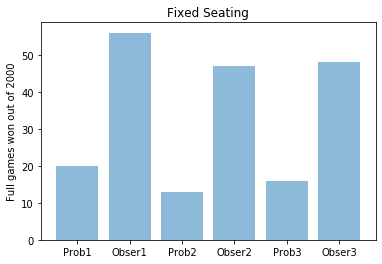

In [17]:
names = [n for n in wins]
x = ['Prob1','Obser1', 'Prob2', 'Obser2', 'Prob3', 'Obser3']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(wins[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Full games won out of 2000')
plt.title('Fixed Seating')
plt.savefig('Experiment 1d')
plt.show()
